In [3]:
#using Pkg
#Pkg.update()
#Pkg.add(PackageSpec(name="JWAS",rev="master"))

In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, Statistics

In [4]:
#Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.5.5 #master (https://github.com/reworkhow/JWAS.jl.git)


In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 28.409780 seconds (37.77 k allocations: 10.393 GiB, 0.09% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [5]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [7]:
model_equations = "Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
             nTrtsNur2_27 = intercept + Batch + EntryAge + NurPenBatch + SowID";
R= [0.115919E-01 -0.344916E-01
    -0.344916E-01 1.13568]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")

Gpen=[0.383042E-03 0
    0 0.383042E-03]
set_random(model,"NurPenBatch", Gpen)

G2=[0.902879E-03 -0.196137E-02
    -0.196137E-02 0.193699E-01]
set_random(model,"SowID",G2)

In [8]:
G3=[0.305290E-02   -0.806377E-02
   -0.806377E-02  0.147070]
@time add_genotypes(model,M,G3,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
 14.145366 seconds (6.83 M allocations: 15.932 GiB, 2.27% gc time)


## BayesB

In [9]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, 
    estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), 
    estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, 
    output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0006 in the row 5 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0049 in the row 47 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0322 in the row 295 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0374 in the row 343 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0398 in the row 364 are missing. This record is deleted.
The number of observations with both genotypes and phenotypes used in the analysis is 3176.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
  9.0e-6  -4.8e-5  
 -4.8e-5   0.000441

running MCMC for BayesB...100%|█████████████████████████| Time: 3 days, 23:08:08




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


342531.681048 seconds (2.62 T allocations: 143.421 TiB, 27.01% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 870344×5 DataFrame. Omitted printing of 1 column…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 3216×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "EBV_nTrtsNur2_27"        => 3205×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

In [10]:
h2=CSV.read("MCMC_BayesB_heritability.txt",delim = ',',header=true)
insertcols!(h2, 1, :iteration => 1:500) # Add a column called iteration
first(h2, 10)

,iteration,Nur2ADG,nTrtsNur2_27
,Int64,Float64,Float64
1,1,0.197283,0.110984
2,2,0.20721,0.113536
3,3,0.208355,0.106925
4,4,0.178258,0.12597
5,5,0.203814,0.105266
6,6,0.195174,0.106255
7,7,0.194956,0.106593
8,8,0.182008,0.103993
9,9,0.166445,0.111588


In [11]:
mean(h2[!,3])

0.1115125662434985

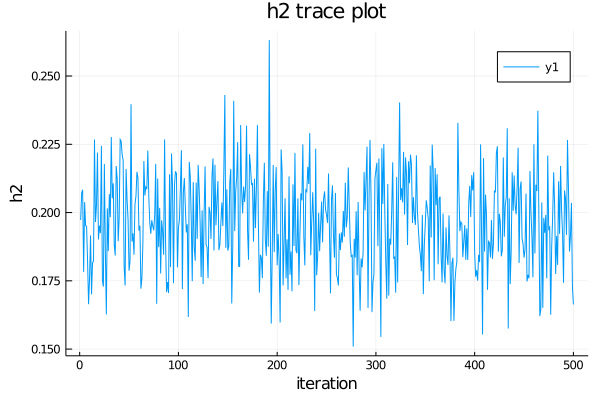

In [12]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

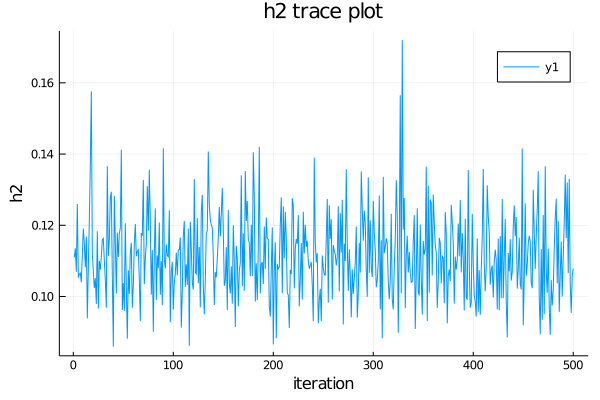

In [13]:
using Plots
x = h2[!,1]; y = h2[!,3]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [14]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_NurTRT/MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/NurADG_NurTRT/MCMC_BayesB_marker_effects_nTrtsNur2_27.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:49:07


BoundsError: BoundsError: attempt to access (2398×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ -1.15641e-6  │ 8.91327e-6  │ -0.0772441   │ 0.349229  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ -8.25088e-6  │ 3.10891e-5  │ -0.14689     │ 0.45834   │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ -2.76268e-6  │ 1.11898e-5  │ -0.0997645   │ 0.402428  │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ -2.59461e-6  │ 1.51336e-5  │ -0.0814142   │ 0.375521  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ -2.30036e-6  │ 1.00819e-5  │ -0.0663105   │ 0.379753  │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ -1.82932e-6  │ 8.29613e-6  │ -0.0879171   │ 0.373263  │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ -6.91958e-6  │ 2.68134e-5  │ -0.127871    │ 0.439699  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ -2.06169e-6  │ 1.01891e-5  │ -0.0892751   │ 0.375292  │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ -3.98496e-6  │ 1.56941e-5  │ -0.136107    │ 0.425419  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ -2.58214e-6  │ 1.38448e-5  │ -0.080945    │ 0.381257  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ -2.61398e-6  │ 1.0033e-5   │ -0.0877653   │ 0.432521  │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ -2.2144e-6   │ 1.22552e-5  │ -0.0739978   │ 0.403673  │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ -8.33748e-6  │ 4.27233e-5  │ -0.14243     │ 0.418731  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ -3.56222e-6  │ 1.66192e-5  │ -0.108457    │ 0.403119  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ -4.56358e-6  │ 2.19464e-5  │ -0.116482    │ 0.407978  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ -1.97792e-6  │ 1.34641e-5  │ -0.0516432   │ 0.376122  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ -2.29593e-6  │ 1.42789e-5  │ -0.0864061   │ 0.361234  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ -1.63958e-6  │ 9.62912e-6  │ -0.0798638   │ 0.384802  │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ -2.79528e-6  │ 1.31522e-5  │ -0.0728334   │ 0.350012  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ -2.75268e-6  │ 1.25884e-5  │ -0.100163    │ 0.350216  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ -1.27057e-6  │ 8.17482e-6  │ -0.0686902   │ 0.347685  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ -1.19081e-6  │ 6.54193e-6  │ -0.050614    │ 0.363806  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ -3.26087e-6  │ 2.44489e-5  │ -0.0785211   │ 0.397364  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ -6.82957e-6  │ 2.46598e-5  │ -0.15029     │ 0.430543  │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ -4.58461e-6  │ 2.33967e-5  │ -0.104336    │ 0.387911  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ -4.05291e-6  │ 1.69915e-5  │ -0.126911    │ 0.41119   │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ -2.16199e-6  │ 1.62895e-5  │ -0.0981926   │ 0.39606   │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ -4.62648e-6  │ 2.6578e-5   │ -0.115958    │ 0.449898  │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ -2.80577e-6  │ 1.91802e-5  │ -0.0954063   │ 0.354885  │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ -3.18949e-6  │ 1.59082e-5  │ -0.102541    │ 0.417515  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ -2.69894e-6  │ 1.44537e-5  │ -0.0738878   │ 0.373539  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ -1.94887e-6  │ 9.97397e-6  │ -0.0749676   │ 0.381595  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ -2.95452e-6  │ 1.48645e-5  │ -0.0823571   │ 0.403434  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ -4.78464e-6  │ 2.13494e-5  │ -0.13187     │ 0.461793  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ -1.32984e-6  │ 8.61635e-6  │ -0.0743149   │ 0.351776  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ -1.53045e-6  │ 7.34768e-6  │ -0.0660805   │ 0.350781  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ -2.00832e-6  │ 1.07107e-5  │ -0.0792812   │ 0.392968  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ -2.62436e-6  │ 1.15935e-5  │ -0.0943519   │ 0.422794  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ -3.75895e-6  │ 1.53662e-5  │ -0.105835    │ 0.415512  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -3.02131e-6  │ 1.39916e-5  │ -0.0843572   │ 0.404395  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ -2.86715e-6  │ 1.49027e-5  │ -0.0765077   │ 0.414041  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ -3.2555e-6   │ 1.6785e-5   │ -0.103988    │ 0.408259  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ -3.4486e-6   │ 1.56014e-5  │ -0.124708    │ 0.402533  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ -4.28387e-6  │ 2.05462e-5  │ -0.103642    │ 0.411166  │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ -1.30559e-6  │ 1.00348e-5  │ -0.0402665   │ 0.408975  │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ -1.15807e-6  │ 7.56617e-6  │ -0.0621296   │ 0.372725  │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ -2.77507e-6  │ 1.42564e-5  │ -0.0777503   │ 0.374631  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ -2.28814e-6  │ 1.50626e-5  │ -0.0699784   │ 0.39675   │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ -2.36289e-6  │ 1.38012e-5  │ -0.0855873   │ 0.377079  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ -2.17291e-6  │ 1.15403e-5  │ -0.0713598   │ 0.391577  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ -2.54197e-6  │ 1.39601e-5  │ -0.0756704   │ 0.384215  │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ -3.75266e-6  │ 1.69327e-5  │ -0.102882    │ 0.403762  │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ -2.04176e-6  │ 1.09027e-5  │ -0.0727348   │ 0.402886  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ -3.56479e-6  │ 1.43076e-5  │ -0.113278    │ 0.435595  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ -1.93289e-6  │ 1.04428e-5  │ -0.0797476   │ 0.379429  │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -1.95291e-6  │ 1.16682e-5  │ -0.0709026   │ 0.375762  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ -5.64679e-6  │ 3.05585e-5  │ -0.120994    │ 0.445532  │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ -5.51921e-6  │ 2.35191e-5  │ -0.0983685   │ 0.423612  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ -3.86345e-6  │ 1.94735e-5  │ -0.11432     │ 0.404386  │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -2.68378e-6  │ 1.64281e-5  │ -0.0798311   │ 0.374656  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ -2.72911e-6  │ 1.41018e-5  │ -0.085555    │ 0.387018  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -1.22648e-6  │ 7.4583e-6   │ -0.039366    │ 0.312115  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ -3.28732e-6  │ 1.90226e-5  │ -0.0808519   │ 0.372171  │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ -3.30895e-6  │ 1.56548e-5  │ -0.0796232   │ 0.349817  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ -4.84522e-6  │ 2.40812e-5  │ -0.107541    │ 0.438949  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ -4.30235e-6  │ 2.03831e-5  │ -0.100864    │ 0.394027  │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ -3.00227e-6  │ 2.23739e-5  │ -0.0624528   │ 0.395148  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ -3.27189e-6  │ 1.6285e-5   │ -0.087496    │ 0.36726   │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ -4.43889e-6  │ 2.95297e-5  │ -0.095553    │ 0.400692  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ -3.76774e-6  │ 1.82489e-5  │ -0.098726    │ 0.391032  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ -1.36551e-6  │ 7.66567e-6  │ -0.0633402   │ 0.361181  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -3.37886e-6  │ 1.59381e-5  │ -0.109537    │ 0.441352  │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ -2.39795e-6  │ 1.1578e-5   │ -0.0892121   │ 0.390471  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ -2.99343e-6  │ 1.41864e-5  │ -0.0818756   │ 0.399708  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ -3.02895e-6  │ 1.65599e-5  │ -0.0789127   │ 0.442005  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ -2.05252e-6  │ 1.06936e-5  │ -0.0764738   │ 0.395308  │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ -1.27958e-6  │ 6.65504e-6  │ -0.0639451   │ 0.326498  │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ -2.85429e-6  │ 1.50319e-5  │ -0.119462    │ 0.355037  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ -2.01481e-6  │ 1.0904e-5   │ -0.084882    │ 0.37132   │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ -1.65543e-6  │ 1.40908e-5  │ -0.0715403   │ 0.305453  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ -1.32499e-6  │ 8.89989e-6  │ -0.05607     │ 0.351533  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ -2.46283e-6  │ 1.55023e-5  │ -0.056211    │ 0.3907    │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ -2.33466e-6  │ 1.20364e-5  │ -0.0802864   │ 0.359172  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ -1.11954e-6  │ 1.02448e-5  │ -0.070249    │ 0.381996  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ -1.76698e-6  │ 1.53648e-5  │ -0.0555419   │ 0.363371  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ -2.12344e-6  │ 1.1437e-5   │ -0.0726451   │ 0.366947  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ -1.86986e-6  │ 1.12267e-5  │ -0.0553696   │ 0.392766  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ -1.40755e-6  │ 8.63064e-6  │ -0.0492272   │ 0.369841  │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ -2.71136e-6  │ 1.66553e-5  │ -0.076524    │ 0.388217  │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ -3.33125e-6  │ 1.71243e-5  │ -0.0884276   │ 0.38657   │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ -3.14312e-6  │ 2.19904e-5  │ -0.0982746   │ 0.420995  │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ -1.80761e-6  │ 1.16258e-5  │ -0.0649898   │ 0.31211   │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ -1.0839e-6   │ 8.33441e-6  │ -0.0333282   │ 0.261714  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ -3.33447e-7  │ 6.68811e-6  │ -0.0106509   │ 0.213405  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ -2.9245e-6   │ 1.37709e-5  │ -0.102126    │ 0.401774  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ -5.16125e-6  │ 2.13764e-5  │ -0.127162    │ 0.435961  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ -2.2491e-6   │ 1.13911e-5  │ -0.0835706   │ 0.376696  │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -3.04597e-6  │ 1.61545e-5  │ -0.114187    │ 0.441462  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ -2.84473e-6  │ 1.5508e-5   │ -0.119601    │ 0.417517  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ -3.1522e-6   │ 1.71072e-5  │ -0.108082    │ 0.397753  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ -9.09384e-7  │ 6.80021e-6  │ -0.040744    │ 0.234965  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ -4.74341e-6  │ 2.51349e-5  │ -0.0920012   │ 0.32791   │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ -1.82067e-6  │ 1.11235e-5  │ -0.0324351   │ 0.333624  │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ -5.589e-6    │ 2.80547e-5  │ -0.0990943   │ 0.41408   │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ -1.98788e-6  │ 1.13423e-5  │ -0.0475988   │ 0.334491  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -1.79931e-6  │ 1.39113e-5  │ -0.0547202   │ 0.314598  │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ -4.67806e-6  │ 4.5966e-5   │ -0.0741096   │ 0.35163   │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ -1.00442e-6  │ 6.25151e-6  │ -0.0499436   │ 0.318998  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ -2.32982e-6  │ 1.16451e-5  │ -0.0759215   │ 0.303446  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ -2.13353e-6  │ 1.2749e-5   │ -0.0698735   │ 0.344355  │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ -2.85227e-6  │ 1.68291e-5  │ -0.0816844   │ 0.375326  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -1.27041e-6  │ 7.96589e-6  │ -0.0595633   │ 0.349983  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ -2.84329e-6  │ 1.6128e-5   │ -0.082212    │ 0.338493  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ -2.24606e-6  │ 1.28005e-5  │ -0.0553381   │ 0.315207  │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ -1.20175e-6  │ 8.42684e-6  │ -0.0332015   │ 0.302585  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ -6.17021e-7  │ 6.36503e-6  │ -0.04723     │ 0.306097  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ -2.33049e-6  │ 1.4204e-5   │ -0.074796    │ 0.388161  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ -1.44073e-6  │ 9.50986e-6  │ -0.0699534   │ 0.354611  │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ -2.67385e-6  │ 1.47202e-5  │ -0.0773972   │ 0.314872  │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ -1.47156e-6  │ 1.17942e-5  │ -0.0461796   │ 0.333628  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ -3.81605e-7  │ 3.08998e-6  │ -0.0354198   │ 0.232042  │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ -5.99334e-7  │ 4.14327e-6  │ -0.0308073   │ 0.256123  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -7.4695e-7   │ 4.73092e-6  │ -0.0600815   │ 0.336704  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ -2.38903e-6  │ 1.45837e-5  │ -0.0780922   │ 0.339267  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ -2.04151e-6  │ 1.1432e-5   │ -0.0727862   │ 0.342974  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ -1.50206e-6  │ 7.51622e-6  │ -0.0556937   │ 0.34031   │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ -9.49161e-7  │ 5.56968e-6  │ -0.0457159   │ 0.306647  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -1.09739e-6  │ 5.94583e-6  │ -0.052005    │ 0.286834  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ -5.83279e-7  │ 4.24732e-6  │ -0.0287449   │ 0.23601   │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ -7.91751e-7  │ 5.79159e-6  │ -0.0622935   │ 0.296785  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ -1.34327e-6  │ 8.6128e-6   │ -0.0688726   │ 0.363425  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ -8.18133e-7  │ 6.90813e-6  │ -0.0558269   │ 0.331422  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ -7.20014e-7  │ 5.69978e-6  │ -0.02634     │ 0.287649  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ -6.40593e-7  │ 4.44362e-6  │ -0.0388294   │ 0.303515  │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -1.14574e-6  │ 9.222e-6    │ -0.0295278   │ 0.290306  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ -5.39671e-7  │ 5.34845e-6  │ -0.0397705   │ 0.268825  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ -4.9581e-7   │ 3.34739e-6  │ -0.039985    │ 0.248838  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ -7.19663e-7  │ 5.2002e-6   │ -0.0374957   │ 0.260627  │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ -1.35085e-6  │ 8.6158e-6   │ -0.0619655   │ 0.281232  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -3.30561e-6  │ 1.82158e-5  │ -0.101461    │ 0.404129  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -2.00694e-6  │ 1.52794e-5  │ -0.0771006   │ 0.359843  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -1.1991e-6   │ 7.29051e-6  │ -0.0408614   │ 0.306065  │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ -3.91257e-7  │ 3.38913e-6  │ -0.0281507   │ 0.20941   │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -9.8684e-7   │ 6.71537e-6  │ -0.0401441   │ 0.271523  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ -3.55553e-7  │ 2.25637e-6  │ -0.0441989   │ 0.257605  │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ -1.13085e-6  │ 6.23874e-6  │ -0.0572756   │ 0.334461  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ -3.75785e-7  │ 8.0689e-6   │ -0.038937    │ 0.347111  │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ -1.80569e-6  │ 1.32971e-5  │ -0.0682933   │ 0.433442  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -1.28499e-6  │ 8.57657e-6  │ -0.0708088   │ 0.387444  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -1.31132e-6  │ 8.89318e-6  │ -0.0766829   │ 0.356309  │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ -2.22794e-6  │ 1.27065e-5  │ -0.0571914   │ 0.352833  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -1.44923e-6  │ 9.07214e-6  │ -0.0619535   │ 0.345477  │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ -9.11376e-7  │ 6.48928e-6  │ -0.0807152   │ 0.371837  │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ -9.06973e-7  │ 6.18458e-6  │ -0.0696741   │ 0.344717  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ -1.11981e-6  │ 8.93054e-6  │ -0.044615    │ 0.284729  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ -6.2935e-7   │ 4.64083e-6  │ -0.0312551   │ 0.34813   │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ -1.02781e-6  │ 4.99386e-6  │ -0.0583611   │ 0.318674  │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ -3.82015e-6  │ 3.05366e-5  │ -0.0684276   │ 0.367635  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ -4.43918e-6  │ 2.9732e-5   │ -0.097842    │ 0.383988  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ -1.07003e-5  │ 5.85164e-5  │ -0.103055    │ 0.423016  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ -1.20887e-6  │ 1.04561e-5  │ -0.0378798   │ 0.303939  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ -9.33119e-6  │ 5.71183e-5  │ -0.150221    │ 0.434775  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ -2.58577e-6  │ 1.49149e-5  │ -0.0579233   │ 0.395967  │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ -1.22518e-6  │ 9.5841e-6   │ -0.0515214   │ 0.357932  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ -2.79953e-6  │ 1.46626e-5  │ -0.0887169   │ 0.385554  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ -2.0461e-6   │ 9.81626e-6  │ -0.0753807   │ 0.333583  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ -4.88528e-6  │ 2.23642e-5  │ -0.0880098   │ 0.385386  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -1.78315e-6  │ 9.57752e-6  │ -0.0788356   │ 0.3784    │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ -1.50906e-6  │ 1.00778e-5  │ -0.053807    │ 0.3118    │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -1.32555e-6  │ 9.76546e-6  │ -0.044647    │ 0.300654  │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ -7.71008e-7  │ 6.92975e-6  │ -0.0373358   │ 0.251311  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ -7.50131e-7  │ 5.13849e-6  │ -0.0517659   │ 0.311221  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ -1.67674e-6  │ 1.08825e-5  │ -0.0581604   │ 0.332333  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ -8.40802e-7  │ 6.95878e-6  │ -0.0351063   │ 0.306708  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ -9.1408e-7   │ 7.2444e-6   │ -0.0392711   │ 0.285905  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -1.05052e-6  │ 7.90426e-6  │ -0.041529    │ 0.282771  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -2.49369e-6  │ 1.72643e-5  │ -0.0505948   │ 0.334365  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ -8.10163e-7  │ 7.3426e-6   │ -0.0236508   │ 0.299835  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ -2.54882e-6  │ 1.51551e-5  │ -0.0804011   │ 0.407586  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ -1.15268e-6  │ 7.57458e-6  │ -0.0536999   │ 0.282146  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -1.65242e-6  │ 1.07238e-5  │ -0.0557931   │ 0.28098   │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ -1.55294e-6  │ 8.69504e-6  │ -0.0863727   │ 0.340428  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ -1.01021e-6  │ 5.69959e-6  │ -0.0956139   │ 0.365071  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ -1.04852e-6  │ 7.23474e-6  │ -0.0710991   │ 0.341361  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ -2.50717e-6  │ 1.17583e-5  │ -0.0846814   │ 0.407111  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -2.68076e-6  │ 1.15138e-5  │ -0.116727    │ 0.399849  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ -1.76961e-6  │ 1.01511e-5  │ -0.0669517   │ 0.339928  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ -8.78887e-7  │ 5.10938e-6  │ -0.042415    │ 0.321159  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ -1.97957e-6  │ 1.57721e-5  │ -0.0604047   │ 0.339578  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ -9.55828e-7  │ 7.45668e-6  │ -0.0414411   │ 0.305943  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ -8.56408e-7  │ 6.60456e-6  │ -0.0502054   │ 0.284347  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ -2.41428e-6  │ 1.15067e-5  │ -0.0970722   │ 0.365915  │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ -1.80977e-6  │ 1.16137e-5  │ -0.0629741   │ 0.368756  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ -7.52748e-7  │ 4.0988e-6   │ -0.0610416   │ 0.28969   │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ -1.34714e-6  │ 8.2679e-6   │ -0.0857965   │ 0.348046  │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ -2.99738e-7  │ 2.33313e-6  │ -0.0396367   │ 0.281343  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ -8.2228e-7   │ 5.81653e-6  │ -0.0422934   │ 0.296601  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ -2.51509e-6  │ 2.0252e-5   │ -0.0860756   │ 0.348126  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ -1.02841e-6  │ 8.9111e-6   │ -0.0432672   │ 0.33548   │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ -8.19823e-7  │ 4.32516e-6  │ -0.0652041   │ 0.33464   │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ -5.14624e-7  │ 3.9963e-6   │ -0.0542187   │ 0.298758  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ -9.1627e-7   │ 6.20427e-6  │ -0.0422215   │ 0.283905  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ -1.0564e-6   │ 7.25956e-6  │ -0.0632861   │ 0.323897  │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ -1.1533e-6   │ 8.70916e-6  │ -0.0699256   │ 0.339507  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -9.93976e-7  │ 5.10175e-6  │ -0.0787085   │ 0.368773  │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ -1.49666e-6  │ 9.591e-6    │ -0.0811929   │ 0.360113  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ -1.70463e-6  │ 8.98911e-6  │ -0.104072    │ 0.398032  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ -1.14268e-6  │ 8.35965e-6  │ -0.0490006   │ 0.335473  │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ -1.70008e-6  │ 8.03252e-6  │ -0.111228    │ 0.359452  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ -2.01284e-6  │ 1.0358e-5   │ -0.0783512   │ 0.38679   │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ -1.22981e-6  │ 6.62256e-6  │ -0.0831049   │ 0.352332  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ -4.39056e-7  │ 3.39818e-6  │ -0.0314116   │ 0.255646  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ -7.38493e-7  │ 9.4048e-6   │ -0.0547221   │ 0.341146  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ -1.85342e-6  │ 1.13113e-5  │ -0.0701264   │ 0.345654  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ -1.30375e-6  │ 9.35102e-6  │ -0.0832101   │ 0.410912  │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ -1.33837e-6  │ 8.88407e-6  │ -0.0794738   │ 0.361889  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ -1.58489e-6  │ 8.54757e-6  │ -0.0842225   │ 0.384578  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ -6.20291e-6  │ 3.66317e-5  │ -0.114091    │ 0.401847  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ -2.86992e-6  │ 1.61268e-5  │ -0.080651    │ 0.316008  │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ -1.77785e-6  │ 8.88552e-6  │ -0.0983181   │ 0.369504  │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ -3.20744e-6  │ 1.50399e-5  │ -0.125867    │ 0.390787  │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ -4.30202e-6  │ 1.86993e-5  │ -0.110039    │ 0.416946  │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ -3.75999e-6  │ 1.9599e-5   │ -0.125116    │ 0.401917  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ -3.30779e-6  │ 1.69203e-5  │ -0.125568    │ 0.395351  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ -1.00334e-6  │ 7.28197e-6  │ -0.0779378   │ 0.39662   │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ -1.27405e-6  │ 7.09664e-6  │ -0.0534103   │ 0.345056  │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ -2.17433e-6  │ 1.57528e-5  │ -0.0558832   │ 0.347218  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ -4.4829e-7   │ 2.88273e-6  │ -0.04039     │ 0.295945  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ -1.42272e-6  │ 7.35754e-6  │ -0.0774445   │ 0.372346  │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ -6.33079e-6  │ 2.92047e-5  │ -0.115009    │ 0.39292   │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -6.49848e-6  │ 3.29749e-5  │ -0.118681    │ 0.392443  │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ -4.13693e-6  │ 2.0908e-5   │ -0.0948974   │ 0.379557  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -1.79926e-6  │ 1.46974e-5  │ -0.0866925   │ 0.376711  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ -1.82557e-6  │ 1.07351e-5  │ -0.0742934   │ 0.360904  │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ -2.3315e-6   │ 1.74387e-5  │ -0.0666502   │ 0.414568  │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ -1.23324e-6  │ 7.15335e-6  │ -0.0693254   │ 0.339971  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ -1.85608e-6  │ 8.78488e-6  │ -0.0818718   │ 0.36149   │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ -1.00953e-5  │ 4.05421e-5  │ -0.155437    │ 0.43149   │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ -9.40106e-6  │ 4.18697e-5  │ -0.130559    │ 0.438809  │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ -4.69102e-6  │ 2.1401e-5   │ -0.11106     │ 0.409126  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ -2.33338e-6  │ 1.17541e-5  │ -0.0904622   │ 0.374184  │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ -1.3455e-6   │ 7.15738e-6  │ -0.086804    │ 0.312571  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ -1.31706e-5  │ 5.96409e-5  │ -0.121692    │ 0.433464  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ -2.39615e-6  │ 1.18181e-5  │ -0.0636243   │ 0.36277   │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ -9.62402e-7  │ 6.07534e-6  │ -0.0443822   │ 0.279335  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ -5.41896e-6  │ 2.2147e-5   │ -0.125235    │ 0.404725  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ -1.62395e-6  │ 8.86368e-6  │ -0.0519274   │ 0.373018  │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ -1.4053e-5   │ 7.04544e-5  │ -0.144896    │ 0.422437  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -3.15406e-6  │ 1.70275e-5  │ -0.118013    │ 0.441293  │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ -3.56328e-6  │ 1.96107e-5  │ -0.0803677   │ 0.417057  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ -3.03711e-6  │ 1.59331e-5  │ -0.0837385   │ 0.375886  │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -5.82353e-6  │ 2.09768e-5  │ -0.144678    │ 0.403252  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ -5.19545e-6  │ 2.69709e-5  │ -0.135748    │ 0.402734  │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -4.45059e-6  │ 2.12153e-5  │ -0.117563    │ 0.40765   │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ -4.09569e-6  │ 1.70963e-5  │ -0.110452    │ 0.398427  │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ -2.91328e-6  │ 1.88873e-5  │ -0.0734611   │ 0.390077  │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ -3.68922e-6  │ 1.51033e-5  │ -0.104896    │ 0.408517  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -4.27966e-6  │ 1.54367e-5  │ -0.143095    │ 0.431642  │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ -2.67402e-6  │ 1.5048e-5   │ -0.0984621   │ 0.382957  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ -2.9071e-6   │ 1.52456e-5  │ -0.110636    │ 0.417506  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ -1.47333e-6  │ 7.85479e-6  │ -0.0779067   │ 0.387058  │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -3.40631e-6  │ 1.70763e-5  │ -0.100171    │ 0.419091  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ -1.92768e-6  │ 1.26566e-5  │ -0.0620573   │ 0.321283  │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ -1.34801e-6  │ 1.24144e-5  │ -0.0323831   │ 0.236548  │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ -1.31882e-5  │ 4.63179e-5  │ -0.145422    │ 0.425341  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ -7.84594e-7  │ 7.66538e-6  │ -0.0223817   │ 0.30618   │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ -5.36765e-6  │ 2.94388e-5  │ -0.11772     │ 0.401417  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ -8.27905e-6  │ 3.57787e-5  │ -0.128658    │ 0.442418  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ -2.0295e-6   │ 1.1339e-5   │ -0.0863398   │ 0.331475  │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ -2.50325e-6  │ 1.24104e-5  │ -0.0849821   │ 0.386414  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ -2.08446e-6  │ 1.24394e-5  │ -0.0924997   │ 0.364474  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ -5.67199e-6  │ 2.52315e-5  │ -0.123688    │ 0.421505  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ -2.32352e-6  │ 1.81483e-5  │ -0.0696628   │ 0.363825  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ -1.77107e-6  │ 8.89649e-6  │ -0.0763021   │ 0.330142  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ -1.01098e-6  │ 7.59727e-6  │ -0.0449816   │ 0.24984   │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ -2.18814e-6  │ 1.40134e-5  │ -0.0518035   │ 0.320778  │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ -2.21663e-7  │ 2.48136e-6  │ -0.0234453   │ 0.187186  │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ -1.27347e-6  │ 1.01353e-5  │ -0.0803932   │ 0.407825  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ -2.75424e-6  │ 1.15155e-5  │ -0.128351    │ 0.402674  │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ -3.3344e-6   │ 1.53938e-5  │ -0.0876899   │ 0.381334  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ -2.50694e-6  │ 1.85862e-5  │ -0.0884402   │ 0.348577  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ -2.04743e-6  │ 9.59214e-6  │ -0.0818851   │ 0.350281  │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ -3.68259e-6  │ 3.05322e-5  │ -0.0932523   │ 0.370459  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ -1.33258e-6  │ 7.04818e-6  │ -0.0647791   │ 0.347569  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ -3.94521e-6  │ 1.57948e-5  │ -0.113556    │ 0.413568  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ -5.25443e-6  │ 2.9286e-5   │ -0.108997    │ 0.399093  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ -2.72658e-6  │ 1.30083e-5  │ -0.0909672   │ 0.377742  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ -6.86607e-6  │ 2.83578e-5  │ -0.134883    │ 0.424265  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ -1.64512e-6  │ 8.91464e-6  │ -0.0596475   │ 0.356075  │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ -3.49843e-6  │ 2.57035e-5  │ -0.0663009   │ 0.388568  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ -1.49186e-6  │ 1.0754e-5   │ -0.0760633   │ 0.373812  │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ -5.30178e-6  │ 3.33126e-5  │ -0.0829496   │ 0.386481  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ -3.62335e-6  │ 1.79085e-5  │ -0.0904443   │ 0.363722  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ -1.42626e-6  │ 7.48617e-6  │ -0.0835258   │ 0.41986   │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ -3.52878e-6  │ 1.49184e-5  │ -0.100348    │ 0.408567  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ -2.67271e-6  │ 1.32871e-5  │ -0.10583     │ 0.395302  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ -2.50192e-6  │ 1.41338e-5  │ -0.0825135   │ 0.369353  │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -2.88467e-6  │ 1.38361e-5  │ -0.0766084   │ 0.359077  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ -2.59914e-6  │ 1.18338e-5  │ -0.0766332   │ 0.375821  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ -3.65007e-6  │ 2.18315e-5  │ -0.0739137   │ 0.383573  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ -4.20513e-6  │ 1.89658e-5  │ -0.148539    │ 0.426992  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ -3.82426e-6  │ 1.48126e-5  │ -0.136925    │ 0.440164  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ -3.11305e-6  │ 1.89145e-5  │ -0.0438111   │ 0.380271  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ -2.07567e-6  │ 1.06947e-5  │ -0.0808599   │ 0.358621  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ -2.55167e-6  │ 1.68748e-5  │ -0.0649771   │ 0.366285  │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ -1.92008e-6  │ 1.36897e-5  │ -0.0424735   │ 0.350788  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ -1.44449e-6  │ 8.04097e-6  │ -0.0599559   │ 0.314903  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ -2.55063e-6  │ 1.59689e-5  │ -0.068035    │ 0.359183  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ -1.82113e-6  │ 9.52101e-6  │ -0.0944656   │ 0.401444  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ -2.65896e-6  │ 1.496e-5    │ -0.103711    │ 0.384085  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ -4.06153e-6  │ 2.04195e-5  │ -0.0981814   │ 0.39786   │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ -4.24783e-6  │ 2.48761e-5  │ -0.0706914   │ 0.366411  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ -2.31429e-6  │ 1.45242e-5  │ -0.0740473   │ 0.373591  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ -1.98857e-6  │ 9.68701e-6  │ -0.0602334   │ 0.352381  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ -4.25592e-6  │ 1.75072e-5  │ -0.133598    │ 0.407964  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ -4.18435e-6  │ 1.6053e-5   │ -0.104876    │ 0.414419  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ -7.08791e-6  │ 2.71846e-5  │ -0.144285    │ 0.448866  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ -2.1216e-6   │ 1.00459e-5  │ -0.0986538   │ 0.336824  │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ -5.48401e-6  │ 2.06655e-5  │ -0.112456    │ 0.410549  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ -1.56755e-6  │ 9.53707e-6  │ -0.0722424   │ 0.327408  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ -2.49957e-6  │ 1.27976e-5  │ -0.0876345   │ 0.388519  │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ -1.78e-6     │ 1.07177e-5  │ -0.0775394   │ 0.416677  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ -8.74375e-7  │ 6.82724e-6  │ -0.0439769   │ 0.328099  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ -1.01805e-5  │ 5.36144e-5  │ -0.15062     │ 0.440814  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -5.00224e-6  │ 3.36606e-5  │ -0.104147    │ 0.428335  │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ -1.75217e-6  │ 1.50684e-5  │ -0.0465029   │ 0.259404  │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ -2.9469e-6   │ 3.71604e-5  │ -0.0421099   │ 0.282568  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ -2.94499e-6  │ 2.27928e-5  │ -0.0448835   │ 0.333009  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ -6.89222e-7  │ 5.51785e-6  │ -0.0344801   │ 0.257086  │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ -1.12563e-6  │ 1.16208e-5  │ -0.0162837   │ 0.220683  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ -8.78144e-7  │ 7.85581e-6  │ -0.0340772   │ 0.246536  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ -1.32405e-6  │ 8.56789e-6  │ -0.0502083   │ 0.296368  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ -1.18758e-6  │ 1.46504e-5  │ -0.0164844   │ 0.225785  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ -1.57799e-5  │ 9.98158e-5  │ -0.0654226   │ 0.316488  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ -1.04702e-6  │ 7.95661e-6  │ -0.0321342   │ 0.260153  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ -1.31482e-6  │ 6.95427e-6  │ -0.0699306   │ 0.311042  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ -5.79657e-7  │ 3.73662e-6  │ -0.048059    │ 0.334073  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ -4.22624e-7  │ 3.50822e-6  │ -0.0370965   │ 0.30999   │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ -1.04164e-7  │ 1.45453e-6  │ -0.0139744   │ 0.172666  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ -8.38084e-7  │ 9.46209e-6  │ -0.0277308   │ 0.229683  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ -1.13603e-6  │ 5.76017e-6  │ -0.0852277   │ 0.364675  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ -9.81281e-7  │ 5.63851e-6  │ -0.0597903   │ 0.287367  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ -5.04599e-7  │ 3.40265e-6  │ -0.0373199   │ 0.289412  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ -1.13011e-6  │ 5.64471e-6  │ -0.0689493   │ 0.318829  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ -2.1752e-6   │ 1.16924e-5  │ -0.0694603   │ 0.345503  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ -1.11504e-6  │ 8.30686e-6  │ -0.0523754   │ 0.316295  │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ -1.32234e-6  │ 8.31152e-6  │ -0.054724    │ 0.354121  │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ -1.16387e-7  │ 1.52326e-6  │ -0.0247992   │ 0.189145  │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -6.65222e-7  │ 7.03188e-6  │ -0.0223252   │ 0.213447  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ -1.08893e-6  │ 8.27417e-6  │ -0.0257238   │ 0.290916  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ -6.8322e-7   │ 5.45377e-6  │ -0.0138802   │ 0.218901  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -1.24148e-6  │ 1.09742e-5  │ -0.0512646   │ 0.278995  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ -1.88803e-6  │ 1.41659e-5  │ -0.0433399   │ 0.23893   │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ -1.89296e-7  │ 1.65094e-6  │ -0.0164695   │ 0.217457  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ -8.82838e-7  │ 4.74113e-6  │ -0.0642312   │ 0.309738  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ -5.4035e-7   │ 5.39763e-6  │ -0.033652    │ 0.286773  │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ -1.41908e-6  │ 1.12789e-5  │ -0.0466441   │ 0.282662  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -5.98334e-6  │ 2.46187e-5  │ -0.138104    │ 0.403091  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ -3.07665e-6  │ 1.7581e-5   │ -0.0784528   │ 0.392936  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ -3.16972e-6  │ 1.479e-5    │ -0.121656    │ 0.40602   │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ -4.55469e-6  │ 1.88293e-5  │ -0.113791    │ 0.430626  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ -8.67462e-6  │ 5.61171e-5  │ -0.136284    │ 0.434041  │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ -5.42529e-6  │ 2.80996e-5  │ -0.101118    │ 0.390115  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ -3.45979e-6  │ 1.49054e-5  │ -0.110577    │ 0.391294  │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -6.65765e-6  │ 3.05083e-5  │ -0.121081    │ 0.404178  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -2.11136e-6  │ 1.03519e-5  │ -0.112261    │ 0.386024  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ -2.20035e-6  │ 1.03136e-5  │ -0.0894439   │ 0.398999  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ -1.45601e-6  │ 1.07856e-5  │ -0.0965718   │ 0.411848  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -2.83396e-6  │ 1.65631e-5  │ -0.0667204   │ 0.382776  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ -2.85155e-6  │ 1.54711e-5  │ -0.0748861   │ 0.40324   │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ -1.93498e-6  │ 1.13977e-5  │ -0.0797021   │ 0.375541  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ -1.64404e-6  │ 9.98291e-6  │ -0.0476797   │ 0.348181  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ -1.78088e-6  │ 1.06254e-5  │ -0.0535572   │ 0.383394  │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -2.62352e-6  │ 1.33818e-5  │ -0.0771482   │ 0.342137  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ -3.58518e-6  │ 1.84862e-5  │ -0.102429    │ 0.406519  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ -3.16788e-6  │ 1.42675e-5  │ -0.0975797   │ 0.41515   │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ -2.73286e-6  │ 1.28026e-5  │ -0.0933419   │ 0.399763  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ -3.02255e-6  │ 1.92238e-5  │ -0.0836744   │ 0.397     │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ -3.35062e-6  │ 1.62076e-5  │ -0.0960433   │ 0.386374  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ -3.47244e-6  │ 1.7323e-5   │ -0.0892603   │ 0.376566  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ -3.4935e-6   │ 2.00979e-5  │ -0.0961068   │ 0.385903  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ -4.20722e-6  │ 3.08534e-5  │ -0.128121    │ 0.418515  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ -4.06197e-6  │ 2.74184e-5  │ -0.0920451   │ 0.404038  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ -3.95385e-6  │ 1.89623e-5  │ -0.0873505   │ 0.413492  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ -4.03329e-6  │ 2.33164e-5  │ -0.0814229   │ 0.374811  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ -3.04749e-6  │ 1.92484e-5  │ -0.0847649   │ 0.378799  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ -2.21457e-6  │ 1.25753e-5  │ -0.0812127   │ 0.371795  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ -3.3994e-6   │ 1.50775e-5  │ -0.139434    │ 0.411935  │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ -2.29551e-6  │ 1.29319e-5  │ -0.0790154   │ 0.383892  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ -1.81395e-6  │ 1.80316e-5  │ -0.0462443   │ 0.335067  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ -1.70042e-6  │ 9.28533e-6  │ -0.0790602   │ 0.350703  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ -2.43072e-6  │ 1.21697e-5  │ -0.105856    │ 0.40662   │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ -3.33942e-6  │ 1.52858e-5  │ -0.0908114   │ 0.364897  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ -2.68023e-6  │ 1.50498e-5  │ -0.0926065   │ 0.407755  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ -2.30724e-6  │ 1.27845e-5  │ -0.0868132   │ 0.416028  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ -2.99378e-6  │ 1.45537e-5  │ -0.087429    │ 0.407649  │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ -3.28555e-6  │ 1.75189e-5  │ -0.0861442   │ 0.379772  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ -2.48209e-6  │ 1.28856e-5  │ -0.0891447   │ 0.386484  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ -1.79939e-6  │ 9.68886e-6  │ -0.0868792   │ 0.360602  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ -1.32648e-6  │ 7.99225e-6  │ -0.0747203   │ 0.366403  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ -1.8971e-6   │ 1.30137e-5  │ -0.0571392   │ 0.319109  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ -1.66442e-6  │ 1.01696e-5  │ -0.0635761   │ 0.337839  │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -2.53936e-6  │ 1.27906e-5  │ -0.0719321   │ 0.385872  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ -4.10211e-6  │ 1.6656e-5   │ -0.124216    │ 0.415781  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ -6.15663e-6  │ 3.00294e-5  │ -0.131109    │ 0.419926  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -2.70583e-6  │ 2.19894e-5  │ -0.0659176   │ 0.396357  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -4.85432e-6  │ 2.35067e-5  │ -0.116352    │ 0.398457  │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ -2.2993e-6   │ 9.34865e-6  │ -0.108815    │ 0.404287  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ -2.4137e-6   │ 1.29924e-5  │ -0.0765805   │ 0.403012  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ -2.37588e-6  │ 1.24014e-5  │ -0.0870312   │ 0.385974  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ -3.01017e-6  │ 1.40852e-5  │ -0.0948803   │ 0.420743  │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ -2.19977e-6  │ 1.15579e-5  │ -0.0514717   │ 0.414897  │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ -8.02938e-6  │ 3.3632e-5   │ -0.138342    │ 0.445586  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ -1.10596e-5  │ 4.9005e-5   │ -0.126423    │ 0.392225  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -1.257e-6    │ 9.52779e-6  │ -0.0828759   │ 0.378523  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ -4.63384e-6  │ 2.42734e-5  │ -0.100486    │ 0.42224   │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ -2.15354e-6  │ 1.20722e-5  │ -0.106635    │ 0.375735  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ -1.14864e-6  │ 7.77524e-6  │ -0.0508385   │ 0.325093  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ -6.30586e-6  │ 2.83193e-5  │ -0.126677    │ 0.438038  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ -4.15688e-6  │ 1.95281e-5  │ -0.15919     │ 0.416104  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ -2.38168e-6  │ 1.71097e-5  │ -0.0672741   │ 0.352388  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ -2.76002e-6  │ 1.30792e-5  │ -0.124441    │ 0.445846  │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ -1.86031e-6  │ 9.2155e-6   │ -0.0796731   │ 0.416294  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ -2.31641e-6  │ 1.05976e-5  │ -0.0929101   │ 0.401704  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ -6.65906e-6  │ 2.43606e-5  │ -0.1574      │ 0.446769  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ -5.79023e-6  │ 2.2796e-5   │ -0.129323    │ 0.422892  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -8.94154e-7  │ 5.656e-6    │ -0.0578475   │ 0.31789   │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ -1.81046e-6  │ 9.41997e-6  │ -0.0834744   │ 0.354579  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ -1.46691e-6  │ 1.30281e-5  │ -0.0437535   │ 0.30834   │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ -3.55256e-6  │ 1.69512e-5  │ -0.0666525   │ 0.381408  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ -4.05126e-6  │ 2.01107e-5  │ -0.100114    │ 0.408151  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ -1.58451e-6  │ 1.03255e-5  │ -0.0554104   │ 0.29226   │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -7.27554e-6  │ 3.09721e-5  │ -0.154037    │ 0.411561  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ -2.37454e-6  │ 2.40111e-5  │ -0.0576296   │ 0.335478  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ -3.54784e-6  │ 2.03423e-5  │ -0.091284    │ 0.354063  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -1.48402e-6  │ 8.92281e-6  │ -0.0557061   │ 0.318983  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ -2.79104e-6  │ 1.37706e-5  │ -0.0927835   │ 0.365845  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ -3.07703e-7  │ 1.62922e-5  │ -0.0629495   │ 0.384249  │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ -4.54766e-6  │ 2.67002e-5  │ -0.0876377   │ 0.421815  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ -3.76393e-6  │ 1.64449e-5  │ -0.100991    │ 0.434908  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -2.98849e-6  │ 1.34724e-5  │ -0.0943598   │ 0.411634  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -4.3793e-6   │ 1.96961e-5  │ -0.121286    │ 0.420842  │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ -3.17916e-6  │ 1.69978e-5  │ -0.0909832   │ 0.355802  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -3.04432e-6  │ 1.77595e-5  │ -0.103165    │ 0.37399   │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ -7.09238e-7  │ 6.01658e-6  │ -0.0676149   │ 0.349476  │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ -1.14451e-6  │ 9.07349e-6  │ -0.0618926   │ 0.34271   │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ -1.86469e-6  │ 1.1585e-5   │ -0.0430958   │ 0.393228  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ -7.97076e-6  │ 3.62439e-5  │ -0.1478      │ 0.416191  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ -3.61481e-6  │ 2.25788e-5  │ -0.10498     │ 0.379288  │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ -2.3682e-6   │ 1.11166e-5  │ -0.0976591   │ 0.379076  │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ -2.11525e-6  │ 1.02696e-5  │ -0.0808798   │ 0.372035  │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ -3.42423e-6  │ 1.55979e-5  │ -0.100487    │ 0.408133  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ -3.98207e-6  │ 1.94446e-5  │ -0.113554    │ 0.41647   │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ -6.69657e-6  │ 3.52703e-5  │ -0.128332    │ 0.428795  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ -5.59501e-6  │ 2.57488e-5  │ -0.109195    │ 0.436094  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ -2.96321e-6  │ 1.66256e-5  │ -0.0774335   │ 0.418512  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ -1.98742e-6  │ 1.02556e-5  │ -0.096304    │ 0.428265  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -3.9046e-6   │ 1.74949e-5  │ -0.120258    │ 0.436556  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ -2.06983e-6  │ 9.36553e-6  │ -0.110826    │ 0.413273  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ -2.78261e-6  │ 1.25912e-5  │ -0.101877    │ 0.390719  │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ -2.66076e-6  │ 1.14475e-5  │ -0.115293    │ 0.424665  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ -1.73904e-6  │ 8.06487e-6  │ -0.0912081   │ 0.382635  │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ -3.0364e-6   │ 1.59318e-5  │ -0.0900601   │ 0.366049  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ -1.46883e-6  │ 8.91292e-6  │ -0.0641318   │ 0.409765  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ -3.18655e-6  │ 1.28148e-5  │ -0.109184    │ 0.355446  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ -1.92889e-6  │ 1.13548e-5  │ -0.0526495   │ 0.340742  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ -4.06255e-7  │ 3.98162e-6  │ -0.0211166   │ 0.234077  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ -2.22863e-7  │ 2.4184e-6   │ -0.0178639   │ 0.220457  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ -4.22967e-7  │ 4.70941e-6  │ -0.00445765  │ 0.219152  │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ -3.59826e-6  │ 2.43413e-5  │ -0.0880843   │ 0.332839  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ -2.21963e-6  │ 1.54643e-5  │ -0.059112    │ 0.316639  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ -9.9071e-7   │ 7.126e-6    │ -0.0401996   │ 0.325428  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -4.80974e-7  │ 3.61787e-6  │ -0.0197418   │ 0.325826  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ -1.43211e-6  │ 8.68789e-6  │ -0.0874172   │ 0.355493  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -1.93136e-6  │ 1.2318e-5   │ -0.093095    │ 0.438786  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ -1.27863e-6  │ 6.83768e-6  │ -0.0817975   │ 0.378358  │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -2.36498e-6  │ 9.98612e-6  │ -0.0939725   │ 0.390945  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ -2.38147e-6  │ 1.27497e-5  │ -0.0923252   │ 0.394639  │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ -3.2829e-6   │ 1.74394e-5  │ -0.0819538   │ 0.392794  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ -1.56144e-6  │ 7.8746e-6   │ -0.0802339   │ 0.381569  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ -2.77259e-6  │ 1.1732e-5   │ -0.0982159   │ 0.37521   │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ -2.19294e-6  │ 1.39932e-5  │ -0.0921905   │ 0.365189  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ -1.17779e-6  │ 7.79731e-6  │ -0.0503526   │ 0.321373  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ -1.70814e-6  │ 8.79564e-6  │ -0.102714    │ 0.37202   │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ -2.83006e-6  │ 1.35787e-5  │ -0.0808953   │ 0.385584  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ -1.171e-6    │ 6.62023e-6  │ -0.0602193   │ 0.345866  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -1.616e-6    │ 7.77842e-6  │ -0.0928654   │ 0.424944  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ -2.25545e-6  │ 1.08308e-5  │ -0.0963771   │ 0.429747  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ -2.78353e-6  │ 1.14701e-5  │ -0.0937129   │ 0.40427   │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ -1.83842e-6  │ 1.14627e-5  │ -0.0581835   │ 0.346313  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ -3.21388e-6  │ 1.24035e-5  │ -0.127662    │ 0.411346  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ -3.70341e-6  │ 2.02949e-5  │ -0.128473    │ 0.363486  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ -2.37323e-6  │ 1.439e-5    │ -0.0819793   │ 0.320262  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ -1.29806e-6  │ 7.3115e-6   │ -0.0724906   │ 0.299909  │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ -9.61828e-7  │ 6.00841e-6  │ -0.0527338   │ 0.263939  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ -1.78041e-6  │ 8.55666e-6  │ -0.0896045   │ 0.388898  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ -1.63803e-6  │ 8.78276e-6  │ -0.0813041   │ 0.342573  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ -3.13355e-6  │ 1.46818e-5  │ -0.106502    │ 0.352409  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -8.07697e-7  │ 6.13127e-6  │ -0.0387857   │ 0.340506  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -2.15666e-6  │ 1.11541e-5  │ -0.0872427   │ 0.336367  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ -3.79542e-6  │ 1.93045e-5  │ -0.106383    │ 0.363216  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ -2.04164e-6  │ 1.10398e-5  │ -0.0740762   │ 0.340045  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ -2.29188e-6  │ 1.02494e-5  │ -0.104753    │ 0.367605  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -2.75393e-6  │ 1.3734e-5   │ -0.0880703   │ 0.356161  │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ -7.17401e-7  │ 7.28525e-6  │ -0.0539783   │ 0.298876  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ -1.26542e-6  │ 8.57325e-6  │ -0.02887     │ 0.311463  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ -1.42925e-6  │ 1.0788e-5   │ -0.0442923   │ 0.247666  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ -1.71533e-7  │ 1.61379e-6  │ -0.0196056   │ 0.19744   │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ -1.23097e-6  │ 7.23847e-6  │ -0.0736832   │ 0.335774  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ -2.00456e-6  │ 1.12695e-5  │ -0.0841031   │ 0.314425  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ -2.67928e-6  │ 1.57466e-5  │ -0.0935567   │ 0.350677  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ -4.11718e-6  │ 2.07713e-5  │ -0.105146    │ 0.374226  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ -2.38534e-6  │ 1.48093e-5  │ -0.0742266   │ 0.38228   │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ -2.30485e-6  │ 1.05401e-5  │ -0.0831512   │ 0.397683  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ -2.44396e-6  │ 1.2166e-5   │ -0.0913541   │ 0.381152  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ -1.84925e-6  │ 1.32944e-5  │ -0.062874    │ 0.368663  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ -1.27394e-6  │ 6.37295e-6  │ -0.0618321   │ 0.356468  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ -3.32261e-6  │ 2.39171e-5  │ -0.0783217   │ 0.39991   │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ -3.02315e-6  │ 1.50397e-5  │ -0.115839    │ 0.411751  │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ -6.54859e-6  │ 2.66143e-5  │ -0.137346    │ 0.370316  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ -3.37761e-6  │ 1.7038e-5   │ -0.0832204   │ 0.381177  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ -1.92411e-6  │ 8.89062e-6  │ -0.0731817   │ 0.347169  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ -5.78089e-6  │ 2.50527e-5  │ -0.153801    │ 0.421874  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ -5.06263e-6  │ 2.20463e-5  │ -0.121474    │ 0.388374  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ -4.27454e-6  │ 1.94088e-5  │ -0.105915    │ 0.377168  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ -1.71702e-6  │ 1.0088e-5   │ -0.0733572   │ 0.348684  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ -1.1931e-6   │ 1.3013e-5   │ -0.0297606   │ 0.275294  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ -1.40916e-6  │ 6.92189e-6  │ -0.0841855   │ 0.32973   │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ -1.42224e-6  │ 7.51865e-6  │ -0.0564121   │ 0.369485  │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ -1.18119e-6  │ 6.41575e-6  │ -0.0740732   │ 0.345768  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ -2.23974e-6  │ 1.02115e-5  │ -0.082919    │ 0.408031  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ -3.05002e-6  │ 1.33574e-5  │ -0.1053      │ 0.407304  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ -2.07969e-6  │ 1.17022e-5  │ -0.0906494   │ 0.399305  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ -1.39833e-6  │ 7.12664e-6  │ -0.0672347   │ 0.368335  │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -6.91925e-7  │ 9.04914e-6  │ -0.0336213   │ 0.346354  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ -1.56556e-6  │ 1.06406e-5  │ -0.0469959   │ 0.364936  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ -9.08706e-7  │ 2.04853e-5  │ -0.0428605   │ 0.386647  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ -2.34604e-6  │ 1.13913e-5  │ -0.086387    │ 0.38098   │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ -2.62574e-6  │ 1.35671e-5  │ -0.0881764   │ 0.375176  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ -3.39034e-6  │ 1.57267e-5  │ -0.136206    │ 0.403846  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ -6.11562e-6  │ 2.39724e-5  │ -0.119824    │ 0.423929  │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -3.80244e-6  │ 1.58821e-5  │ -0.145105    │ 0.413383  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ -2.01604e-6  │ 9.7266e-6   │ -0.116741    │ 0.407338  │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ -1.91921e-6  │ 9.94268e-6  │ -0.103993    │ 0.376445  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ -2.68392e-6  │ 1.30177e-5  │ -0.0897801   │ 0.40285   │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ -3.18984e-6  │ 1.43033e-5  │ -0.11102     │ 0.375111  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ -7.81708e-7  │ 4.56989e-6  │ -0.060103    │ 0.296332  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ -1.13351e-5  │ 4.09732e-5  │ -0.202525    │ 0.447386  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ -3.58544e-6  │ 1.40667e-5  │ -0.113722    │ 0.417818  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ -3.63557e-6  │ 2.235e-5    │ -0.122152    │ 0.398481  │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ -4.0118e-6   │ 1.84382e-5  │ -0.131447    │ 0.425912  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ -3.76066e-6  │ 1.65683e-5  │ -0.126062    │ 0.405299  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ -2.58534e-6  │ 1.2068e-5   │ -0.077129    │ 0.396589  │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ -1.70162e-6  │ 1.2616e-5   │ -0.0942013   │ 0.353741  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ -5.95725e-6  │ 2.7601e-5   │ -0.131135    │ 0.427208  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ -4.42327e-5  │ 0.000133839 │ -0.257728    │ 0.508524  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ -0.000153981 │ 0.000238515 │ -0.555334    │ 0.503108  │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ -1.37252e-5  │ 5.73717e-5  │ -0.138634    │ 0.414108  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ -3.4288e-6   │ 1.61796e-5  │ -0.0930348   │ 0.40013   │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ -1.82479e-6  │ 1.00118e-5  │ -0.0532717   │ 0.358315  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ -2.39221e-6  │ 2.00821e-5  │ -0.0716841   │ 0.338212  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ -1.8893e-6   │ 1.30226e-5  │ -0.049878    │ 0.294584  │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ -5.15079e-6  │ 2.47256e-5  │ -0.116069    │ 0.399895  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ -2.75386e-6  │ 1.23994e-5  │ -0.12773     │ 0.384954  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ -4.49994e-6  │ 1.91314e-5  │ -0.130666    │ 0.445492  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ -5.19614e-6  │ 2.2936e-5   │ -0.128934    │ 0.424085  │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ -4.00223e-6  │ 1.83889e-5  │ -0.0908476   │ 0.41525   │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ -6.12769e-6  │ 2.56782e-5  │ -0.121216    │ 0.429717  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -5.22902e-6  │ 1.97046e-5  │ -0.111712    │ 0.444225  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ -8.77283e-6  │ 3.79971e-5  │ -0.140787    │ 0.427441  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ -1.83169e-6  │ 1.11947e-5  │ -0.0667827   │ 0.353148  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ -3.44197e-6  │ 1.54607e-5  │ -0.104121    │ 0.422051  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ -3.83587e-6  │ 2.23929e-5  │ -0.117862    │ 0.423009  │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ -2.63602e-6  │ 1.66669e-5  │ -0.0795824   │ 0.343902  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ -2.95686e-6  │ 1.74925e-5  │ -0.104335    │ 0.408402  │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ -1.16503e-5  │ 4.23221e-5  │ -0.185674    │ 0.43683   │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ -3.00012e-6  │ 1.24483e-5  │ -0.0792486   │ 0.36799   │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ -3.29472e-5  │ 9.46406e-5  │ -0.213764    │ 0.454302  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ -4.24475e-6  │ 2.07601e-5  │ -0.0908932   │ 0.373206  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ -8.95522e-6  │ 3.27318e-5  │ -0.162854    │ 0.452127  │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ -7.15196e-6  │ 2.84954e-5  │ -0.123359    │ 0.43165   │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ -2.75316e-6  │ 1.43361e-5  │ -0.11258     │ 0.396293  │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ -1.77982e-6  │ 8.76726e-6  │ -0.0802625   │ 0.368158  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ -3.12052e-6  │ 2.09639e-5  │ -0.0995744   │ 0.381257  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ -7.61824e-6  │ 2.99364e-5  │ -0.157311    │ 0.42935   │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ -2.04358e-6  │ 1.4295e-5   │ -0.0578771   │ 0.335301  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ -2.81561e-6  │ 1.60552e-5  │ -0.0514636   │ 0.367375  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ -4.26131e-6  │ 2.544e-5    │ -0.107058    │ 0.42084   │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ -2.15275e-6  │ 1.29426e-5  │ -0.0925969   │ 0.342772  │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ -1.58297e-6  │ 1.77935e-5  │ -0.0280792   │ 0.311335  │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ -1.54135e-6  │ 9.48311e-6  │ -0.042765    │ 0.33964   │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ -7.12379e-7  │ 4.66891e-6  │ -0.0920757   │ 0.35098   │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ -1.36288e-6  │ 8.00144e-6  │ -0.0604479   │ 0.358015  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ -3.08404e-6  │ 1.5764e-5   │ -0.0862446   │ 0.355048  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ -1.64723e-6  │ 8.89034e-6  │ -0.06239     │ 0.335317  │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ -9.95472e-7  │ 6.31482e-6  │ -0.0563759   │ 0.299655  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ -9.24732e-7  │ 6.09116e-6  │ -0.0574019   │ 0.310456  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ -1.48347e-6  │ 9.66776e-6  │ -0.0615712   │ 0.336412  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ -2.32e-6     │ 1.51245e-5  │ -0.0571928   │ 0.358554  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ -1.82601e-6  │ 1.05571e-5  │ -0.0711883   │ 0.372941  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ -2.34833e-6  │ 1.01215e-5  │ -0.0900737   │ 0.393657  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ -2.3709e-6   │ 1.45385e-5  │ -0.0561103   │ 0.379013  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ -2.08339e-6  │ 1.28088e-5  │ -0.0525687   │ 0.340559  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ -2.26333e-6  │ 1.59072e-5  │ -0.0644744   │ 0.271333  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ -3.5714e-6   │ 3.08102e-5  │ -0.0883281   │ 0.411503  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ -3.39372e-6  │ 2.13887e-5  │ -0.0626394   │ 0.38655   │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ -9.43279e-7  │ 1.46144e-5  │ -0.0679361   │ 0.373329  │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ -3.87074e-6  │ 2.99624e-5  │ -0.0625573   │ 0.364946  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ -1.71529e-6  │ 1.8712e-5   │ -0.0314434   │ 0.344461  │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ -7.89559e-7  │ 5.19595e-6  │ -0.0595989   │ 0.32633   │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -1.02252e-6  │ 7.1389e-6   │ -0.0824372   │ 0.365586  │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ -6.98015e-7  │ 8.20129e-6  │ -0.0889026   │ 0.35929   │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ -4.04046e-7  │ 4.0842e-6   │ -0.0602413   │ 0.325821  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ -3.63191e-7  │ 4.02735e-6  │ -0.0433436   │ 0.27616   │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ -8.81907e-7  │ 7.00161e-6  │ -0.0536739   │ 0.355228  │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ -2.68588e-6  │ 1.49692e-5  │ -0.0996145   │ 0.386733  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ -2.08554e-6  │ 1.21434e-5  │ -0.0830151   │ 0.386176  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ -2.96488e-6  │ 1.63592e-5  │ -0.120451    │ 0.379209  │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ -1.38535e-6  │ 7.24258e-6  │ -0.0852372   │ 0.333872  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ -2.72563e-6  │ 1.32955e-5  │ -0.0854994   │ 0.385206  │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ -4.76125e-6  │ 2.23426e-5  │ -0.0948045   │ 0.370983  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ -9.81305e-6  │ 4.70438e-5  │ -0.151003    │ 0.420883  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ -8.1408e-6   │ 4.47143e-5  │ -0.153779    │ 0.427756  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -7.2759e-6   │ 3.79007e-5  │ -0.0848203   │ 0.419164  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ -2.28521e-6  │ 1.51713e-5  │ -0.0834797   │ 0.371779  │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ -3.06507e-6  │ 1.33452e-5  │ -0.110579    │ 0.38354   │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ -1.33172e-6  │ 1.05483e-5  │ -0.0695725   │ 0.341682  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ -3.95891e-6  │ 1.98395e-5  │ -0.0933528   │ 0.403862  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ -1.08704e-6  │ 5.70106e-6  │ -0.0968536   │ 0.366199  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ -9.32888e-7  │ 5.52863e-6  │ -0.062359    │ 0.335169  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ -1.78484e-6  │ 8.00339e-6  │ -0.0731884   │ 0.343616  │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ -3.14542e-6  │ 1.54523e-5  │ -0.0887054   │ 0.428172  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ -5.17204e-6  │ 1.857e-5    │ -0.153625    │ 0.40677   │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ -2.8156e-6   │ 1.42718e-5  │ -0.0852947   │ 0.36219   │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ -1.49241e-6  │ 1.04038e-5  │ -0.0560205   │ 0.378842  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ -1.35808e-6  │ 9.25865e-6  │ -0.0425631   │ 0.246102  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ -2.68261e-6  │ 1.32061e-5  │ -0.0833305   │ 0.346717  │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ -1.67797e-6  │ 9.43981e-6  │ -0.0809995   │ 0.387996  │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ -3.03001e-6  │ 1.6923e-5   │ -0.0895396   │ 0.400147  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ -2.57307e-6  │ 1.57036e-5  │ -0.0721921   │ 0.385009  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ -2.3792e-6   │ 1.64678e-5  │ -0.0978517   │ 0.388761  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ -1.73233e-6  │ 1.09372e-5  │ -0.0913663   │ 0.411642  │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ -8.26752e-7  │ 4.99187e-6  │ -0.0691128   │ 0.377433  │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -1.24477e-6  │ 5.4013e-6   │ -0.0895852   │ 0.404891  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ -2.7409e-6   │ 1.36798e-5  │ -0.113712    │ 0.414319  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ -6.6719e-6   │ 2.6673e-5   │ -0.170439    │ 0.425404  │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ -2.76664e-6  │ 1.51041e-5  │ -0.0932644   │ 0.40826   │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ -2.684e-6    │ 1.25212e-5  │ -0.0953902   │ 0.374665  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ -3.13597e-6  │ 1.32442e-5  │ -0.110147    │ 0.390509  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ -2.25821e-6  │ 1.25333e-5  │ -0.0521556   │ 0.352563  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ -2.55643e-6  │ 1.80893e-5  │ -0.0575065   │ 0.377812  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ -2.62408e-6  │ 1.72381e-5  │ -0.120063    │ 0.394846  │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ -3.23017e-6  │ 1.74824e-5  │ -0.0917479   │ 0.362626  │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ -4.23256e-6  │ 2.17482e-5  │ -0.0886146   │ 0.433582  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ -2.60931e-6  │ 2.06502e-5  │ -0.0618245   │ 0.347897  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ -2.69264e-6  │ 1.32111e-5  │ -0.113072    │ 0.380218  │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ -2.54094e-6  │ 1.50573e-5  │ -0.0957131   │ 0.382825  │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ -2.80859e-6  │ 1.27623e-5  │ -0.097104    │ 0.40781   │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -2.2138e-6   │ 1.03052e-5  │ -0.0711806   │ 0.427576  │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -1.61769e-6  │ 9.53327e-6  │ -0.067935    │ 0.368591  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -2.56491e-6  │ 1.37103e-5  │ -0.0793695   │ 0.395837  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ -1.26031e-6  │ 8.02321e-6  │ -0.072635    │ 0.342138  │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ -8.25873e-6  │ 3.26976e-5  │ -0.12439     │ 0.423365  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ -4.17311e-6  │ 2.33334e-5  │ -0.104605    │ 0.400553  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -2.21908e-6  │ 1.2562e-5   │ -0.105683    │ 0.403395  │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ -2.02446e-6  │ 1.3594e-5   │ -0.0943291   │ 0.383646  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ -1.57712e-6  │ 7.88374e-6  │ -0.0696476   │ 0.344596  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -4.30808e-6  │ 2.25157e-5  │ -0.10544     │ 0.393171  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ -2.78208e-6  │ 1.35924e-5  │ -0.105655    │ 0.380969  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ -8.60978e-6  │ 3.78621e-5  │ -0.136915    │ 0.414963  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ -3.39002e-6  │ 1.78399e-5  │ -0.0658929   │ 0.36834   │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -1.19167e-5  │ 4.11026e-5  │ -0.160646    │ 0.463113  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ -2.82109e-6  │ 1.40446e-5  │ -0.108579    │ 0.406006  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -2.27645e-6  │ 1.19604e-5  │ -0.0968697   │ 0.361759  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ -1.85115e-6  │ 7.72426e-6  │ -0.0878823   │ 0.349258  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ -1.09135e-6  │ 6.23659e-6  │ -0.0548858   │ 0.350271  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ -3.09978e-6  │ 1.46287e-5  │ -0.114302    │ 0.406809  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -4.37199e-6  │ 1.91036e-5  │ -0.130764    │ 0.361704  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ -2.53221e-6  │ 1.05324e-5  │ -0.118295    │ 0.391023  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ -4.32294e-6  │ 2.32988e-5  │ -0.0852864   │ 0.399457  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ -2.16038e-6  │ 1.17567e-5  │ -0.0785503   │ 0.406428  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ -3.08249e-6  │ 1.54153e-5  │ -0.0994502   │ 0.367113  │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ -2.20216e-6  │ 1.0871e-5   │ -0.0766689   │ 0.365553  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ -3.89002e-6  │ 2.10368e-5  │ -0.118908    │ 0.411316  │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ -1.21403e-6  │ 6.45214e-6  │ -0.0524437   │ 0.357224  │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ -3.48724e-6  │ 1.81392e-5  │ -0.131823    │ 0.395364  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ -3.30983e-6  │ 1.72349e-5  │ -0.0828555   │ 0.442711  │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ -1.32781e-5  │ 4.58591e-5  │ -0.192846    │ 0.492563  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ -9.35553e-6  │ 3.19544e-5  │ -0.194096    │ 0.445952  │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ -1.54228e-6  │ 9.01044e-6  │ -0.0702738   │ 0.422945  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ -2.15371e-6  │ 9.53368e-6  │ -0.0883381   │ 0.382782  │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -3.85205e-7  │ 4.5182e-6   │ -0.0161929   │ 0.199589  │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ -2.95312e-7  │ 2.39912e-6  │ -0.0292012   │ 0.217771  │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ -1.80642e-6  │ 9.44754e-6  │ -0.062527    │ 0.283753  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ -2.79563e-6  │ 1.80821e-5  │ -0.0814548   │ 0.35753   │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ -3.61442e-6  │ 1.74086e-5  │ -0.0969726   │ 0.354549  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ -5.50152e-6  │ 2.67943e-5  │ -0.125634    │ 0.378799  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ -3.2808e-6   │ 1.59772e-5  │ -0.0779199   │ 0.366087  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ -1.36451e-6  │ 6.7415e-6   │ -0.0640778   │ 0.331084  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ -4.60814e-6  │ 2.00494e-5  │ -0.115837    │ 0.418881  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ -4.08826e-6  │ 2.00057e-5  │ -0.120246    │ 0.392916  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ -4.66657e-6  │ 2.09475e-5  │ -0.102613    │ 0.383282  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ -1.66393e-6  │ 1.03849e-5  │ -0.059208    │ 0.351376  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ -3.66132e-6  │ 2.16552e-5  │ -0.114013    │ 0.387408  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ -1.34946e-6  │ 8.38398e-6  │ -0.0588447   │ 0.399154  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ -2.7564e-6   │ 1.30551e-5  │ -0.0969017   │ 0.426755  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ -3.51368e-6  │ 1.94452e-5  │ -0.0907675   │ 0.374668  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ -4.01813e-6  │ 1.62851e-5  │ -0.0887276   │ 0.400059  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -1.81037e-6  │ 1.24206e-5  │ -0.049611    │ 0.359375  │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ -4.82265e-6  │ 2.11582e-5  │ -0.125417    │ 0.424192  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ -9.6178e-6   │ 5.06193e-5  │ -0.145572    │ 0.423434  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ -1.45501e-6  │ 1.06991e-5  │ -0.0484663   │ 0.248117  │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ -4.47383e-6  │ 4.98406e-5  │ -0.075249    │ 0.333869  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ -3.33248e-5  │ 0.000106216 │ -0.237543    │ 0.475873  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ -6.65925e-6  │ 2.84052e-5  │ -0.139551    │ 0.417098  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -1.8183e-6   │ 1.22747e-5  │ -0.0683142   │ 0.306098  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ -1.87309e-6  │ 8.87039e-6  │ -0.0785226   │ 0.33834   │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ -1.33777e-6  │ 8.36876e-6  │ -0.0467319   │ 0.309009  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -3.494e-6    │ 1.6153e-5   │ -0.120868    │ 0.368824  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ -4.84119e-6  │ 1.78278e-5  │ -0.151514    │ 0.386801  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ -2.52839e-6  │ 1.36378e-5  │ -0.0808557   │ 0.414233  │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ -4.34363e-6  │ 1.72236e-5  │ -0.12999     │ 0.381837  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ -2.00589e-6  │ 1.12214e-5  │ -0.0629264   │ 0.41093   │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ -1.26384e-6  │ 6.96482e-6  │ -0.0720871   │ 0.358967  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ -1.35104e-6  │ 8.73825e-6  │ -0.0691316   │ 0.363932  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -1.71904e-6  │ 9.49309e-6  │ -0.0625219   │ 0.36737   │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ -1.63577e-6  │ 8.43309e-6  │ -0.0994062   │ 0.378927  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ -1.18519e-6  │ 7.59812e-6  │ -0.0537655   │ 0.310615  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ -1.27625e-6  │ 7.77605e-6  │ -0.04162     │ 0.328128  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ -2.12707e-6  │ 1.08556e-5  │ -0.0845457   │ 0.360996  │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ -1.54251e-6  │ 1.20406e-5  │ -0.052484    │ 0.317543  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ -5.45413e-7  │ 4.11302e-6  │ -0.0360981   │ 0.222536  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ -8.55887e-6  │ 3.78158e-5  │ -0.131404    │ 0.38248   │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ -8.34888e-7  │ 5.60356e-6  │ -0.0476142   │ 0.282259  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ -1.74321e-6  │ 1.24746e-5  │ -0.0522851   │ 0.356938  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ -1.50776e-6  │ 9.80472e-6  │ -0.0609105   │ 0.370691  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ -1.35444e-6  │ 9.68133e-6  │ -0.0708145   │ 0.310864  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ -3.561e-6    │ 1.66508e-5  │ -0.0992843   │ 0.384822  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ -1.08916e-5  │ 4.40189e-5  │ -0.16431     │ 0.436701  │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ -2.77113e-6  │ 1.38709e-5  │ -0.0879853   │ 0.365169  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ -2.17206e-6  │ 1.23173e-5  │ -0.0616091   │ 0.335967  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ -2.18281e-6  │ 1.17629e-5  │ -0.0776254   │ 0.34862   │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -1.59039e-6  │ 8.22595e-6  │ -0.0675777   │ 0.32673   │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ -3.41702e-7  │ 3.03684e-6  │ -0.0213288   │ 0.230982  │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ -2.28353e-6  │ 1.63781e-5  │ -0.0558672   │ 0.295651  │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ -1.38358e-6  │ 1.31033e-5  │ -0.0481552   │ 0.327078  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ -8.42454e-7  │ 5.67638e-6  │ -0.0413247   │ 0.303005  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ -4.23518e-6  │ 3.83059e-5  │ -0.073126    │ 0.334972  │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ -1.9849e-6   │ 9.79322e-6  │ -0.0797916   │ 0.370107  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ -4.0388e-6   │ 2.58604e-5  │ -0.104134    │ 0.391278  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ -1.71319e-6  │ 1.14281e-5  │ -0.058191    │ 0.328322  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ -2.81621e-6  │ 1.31234e-5  │ -0.102505    │ 0.365393  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ -1.91479e-5  │ 7.14543e-5  │ -0.198004    │ 0.468239  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ -3.81625e-6  │ 1.58304e-5  │ -0.107792    │ 0.413504  │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ -1.17191e-6  │ 5.75212e-6  │ -0.073263    │ 0.346774  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ -2.45346e-6  │ 1.75871e-5  │ -0.0736589   │ 0.363972  │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ -2.37712e-6  │ 1.04474e-5  │ -0.0954537   │ 0.399838  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ -2.73408e-6  │ 1.62693e-5  │ -0.0653279   │ 0.405639  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ -4.52771e-6  │ 1.7118e-5   │ -0.121174    │ 0.410834  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ -8.32699e-6  │ 3.19436e-5  │ -0.173319    │ 0.458023  │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ -1.03518e-5  │ 3.62597e-5  │ -0.156873    │ 0.458771  │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ -1.34834e-5  │ 5.00979e-5  │ -0.187432    │ 0.45406   │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ -1.59417e-5  │ 6.13061e-5  │ -0.203335    │ 0.441079  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ -1.09736e-5  │ 4.0539e-5   │ -0.187134    │ 0.445202  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ -3.27729e-6  │ 1.75544e-5  │ -0.0901924   │ 0.378947  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ -2.09281e-6  │ 1.21205e-5  │ -0.0569032   │ 0.352751  │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ -8.13855e-7  │ 5.00134e-6  │ -0.052227    │ 0.341203  │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ -3.03468e-6  │ 2.31877e-5  │ -0.0848983   │ 0.369987  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ -4.22383e-6  │ 1.86784e-5  │ -0.121882    │ 0.448549  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ -9.34552e-7  │ 5.13977e-6  │ -0.0825916   │ 0.372535  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -1.73924e-6  │ 8.45599e-6  │ -0.0782614   │ 0.381312  │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ -2.60364e-6  │ 1.27876e-5  │ -0.0886977   │ 0.38269   │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ -2.19234e-6  │ 1.04438e-5  │ -0.0748711   │ 0.393091  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ -1.59622e-6  │ 8.87905e-6  │ -0.0672202   │ 0.387114  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ -4.01232e-6  │ 2.22309e-5  │ -0.0816698   │ 0.388419  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ -2.75843e-6  │ 1.16426e-5  │ -0.104876    │ 0.387013  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ -1.93638e-6  │ 1.03279e-5  │ -0.0550473   │ 0.341505  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ -2.61783e-6  │ 1.56157e-5  │ -0.0716488   │ 0.359426  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ -8.79559e-7  │ 6.12927e-6  │ -0.0508654   │ 0.343607  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ -2.84686e-6  │ 1.31667e-5  │ -0.108872    │ 0.385863  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ -1.23338e-6  │ 7.02129e-6  │ -0.0429376   │ 0.32019   │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ -1.24982e-6  │ 6.84126e-6  │ -0.0826101   │ 0.37382   │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ -1.4714e-6   │ 7.96724e-6  │ -0.0603157   │ 0.393455  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -1.67787e-6  │ 9.92767e-6  │ -0.0600073   │ 0.32339   │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -2.7189e-6   │ 1.59493e-5  │ -0.085246    │ 0.350543  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ -3.02293e-6  │ 1.60399e-5  │ -0.0799267   │ 0.393551  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ -2.75085e-6  │ 1.4611e-5   │ -0.0824064   │ 0.385278  │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -3.08376e-6  │ 2.09652e-5  │ -0.0846785   │ 0.379962  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ -2.27938e-6  │ 1.83164e-5  │ -0.0427831   │ 0.312536  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ -2.70541e-6  │ 1.15346e-5  │ -0.091026    │ 0.364983  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ -6.03193e-6  │ 2.26432e-5  │ -0.13915     │ 0.417572  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ -1.81457e-6  │ 9.15328e-6  │ -0.0679657   │ 0.357116  │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ -3.30774e-6  │ 1.39166e-5  │ -0.137573    │ 0.442345  │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -5.83821e-6  │ 2.30699e-5  │ -0.134844    │ 0.42095   │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ -3.02686e-6  │ 1.75284e-5  │ -0.0913148   │ 0.407599  │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ -5.67209e-7  │ 5.13155e-6  │ -0.0197749   │ 0.288274  │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ -9.13732e-7  │ 5.79065e-6  │ -0.0499715   │ 0.325679  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ -1.01768e-6  │ 7.06176e-6  │ -0.0431003   │ 0.256906  │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ -2.70192e-6  │ 1.74126e-5  │ -0.105906    │ 0.387304  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ -1.30031e-5  │ 5.90681e-5  │ -0.217021    │ 0.453412  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ -1.1917e-5   │ 5.93694e-5  │ -0.16162     │ 0.39576   │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ -3.41223e-6  │ 1.45624e-5  │ -0.105596    │ 0.423162  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ -1.47464e-6  │ 8.21393e-6  │ -0.0603143   │ 0.32172   │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ -1.09726e-6  │ 7.05956e-6  │ -0.0502642   │ 0.291078  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ -4.03147e-6  │ 2.00579e-5  │ -0.0887975   │ 0.375624  │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -2.63899e-6  │ 1.32466e-5  │ -0.078776    │ 0.374727  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ -7.86472e-7  │ 4.64946e-6  │ -0.0696974   │ 0.356268  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -3.89069e-6  │ 1.6525e-5   │ -0.110263    │ 0.39203   │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ -3.16217e-6  │ 1.33605e-5  │ -0.0887681   │ 0.380975  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ -1.80769e-6  │ 9.36782e-6  │ -0.0643483   │ 0.36441   │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ -3.02353e-6  │ 1.74523e-5  │ -0.0960185   │ 0.397005  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ -2.37432e-6  │ 1.66201e-5  │ -0.0528233   │ 0.334639  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ -2.17624e-6  │ 1.03047e-5  │ -0.104019    │ 0.374948  │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ -1.1138e-6   │ 6.94768e-6  │ -0.0512291   │ 0.339209  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ -1.37688e-6  │ 1.11856e-5  │ -0.0467837   │ 0.308361  │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ -3.30861e-6  │ 1.25412e-5  │ -0.116839    │ 0.402775  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ -2.96149e-6  │ 1.45997e-5  │ -0.0973837   │ 0.378193  │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ -2.98275e-6  │ 1.43374e-5  │ -0.102124    │ 0.390204  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ -2.83355e-6  │ 2.33053e-5  │ -0.0542459   │ 0.358078  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ -2.71161e-6  │ 1.74754e-5  │ -0.0695111   │ 0.321635  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ -2.62629e-6  │ 1.25314e-5  │ -0.09516     │ 0.339929  │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ -2.88546e-6  │ 1.65299e-5  │ -0.0718647   │ 0.413991  │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ -3.11083e-6  │ 1.23716e-5  │ -0.102755    │ 0.394663  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -1.90472e-6  │ 1.62708e-5  │ -0.035059    │ 0.26993   │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ -2.62627e-6  │ 1.95774e-5  │ -0.060772    │ 0.351468  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ -1.86185e-6  │ 1.33659e-5  │ -0.0483842   │ 0.354498  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ -1.55088e-6  │ 7.86462e-6  │ -0.0821863   │ 0.362699  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ -8.90294e-7  │ 5.72401e-6  │ -0.0466218   │ 0.288866  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ -2.79098e-6  │ 1.44574e-5  │ -0.0898003   │ 0.369833  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ -8.05152e-6  │ 3.75135e-5  │ -0.137494    │ 0.446811  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ -8.47947e-7  │ 5.78936e-6  │ -0.0491148   │ 0.291785  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ -1.52371e-6  │ 9.9798e-6   │ -0.0719198   │ 0.379635  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ -2.00249e-6  │ 1.11206e-5  │ -0.067497    │ 0.333697  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ -8.86596e-7  │ 7.70373e-6  │ -0.0466494   │ 0.302633  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ -2.51392e-6  │ 1.4289e-5   │ -0.0828604   │ 0.341089  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ -3.39897e-6  │ 1.61431e-5  │ -0.102544    │ 0.405262  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ -1.9993e-6   │ 9.81082e-6  │ -0.0770305   │ 0.361653  │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ -2.99679e-6  │ 1.7084e-5   │ -0.0775877   │ 0.372414  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ -3.6126e-6   │ 1.44691e-5  │ -0.151422    │ 0.412371  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ -5.63645e-6  │ 2.59735e-5  │ -0.1041      │ 0.404973  │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ -3.30094e-6  │ 1.806e-5    │ -0.103538    │ 0.384603  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ -2.98032e-6  │ 1.5571e-5   │ -0.0984236   │ 0.387614  │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ -2.8369e-6   │ 1.20861e-5  │ -0.105962    │ 0.43304   │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ -2.9372e-6   │ 1.30767e-5  │ -0.0890333   │ 0.396556  │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ -1.91647e-6  │ 1.00892e-5  │ -0.0779771   │ 0.403746  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -1.57109e-6  │ 8.68741e-6  │ -0.0673419   │ 0.370262  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ -1.60049e-6  │ 9.70991e-6  │ -0.0638661   │ 0.364431  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ -1.03914e-6  │ 6.4212e-6   │ -0.0509929   │ 0.332877  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ -7.83224e-7  │ 4.68058e-6  │ -0.0489884   │ 0.330585  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ -2.13551e-6  │ 1.17113e-5  │ -0.0765966   │ 0.394402  │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -1.18475e-6  │ 5.64353e-6  │ -0.0741416   │ 0.33354   │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -1.08673e-6  │ 6.92711e-6  │ -0.049819    │ 0.371923  │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -9.44834e-7  │ 8.48068e-6  │ -0.0353867   │ 0.298521  │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -4.96982e-7  │ 3.86523e-6  │ -0.0293723   │ 0.228369  │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -1.75801e-6  │ 1.11205e-5  │ -0.0594773   │ 0.345866  │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ -1.35697e-6  │ 7.87955e-6  │ -0.0586971   │ 0.297551  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -1.10151e-6  │ 7.54855e-6  │ -0.0478181   │ 0.409251  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -1.11304e-6  │ 1.01995e-5  │ -0.0315158   │ 0.224941  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ -8.35328e-7  │ 5.81365e-6  │ -0.0552434   │ 0.334762  │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ -1.72331e-6  │ 1.18815e-5  │ -0.0598787   │ 0.333678  │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ -3.40939e-6  │ 1.74351e-5  │ -0.105357    │ 0.400849  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ -5.46265e-6  │ 2.50677e-5  │ -0.0847932   │ 0.420908  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ -1.67614e-5  │ 5.23371e-5  │ -0.200418    │ 0.492665  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ -1.53114e-5  │ 4.75146e-5  │ -0.213896    │ 0.486627  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ -1.04588e-5  │ 3.65381e-5  │ -0.169569    │ 0.454809  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ -6.07719e-6  │ 2.61711e-5  │ -0.101565    │ 0.418751  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ -7.18379e-6  │ 2.3492e-5   │ -0.155707    │ 0.501749  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ -5.49124e-6  │ 2.09635e-5  │ -0.139498    │ 0.453018  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ -1.50561e-6  │ 7.44341e-6  │ -0.0653689   │ 0.350186  │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ -2.12828e-6  │ 9.88461e-6  │ -0.106188    │ 0.392497  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ -3.10853e-6  │ 1.53101e-5  │ -0.0957739   │ 0.39616   │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ -1.82911e-6  │ 9.96338e-6  │ -0.102227    │ 0.403302  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ -2.60259e-6  │ 1.29932e-5  │ -0.101322    │ 0.434013  │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ -3.8685e-6   │ 1.76155e-5  │ -0.125593    │ 0.405959  │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ -7.29596e-6  │ 3.13716e-5  │ -0.154404    │ 0.416448  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ -1.81306e-6  │ 9.6162e-6   │ -0.0921446   │ 0.394148  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ -3.28703e-6  │ 1.45091e-5  │ -0.140781    │ 0.426757  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ -3.1656e-6   │ 1.59802e-5  │ -0.0964087   │ 0.407731  │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ -3.68818e-6  │ 1.5124e-5   │ -0.117271    │ 0.44571   │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ -4.45492e-6  │ 2.83694e-5  │ -0.107606    │ 0.410308  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -3.09093e-6  │ 1.32034e-5  │ -0.108773    │ 0.385173  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ -1.2411e-6   │ 7.72415e-6  │ -0.0635264   │ 0.375329  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ -1.16946e-5  │ 4.67959e-5  │ -0.19123     │ 0.448753  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ -2.11821e-6  │ 1.15318e-5  │ -0.102229    │ 0.409811  │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ -2.92945e-6  │ 1.4038e-5   │ -0.0959094   │ 0.411226  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ -2.74498e-6  │ 1.37712e-5  │ -0.0705399   │ 0.396918  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ -2.77247e-6  │ 1.82392e-5  │ -0.110765    │ 0.377401  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ -3.29236e-7  │ 3.71704e-6  │ -0.0215533   │ 0.180951  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ -1.00298e-6  │ 8.34774e-6  │ -0.045566    │ 0.291015  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -6.8633e-7   │ 4.09196e-6  │ -0.0645177   │ 0.333944  │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ -2.78461e-6  │ 1.56618e-5  │ -0.0487355   │ 0.385199  │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ -6.2426e-6   │ 3.18729e-5  │ -0.0799198   │ 0.317446  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ -3.09588e-6  │ 1.56714e-5  │ -0.103641    │ 0.414575  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ -1.58007e-5  │ 5.25572e-5  │ -0.199392    │ 0.476113  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ -3.94542e-6  │ 2.25971e-5  │ -0.111041    │ 0.417955  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ -5.50472e-6  │ 2.34029e-5  │ -0.136269    │ 0.407584  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ -1.48984e-6  │ 7.27528e-6  │ -0.0781919   │ 0.335672  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ -1.13549e-6  │ 5.76739e-6  │ -0.0721295   │ 0.380589  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ -2.10571e-6  │ 9.77481e-6  │ -0.112955    │ 0.409213  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ -4.33569e-6  │ 2.19802e-5  │ -0.0988689   │ 0.386126  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ -1.82896e-6  │ 1.40876e-5  │ -0.0568093   │ 0.344588  │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ -2.21012e-6  │ 1.51021e-5  │ -0.0734611   │ 0.31529   │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ -3.93776e-7  │ 5.08775e-6  │ -0.0119572   │ 0.154337  │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ -1.13976e-6  │ 8.79393e-6  │ -0.0638641   │ 0.334131  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -1.97864e-6  │ 1.0743e-5   │ -0.0725428   │ 0.375162  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ -1.8427e-6   │ 9.74354e-6  │ -0.0991522   │ 0.342675  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ -9.43576e-7  │ 6.69043e-6  │ -0.0623502   │ 0.311682  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ -1.1407e-6   │ 7.23756e-6  │ -0.0398685   │ 0.370489  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ -2.52869e-6  │ 1.52928e-5  │ -0.089821    │ 0.377917  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ -6.30136e-7  │ 4.51293e-6  │ -0.0529123   │ 0.299273  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -9.27628e-7  │ 1.20982e-5  │ -0.0334936   │ 0.37733   │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ -1.44316e-6  │ 1.39366e-5  │ -0.067575    │ 0.366006  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -1.32072e-6  │ 1.44127e-5  │ -0.0522323   │ 0.384715  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ -3.67702e-7  │ 5.33244e-6  │ -0.0319112   │ 0.244432  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ -1.36306e-6  │ 7.59154e-6  │ -0.081162    │ 0.37503   │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ -1.66867e-6  │ 9.21308e-6  │ -0.10316     │ 0.373018  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ -5.24439e-6  │ 2.62961e-5  │ -0.0943996   │ 0.4218    │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ -6.77038e-6  │ 3.9139e-5   │ -0.152234    │ 0.400256  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ -3.09877e-6  │ 1.74906e-5  │ -0.0627918   │ 0.345641  │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ -3.14646e-6  │ 1.31802e-5  │ -0.108963    │ 0.404074  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ -2.68645e-6  │ 1.47205e-5  │ -0.082596    │ 0.354831  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ -2.56555e-6  │ 1.12886e-5  │ -0.0934176   │ 0.387565  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ -8.09711e-7  │ 5.45009e-6  │ -0.055192    │ 0.322737  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ -7.2502e-7   │ 9.50753e-6  │ -0.0271129   │ 0.248662  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ -1.64299e-6  │ 9.45177e-6  │ -0.0540043   │ 0.342163  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ -2.58175e-6  │ 1.48652e-5  │ -0.0683863   │ 0.3924    │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ -1.80884e-6  │ 1.09016e-5  │ -0.0703296   │ 0.350886  │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ -2.31182e-6  │ 1.15109e-5  │ -0.0605902   │ 0.403109  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ -2.42036e-6  │ 1.47196e-5  │ -0.0799292   │ 0.37432   │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ -1.66468e-6  │ 9.27333e-6  │ -0.0780903   │ 0.351712  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ -2.07247e-6  │ 1.24886e-5  │ -0.0878515   │ 0.389432  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ -2.34645e-6  │ 1.1739e-5   │ -0.0871134   │ 0.378358  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ -4.47706e-6  │ 2.05411e-5  │ -0.1359      │ 0.395053  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ -2.77003e-6  │ 1.30688e-5  │ -0.0964715   │ 0.394583  │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ -1.4329e-6   │ 8.01468e-6  │ -0.0584673   │ 0.347282  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ -1.44721e-6  │ 7.34206e-6  │ -0.0597381   │ 0.31195   │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ -2.96054e-6  │ 1.70648e-5  │ -0.100277    │ 0.372134  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ -1.35616e-6  │ 7.90893e-6  │ -0.0686978   │ 0.365976  │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ -6.52583e-6  │ 4.07127e-5  │ -0.0854451   │ 0.391802  │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ -2.37795e-6  │ 1.03826e-5  │ -0.0866076   │ 0.385575  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ -6.6335e-7   │ 4.502e-6    │ -0.0439501   │ 0.301971  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ -3.50941e-6  │ 1.78317e-5  │ -0.0902645   │ 0.347213  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ -5.69391e-6  │ 2.35391e-5  │ -0.120274    │ 0.40183   │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ -2.04314e-6  │ 1.33917e-5  │ -0.0617309   │ 0.319309  │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ -2.532e-6    │ 1.43146e-5  │ -0.0971442   │ 0.372425  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ -3.80991e-6  │ 1.74509e-5  │ -0.0937184   │ 0.390298  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ -2.67613e-6  │ 1.43596e-5  │ -0.0888814   │ 0.363702  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ -2.3972e-6   │ 1.24756e-5  │ -0.0630296   │ 0.376993  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ -3.26849e-6  │ 1.43081e-5  │ -0.0807546   │ 0.361896  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ -2.84307e-6  │ 1.37734e-5  │ -0.120057    │ 0.463667  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ -1.70818e-5  │ 6.74282e-5  │ -0.163303    │ 0.471561  │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ -3.13097e-6  │ 2.07969e-5  │ -0.0974826   │ 0.419699  │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ -8.01352e-6  │ 4.06114e-5  │ -0.116475    │ 0.388619  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ -5.0135e-6   │ 2.39424e-5  │ -0.108992    │ 0.381692  │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -2.31894e-6  │ 1.17797e-5  │ -0.0959651   │ 0.367499  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ -4.48335e-6  │ 3.46457e-5  │ -0.0778639   │ 0.368582  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -2.47096e-6  │ 1.17055e-5  │ -0.0847846   │ 0.370541  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -1.46776e-6  │ 8.97316e-6  │ -0.0608324   │ 0.301603  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ -1.73912e-6  │ 1.0338e-5   │ -0.0776894   │ 0.326262  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ -4.21887e-6  │ 2.09998e-5  │ -0.0883676   │ 0.387159  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ -1.62511e-6  │ 1.11269e-5  │ -0.0463452   │ 0.331727  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -2.23812e-6  │ 1.08461e-5  │ -0.0566457   │ 0.342258  │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ -2.09831e-6  │ 1.19615e-5  │ -0.0959247   │ 0.370208  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ -7.11522e-6  │ 3.13073e-5  │ -0.110503    │ 0.376591  │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -3.48998e-6  │ 2.0711e-5   │ -0.0917698   │ 0.370523  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ -2.17841e-6  │ 1.19819e-5  │ -0.0666562   │ 0.348236  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -1.72053e-6  │ 8.89417e-6  │ -0.0684595   │ 0.377372  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ -8.61065e-7  │ 4.78159e-6  │ -0.075501    │ 0.287277  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ -8.95299e-7  │ 6.01834e-6  │ -0.0480337   │ 0.338822  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ -4.85349e-6  │ 2.56261e-5  │ -0.0915612   │ 0.389457  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -2.90915e-6  │ 1.39404e-5  │ -0.0962182   │ 0.379901  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ -4.36852e-6  │ 2.19893e-5  │ -0.0840169   │ 0.366833  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ -4.39797e-6  │ 2.13104e-5  │ -0.0871754   │ 0.417876  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ -3.23515e-6  │ 1.44019e-5  │ -0.0910085   │ 0.432559  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ -2.38273e-6  │ 1.26073e-5  │ -0.0788953   │ 0.386441  │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ -4.76813e-6  │ 1.74027e-5  │ -0.14105     │ 0.389331  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ -2.96316e-6  │ 1.48963e-5  │ -0.0801651   │ 0.363062  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -2.29487e-6  │ 1.44826e-5  │ -0.0875975   │ 0.376185  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ -1.8717e-6   │ 1.06355e-5  │ -0.0873942   │ 0.330189  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ -2.54527e-6  │ 1.09818e-5  │ -0.0924661   │ 0.381233  │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ -2.50783e-6  │ 1.10645e-5  │ -0.0984981   │ 0.365101  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ -2.32039e-6  │ 1.05846e-5  │ -0.102995    │ 0.359376  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ -8.74782e-6  │ 4.86999e-5  │ -0.130589    │ 0.42867   │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -3.75945e-6  │ 1.50607e-5  │ -0.109195    │ 0.39121   │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ -3.63158e-5  │ 0.000116701 │ -0.277517    │ 0.490481  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ -3.48941e-6  │ 1.86288e-5  │ -0.103861    │ 0.396264  │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ -1.18091e-5  │ 6.55486e-5  │ -0.156513    │ 0.428076  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ -5.65723e-6  │ 2.94779e-5  │ -0.0916556   │ 0.380418  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ -3.15148e-5  │ 0.00014853  │ -0.133967    │ 0.421937  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ -0.000279319 │ 0.000400919 │ -0.541473    │ 0.499766  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ -0.000569461 │ 0.000484714 │ -0.757212    │ 0.410543  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ -0.000207811 │ 0.000392473 │ -0.381111    │ 0.498301  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ -1.48908e-5  │ 5.89611e-5  │ -0.179187    │ 0.458256  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ -1.49404e-5  │ 7.38616e-5  │ -0.105589    │ 0.434413  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ -3.89077e-6  │ 1.85638e-5  │ -0.10509     │ 0.429594  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ -6.66599e-6  │ 2.33362e-5  │ -0.140226    │ 0.418764  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ -3.74115e-6  │ 1.51148e-5  │ -0.106091    │ 0.426384  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ -1.47775e-6  │ 1.10505e-5  │ -0.0817526   │ 0.42145   │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ -3.11872e-6  │ 1.60254e-5  │ -0.0965646   │ 0.42307   │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ -6.01426e-6  │ 2.77539e-5  │ -0.123888    │ 0.426282  │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ -9.37224e-6  │ 3.80175e-5  │ -0.186885    │ 0.441526  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ -3.1923e-6   │ 1.43936e-5  │ -0.113828    │ 0.421525  │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ -7.21465e-6  │ 2.90571e-5  │ -0.148288    │ 0.453565  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ -3.15452e-6  │ 1.81024e-5  │ -0.0894913   │ 0.356344  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ -3.65112e-6  │ 2.43659e-5  │ -0.108526    │ 0.393016  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ -2.36905e-6  │ 1.12619e-5  │ -0.0988553   │ 0.38268   │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ -1.10865e-5  │ 5.8514e-5   │ -0.122185    │ 0.38137   │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ -3.65683e-6  │ 1.63535e-5  │ -0.090974    │ 0.380473  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -4.29613e-6  │ 1.85403e-5  │ -0.101527    │ 0.406275  │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ -2.04426e-6  │ 1.2412e-5   │ -0.0626234   │ 0.355634  │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ -2.71119e-6  │ 1.30826e-5  │ -0.10998     │ 0.41687   │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -1.63035e-6  │ 1.06416e-5  │ -0.0746603   │ 0.348287  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ -3.36107e-6  │ 1.87562e-5  │ -0.121569    │ 0.392361  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ -3.37815e-6  │ 1.63197e-5  │ -0.108612    │ 0.392866  │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ -2.7595e-6   │ 1.34736e-5  │ -0.0976485   │ 0.375886  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ -4.19635e-6  │ 1.94677e-5  │ -0.0905094   │ 0.412252  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ -4.47738e-6  │ 1.70541e-5  │ -0.141711    │ 0.399134  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ -2.05217e-5  │ 5.66697e-5  │ -0.288471    │ 0.510449  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ -4.0565e-6   │ 1.66206e-5  │ -0.117957    │ 0.473167  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ -2.33539e-6  │ 1.45533e-5  │ -0.0933153   │ 0.386252  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ -4.14215e-6  │ 1.95305e-5  │ -0.104043    │ 0.372958  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -2.29035e-6  │ 1.52624e-5  │ -0.0653153   │ 0.33313   │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ -1.02588e-6  │ 7.8148e-6   │ -0.0512064   │ 0.262692  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ -7.27958e-7  │ 4.86815e-6  │ -0.0422383   │ 0.261372  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ -4.35351e-6  │ 1.95354e-5  │ -0.113077    │ 0.37868   │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ -9.20193e-7  │ 7.47273e-6  │ -0.06556     │ 0.30089   │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ -1.06553e-6  │ 7.22747e-6  │ -0.0384682   │ 0.307219  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -9.32502e-7  │ 6.13323e-6  │ -0.0512645   │ 0.306699  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ -1.16549e-6  │ 8.62039e-6  │ -0.0732948   │ 0.347274  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ -8.267e-7    │ 4.3519e-6   │ -0.0647332   │ 0.325063  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ -1.18213e-6  │ 6.56599e-6  │ -0.0580559   │ 0.349704  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ -1.62361e-6  │ 7.80569e-6  │ -0.0750626   │ 0.331853  │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ -4.66625e-6  │ 1.93955e-5  │ -0.122933    │ 0.40401   │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ -2.94464e-6  │ 1.5053e-5   │ -0.0982391   │ 0.368957  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ -4.8401e-6   │ 2.70847e-5  │ -0.0891175   │ 0.398361  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ -1.57029e-6  │ 1.07576e-5  │ -0.0478539   │ 0.332385  │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ -2.11604e-6  │ 1.37733e-5  │ -0.0451891   │ 0.338818  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ -1.84306e-6  │ 1.03367e-5  │ -0.0905698   │ 0.371339  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ -1.69435e-6  │ 9.56094e-6  │ -0.0556825   │ 0.343151  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ -1.7756e-6   │ 1.25675e-5  │ -0.0716922   │ 0.320685  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ -4.11894e-6  │ 2.22569e-5  │ -0.120808    │ 0.392654  │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ -2.29153e-6  │ 1.09571e-5  │ -0.0841759   │ 0.376578  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ -1.31818e-6  │ 1.00408e-5  │ -0.0282772   │ 0.310822  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ -1.90667e-6  │ 1.23985e-5  │ -0.0783694   │ 0.349327  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ -7.67201e-7  │ 6.33555e-6  │ -0.0322763   │ 0.265646  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ -1.04424e-6  │ 5.82858e-6  │ -0.0503162   │ 0.288489  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ -4.38637e-7  │ 3.50582e-6  │ -0.0445722   │ 0.287657  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ -1.86824e-6  │ 1.06177e-5  │ -0.0747662   │ 0.358744  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ -4.05289e-6  │ 2.06125e-5  │ -0.0939177   │ 0.437989  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ -1.26386e-6  │ 8.53644e-6  │ -0.0700941   │ 0.330763  │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ -3.16621e-6  │ 1.46433e-5  │ -0.0720832   │ 0.365505  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ -3.00141e-6  │ 1.50004e-5  │ -0.10213     │ 0.409921  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ -3.9651e-6   │ 1.85161e-5  │ -0.118272    │ 0.382471  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ -2.68598e-6  │ 1.41103e-5  │ -0.0884153   │ 0.415818  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ -2.73424e-6  │ 1.07704e-5  │ -0.128738    │ 0.389299  │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ -4.23168e-6  │ 2.23825e-5  │ -0.124764    │ 0.410443  │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ -3.34359e-6  │ 1.92425e-5  │ -0.101279    │ 0.379823  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ -1.72527e-6  │ 7.68779e-6  │ -0.10829     │ 0.348952  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ -5.98489e-6  │ 2.85965e-5  │ -0.140234    │ 0.408543  │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ -6.44165e-6  │ 2.87812e-5  │ -0.146046    │ 0.422059  │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ -3.55987e-6  │ 1.57458e-5  │ -0.0984947   │ 0.396112  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ -2.66962e-6  │ 1.3842e-5   │ -0.0995853   │ 0.375674  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ -9.67908e-6  │ 4.70934e-5  │ -0.112268    │ 0.376475  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ -2.22633e-6  │ 9.84308e-6  │ -0.0677807   │ 0.359121  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ -2.27957e-6  │ 1.35959e-5  │ -0.0506602   │ 0.353809  │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ -1.09223e-6  │ 6.3689e-6   │ -0.0634427   │ 0.324929  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -1.28177e-6  │ 9.09308e-6  │ -0.0764076   │ 0.353262  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ -2.41509e-6  │ 1.43259e-5  │ -0.102783    │ 0.357313  │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -2.75671e-6  │ 1.19523e-5  │ -0.105529    │ 0.384156  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ -1.92145e-6  │ 1.07401e-5  │ -0.0870997   │ 0.344776  │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ -1.13254e-6  │ 6.61297e-6  │ -0.0700449   │ 0.307187  │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -7.44184e-7  │ 5.62293e-6  │ -0.0669179   │ 0.368889  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ -1.00822e-6  │ 5.63591e-6  │ -0.0365721   │ 0.336864  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ -3.10708e-6  │ 2.32482e-5  │ -0.0889957   │ 0.386828  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ -2.47194e-6  │ 1.3912e-5   │ -0.081262    │ 0.37697   │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ -1.86583e-6  │ 1.01504e-5  │ -0.090062    │ 0.369646  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -3.05195e-6  │ 1.6774e-5   │ -0.0972282   │ 0.396402  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ -3.33335e-6  │ 1.66699e-5  │ -0.0932926   │ 0.364724  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ -2.51246e-6  │ 1.22807e-5  │ -0.100937    │ 0.379853  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ -4.92168e-6  │ 4.5354e-5   │ -0.110065    │ 0.372566  │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ -8.44843e-6  │ 5.01971e-5  │ -0.107942    │ 0.392483  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ -5.95107e-6  │ 2.98106e-5  │ -0.124483    │ 0.404273  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ -2.44741e-6  │ 1.20539e-5  │ -0.0877249   │ 0.368271  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ -5.40123e-6  │ 2.56464e-5  │ -0.108971    │ 0.399007  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ -4.41984e-6  │ 2.04436e-5  │ -0.13046     │ 0.425623  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -1.80844e-6  │ 9.5085e-6   │ -0.0880651   │ 0.357524  │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ -1.11165e-6  │ 6.57596e-6  │ -0.0785107   │ 0.325197  │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -2.21693e-6  │ 1.15915e-5  │ -0.0746073   │ 0.368025  │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ -2.06039e-6  │ 1.11498e-5  │ -0.0665046   │ 0.329698  │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ -2.0099e-6   │ 1.27288e-5  │ -0.0603817   │ 0.320305  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ -5.56038e-6  │ 2.35185e-5  │ -0.108344    │ 0.405768  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ -2.59387e-6  │ 1.28676e-5  │ -0.0894405   │ 0.374388  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ -1.45782e-6  │ 6.97797e-6  │ -0.0809275   │ 0.368273  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ -1.23041e-6  │ 7.36447e-6  │ -0.0612804   │ 0.362796  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ -1.58267e-6  │ 8.7781e-6   │ -0.0802284   │ 0.344997  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ -2.02195e-6  │ 1.24715e-5  │ -0.0730591   │ 0.386148  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ -2.84762e-6  │ 1.26942e-5  │ -0.094034    │ 0.38374   │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ -6.13004e-6  │ 3.01109e-5  │ -0.131857    │ 0.405395  │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ -3.42008e-6  │ 1.8413e-5   │ -0.0844938   │ 0.381771  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ -5.07401e-6  │ 2.39069e-5  │ -0.0980097   │ 0.42118   │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ -2.69604e-6  │ 1.23891e-5  │ -0.0991388   │ 0.371385  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ -3.16082e-6  │ 1.36731e-5  │ -0.127136    │ 0.395751  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ -3.23561e-6  │ 1.67682e-5  │ -0.0794722   │ 0.387738  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ -3.39219e-6  │ 1.66732e-5  │ -0.0973746   │ 0.394633  │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ -4.39844e-6  │ 1.85896e-5  │ -0.104987    │ 0.406243  │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ -3.20422e-6  │ 1.38916e-5  │ -0.12539     │ 0.433135  │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ -2.01979e-6  │ 1.09361e-5  │ -0.0857765   │ 0.383009  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ -2.80437e-6  │ 1.25385e-5  │ -0.0837308   │ 0.364363  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ -4.01601e-6  │ 2.14387e-5  │ -0.111248    │ 0.422208  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ -2.08401e-6  │ 8.52162e-6  │ -0.109441    │ 0.380312  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ -2.81064e-6  │ 1.22046e-5  │ -0.111178    │ 0.419786  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ -2.86202e-6  │ 1.5738e-5   │ -0.100035    │ 0.385111  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ -1.9808e-6   │ 1.00949e-5  │ -0.0726366   │ 0.381374  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ -2.5344e-6   │ 1.33648e-5  │ -0.0925454   │ 0.34502   │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ -2.20832e-6  │ 1.60548e-5  │ -0.0782429   │ 0.386302  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ -1.98811e-6  │ 9.78484e-6  │ -0.0731929   │ 0.318011  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ -2.78149e-6  │ 1.15113e-5  │ -0.0858987   │ 0.429107  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ -1.95091e-6  │ 1.11444e-5  │ -0.0730816   │ 0.375572  │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ -2.37864e-6  │ 1.08789e-5  │ -0.078424    │ 0.408683  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ -2.99761e-6  │ 1.87157e-5  │ -0.091142    │ 0.398186  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ -5.4485e-6   │ 2.63909e-5  │ -0.134322    │ 0.396222  │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ -2.84087e-6  │ 1.43697e-5  │ -0.0925313   │ 0.380668  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ -2.04478e-6  │ 9.71902e-6  │ -0.0978739   │ 0.408069  │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ -2.18382e-6  │ 1.08935e-5  │ -0.0938128   │ 0.36968   │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ -2.56286e-6  │ 1.44528e-5  │ -0.0931836   │ 0.374388  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ -2.53094e-6  │ 1.32267e-5  │ -0.0951978   │ 0.3914    │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ -2.0892e-6   │ 1.23508e-5  │ -0.078305    │ 0.353123  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ -4.2076e-6   │ 2.08248e-5  │ -0.112444    │ 0.393341  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -2.797e-6    │ 1.7347e-5   │ -0.0691745   │ 0.381147  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ -1.51563e-6  │ 7.74402e-6  │ -0.0837846   │ 0.383815  │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ -5.0787e-7   │ 6.969e-6    │ -0.0265383   │ 0.249562  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ -1.5655e-7   │ 2.1218e-6   │ -0.0291905   │ 0.194314  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ -4.82979e-7  │ 4.21668e-6  │ -0.0376934   │ 0.235583  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ -6.46949e-7  │ 4.04939e-6  │ -0.051782    │ 0.254989  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ -6.58575e-7  │ 4.26604e-6  │ -0.054976    │ 0.282141  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -1.05418e-8  │ 1.33349e-7  │ -0.01        │ 0.161096  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ -9.06485e-7  │ 7.08494e-6  │ -0.0666413   │ 0.305923  │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ -1.25737e-6  │ 8.25497e-6  │ -0.0758568   │ 0.34576   │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -2.79317e-7  │ 2.31003e-6  │ -0.0424546   │ 0.27521   │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -3.4403e-7   │ 3.83422e-6  │ -0.0259162   │ 0.198101  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ -3.45708e-7  │ 2.30555e-6  │ -0.0552092   │ 0.320648  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ -3.11812e-6  │ 1.63401e-5  │ -0.0508427   │ 0.317792  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ -2.77501e-6  │ 1.4258e-5   │ -0.0635033   │ 0.320403  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ -1.60249e-6  │ 9.7848e-6   │ -0.052315    │ 0.302933  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ -2.64286e-6  │ 1.63188e-5  │ -0.0733954   │ 0.367128  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ -5.45526e-7  │ 4.5806e-6   │ -0.0522486   │ 0.297022  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ -8.89171e-7  │ 5.81955e-6  │ -0.0368659   │ 0.265     │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ -1.25406e-6  │ 7.93936e-6  │ -0.0597029   │ 0.289032  │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ -1.39113e-6  │ 8.75514e-6  │ -0.0691626   │ 0.326735  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ -9.10146e-7  │ 6.39829e-6  │ -0.0419452   │ 0.312617  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ -7.68571e-7  │ 6.26037e-6  │ -0.0593562   │ 0.316597  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ -1.61536e-6  │ 9.44305e-6  │ -0.0520593   │ 0.320071  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -7.27071e-7  │ 5.71224e-6  │ -0.0419282   │ 0.331127  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ -2.17262e-6  │ 1.91876e-5  │ -0.0607686   │ 0.37621   │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ -1.77038e-6  │ 8.75019e-6  │ -0.092756    │ 0.387721  │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ -3.51566e-7  │ 2.72172e-6  │ -0.0335556   │ 0.253457  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ -1.25729e-6  │ 6.92963e-6  │ -0.0792636   │ 0.35831   │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ -2.68442e-6  │ 1.38235e-5  │ -0.0776657   │ 0.342052  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ -5.06063e-6  │ 2.32725e-5  │ -0.143837    │ 0.413094  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -1.61014e-6  │ 1.04688e-5  │ -0.0855309   │ 0.362873  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ -3.49511e-6  │ 1.76168e-5  │ -0.101568    │ 0.414562  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ -2.99212e-6  │ 1.368e-5    │ -0.126871    │ 0.382129  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ -1.63216e-6  │ 8.54474e-6  │ -0.0748718   │ 0.399621  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -5.40686e-6  │ 2.71982e-5  │ -0.138523    │ 0.404551  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ -5.0567e-6   │ 2.27053e-5  │ -0.0921917   │ 0.368786  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ -3.62916e-6  │ 1.481e-5    │ -0.115814    │ 0.387485  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ -3.28609e-6  │ 1.19148e-5  │ -0.136434    │ 0.418476  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ -1.63349e-6  │ 9.51955e-6  │ -0.0799083   │ 0.337998  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ -1.44464e-6  │ 9.23976e-6  │ -0.0703614   │ 0.39015   │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ -3.45529e-6  │ 1.38499e-5  │ -0.110403    │ 0.395829  │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ -1.74483e-6  │ 9.38452e-6  │ -0.0554256   │ 0.32807   │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ -2.59371e-6  │ 1.08689e-5  │ -0.0842453   │ 0.369646  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -2.28697e-6  │ 1.13907e-5  │ -0.0939625   │ 0.36713   │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ -4.0052e-6   │ 2.14902e-5  │ -0.099742    │ 0.385897  │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ -7.11838e-6  │ 3.00344e-5  │ -0.131928    │ 0.431875  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ -1.14812e-5  │ 3.92664e-5  │ -0.199421    │ 0.448415  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ -3.72368e-6  │ 1.52063e-5  │ -0.0803006   │ 0.389615  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -4.29134e-6  │ 2.26157e-5  │ -0.0870583   │ 0.373072  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ -2.23394e-6  │ 1.42307e-5  │ -0.0781029   │ 0.326037  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ -2.70161e-6  │ 1.50076e-5  │ -0.0810696   │ 0.361125  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ -3.49123e-6  │ 1.5791e-5   │ -0.0940019   │ 0.379271  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ -7.20725e-6  │ 3.48118e-5  │ -0.13185     │ 0.430956  │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -4.39564e-6  │ 2.92827e-5  │ -0.0880117   │ 0.334801  │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -3.22671e-6  │ 2.33118e-5  │ -0.0780455   │ 0.360336  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ -3.00625e-6  │ 1.5075e-5   │ -0.0849148   │ 0.364019  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -3.83681e-6  │ 1.76894e-5  │ -0.10121     │ 0.406149  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ -2.96234e-6  │ 1.52284e-5  │ -0.098723    │ 0.39963   │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ -4.09762e-6  │ 2.29619e-5  │ -0.0738083   │ 0.377053  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ -2.66134e-6  │ 1.84573e-5  │ -0.0750761   │ 0.369146  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ -3.54298e-6  │ 1.73027e-5  │ -0.0715131   │ 0.382463  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -1.0944e-6   │ 8.74745e-6  │ -0.05116     │ 0.381979  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ -1.44017e-6  │ 7.09765e-6  │ -0.0780019   │ 0.359204  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ -1.97573e-6  │ 9.9751e-6   │ -0.104058    │ 0.40267   │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ -2.11545e-6  │ 1.20083e-5  │ -0.0873311   │ 0.34978   │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ -3.58156e-6  │ 1.96161e-5  │ -0.0777609   │ 0.395848  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -1.9576e-6   │ 1.21185e-5  │ -0.0633074   │ 0.358938  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ -1.48248e-6  │ 1.20658e-5  │ -0.0300104   │ 0.259907  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ -2.24658e-6  │ 1.01411e-5  │ -0.0918481   │ 0.380047  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -3.71896e-6  │ 1.92553e-5  │ -0.0858916   │ 0.410343  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ -2.87395e-6  │ 1.2912e-5   │ -0.103776    │ 0.362323  │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ -2.46752e-6  │ 1.46541e-5  │ -0.0665682   │ 0.36852   │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ -1.96826e-6  │ 1.08822e-5  │ -0.0596683   │ 0.331433  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ -1.111e-6    │ 6.03509e-6  │ -0.0631247   │ 0.321699  │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ -2.44837e-6  │ 1.6286e-5   │ -0.05896     │ 0.305954  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ -2.83224e-6  │ 1.3627e-5   │ -0.0842486   │ 0.344458  │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ -3.47501e-6  │ 1.45463e-5  │ -0.122673    │ 0.374576  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ -3.20186e-6  │ 1.51074e-5  │ -0.0869383   │ 0.376326  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ -3.85567e-6  │ 1.71028e-5  │ -0.113005    │ 0.396064  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ -2.25615e-6  │ 1.48075e-5  │ -0.0605562   │ 0.355698  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ -1.10335e-5  │ 5.61301e-5  │ -0.136032    │ 0.435625  │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ -5.43741e-6  │ 2.7027e-5   │ -0.112328    │ 0.388908  │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ -1.47538e-6  │ 8.40837e-6  │ -0.0438164   │ 0.289275  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ -2.364e-6    │ 1.02969e-5  │ -0.0934713   │ 0.413159  │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ -2.54961e-6  │ 1.22536e-5  │ -0.0575778   │ 0.389346  │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -2.90019e-6  │ 1.65618e-5  │ -0.0864345   │ 0.39772   │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ -2.34832e-6  │ 1.24567e-5  │ -0.105798    │ 0.426097  │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ -3.47352e-6  │ 1.7821e-5   │ -0.0745605   │ 0.410081  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ -2.9441e-6   │ 1.4749e-5   │ -0.131954    │ 0.374555  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ -2.3929e-6   │ 1.05477e-5  │ -0.1043      │ 0.405777  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ -2.00706e-6  │ 1.06969e-5  │ -0.0715052   │ 0.338336  │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ -2.85746e-6  │ 1.16563e-5  │ -0.115378    │ 0.394371  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ -7.9277e-6   │ 2.64789e-5  │ -0.187868    │ 0.450291  │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ -1.58259e-5  │ 5.55405e-5  │ -0.23611     │ 0.461408  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ -2.42819e-6  │ 1.22892e-5  │ -0.0880962   │ 0.40433   │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ -5.28837e-6  │ 2.22244e-5  │ -0.140903    │ 0.450421  │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ -1.45816e-5  │ 4.29014e-5  │ -0.220793    │ 0.466195  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ -3.18681e-6  │ 1.50399e-5  │ -0.118838    │ 0.431899  │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ -2.57075e-6  │ 1.01567e-5  │ -0.140299    │ 0.450307  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ -2.68573e-6  │ 1.32893e-5  │ -0.0835186   │ 0.39211   │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ -1.26366e-6  │ 8.66707e-6  │ -0.0304744   │ 0.324748  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ -2.40368e-6  │ 1.23863e-5  │ -0.0696542   │ 0.399539  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ -8.02192e-7  │ 6.54302e-6  │ -0.0536695   │ 0.323931  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ -1.27253e-6  │ 1.00232e-5  │ -0.0353177   │ 0.316482  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -2.67565e-6  │ 1.58756e-5  │ -0.0903768   │ 0.372663  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ -8.81388e-6  │ 2.89219e-5  │ -0.183446    │ 0.439501  │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ -5.91341e-6  │ 3.67107e-5  │ -0.107622    │ 0.405674  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ -1.31108e-5  │ 5.03651e-5  │ -0.16366     │ 0.442743  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ -3.8033e-6   │ 1.77585e-5  │ -0.0895904   │ 0.383271  │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -3.51809e-6  │ 1.513e-5    │ -0.114308    │ 0.413379  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -2.0122e-6   │ 1.06006e-5  │ -0.076276    │ 0.416964  │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ -3.09157e-6  │ 1.47328e-5  │ -0.0875779   │ 0.415417  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ -7.06084e-6  │ 3.47766e-5  │ -0.119833    │ 0.415581  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ -4.57526e-6  │ 1.73815e-5  │ -0.134619    │ 0.397958  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ -2.53013e-6  │ 1.51508e-5  │ -0.0922898   │ 0.42576   │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -3.51985e-6  │ 1.76797e-5  │ -0.0950692   │ 0.421111  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ -4.78326e-6  │ 2.2543e-5   │ -0.112597    │ 0.411236  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ -3.88693e-6  │ 1.7534e-5   │ -0.109038    │ 0.379991  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ -8.33115e-6  │ 4.1951e-5   │ -0.133484    │ 0.403894  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ -3.40728e-6  │ 1.40541e-5  │ -0.133765    │ 0.397902  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ -4.1355e-6   │ 2.16118e-5  │ -0.0973133   │ 0.409186  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ -5.63399e-6  │ 2.35363e-5  │ -0.126106    │ 0.409253  │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ -5.52309e-6  │ 2.08943e-5  │ -0.132085    │ 0.42897   │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ -4.69356e-6  │ 2.28685e-5  │ -0.0955853   │ 0.457185  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -3.15039e-6  │ 1.31821e-5  │ -0.0938691   │ 0.456029  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ -3.56975e-6  │ 1.76016e-5  │ -0.109298    │ 0.379206  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -3.00873e-6  │ 1.76416e-5  │ -0.0896753   │ 0.360345  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ -1.30155e-6  │ 7.35033e-6  │ -0.0731494   │ 0.341613  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ -2.04576e-6  │ 1.08991e-5  │ -0.0835688   │ 0.363233  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ -2.4823e-6   │ 2.07465e-5  │ -0.0684678   │ 0.370888  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ -2.91334e-6  │ 1.42933e-5  │ -0.0997876   │ 0.377036  │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ -2.24141e-6  │ 1.02937e-5  │ -0.118846    │ 0.374194  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ -1.76446e-6  │ 1.03239e-5  │ -0.085915    │ 0.379022  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -1.8321e-6   │ 8.53421e-6  │ -0.105887    │ 0.351235  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ -1.35089e-6  │ 8.2913e-6   │ -0.0654327   │ 0.352328  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ -1.62668e-6  │ 8.92997e-6  │ -0.0668697   │ 0.354033  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ -1.84435e-6  │ 1.0141e-5   │ -0.0616805   │ 0.380174  │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ -1.96822e-6  │ 9.1844e-6   │ -0.0838419   │ 0.367487  │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ -8.99291e-7  │ 5.29982e-6  │ -0.049257    │ 0.348869  │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ -2.50519e-6  │ 1.26014e-5  │ -0.0809168   │ 0.367101  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -1.85048e-6  │ 9.66006e-6  │ -0.0748381   │ 0.338784  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ -2.67236e-6  │ 1.40546e-5  │ -0.111       │ 0.394262  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ -2.53025e-6  │ 1.50003e-5  │ -0.0923577   │ 0.370787  │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ -6.34579e-6  │ 3.06588e-5  │ -0.101679    │ 0.394158  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ -1.33598e-6  │ 9.65309e-6  │ -0.05914     │ 0.314982  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ -3.63882e-6  │ 1.47583e-5  │ -0.105953    │ 0.372589  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ -1.21979e-6  │ 7.90748e-6  │ -0.0464441   │ 0.332501  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ -3.57687e-6  │ 1.69743e-5  │ -0.0937281   │ 0.384315  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -4.01373e-6  │ 1.93596e-5  │ -0.100554    │ 0.418153  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ -6.35917e-6  │ 4.11139e-5  │ -0.105442    │ 0.351455  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ -1.6234e-6   │ 1.17323e-5  │ -0.0505077   │ 0.301356  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ -2.17858e-6  │ 1.44466e-5  │ -0.0618621   │ 0.296745  │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ -1.57734e-6  │ 9.006e-6    │ -0.0637556   │ 0.330132  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ -2.31414e-6  │ 1.65992e-5  │ -0.0726799   │ 0.367989  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ -2.74281e-6  │ 1.59257e-5  │ -0.0717358   │ 0.365316  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ -2.08081e-6  │ 8.64246e-6  │ -0.0780931   │ 0.389758  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ -1.90565e-6  │ 1.23249e-5  │ -0.100213    │ 0.377666  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ -1.32412e-6  │ 1.13583e-5  │ -0.0820551   │ 0.43404   │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ -2.44992e-6  │ 1.17824e-5  │ -0.107404    │ 0.427477  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ -2.59817e-6  │ 1.41362e-5  │ -0.0773846   │ 0.422754  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ -1.91127e-6  │ 1.43872e-5  │ -0.0483004   │ 0.352073  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ -1.67407e-6  │ 9.54481e-6  │ -0.0440687   │ 0.305248  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ -1.52383e-6  │ 8.37212e-6  │ -0.0494357   │ 0.294478  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ -3.68572e-6  │ 1.41474e-5  │ -0.120092    │ 0.406223  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ -2.85932e-6  │ 1.3048e-5   │ -0.103031    │ 0.381915  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ -2.06721e-6  │ 9.4749e-6   │ -0.0819956   │ 0.359022  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ -2.81251e-6  │ 1.10978e-5  │ -0.11329     │ 0.360612  │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ -1.29754e-6  │ 8.63673e-6  │ -0.0629361   │ 0.34635   │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ -1.87415e-6  │ 1.70154e-5  │ -0.0657148   │ 0.394266  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ -2.45719e-6  │ 2.00383e-5  │ -0.0952059   │ 0.407377  │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 1.95065e-7   │ 2.2245e-5   │ -0.0101513   │ 0.388224  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ -1.81616e-6  │ 1.01103e-5  │ -0.0602886   │ 0.378519  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ -1.80727e-6  │ 1.1122e-5   │ -0.0469691   │ 0.349475  │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ -6.05763e-7  │ 7.85995e-6  │ -0.0415698   │ 0.347449  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ -3.79849e-6  │ 1.75698e-5  │ -0.0851215   │ 0.391443  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ -1.89862e-6  │ 1.18988e-5  │ -0.0726628   │ 0.317419  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ -3.04716e-6  │ 1.7296e-5   │ -0.0632699   │ 0.376208  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ -1.23049e-6  │ 7.67721e-6  │ -0.0767084   │ 0.362196  │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ -2.1619e-6   │ 1.35544e-5  │ -0.0751547   │ 0.397725  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ -1.57332e-6  │ 1.08044e-5  │ -0.0550819   │ 0.337095  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ -1.22875e-6  │ 8.5264e-6   │ -0.0684441   │ 0.32189   │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ -4.16748e-6  │ 2.12489e-5  │ -0.0998806   │ 0.391477  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ -3.475e-6    │ 1.68695e-5  │ -0.0997347   │ 0.380681  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ -8.38917e-6  │ 2.97758e-5  │ -0.184616    │ 0.444771  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ -1.81277e-5  │ 5.78016e-5  │ -0.204472    │ 0.479305  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ -1.23842e-5  │ 4.44413e-5  │ -0.149166    │ 0.42918   │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ -3.27513e-6  │ 1.35443e-5  │ -0.0992693   │ 0.419657  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ -4.07027e-6  │ 1.82007e-5  │ -0.094709    │ 0.40087   │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ -4.08218e-6  │ 2.07244e-5  │ -0.12762     │ 0.41723   │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ -3.90989e-6  │ 2.00583e-5  │ -0.117328    │ 0.437584  │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ -2.23616e-6  │ 1.09684e-5  │ -0.0806509   │ 0.383237  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -6.99057e-7  │ 3.98905e-6  │ -0.046618    │ 0.274611  │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ -1.03318e-6  │ 6.98756e-6  │ -0.067406    │ 0.34167   │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ -2.76571e-7  │ 2.86619e-6  │ -0.0348296   │ 0.221869  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ -8.80974e-7  │ 8.23311e-6  │ -0.0347907   │ 0.254931  │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ -1.57586e-6  │ 7.70823e-6  │ -0.0716362   │ 0.316653  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -1.02944e-6  │ 9.54504e-6  │ -0.0293029   │ 0.330454  │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ -4.09152e-7  │ 4.92819e-6  │ -0.0381464   │ 0.252485  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ -5.05888e-7  │ 4.87504e-6  │ -0.0263891   │ 0.23731   │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ -7.39576e-7  │ 8.27997e-6  │ -0.0554432   │ 0.299995  │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ -1.33506e-6  │ 7.83765e-6  │ -0.0611934   │ 0.321441  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ -2.54299e-6  │ 1.35369e-5  │ -0.0817502   │ 0.327314  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ -1.473e-6    │ 9.02254e-6  │ -0.0687879   │ 0.310563  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ -1.93663e-6  │ 1.33934e-5  │ -0.0763406   │ 0.387869  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -1.71594e-6  │ 8.0309e-6   │ -0.0538191   │ 0.349799  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ -2.39373e-6  │ 1.235e-5    │ -0.0757066   │ 0.368232  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ -2.58373e-6  │ 1.45794e-5  │ -0.112877    │ 0.359906  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ -3.16552e-6  │ 1.59842e-5  │ -0.110675    │ 0.381051  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -2.42593e-6  │ 1.70126e-5  │ -0.0624944   │ 0.366062  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -4.4707e-6   │ 1.98828e-5  │ -0.132954    │ 0.387085  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ -5.32905e-6  │ 2.55883e-5  │ -0.100351    │ 0.390947  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ -5.35132e-6  │ 2.87308e-5  │ -0.123795    │ 0.39754   │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ -2.76565e-6  │ 1.85113e-5  │ -0.0555912   │ 0.360322  │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ -1.04371e-6  │ 6.81225e-6  │ -0.0642344   │ 0.309292  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ -1.6849e-6   │ 8.25021e-6  │ -0.0777588   │ 0.321248  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ -3.80564e-6  │ 1.52565e-5  │ -0.097828    │ 0.376962  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ -2.71837e-6  │ 1.36918e-5  │ -0.0881499   │ 0.385074  │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ -9.91453e-7  │ 7.07569e-6  │ -0.0729128   │ 0.321233  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ -2.47541e-6  │ 1.32003e-5  │ -0.0803294   │ 0.335668  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ -1.97912e-6  │ 1.01017e-5  │ -0.0831845   │ 0.335522  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -1.63057e-6  │ 1.24595e-5  │ -0.0615945   │ 0.342075  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ -2.62601e-6  │ 1.57149e-5  │ -0.0812714   │ 0.376932  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ -4.22106e-6  │ 1.60484e-5  │ -0.131694    │ 0.390616  │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ -6.30241e-6  │ 2.78708e-5  │ -0.101571    │ 0.408001  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ -5.34517e-6  │ 2.01666e-5  │ -0.145603    │ 0.41479   │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ -1.80185e-6  │ 8.96656e-6  │ -0.0628529   │ 0.351195  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -3.48433e-6  │ 1.79682e-5  │ -0.0990808   │ 0.393386  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ -2.7712e-6   │ 1.27337e-5  │ -0.105629    │ 0.398823  │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -1.39143e-5  │ 6.78869e-5  │ -0.125276    │ 0.451551  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ -5.0817e-6   │ 2.44425e-5  │ -0.123304    │ 0.436249  │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ -1.47799e-6  │ 7.17313e-6  │ -0.097532    │ 0.404577  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ -2.51312e-6  │ 1.07504e-5  │ -0.101888    │ 0.396416  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ -3.18628e-6  │ 1.59651e-5  │ -0.0887448   │ 0.383975  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ -3.93006e-6  │ 1.64899e-5  │ -0.113701    │ 0.417656  │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ -2.25443e-6  │ 1.34435e-5  │ -0.0830392   │ 0.35942   │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ -1.94241e-6  │ 1.01782e-5  │ -0.0606674   │ 0.348651  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ -2.90413e-6  │ 1.33909e-5  │ -0.102351    │ 0.392673  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ -2.90779e-6  │ 1.4387e-5   │ -0.0915684   │ 0.423408  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ -1.39135e-6  │ 8.2891e-6   │ -0.0421909   │ 0.28589   │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ -3.78017e-6  │ 2.0311e-5   │ -0.124613    │ 0.384793  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ -4.1798e-6   │ 1.88885e-5  │ -0.0867962   │ 0.450736  │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ -1.85573e-6  │ 1.12426e-5  │ -0.0816891   │ 0.367927  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ -3.564e-6    │ 1.31044e-5  │ -0.107991    │ 0.413158  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ -1.61113e-6  │ 8.52897e-6  │ -0.0374879   │ 0.34654   │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ -1.42163e-5  │ 4.86411e-5  │ -0.167558    │ 0.429097  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ -5.86284e-6  │ 2.35166e-5  │ -0.121328    │ 0.409367  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ -8.6022e-6   │ 4.20664e-5  │ -0.110045    │ 0.408191  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ -1.5147e-5   │ 4.67819e-5  │ -0.23154     │ 0.479706  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ -5.33664e-6  │ 2.64461e-5  │ -0.126284    │ 0.423092  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ -9.98159e-7  │ 5.6746e-6   │ -0.070346    │ 0.339294  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ -4.78433e-6  │ 1.81163e-5  │ -0.123761    │ 0.389335  │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ -1.8847e-6   │ 1.13022e-5  │ -0.0965514   │ 0.406019  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ -2.58059e-6  │ 1.38476e-5  │ -0.0803424   │ 0.346815  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ -2.6917e-6   │ 1.23384e-5  │ -0.0840125   │ 0.394205  │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -2.74992e-6  │ 1.95644e-5  │ -0.0756606   │ 0.407408  │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ -3.23246e-6  │ 1.76394e-5  │ -0.0770881   │ 0.375889  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ -4.71572e-6  │ 2.78636e-5  │ -0.115688    │ 0.383865  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -3.15659e-6  │ 1.38168e-5  │ -0.0909893   │ 0.381433  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ -3.28202e-6  │ 1.88277e-5  │ -0.05386     │ 0.323266  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ -3.35124e-6  │ 1.86434e-5  │ -0.0771068   │ 0.374714  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -2.44539e-6  │ 1.29838e-5  │ -0.0877952   │ 0.393953  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ -6.58021e-6  │ 3.24441e-5  │ -0.104569    │ 0.396807  │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ -3.60591e-6  │ 1.6929e-5   │ -0.0969818   │ 0.361012  │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ -3.36424e-6  │ 2.66443e-5  │ -0.0841832   │ 0.363545  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ -2.66799e-6  │ 2.32392e-5  │ -0.066655    │ 0.310035  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ -2.86451e-6  │ 1.57305e-5  │ -0.102142    │ 0.390289  │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ -2.50203e-6  │ 1.0617e-5   │ -0.101802    │ 0.414218  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ -2.03276e-6  │ 1.13068e-5  │ -0.0919528   │ 0.375408  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ -1.54789e-6  │ 7.81406e-6  │ -0.0671397   │ 0.383747  │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ -3.2911e-6   │ 1.65156e-5  │ -0.105355    │ 0.443031  │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ -8.12709e-7  │ 1.153e-5    │ -0.0275813   │ 0.385617  │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ -2.27825e-6  │ 1.38523e-5  │ -0.0697464   │ 0.384815  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ -3.17737e-6  │ 1.31661e-5  │ -0.111837    │ 0.431774  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ -4.81324e-6  │ 2.2255e-5   │ -0.120465    │ 0.409828  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ -1.37815e-6  │ 9.07159e-6  │ -0.065325    │ 0.317169  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ -1.30937e-6  │ 8.45085e-6  │ -0.0797625   │ 0.333371  │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -2.37214e-6  │ 1.18763e-5  │ -0.0729452   │ 0.357258  │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -3.04181e-6  │ 1.34463e-5  │ -0.11774     │ 0.412324  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ -3.48499e-6  │ 1.723e-5    │ -0.0776655   │ 0.398006  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ -4.50363e-6  │ 2.32178e-5  │ -0.119792    │ 0.401675  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ -2.58905e-6  │ 1.19459e-5  │ -0.0925276   │ 0.377797  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -2.4881e-6   │ 1.34251e-5  │ -0.0994658   │ 0.35034   │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ -6.07412e-6  │ 2.94418e-5  │ -0.103798    │ 0.459284  │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -3.41962e-6  │ 1.36321e-5  │ -0.10488     │ 0.423327  │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ -6.19803e-6  │ 2.28784e-5  │ -0.169915    │ 0.422981  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ -5.26908e-6  │ 2.39965e-5  │ -0.11889     │ 0.448103  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ -5.1177e-6   │ 2.99441e-5  │ -0.100969    │ 0.414238  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ -1.02718e-6  │ 7.08975e-6  │ -0.0621087   │ 0.308704  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -2.53566e-6  │ 1.18442e-5  │ -0.100511    │ 0.398826  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ -1.87512e-6  │ 8.74479e-6  │ -0.0808302   │ 0.382335  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ -3.79676e-6  │ 1.44819e-5  │ -0.126167    │ 0.421783  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -7.09241e-6  │ 3.14992e-5  │ -0.127093    │ 0.433535  │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ -5.72416e-6  │ 2.12399e-5  │ -0.123439    │ 0.43951   │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -2.6531e-6   │ 1.3487e-5   │ -0.0938464   │ 0.397837  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ -2.48761e-6  │ 1.90959e-5  │ -0.0770947   │ 0.358437  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ -3.16047e-6  │ 1.43694e-5  │ -0.123031    │ 0.404335  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -3.21715e-6  │ 1.86889e-5  │ -0.112469    │ 0.406874  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ -1.00344e-5  │ 4.41799e-5  │ -0.138891    │ 0.448803  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ -4.78936e-6  │ 1.93625e-5  │ -0.117206    │ 0.399558  │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ -2.87684e-6  │ 1.33326e-5  │ -0.0944573   │ 0.434968  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ -2.34986e-6  │ 1.14958e-5  │ -0.0769644   │ 0.379835  │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -2.20393e-6  │ 1.55725e-5  │ -0.083497    │ 0.366566  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ -3.51423e-6  │ 1.55683e-5  │ -0.118959    │ 0.410803  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ -6.22523e-6  │ 2.44761e-5  │ -0.117792    │ 0.406726  │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ -3.93298e-6  │ 2.24015e-5  │ -0.0956377   │ 0.393732  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ -1.96218e-6  │ 9.07156e-6  │ -0.11133     │ 0.424168  │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ -2.07758e-6  │ 1.01276e-5  │ -0.123483    │ 0.389151  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ -1.48847e-6  │ 8.24186e-6  │ -0.0970037   │ 0.368796  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ -7.37155e-7  │ 6.80447e-6  │ -0.023666    │ 0.206233  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ -9.63657e-7  │ 5.61956e-6  │ -0.0601514   │ 0.306661  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ -9.29373e-7  │ 4.81365e-6  │ -0.0620396   │ 0.311684  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ -9.83789e-7  │ 1.56996e-5  │ -0.0652958   │ 0.338201  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ -1.92241e-6  │ 9.24367e-6  │ -0.0750265   │ 0.388863  │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ -3.44552e-6  │ 2.039e-5    │ -0.0880065   │ 0.367045  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ -1.45604e-6  │ 9.56257e-6  │ -0.0847609   │ 0.374921  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ -3.20201e-6  │ 1.70955e-5  │ -0.100741    │ 0.392329  │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ -5.11148e-6  │ 2.5473e-5   │ -0.148018    │ 0.410485  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ -2.32414e-6  │ 1.77226e-5  │ -0.0654644   │ 0.381225  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ -3.7082e-6   │ 1.4395e-5   │ -0.119964    │ 0.419016  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ -3.47979e-6  │ 1.46832e-5  │ -0.150819    │ 0.393471  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ -1.99368e-6  │ 1.01884e-5  │ -0.0834325   │ 0.387095  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ -3.53088e-6  │ 1.9331e-5   │ -0.0713609   │ 0.390831  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ -1.14228e-6  │ 9.80928e-6  │ -0.0510348   │ 0.360741  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ -1.14604e-6  │ 8.03272e-6  │ -0.0838439   │ 0.349998  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ -1.71929e-6  │ 8.06198e-6  │ -0.0739851   │ 0.344392  │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ -1.82862e-6  │ 8.79831e-6  │ -0.0980117   │ 0.38723   │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ -9.04065e-7  │ 5.59853e-6  │ -0.0480215   │ 0.269752  │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ -1.35158e-6  │ 5.9548e-6   │ -0.0774093   │ 0.384868  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ -5.42688e-6  │ 2.14191e-5  │ -0.0921283   │ 0.3659    │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ -2.86447e-6  │ 1.56573e-5  │ -0.112189    │ 0.383361  │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ -2.1964e-6   │ 1.01178e-5  │ -0.06828     │ 0.365757  │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ -3.62936e-6  │ 1.50038e-5  │ -0.107557    │ 0.409652  │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ -4.23815e-6  │ 1.91886e-5  │ -0.107809    │ 0.390712  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ -7.96418e-6  │ 3.49545e-5  │ -0.146269    │ 0.453591  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ -1.48675e-6  │ 5.95942e-6  │ -0.105633    │ 0.349211  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ -3.62179e-6  │ 1.58322e-5  │ -0.122709    │ 0.414286  │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ -2.63574e-6  │ 1.20621e-5  │ -0.114668    │ 0.401412  │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ -2.23569e-6  │ 1.04438e-5  │ -0.0875497   │ 0.359284  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -1.08339e-6  │ 5.70354e-6  │ -0.0708815   │ 0.340751  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ -1.1747e-6   │ 7.8976e-6   │ -0.0531967   │ 0.351619  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ -6.93719e-7  │ 7.27629e-6  │ -0.0442659   │ 0.279792  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ -1.66573e-6  │ 1.20615e-5  │ -0.0506419   │ 0.276641  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ -1.40501e-6  │ 7.94404e-6  │ -0.0645298   │ 0.368283  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -1.19065e-6  │ 9.00327e-6  │ -0.0382855   │ 0.337451  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -2.12871e-6  │ 1.57562e-5  │ -0.0620049   │ 0.292743  │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ -6.27971e-7  │ 5.85557e-6  │ -0.0285071   │ 0.25036   │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ -2.10305e-6  │ 1.50914e-5  │ -0.0507039   │ 0.326282  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ -1.46774e-6  │ 8.42103e-6  │ -0.0816708   │ 0.38468   │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ -1.42027e-6  │ 7.21395e-6  │ -0.0564888   │ 0.357017  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ -6.05739e-7  │ 6.46911e-6  │ -0.0234401   │ 0.305028  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ -1.40397e-6  │ 1.12029e-5  │ -0.0794949   │ 0.36894   │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ -1.17593e-6  │ 6.72356e-6  │ -0.0553117   │ 0.302044  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ -1.94428e-6  │ 1.21076e-5  │ -0.0465876   │ 0.349176  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ -1.54054e-6  │ 9.73479e-6  │ -0.0761844   │ 0.369182  │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ -1.36389e-6  │ 7.79321e-6  │ -0.0607148   │ 0.31925   │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ -3.25308e-6  │ 1.47874e-5  │ -0.0894402   │ 0.382329  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ -1.83468e-6  │ 8.53127e-6  │ -0.0654553   │ 0.412631  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ -2.35635e-6  │ 1.16936e-5  │ -0.0758423   │ 0.340716  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ -2.81854e-6  │ 1.95013e-5  │ -0.0744      │ 0.385567  │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ -3.271e-6    │ 2.50074e-5  │ -0.0929649   │ 0.372811  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ -3.33467e-6  │ 1.24681e-5  │ -0.131534    │ 0.393348  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ -3.55714e-6  │ 1.82941e-5  │ -0.0876603   │ 0.406808  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -2.30476e-6  │ 1.47645e-5  │ -0.0801133   │ 0.36739   │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ -2.48174e-6  │ 1.26656e-5  │ -0.0846221   │ 0.323153  │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -2.69178e-6  │ 1.76632e-5  │ -0.0730457   │ 0.318436  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ -2.15291e-6  │ 1.30912e-5  │ -0.0635526   │ 0.324851  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ -6.80396e-6  │ 4.07342e-5  │ -0.0693885   │ 0.354247  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ -1.00266e-5  │ 3.8419e-5   │ -0.152215    │ 0.43205   │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ -3.01727e-6  │ 2.0607e-5   │ -0.0833218   │ 0.362738  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ -4.18732e-6  │ 1.52225e-5  │ -0.129784    │ 0.41688   │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ -3.15226e-6  │ 1.51631e-5  │ -0.0993036   │ 0.406122  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ -2.50738e-6  │ 1.36443e-5  │ -0.0826139   │ 0.371855  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -4.62233e-6  │ 2.59416e-5  │ -0.130183    │ 0.383732  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ -9.28446e-7  │ 6.52774e-6  │ -0.0466304   │ 0.261636  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ -2.83327e-6  │ 1.28489e-5  │ -0.0976499   │ 0.378728  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ -2.99648e-6  │ 1.19391e-5  │ -0.128316    │ 0.398038  │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ -4.33174e-6  │ 2.28332e-5  │ -0.126522    │ 0.37746   │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -2.2068e-6   │ 9.03434e-6  │ -0.0993552   │ 0.371863  │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ -1.93992e-6  │ 8.71762e-6  │ -0.106904    │ 0.381435  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ -2.28609e-6  │ 1.07035e-5  │ -0.0974451   │ 0.396352  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ -2.33839e-6  │ 1.02799e-5  │ -0.0860467   │ 0.391847  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ -4.34262e-6  │ 1.82649e-5  │ -0.122328    │ 0.415234  │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ -6.39361e-6  │ 3.95273e-5  │ -0.0995358   │ 0.406298  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -2.54952e-6  │ 1.00451e-5  │ -0.136732    │ 0.385046  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ -2.00133e-6  │ 8.88655e-6  │ -0.0886356   │ 0.385645  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ -1.72354e-6  │ 8.78921e-6  │ -0.0846484   │ 0.329043  │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -1.36831e-6  │ 1.03277e-5  │ -0.0472298   │ 0.323797  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ -2.04812e-6  │ 1.06614e-5  │ -0.0877605   │ 0.325902  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ -3.83535e-7  │ 6.37198e-6  │ -0.008       │ 0.109361  │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ -1.55557e-6  │ 9.81065e-6  │ -0.0540532   │ 0.375398  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ -1.30211e-6  │ 1.04705e-5  │ -0.0594701   │ 0.381449  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ -1.13225e-6  │ 6.95546e-6  │ -0.0766491   │ 0.373488  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ -3.85673e-6  │ 1.70266e-5  │ -0.0831668   │ 0.369226  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -4.97447e-6  │ 1.76422e-5  │ -0.146243    │ 0.415619  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ -1.53899e-6  │ 8.49702e-6  │ -0.0590147   │ 0.345119  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -3.61793e-6  │ 1.817e-5    │ -0.068934    │ 0.369012  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ -2.81448e-6  │ 1.75136e-5  │ -0.10075     │ 0.424467  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ -2.7909e-6   │ 1.58607e-5  │ -0.0711193   │ 0.392291  │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -4.58535e-6  │ 2.13732e-5  │ -0.0728295   │ 0.427083  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ -6.31823e-6  │ 3.52671e-5  │ -0.0796307   │ 0.432372  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ -4.43234e-6  │ 2.39318e-5  │ -0.119913    │ 0.407722  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ -3.27876e-6  │ 1.89792e-5  │ -0.0780204   │ 0.380649  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ -1.94206e-6  │ 9.76366e-6  │ -0.0948001   │ 0.383209  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -1.86328e-6  │ 1.4361e-5   │ -0.0563523   │ 0.313268  │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ -5.9351e-6   │ 2.92724e-5  │ -0.109387    │ 0.387395  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ -6.49788e-6  │ 2.71846e-5  │ -0.128815    │ 0.416501  │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ -6.72338e-6  │ 2.91193e-5  │ -0.144067    │ 0.422394  │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ -2.28321e-6  │ 1.15504e-5  │ -0.078227    │ 0.398194  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -2.41273e-6  │ 1.4357e-5   │ -0.0711673   │ 0.325188  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ -1.59376e-6  │ 9.0989e-6   │ -0.0562269   │ 0.343476  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ -2.62289e-6  │ 1.94366e-5  │ -0.0683298   │ 0.361789  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ -2.1622e-6   │ 1.33769e-5  │ -0.0624411   │ 0.320128  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ -1.79571e-6  │ 9.0623e-6   │ -0.0527418   │ 0.377494  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ -4.39291e-6  │ 2.17418e-5  │ -0.108402    │ 0.418902  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ -2.44141e-6  │ 1.17623e-5  │ -0.09284     │ 0.359189  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ -2.90174e-6  │ 1.41555e-5  │ -0.0866354   │ 0.40107   │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ -3.94615e-6  │ 1.45948e-5  │ -0.137977    │ 0.386457  │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ -2.82468e-6  │ 1.63828e-5  │ -0.0862407   │ 0.366031  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -1.71354e-6  │ 1.05087e-5  │ -0.05868     │ 0.29216   │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ -3.67259e-6  │ 2.21776e-5  │ -0.114856    │ 0.386679  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ -4.25947e-6  │ 2.27546e-5  │ -0.101415    │ 0.395733  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -2.81062e-6  │ 1.28506e-5  │ -0.10758     │ 0.403231  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -2.26702e-6  │ 1.04144e-5  │ -0.0912759   │ 0.377708  │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ -5.34195e-6  │ 2.28551e-5  │ -0.134322    │ 0.430391  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ -6.3813e-6   │ 4.09769e-5  │ -0.122534    │ 0.384323  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ -1.56722e-6  │ 9.2318e-6   │ -0.0855903   │ 0.337956  │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -1.74816e-6  │ 9.41077e-6  │ -0.0748758   │ 0.321838  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ -2.25535e-6  │ 1.15708e-5  │ -0.0709193   │ 0.423905  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ -1.30279e-6  │ 7.28665e-6  │ -0.0571004   │ 0.35884   │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ -3.67261e-6  │ 1.37631e-5  │ -0.102729    │ 0.393693  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ -3.83796e-6  │ 1.90221e-5  │ -0.1023      │ 0.41111   │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ -2.55414e-6  │ 1.35285e-5  │ -0.0701429   │ 0.370126  │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ -1.05083e-6  │ 9.88937e-6  │ -0.0506996   │ 0.370475  │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ -3.04301e-6  │ 1.72306e-5  │ -0.114313    │ 0.41457   │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ -2.07517e-6  │ 1.18634e-5  │ -0.103198    │ 0.377586  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ -3.74438e-6  │ 2.28179e-5  │ -0.135316    │ 0.423072  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ -2.01613e-6  │ 1.04351e-5  │ -0.0752613   │ 0.349715  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ -2.19609e-6  │ 1.17494e-5  │ -0.100998    │ 0.37475   │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ -3.74007e-6  │ 1.75991e-5  │ -0.106286    │ 0.365609  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ -2.46117e-6  │ 1.77157e-5  │ -0.0801383   │ 0.402703  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ -2.29078e-6  │ 1.50131e-5  │ -0.0620731   │ 0.349969  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ -2.59563e-6  │ 1.05684e-5  │ -0.108078    │ 0.385189  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ -2.18417e-6  │ 1.18389e-5  │ -0.0952869   │ 0.411168  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ -2.39188e-6  │ 1.09771e-5  │ -0.0821792   │ 0.390584  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -3.6641e-6   │ 1.76025e-5  │ -0.109818    │ 0.375957  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ -3.30231e-6  │ 1.56244e-5  │ -0.104569    │ 0.387886  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -5.50788e-6  │ 2.12587e-5  │ -0.121266    │ 0.409136  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ -3.00394e-6  │ 1.4678e-5   │ -0.0908042   │ 0.376415  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -2.57187e-6  │ 1.07439e-5  │ -0.105405    │ 0.406692  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ -1.37818e-6  │ 7.20174e-6  │ -0.0520106   │ 0.318645  │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ -1.89164e-7  │ 3.1012e-6   │ -0.0194715   │ 0.163576  │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -4.25114e-6  │ 2.52301e-5  │ -0.0916731   │ 0.362455  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ -3.54358e-6  │ 1.58393e-5  │ -0.110013    │ 0.395831  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ -2.36057e-6  │ 1.00683e-5  │ -0.085717    │ 0.402095  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ -2.418e-6    │ 1.01868e-5  │ -0.0861764   │ 0.376749  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ -1.93028e-6  │ 9.89509e-6  │ -0.0769401   │ 0.360031  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ -3.37467e-6  │ 1.92068e-5  │ -0.0945416   │ 0.376385  │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ -3.34497e-6  │ 1.64408e-5  │ -0.119711    │ 0.395462  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ -1.95021e-6  │ 1.16635e-5  │ -0.0700635   │ 0.382121  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ -4.47257e-6  │ 2.45951e-5  │ -0.0970501   │ 0.397877  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ -5.67405e-6  │ 2.94384e-5  │ -0.122634    │ 0.414547  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ -8.23202e-6  │ 3.68771e-5  │ -0.158475    │ 0.428767  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ -3.03664e-6  │ 1.35149e-5  │ -0.108617    │ 0.373151  │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ -1.02593e-5  │ 5.43878e-5  │ -0.126015    │ 0.426499  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ -8.05865e-6  │ 3.78425e-5  │ -0.129461    │ 0.397637  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ -7.44998e-6  │ 3.87581e-5  │ -0.130718    │ 0.424957  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ -3.34304e-6  │ 1.52594e-5  │ -0.0887586   │ 0.409199  │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ -2.96698e-6  │ 2.4058e-5   │ -0.089242    │ 0.394231  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ -3.033e-6    │ 1.43816e-5  │ -0.0929865   │ 0.347268  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ -2.38609e-6  │ 1.53776e-5  │ -0.0958343   │ 0.344838  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ -1.37743e-6  │ 8.49034e-6  │ -0.0626532   │ 0.347414  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ -2.56335e-6  │ 1.61939e-5  │ -0.0874142   │ 0.37968   │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ -2.3272e-6   │ 1.14486e-5  │ -0.0613972   │ 0.354913  │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ -2.58237e-6  │ 1.5278e-5   │ -0.0823892   │ 0.392369  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ -2.54127e-6  │ 1.05378e-5  │ -0.0996422   │ 0.409789  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -2.52758e-6  │ 1.06333e-5  │ -0.0943491   │ 0.393327  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ -2.58812e-6  │ 1.12779e-5  │ -0.0939809   │ 0.378726  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ -2.69385e-6  │ 1.2851e-5   │ -0.0992004   │ 0.397842  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ -3.29329e-6  │ 1.50245e-5  │ -0.101812    │ 0.412241  │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ -6.86159e-6  │ 3.89118e-5  │ -0.0751091   │ 0.471458  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ -4.237e-6    │ 3.20917e-5  │ -0.130108    │ 0.399825  │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ -2.81491e-6  │ 1.681e-5    │ -0.0660803   │ 0.342477  │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ -5.28026e-6  │ 2.13021e-5  │ -0.114084    │ 0.407447  │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ -4.60158e-6  │ 1.91981e-5  │ -0.121645    │ 0.432056  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -2.35435e-6  │ 1.15038e-5  │ -0.0719509   │ 0.414652  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ -5.05414e-6  │ 2.21758e-5  │ -0.110642    │ 0.423789  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ -2.42936e-6  │ 1.20529e-5  │ -0.091874    │ 0.38787   │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -4.98107e-6  │ 2.52728e-5  │ -0.0794228   │ 0.352682  │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ -5.98258e-6  │ 2.55684e-5  │ -0.110895    │ 0.393944  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ -4.29208e-6  │ 1.90371e-5  │ -0.0836617   │ 0.394896  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ -8.54656e-7  │ 7.40906e-6  │ -0.0545928   │ 0.283388  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -3.2387e-6   │ 1.67868e-5  │ -0.0924691   │ 0.338688  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ -2.70229e-6  │ 1.78396e-5  │ -0.0623874   │ 0.391249  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ -2.4839e-6   │ 1.33314e-5  │ -0.0958641   │ 0.391704  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ -1.83639e-6  │ 1.01404e-5  │ -0.0918307   │ 0.351425  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ -2.46082e-6  │ 1.32245e-5  │ -0.0499728   │ 0.399879  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ -2.36054e-6  │ 1.10894e-5  │ -0.0910611   │ 0.406797  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ -2.13889e-6  │ 8.35449e-6  │ -0.145377    │ 0.40393   │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ -2.6602e-6   │ 1.75231e-5  │ -0.0662272   │ 0.367448  │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ -3.37278e-6  │ 1.52282e-5  │ -0.122362    │ 0.431385  │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ -1.60208e-6  │ 9.34891e-6  │ -0.0702926   │ 0.368362  │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ -2.36239e-6  │ 1.20539e-5  │ -0.100346    │ 0.397064  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ -4.04361e-6  │ 1.75269e-5  │ -0.100705    │ 0.433731  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ -4.98388e-6  │ 1.97616e-5  │ -0.135412    │ 0.428428  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ -3.10771e-6  │ 1.27333e-5  │ -0.101792    │ 0.427404  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ -6.45009e-6  │ 3.21656e-5  │ -0.128099    │ 0.432369  │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ -3.32491e-6  │ 1.55075e-5  │ -0.095018    │ 0.434207  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ -1.77862e-6  │ 9.14667e-6  │ -0.090388    │ 0.383784  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ -2.85892e-6  │ 1.26577e-5  │ -0.119169    │ 0.442764  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ -1.64834e-6  │ 9.3868e-6   │ -0.0746653   │ 0.360733  │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ -2.20766e-6  │ 8.56609e-6  │ -0.103902    │ 0.390558  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ -2.65404e-6  │ 1.16342e-5  │ -0.0843198   │ 0.387096  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ -5.54435e-6  │ 2.84594e-5  │ -0.13501     │ 0.441511  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ -5.41741e-6  │ 2.88159e-5  │ -0.105909    │ 0.39425   │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ -4.02344e-6  │ 1.69041e-5  │ -0.084848    │ 0.391231  │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ -6.5272e-6   │ 2.08441e-5  │ -0.169247    │ 0.445301  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ -2.54676e-6  │ 1.40983e-5  │ -0.0774385   │ 0.364877  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ -7.32756e-6  │ 3.24611e-5  │ -0.12901     │ 0.415704  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ -2.01716e-6  │ 1.28006e-5  │ -0.0619598   │ 0.391329  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ -3.7851e-6   │ 1.49867e-5  │ -0.10453     │ 0.393742  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ -1.85558e-6  │ 9.99601e-6  │ -0.0802476   │ 0.392573  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ -7.7626e-6   │ 4.60913e-5  │ -0.152114    │ 0.425833  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ -2.59211e-6  │ 2.00062e-5  │ -0.0720739   │ 0.360575  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ -1.76726e-6  │ 9.81745e-6  │ -0.0647135   │ 0.311582  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -2.38552e-6  │ 1.20467e-5  │ -0.095353    │ 0.409881  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ -2.04837e-6  │ 1.15512e-5  │ -0.0659875   │ 0.366116  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ -2.26457e-6  │ 1.18148e-5  │ -0.0888067   │ 0.408488  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ -3.02513e-6  │ 1.84623e-5  │ -0.0784286   │ 0.365469  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ -8.9915e-7   │ 5.72295e-6  │ -0.0433888   │ 0.334692  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ -7.24189e-7  │ 6.44255e-6  │ -0.0574179   │ 0.343204  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ -1.97295e-6  │ 1.46736e-5  │ -0.0706729   │ 0.3585    │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ -1.99763e-6  │ 9.62628e-6  │ -0.0681813   │ 0.389676  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ -1.6986e-6   │ 1.12295e-5  │ -0.0877526   │ 0.407275  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ -2.28302e-6  │ 1.43173e-5  │ -0.0758465   │ 0.329861  │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ -5.03674e-6  │ 2.22733e-5  │ -0.103003    │ 0.419649  │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ -4.04424e-6  │ 1.89305e-5  │ -0.104136    │ 0.396151  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -1.00072e-5  │ 3.98251e-5  │ -0.127459    │ 0.427041  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ -3.62632e-6  │ 2.32038e-5  │ -0.0552351   │ 0.314216  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ -5.20563e-6  │ 3.91207e-5  │ -0.100331    │ 0.386664  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ -6.7091e-6   │ 4.10068e-5  │ -0.0749923   │ 0.420311  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ -4.22498e-6  │ 2.1082e-5   │ -0.0954214   │ 0.40242   │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ -2.71302e-6  │ 2.30332e-5  │ -0.0469162   │ 0.351241  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ -2.35392e-6  │ 1.17224e-5  │ -0.10285     │ 0.369433  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ -2.73546e-6  │ 1.53871e-5  │ -0.0724398   │ 0.350302  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ -1.75705e-6  │ 9.93545e-6  │ -0.0450061   │ 0.349799  │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -7.48817e-6  │ 3.37061e-5  │ -0.168929    │ 0.433652  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -4.35888e-6  │ 2.04227e-5  │ -0.116489    │ 0.399326  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ -1.83913e-6  │ 1.02084e-5  │ -0.0684988   │ 0.364143  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ -7.42336e-7  │ 5.20302e-6  │ -0.0302066   │ 0.332418  │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -2.78048e-6  │ 1.91184e-5  │ -0.051047    │ 0.340403  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ -3.86308e-6  │ 1.69031e-5  │ -0.0849578   │ 0.432362  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ -3.35567e-6  │ 1.71441e-5  │ -0.104433    │ 0.401585  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ -6.12485e-6  │ 2.68433e-5  │ -0.111735    │ 0.410884  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -2.45659e-6  │ 1.87867e-5  │ -0.0665235   │ 0.31223   │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ -3.17126e-6  │ 1.98335e-5  │ -0.0854218   │ 0.360112  │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ -3.96675e-6  │ 2.32585e-5  │ -0.0810441   │ 0.374243  │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ -3.47251e-6  │ 1.87754e-5  │ -0.0895954   │ 0.406707  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ -2.30773e-6  │ 1.4403e-5   │ -0.0620397   │ 0.414086  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ -1.14058e-6  │ 8.01138e-6  │ -0.0606851   │ 0.342189  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ -3.38987e-6  │ 2.16148e-5  │ -0.0658644   │ 0.39135   │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ -1.20199e-6  │ 1.10747e-5  │ -0.0554321   │ 0.344474  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -1.32433e-6  │ 1.27578e-5  │ -0.0572474   │ 0.311632  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ -6.44726e-7  │ 8.24746e-6  │ -0.0482014   │ 0.243029  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ -1.79446e-6  │ 1.09355e-5  │ -0.0656007   │ 0.378208  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ -1.22298e-6  │ 8.57313e-6  │ -0.0380989   │ 0.338548  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ -1.49085e-6  │ 8.11741e-6  │ -0.0545654   │ 0.293503  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -2.22295e-6  │ 1.45944e-5  │ -0.0524308   │ 0.326049  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ -2.49665e-6  │ 1.36551e-5  │ -0.0749769   │ 0.363908  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ -1.50543e-6  │ 1.06799e-5  │ -0.0417419   │ 0.339458  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ -1.73236e-6  │ 1.14239e-5  │ -0.044442    │ 0.323347  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ -9.09166e-7  │ 7.45605e-6  │ -0.0301107   │ 0.292827  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -9.24099e-7  │ 7.61603e-6  │ -0.0389863   │ 0.278445  │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ -3.8415e-6   │ 1.77667e-5  │ -0.1102      │ 0.341396  │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ -4.64498e-6  │ 2.55075e-5  │ -0.106398    │ 0.376141  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ -2.78807e-6  │ 1.9764e-5   │ -0.0899772   │ 0.364807  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ -2.2353e-6   │ 1.25917e-5  │ -0.0825762   │ 0.326611  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ -2.42593e-6  │ 1.11338e-5  │ -0.0772689   │ 0.334453  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ -2.1032e-6   │ 1.11805e-5  │ -0.0660159   │ 0.337435  │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ -1.45217e-6  │ 7.71036e-6  │ -0.092828    │ 0.326088  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ -1.39267e-6  │ 8.52154e-6  │ -0.0762919   │ 0.348789  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ -1.54933e-6  │ 1.07068e-5  │ -0.0631551   │ 0.309138  │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ -1.01998e-6  │ 6.26039e-6  │ -0.0725421   │ 0.319114  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ -1.92026e-6  │ 9.88416e-6  │ -0.0844299   │ 0.337826  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ -1.76608e-6  │ 1.07811e-5  │ -0.0703377   │ 0.337858  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ -8.22683e-7  │ 5.09385e-6  │ -0.0624815   │ 0.285278  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ -8.65002e-7  │ 8.16222e-6  │ -0.0509142   │ 0.301293  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ -1.86938e-6  │ 1.10207e-5  │ -0.0959023   │ 0.357419  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ -1.00176e-6  │ 7.6528e-6   │ -0.0638162   │ 0.338115  │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ -1.77185e-6  │ 9.15812e-6  │ -0.0545795   │ 0.325452  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ -2.33398e-6  │ 1.14082e-5  │ -0.0976547   │ 0.350043  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ -2.39836e-7  │ 3.13222e-6  │ -0.0123983   │ 0.225536  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ -9.52228e-7  │ 5.53241e-6  │ -0.0700944   │ 0.340155  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ -1.26968e-6  │ 8.39894e-6  │ -0.0560303   │ 0.342996  │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ -1.73494e-6  │ 1.24527e-5  │ -0.0443488   │ 0.379679  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ -7.30452e-7  │ 1.00297e-5  │ -0.036553    │ 0.279134  │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ -6.11246e-7  │ 8.0899e-6   │ -0.0468618   │ 0.350266  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ -1.99416e-6  │ 9.98137e-6  │ -0.0718438   │ 0.350682  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ -2.49602e-6  │ 1.85756e-5  │ -0.0648044   │ 0.334503  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -2.17169e-6  │ 1.42179e-5  │ -0.0809389   │ 0.394458  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -5.43426e-6  │ 2.3167e-5   │ -0.133766    │ 0.444532  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ -1.56692e-6  │ 9.1783e-6   │ -0.0610358   │ 0.331287  │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ -1.1824e-5   │ 5.05689e-5  │ -0.15168     │ 0.415514  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ -1.72394e-6  │ 9.87501e-6  │ -0.088461    │ 0.400761  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ -4.32602e-6  │ 1.96496e-5  │ -0.0867732   │ 0.403344  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ -3.54725e-6  │ 2.02599e-5  │ -0.0974416   │ 0.390218  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ -3.41171e-6  │ 3.21879e-5  │ -0.0827992   │ 0.3509    │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ -4.34588e-6  │ 1.99083e-5  │ -0.0990279   │ 0.377153  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ -4.09868e-6  │ 1.65376e-5  │ -0.107425    │ 0.409207  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ -3.66091e-6  │ 1.83163e-5  │ -0.0936535   │ 0.450248  │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ -2.30202e-6  │ 1.20444e-5  │ -0.078213    │ 0.391032  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ -3.18995e-6  │ 1.48489e-5  │ -0.0893391   │ 0.363872  │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ -1.83076e-6  │ 1.28917e-5  │ -0.0596375   │ 0.325351  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ -1.44011e-6  │ 1.86247e-5  │ -0.018       │ 0.17244   │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ -2.06476e-6  │ 1.27297e-5  │ -0.074191    │ 0.36555   │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ -1.79844e-6  │ 1.08348e-5  │ -0.0614563   │ 0.33844   │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ -4.95969e-6  │ 2.48791e-5  │ -0.106679    │ 0.396631  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ -3.87835e-6  │ 1.75209e-5  │ -0.104951    │ 0.43361   │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ -6.30529e-6  │ 3.13484e-5  │ -0.123854    │ 0.428585  │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ -2.87882e-6  │ 1.52277e-5  │ -0.0770289   │ 0.343384  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -2.37333e-6  │ 1.73743e-5  │ -0.0694675   │ 0.311416  │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ -1.76647e-6  │ 1.04238e-5  │ -0.0529951   │ 0.346506  │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ -4.57203e-7  │ 3.85411e-6  │ -0.0314835   │ 0.253351  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ -7.15149e-7  │ 7.68918e-6  │ -0.0375281   │ 0.277163  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ -1.18402e-6  │ 8.98927e-6  │ -0.0451849   │ 0.299432  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ -1.87792e-6  │ 1.26713e-5  │ -0.0640357   │ 0.332186  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ -2.53396e-6  │ 1.52813e-5  │ -0.0873127   │ 0.344098  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ -4.06954e-6  │ 1.72103e-5  │ -0.128008    │ 0.423244  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ -1.23755e-6  │ 7.59655e-6  │ -0.0717214   │ 0.385552  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -2.16838e-6  │ 1.25338e-5  │ -0.0670493   │ 0.388371  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ -1.474e-6    │ 7.98208e-6  │ -0.094216    │ 0.398933  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ -2.02676e-6  │ 1.2562e-5   │ -0.0802493   │ 0.385904  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ -2.45902e-6  │ 1.49388e-5  │ -0.0637451   │ 0.440843  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ -7.92394e-7  │ 6.41154e-6  │ -0.0436484   │ 0.370452  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ -1.96814e-6  │ 9.80701e-6  │ -0.0811304   │ 0.367043  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ -5.49264e-7  │ 4.97524e-6  │ -0.0473228   │ 0.299224  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ -3.21591e-6  │ 2.17206e-5  │ -0.0727371   │ 0.327149  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ -2.07869e-6  │ 1.04977e-5  │ -0.0849545   │ 0.370563  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ -1.68817e-6  │ 9.69616e-6  │ -0.0625507   │ 0.354644  │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ -2.38889e-6  │ 1.06449e-5  │ -0.0955331   │ 0.362403  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ -1.96266e-6  │ 1.13776e-5  │ -0.0660886   │ 0.313294  │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ -5.26575e-6  │ 2.62604e-5  │ -0.137794    │ 0.377602  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ -5.27797e-6  │ 2.37072e-5  │ -0.119325    │ 0.426538  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ -7.39698e-6  │ 3.06944e-5  │ -0.14348     │ 0.399487  │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ -7.24193e-6  │ 3.05948e-5  │ -0.153642    │ 0.406909  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ -2.13807e-6  │ 1.21332e-5  │ -0.0773017   │ 0.330587  │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ -1.56446e-6  │ 8.92858e-6  │ -0.0526541   │ 0.313905  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ -9.41879e-7  │ 6.82305e-6  │ -0.0515896   │ 0.331486  │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ -2.97256e-6  │ 1.296e-5    │ -0.0890887   │ 0.352657  │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ -2.47342e-6  │ 9.0835e-6   │ -0.139993    │ 0.37547   │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ -1.77742e-6  │ 9.87265e-6  │ -0.0792106   │ 0.362058  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ -9.99672e-7  │ 7.18642e-6  │ -0.0452924   │ 0.295564  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ -2.21548e-6  │ 9.45476e-6  │ -0.113531    │ 0.385648  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ -2.66608e-6  │ 1.61248e-5  │ -0.111028    │ 0.394511  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ -2.59093e-6  │ 1.35243e-5  │ -0.105342    │ 0.370771  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -1.81449e-6  │ 8.37325e-6  │ -0.0799797   │ 0.361741  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ -2.20543e-6  │ 1.12554e-5  │ -0.0728814   │ 0.382526  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ -3.1124e-6   │ 1.33708e-5  │ -0.0945884   │ 0.383095  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ -1.20998e-6  │ 1.0635e-5   │ -0.0514858   │ 0.255903  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -1.96559e-6  │ 1.56936e-5  │ -0.0432079   │ 0.336024  │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ -5.13392e-7  │ 4.34623e-6  │ -0.0389702   │ 0.249268  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ -8.60108e-6  │ 3.65215e-5  │ -0.140016    │ 0.42193   │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ -1.50608e-6  │ 8.49193e-6  │ -0.0729836   │ 0.340368  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ -3.07335e-6  │ 1.81886e-5  │ -0.100615    │ 0.378322  │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ -1.10345e-6  │ 6.43921e-6  │ -0.0565026   │ 0.302964  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ -2.08584e-6  │ 1.01638e-5  │ -0.084952    │ 0.356431  │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ -3.77233e-6  │ 1.83079e-5  │ -0.0977375   │ 0.367483  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ -5.05478e-6  │ 2.21433e-5  │ -0.111061    │ 0.379796  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ -4.96534e-6  │ 2.81633e-5  │ -0.113924    │ 0.4217    │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ -5.57119e-6  │ 2.34714e-5  │ -0.12303     │ 0.384836  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ -3.53663e-6  │ 1.75573e-5  │ -0.123824    │ 0.399211  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ -3.33326e-6  │ 1.55767e-5  │ -0.0962561   │ 0.425428  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ -2.53347e-6  │ 1.09123e-5  │ -0.0907162   │ 0.380544  │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ -3.46588e-6  │ 1.4992e-5   │ -0.0855052   │ 0.366331  │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -2.92479e-6  │ 1.62218e-5  │ -0.095616    │ 0.360408  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ -2.11526e-6  │ 1.36991e-5  │ -0.109616    │ 0.407959  │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ -8.50789e-7  │ 1.50049e-5  │ -0.0289212   │ 0.386155  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ -2.71525e-6  │ 1.62144e-5  │ -0.100175    │ 0.388942  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ -2.88159e-6  │ 1.89545e-5  │ -0.0666617   │ 0.358534  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ -2.45335e-6  │ 1.22265e-5  │ -0.104291    │ 0.383813  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ -1.96625e-6  │ 1.0841e-5   │ -0.0824437   │ 0.362676  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ -2.66027e-6  │ 1.35043e-5  │ -0.0877877   │ 0.37391   │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ -7.69543e-6  │ 4.06032e-5  │ -0.116039    │ 0.395855  │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ -5.91697e-6  │ 3.35573e-5  │ -0.102213    │ 0.400386  │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ -1.01698e-5  │ 3.17268e-5  │ -0.207504    │ 0.442153  │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ -3.11066e-6  │ 1.20731e-5  │ -0.121893    │ 0.408127  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ -3.51519e-6  │ 1.56281e-5  │ -0.0993301   │ 0.408132  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ -6.78146e-6  │ 2.8408e-5   │ -0.113177    │ 0.425625  │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ -2.10334e-6  │ 1.26346e-5  │ -0.0686752   │ 0.365732  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ -2.50904e-6  │ 1.3399e-5   │ -0.0927535   │ 0.378094  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ -4.07273e-6  │ 1.92216e-5  │ -0.093206    │ 0.401806  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -1.12914e-6  │ 8.84389e-6  │ -0.039416    │ 0.33339   │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ -1.41875e-6  │ 9.88997e-6  │ -0.0876797   │ 0.378243  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ -3.13206e-6  │ 2.32423e-5  │ -0.101862    │ 0.394937  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ -1.9069e-6   │ 9.76731e-6  │ -0.0853673   │ 0.354927  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ -4.52803e-6  │ 2.08461e-5  │ -0.111482    │ 0.418593  │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ -6.92739e-6  │ 2.98554e-5  │ -0.128902    │ 0.420109  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ -3.45779e-6  │ 1.72352e-5  │ -0.112599    │ 0.394747  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ -2.68895e-6  │ 1.52377e-5  │ -0.0920062   │ 0.408721  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ -5.21475e-6  │ 1.98285e-5  │ -0.129818    │ 0.413679  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ -4.26846e-6  │ 2.72966e-5  │ -0.0891043   │ 0.407817  │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ -3.79866e-6  │ 1.58658e-5  │ -0.120989    │ 0.429204  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ -2.41155e-6  │ 1.2863e-5   │ -0.0670595   │ 0.398137  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ -1.84883e-6  │ 1.0071e-5   │ -0.078098    │ 0.399645  │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ -3.43183e-6  │ 2.13971e-5  │ -0.105542    │ 0.392902  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ -5.45492e-6  │ 2.69709e-5  │ -0.0835212   │ 0.439442  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ -1.58211e-5  │ 6.3251e-5   │ -0.134828    │ 0.430482  │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ -1.52286e-5  │ 5.76521e-5  │ -0.148275    │ 0.469884  │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ -2.16289e-5  │ 6.97145e-5  │ -0.199171    │ 0.517667  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ -8.34633e-6  │ 4.50167e-5  │ -0.137166    │ 0.39194   │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ -5.35106e-6  │ 1.96283e-5  │ -0.13633     │ 0.427866  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ -5.67692e-6  │ 3.44359e-5  │ -0.0753869   │ 0.325693  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ -5.12667e-6  │ 2.37679e-5  │ -0.105285    │ 0.383352  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ -1.72004e-5  │ 7.21111e-5  │ -0.150743    │ 0.402407  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ -1.98395e-5  │ 6.58281e-5  │ -0.185456    │ 0.433832  │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ -1.76149e-5  │ 6.10538e-5  │ -0.206059    │ 0.484523  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ -7.32845e-6  │ 3.59241e-5  │ -0.134299    │ 0.413185  │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ -1.71698e-5  │ 7.44321e-5  │ -0.212445    │ 0.465888  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ -3.75804e-6  │ 1.87751e-5  │ -0.10277     │ 0.412509  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ -4.04113e-6  │ 1.80418e-5  │ -0.10587     │ 0.46957   │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ -4.29044e-6  │ 1.94926e-5  │ -0.0817005   │ 0.417256  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ -4.00523e-6  │ 1.89837e-5  │ -0.123117    │ 0.414527  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ -1.98065e-6  │ 1.13241e-5  │ -0.0681333   │ 0.404706  │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ -4.92987e-6  │ 2.63881e-5  │ -0.103706    │ 0.397444  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ -5.85341e-6  │ 3.14944e-5  │ -0.138843    │ 0.394668  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ -4.46692e-6  │ 1.90938e-5  │ -0.139234    │ 0.432033  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ -2.1988e-6   │ 1.21917e-5  │ -0.0827531   │ 0.365128  │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -1.9775e-6   │ 9.99277e-6  │ -0.0632971   │ 0.371035  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -1.92139e-6  │ 1.07871e-5  │ -0.0835816   │ 0.396206  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ -2.33941e-6  │ 1.23964e-5  │ -0.070772    │ 0.332313  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ -1.24652e-6  │ 7.13119e-6  │ -0.0724285   │ 0.355053  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ -2.55917e-6  │ 1.26708e-5  │ -0.0971596   │ 0.387634  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ -1.63213e-6  │ 9.31773e-6  │ -0.0919736   │ 0.403029  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -3.48544e-6  │ 1.2299e-5   │ -0.135101    │ 0.43621   │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ -1.92302e-6  │ 1.05231e-5  │ -0.0546157   │ 0.344121  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ -2.83365e-6  │ 1.56789e-5  │ -0.109139    │ 0.411748  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ -1.50844e-6  │ 8.0515e-6   │ -0.099051    │ 0.396678  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ -8.53163e-7  │ 5.56581e-6  │ -0.0649933   │ 0.36149   │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ -1.32069e-6  │ 7.27443e-6  │ -0.126667    │ 0.409928  │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ -1.97697e-6  │ 1.60713e-5  │ -0.083046    │ 0.331499  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ -6.83895e-7  │ 4.29826e-6  │ -0.0618754   │ 0.30183   │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ -9.78642e-7  │ 8.28358e-6  │ -0.0497523   │ 0.291696  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ -2.39237e-6  │ 1.13911e-5  │ -0.0999116   │ 0.38911   │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ -3.61607e-6  │ 1.6049e-5   │ -0.0835781   │ 0.368301  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ -5.75081e-6  │ 2.79164e-5  │ -0.102975    │ 0.417493  │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ -2.93344e-6  │ 1.38701e-5  │ -0.0891006   │ 0.40058   │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -4.26705e-6  │ 1.78937e-5  │ -0.126507    │ 0.436229  │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ -2.81016e-6  │ 1.21838e-5  │ -0.100359    │ 0.430391  │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -1.37268e-6  │ 1.00987e-5  │ -0.0805171   │ 0.343375  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ -1.0668e-6   │ 1.0572e-5   │ -0.0487801   │ 0.406816  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -1.76165e-6  │ 9.74303e-6  │ -0.0741417   │ 0.382619  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ -2.234e-6    │ 1.23851e-5  │ -0.0693729   │ 0.431886  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -3.08638e-6  │ 1.49541e-5  │ -0.0921709   │ 0.403021  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ -1.44053e-6  │ 1.00019e-5  │ -0.0611748   │ 0.353247  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ -1.05446e-6  │ 7.28504e-6  │ -0.0630054   │ 0.330554  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ -1.88833e-6  │ 1.16883e-5  │ -0.0624378   │ 0.36175   │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ -1.29193e-6  │ 9.12711e-6  │ -0.0705198   │ 0.370008  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ -2.12412e-6  │ 1.01815e-5  │ -0.0859921   │ 0.38346   │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -1.93106e-6  │ 1.10734e-5  │ -0.0756947   │ 0.368403  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ -2.54308e-6  │ 1.30482e-5  │ -0.0903416   │ 0.398065  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -2.88043e-6  │ 1.31998e-5  │ -0.107724    │ 0.453554  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ -1.68193e-6  │ 1.04475e-5  │ -0.0576605   │ 0.400117  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ -4.06813e-6  │ 2.12958e-5  │ -0.0804005   │ 0.409575  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ -6.11486e-6  │ 2.92744e-5  │ -0.148956    │ 0.453215  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -6.16889e-6  │ 3.98568e-5  │ -0.122637    │ 0.424128  │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ -1.26112e-6  │ 1.4062e-5   │ -0.0662066   │ 0.386429  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ -1.06211e-6  │ 1.81641e-5  │ -0.0600614   │ 0.406382  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ -1.2771e-6   │ 7.53855e-6  │ -0.0472626   │ 0.287546  │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ -3.6088e-6   │ 1.63844e-5  │ -0.13632     │ 0.407404  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ -2.0619e-6   │ 1.14527e-5  │ -0.0896533   │ 0.367836  │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ -3.11557e-6  │ 1.54076e-5  │ -0.0963564   │ 0.382788  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ -1.65124e-6  │ 1.16749e-5  │ -0.0585775   │ 0.352687  │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ -1.58516e-6  │ 9.14143e-6  │ -0.0689332   │ 0.360105  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ -3.26521e-6  │ 1.65959e-5  │ -0.110189    │ 0.377528  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ -1.76194e-6  │ 9.20107e-6  │ -0.090537    │ 0.383441  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ -1.44206e-6  │ 9.58105e-6  │ -0.0645227   │ 0.3383    │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ -1.29777e-6  │ 7.26099e-6  │ -0.0543802   │ 0.345112  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ -2.07875e-6  │ 1.10037e-5  │ -0.0702408   │ 0.407594  │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ -2.69597e-6  │ 1.83466e-5  │ -0.0672754   │ 0.359044  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ -2.79139e-6  │ 1.32642e-5  │ -0.0886638   │ 0.389691  │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ -2.37374e-6  │ 1.36051e-5  │ -0.0907413   │ 0.370462  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ -7.46464e-6  │ 2.96702e-5  │ -0.122699    │ 0.426027  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ -1.40058e-6  │ 9.1371e-6   │ -0.0691818   │ 0.359518  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ -1.3365e-6   │ 7.62085e-6  │ -0.0894665   │ 0.386968  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ -6.79228e-6  │ 2.42098e-5  │ -0.186653    │ 0.454992  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ -7.65354e-6  │ 3.43681e-5  │ -0.142488    │ 0.393714  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ -4.79607e-6  │ 2.15472e-5  │ -0.135634    │ 0.431257  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -1.87739e-6  │ 9.17012e-6  │ -0.106174    │ 0.41062   │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -2.0051e-6   │ 1.05091e-5  │ -0.0864729   │ 0.369973  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ -2.13181e-6  │ 1.27564e-5  │ -0.075747    │ 0.344139  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -2.05781e-6  │ 9.34479e-6  │ -0.0871228   │ 0.365989  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ -4.9796e-6   │ 2.63427e-5  │ -0.0861068   │ 0.398623  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ -1.00908e-5  │ 3.89832e-5  │ -0.154237    │ 0.422214  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ -3.97764e-6  │ 1.90207e-5  │ -0.111524    │ 0.387104  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ -7.70281e-6  │ 2.80602e-5  │ -0.12907     │ 0.42451   │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ -3.73558e-6  │ 1.77239e-5  │ -0.117352    │ 0.390223  │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ -4.66871e-6  │ 1.80684e-5  │ -0.127127    │ 0.412279  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ -1.4826e-6   │ 1.12672e-5  │ -0.0769624   │ 0.326919  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ -3.4538e-6   │ 1.91556e-5  │ -0.0937612   │ 0.394974  │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ -2.20564e-6  │ 1.02591e-5  │ -0.100346    │ 0.369991  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -3.33158e-6  │ 2.49734e-5  │ -0.0877182   │ 0.387889  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ -7.91212e-7  │ 6.03836e-6  │ -0.069633    │ 0.3335    │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ -1.38373e-6  │ 7.98028e-6  │ -0.0664366   │ 0.290679  │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ -3.05695e-6  │ 1.56743e-5  │ -0.100286    │ 0.337903  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ -7.13748e-6  │ 2.89536e-5  │ -0.14206     │ 0.408204  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ -7.23297e-6  │ 3.17e-5     │ -0.137473    │ 0.389331  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ -2.19893e-6  │ 1.35807e-5  │ -0.0852774   │ 0.38275   │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ -1.96805e-6  │ 9.34723e-6  │ -0.105907    │ 0.400659  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ -4.2978e-6   │ 1.84315e-5  │ -0.0847324   │ 0.417663  │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ -1.28659e-6  │ 7.15088e-6  │ -0.0539676   │ 0.345609  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ -2.52279e-6  │ 1.39291e-5  │ -0.0812517   │ 0.354341  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ -2.7677e-6   │ 1.71971e-5  │ -0.0814793   │ 0.367293  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ -1.9471e-6   │ 1.12503e-5  │ -0.0691944   │ 0.354321  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ -2.12413e-6  │ 1.11553e-5  │ -0.077349    │ 0.383014  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ -2.41221e-6  │ 1.51614e-5  │ -0.0327446   │ 0.356647  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ -1.97569e-6  │ 1.04362e-5  │ -0.0684635   │ 0.394494  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ -4.58542e-6  │ 2.01778e-5  │ -0.11754     │ 0.406468  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ -2.90294e-6  │ 1.30686e-5  │ -0.087005    │ 0.376376  │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ -6.13451e-6  │ 3.21319e-5  │ -0.101893    │ 0.376899  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ -1.00603e-6  │ 5.63152e-6  │ -0.0641171   │ 0.327717  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ -3.00973e-6  │ 1.48161e-5  │ -0.0853625   │ 0.381538  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ -3.29651e-6  │ 1.72587e-5  │ -0.0912615   │ 0.365924  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ -2.6971e-6   │ 1.54755e-5  │ -0.0740792   │ 0.368039  │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ -1.58513e-6  │ 9.28202e-6  │ -0.0508387   │ 0.34733   │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ -3.96691e-6  │ 1.87289e-5  │ -0.107292    │ 0.364952  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ -2.17708e-6  │ 1.44961e-5  │ -0.0668375   │ 0.289571  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ -7.50493e-7  │ 7.23148e-6  │ -0.0550382   │ 0.302019  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ -1.35026e-6  │ 8.90645e-6  │ -0.0626354   │ 0.345519  │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ -1.44032e-5  │ 5.54362e-5  │ -0.155587    │ 0.446374  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ -3.1219e-6   │ 2.85147e-5  │ -0.0707438   │ 0.358192  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ -2.43248e-6  │ 1.23836e-5  │ -0.0879122   │ 0.392656  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ -1.46085e-6  │ 8.39441e-6  │ -0.0733322   │ 0.4016    │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -1.75949e-6  │ 9.11321e-6  │ -0.0814008   │ 0.36695   │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ -2.06561e-6  │ 8.95695e-6  │ -0.117233    │ 0.38097   │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ -1.69309e-6  │ 9.93228e-6  │ -0.0686755   │ 0.350515  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ -1.20242e-6  │ 1.10123e-5  │ -0.0335393   │ 0.298795  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ -1.96481e-6  │ 9.89998e-6  │ -0.095641    │ 0.39209   │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ -1.65952e-6  │ 8.99374e-6  │ -0.0764031   │ 0.354293  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ -1.36506e-6  │ 8.735e-6    │ -0.0692853   │ 0.341838  │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ -1.50602e-6  │ 8.35601e-6  │ -0.0545184   │ 0.352581  │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ -6.13532e-7  │ 4.62114e-6  │ -0.0437237   │ 0.298309  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ -9.92524e-7  │ 6.70928e-6  │ -0.059595    │ 0.29375   │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ -8.20167e-7  │ 5.84233e-6  │ -0.0784625   │ 0.30927   │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ -1.22527e-6  │ 8.94595e-6  │ -0.0370588   │ 0.285638  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ -1.06817e-6  │ 9.70898e-6  │ -0.0303168   │ 0.322859  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ -1.57704e-6  │ 9.84105e-6  │ -0.0588396   │ 0.368458  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ -1.78473e-6  │ 1.22441e-5  │ -0.0691687   │ 0.3775    │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ -2.01251e-6  │ 1.16194e-5  │ -0.0858642   │ 0.369515  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -1.80196e-6  │ 8.33922e-6  │ -0.102066    │ 0.393663  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ -2.46749e-6  │ 1.26312e-5  │ -0.0978008   │ 0.397537  │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ -1.2799e-6   │ 8.73233e-6  │ -0.0355683   │ 0.363246  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ -1.03975e-6  │ 8.16006e-6  │ -0.0535432   │ 0.381869  │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ -1.19143e-6  │ 6.30312e-6  │ -0.112844    │ 0.366024  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ -8.39307e-6  │ 3.96972e-5  │ -0.131307    │ 0.422404  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -4.267e-6    │ 1.84914e-5  │ -0.114568    │ 0.399738  │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ -4.10822e-6  │ 1.86342e-5  │ -0.117041    │ 0.375956  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ -5.09502e-6  │ 2.99869e-5  │ -0.0921665   │ 0.38043   │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ -2.39344e-6  │ 1.42972e-5  │ -0.0915296   │ 0.36889   │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ -1.19579e-6  │ 8.71178e-6  │ -0.0653086   │ 0.354524  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ -2.91558e-6  │ 1.47456e-5  │ -0.0824008   │ 0.347714  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ -2.07963e-6  │ 1.21683e-5  │ -0.108863    │ 0.372132  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ -1.31551e-6  │ 6.85524e-6  │ -0.0826179   │ 0.351194  │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ -1.5823e-6   │ 9.8666e-6   │ -0.0494093   │ 0.330164  │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ -1.11663e-6  │ 9.11587e-6  │ -0.0298882   │ 0.279929  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ -6.18088e-7  │ 4.61317e-6  │ -0.0375359   │ 0.280299  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -9.88219e-7  │ 9.98289e-6  │ -0.0346247   │ 0.281288  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -1.40887e-7  │ 1.26074e-6  │ -0.037383    │ 0.261035  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ -7.49045e-7  │ 7.78689e-6  │ -0.046661    │ 0.266301  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ -2.00746e-6  │ 1.30608e-5  │ -0.0427435   │ 0.340539  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ -9.32194e-7  │ 6.66634e-6  │ -0.0387395   │ 0.304241  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ -6.94919e-7  │ 6.55015e-6  │ -0.0099138   │ 0.293263  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -6.00482e-8  │ 8.60142e-7  │ -0.0158412   │ 0.17687   │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ -5.66078e-7  │ 5.58774e-6  │ -0.0372504   │ 0.231919  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ -6.81464e-7  │ 5.27857e-6  │ -0.0407505   │ 0.276452  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ -4.63723e-7  │ 3.6992e-6   │ -0.0347074   │ 0.239548  │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ -8.96913e-7  │ 7.92984e-6  │ -0.0438958   │ 0.272539  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ -4.07022e-7  │ 3.3206e-6   │ -0.0324593   │ 0.227143  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ -2.82643e-6  │ 1.48706e-5  │ -0.0795662   │ 0.345292  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ -1.88521e-6  │ 1.25246e-5  │ -0.0603258   │ 0.342954  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ -2.95064e-6  │ 1.66677e-5  │ -0.111537    │ 0.386396  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ -9.99226e-7  │ 5.33135e-6  │ -0.0458743   │ 0.383492  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ -1.28178e-6  │ 6.92252e-6  │ -0.0705002   │ 0.337658  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ -2.6535e-6   │ 1.39857e-5  │ -0.103839    │ 0.378293  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ -1.1054e-6   │ 8.99982e-6  │ -0.0542136   │ 0.329193  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ -2.86218e-6  │ 1.51241e-5  │ -0.128081    │ 0.406875  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -1.64089e-6  │ 9.39138e-6  │ -0.0699066   │ 0.376024  │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ -1.48133e-6  │ 7.88584e-6  │ -0.0736039   │ 0.362134  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ -8.46238e-7  │ 5.87232e-6  │ -0.0534387   │ 0.328914  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ -1.06754e-6  │ 7.44682e-6  │ -0.0490522   │ 0.347761  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -1.13931e-6  │ 7.42881e-6  │ -0.0539372   │ 0.357267  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ -6.22319e-7  │ 4.57091e-6  │ -0.0445199   │ 0.265978  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ -7.27116e-7  │ 5.25431e-6  │ -0.0420632   │ 0.299719  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -1.21313e-6  │ 8.99281e-6  │ -0.0626022   │ 0.28592   │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ -7.28691e-7  │ 5.73128e-6  │ -0.0368846   │ 0.307496  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ -8.94963e-7  │ 4.89777e-6  │ -0.0618215   │ 0.305612  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ -1.0883e-6   │ 7.51336e-6  │ -0.054815    │ 0.322404  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ -1.54673e-6  │ 1.0212e-5   │ -0.0432823   │ 0.287761  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ -1.78866e-6  │ 1.10321e-5  │ -0.0626171   │ 0.292827  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ -1.9739e-6   │ 1.10381e-5  │ -0.0826426   │ 0.35005   │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ -1.27057e-6  │ 8.32532e-6  │ -0.0825808   │ 0.359006  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ -1.52346e-6  │ 7.86167e-6  │ -0.0663971   │ 0.304647  │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ -1.03747e-6  │ 7.30452e-6  │ -0.048548    │ 0.281111  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ -5.09669e-7  │ 4.238e-6    │ -0.0413313   │ 0.235392  │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ -1.72847e-6  │ 1.13314e-5  │ -0.0438164   │ 0.351169  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ -2.42789e-6  │ 1.45938e-5  │ -0.0609339   │ 0.360611  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ -2.31079e-6  │ 1.40099e-5  │ -0.0644952   │ 0.331192  │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ -2.68983e-6  │ 1.89472e-5  │ -0.0524576   │ 0.331249  │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ -1.98058e-6  │ 1.09318e-5  │ -0.0788569   │ 0.317763  │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ -2.04672e-6  │ 1.10895e-5  │ -0.0593321   │ 0.297052  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ -1.01437e-5  │ 3.47165e-5  │ -0.162959    │ 0.403121  │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ -8.2683e-6   │ 2.89407e-5  │ -0.17781     │ 0.456599  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ -1.6546e-6   │ 1.20117e-5  │ -0.0653805   │ 0.379651  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -1.7854e-6   │ 9.53936e-6  │ -0.0420483   │ 0.32952   │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ -2.40889e-6  │ 1.33642e-5  │ -0.0956252   │ 0.37992   │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ -4.23955e-6  │ 2.48643e-5  │ -0.0767919   │ 0.363882  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ -1.67866e-6  │ 7.98382e-6  │ -0.0736251   │ 0.323954  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ -1.2473e-6   │ 9.96274e-6  │ -0.0456738   │ 0.336593  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -2.82151e-6  │ 1.56034e-5  │ -0.0853566   │ 0.347658  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ -3.17758e-6  │ 1.78472e-5  │ -0.0699101   │ 0.343943  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ -1.83881e-6  │ 1.2e-5      │ -0.0711837   │ 0.361986  │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ -2.88031e-6  │ 1.29377e-5  │ -0.103815    │ 0.40615   │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ -4.79684e-6  │ 2.11394e-5  │ -0.121524    │ 0.434656  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ -3.66367e-6  │ 1.59835e-5  │ -0.116256    │ 0.429776  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ -1.86821e-6  │ 1.26081e-5  │ -0.0595782   │ 0.340386  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ -3.78417e-6  │ 1.70542e-5  │ -0.0957998   │ 0.384567  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ -2.63056e-6  │ 1.0808e-5   │ -0.0731822   │ 0.404444  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ -3.04115e-6  │ 1.10224e-5  │ -0.115857    │ 0.397302  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ -2.67218e-6  │ 1.27077e-5  │ -0.0759864   │ 0.402353  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ -3.15566e-6  │ 1.35862e-5  │ -0.111094    │ 0.361928  │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ -2.09603e-6  │ 1.16887e-5  │ -0.0560074   │ 0.380794  │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ -3.93403e-6  │ 1.82371e-5  │ -0.143208    │ 0.39783   │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -9.24511e-6  │ 3.70246e-5  │ -0.163416    │ 0.424199  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ -8.83465e-6  │ 4.02939e-5  │ -0.142261    │ 0.427926  │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ -1.43092e-6  │ 8.7713e-6   │ -0.0734205   │ 0.336412  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -1.98879e-6  │ 1.43402e-5  │ -0.0801184   │ 0.384937  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -2.42071e-6  │ 1.16594e-5  │ -0.0824574   │ 0.367729  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ -2.68629e-6  │ 1.23885e-5  │ -0.112477    │ 0.441915  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ -2.40758e-6  │ 1.20818e-5  │ -0.0978525   │ 0.369576  │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -1.83064e-6  │ 9.06483e-6  │ -0.0912173   │ 0.349342  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ -3.35393e-6  │ 1.61039e-5  │ -0.0975477   │ 0.357151  │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ -4.19715e-6  │ 2.4494e-5   │ -0.0833075   │ 0.407327  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ -5.06296e-6  │ 3.42352e-5  │ -0.0904792   │ 0.412116  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ -5.63585e-6  │ 2.45666e-5  │ -0.0909233   │ 0.376787  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ -7.72314e-7  │ 6.45539e-6  │ -0.0345364   │ 0.210625  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ -1.92988e-6  │ 1.08774e-5  │ -0.0863112   │ 0.404992  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -2.00594e-6  │ 8.85353e-6  │ -0.0744977   │ 0.350966  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ -4.23811e-6  │ 2.26036e-5  │ -0.101458    │ 0.403677  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ -4.70915e-6  │ 1.99797e-5  │ -0.103217    │ 0.398471  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -2.857e-6    │ 1.38866e-5  │ -0.0854179   │ 0.40899   │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ -3.67149e-6  │ 1.9428e-5   │ -0.0927133   │ 0.443423  │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ -2.52341e-6  │ 1.05676e-5  │ -0.0879695   │ 0.371828  │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ -2.20284e-6  │ 1.27557e-5  │ -0.0806708   │ 0.328587  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ -1.71551e-6  │ 9.56557e-6  │ -0.0543241   │ 0.385368  │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -2.70367e-6  │ 1.42285e-5  │ -0.0786074   │ 0.386218  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -4.53904e-6  │ 1.65149e-5  │ -0.128979    │ 0.387631  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ -1.33677e-5  │ 5.59202e-5  │ -0.137795    │ 0.410764  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ -4.21612e-6  │ 2.44413e-5  │ -0.099471    │ 0.392143  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ -2.11832e-6  │ 1.30226e-5  │ -0.0767675   │ 0.340791  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ -1.89647e-6  │ 1.27489e-5  │ -0.0662211   │ 0.326217  │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ -9.02607e-7  │ 6.0601e-6   │ -0.0475631   │ 0.29583   │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ -3.42901e-6  │ 2.27278e-5  │ -0.0619808   │ 0.385254  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ -3.99911e-6  │ 1.72675e-5  │ -0.0957076   │ 0.439577  │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ -2.01188e-6  │ 1.11179e-5  │ -0.0504337   │ 0.3986    │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ -2.81314e-6  │ 1.32192e-5  │ -0.0851663   │ 0.403639  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ -2.93264e-6  │ 1.5563e-5   │ -0.100364    │ 0.418924  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ -2.45922e-6  │ 1.03514e-5  │ -0.115187    │ 0.397354  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ -2.4127e-6   │ 1.14669e-5  │ -0.101283    │ 0.419561  │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ -3.19877e-6  │ 1.36887e-5  │ -0.0976391   │ 0.410455  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ -2.48476e-6  │ 1.19424e-5  │ -0.124838    │ 0.41261   │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -1.70785e-6  │ 9.27037e-6  │ -0.0750892   │ 0.401594  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ -2.50788e-6  │ 1.15409e-5  │ -0.0798009   │ 0.383813  │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ -1.96179e-6  │ 9.29653e-6  │ -0.096216    │ 0.413543  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ -1.91582e-6  │ 1.05817e-5  │ -0.0849103   │ 0.376063  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ -3.57117e-6  │ 2.18768e-5  │ -0.0931671   │ 0.40419   │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ -6.7885e-6   │ 3.70514e-5  │ -0.111189    │ 0.411236  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ -5.52283e-6  │ 2.9383e-5   │ -0.125218    │ 0.393553  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ -3.96925e-6  │ 1.83489e-5  │ -0.119966    │ 0.424716  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ -7.924e-6    │ 3.293e-5    │ -0.149852    │ 0.435009  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ -6.31878e-6  │ 2.59713e-5  │ -0.147293    │ 0.429188  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ -7.87991e-6  │ 3.20406e-5  │ -0.167845    │ 0.389554  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ -5.457e-6    │ 2.77673e-5  │ -0.0981026   │ 0.383683  │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -1.94476e-6  │ 1.22612e-5  │ -0.0564659   │ 0.333895  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ -4.8908e-6   │ 2.07529e-5  │ -0.129629    │ 0.397695  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ -4.45119e-6  │ 2.23565e-5  │ -0.079016    │ 0.378072  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ -2.61791e-6  │ 1.57322e-5  │ -0.0754833   │ 0.30457   │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -7.44555e-7  │ 4.67783e-6  │ -0.0601165   │ 0.291619  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ -8.55565e-7  │ 4.57566e-6  │ -0.0405619   │ 0.290884  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ -1.90475e-6  │ 8.46011e-6  │ -0.0772158   │ 0.37251   │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ -2.22941e-6  │ 1.72568e-5  │ -0.067839    │ 0.345916  │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ -4.02437e-6  │ 1.99152e-5  │ -0.106121    │ 0.431089  │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ -1.16163e-6  │ 8.15528e-6  │ -0.0430349   │ 0.335777  │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ -1.83212e-6  │ 1.15743e-5  │ -0.0879167   │ 0.359844  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ -6.41512e-7  │ 6.51534e-6  │ -0.0585039   │ 0.299381  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -1.41562e-6  │ 8.2304e-6   │ -0.0596015   │ 0.344041  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ -5.8928e-7   │ 8.36355e-6  │ -0.0160085   │ 0.207566  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ -2.29779e-6  │ 1.08571e-5  │ -0.0994367   │ 0.373137  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ -1.42203e-6  │ 9.58025e-6  │ -0.0666409   │ 0.30279   │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ -2.30854e-6  │ 1.2548e-5   │ -0.0870234   │ 0.341033  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ -4.6202e-6   │ 2.49729e-5  │ -0.111812    │ 0.410729  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ -3.46517e-6  │ 2.1717e-5   │ -0.0749683   │ 0.358033  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ -1.75502e-6  │ 8.22624e-6  │ -0.0836844   │ 0.380954  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ -2.05084e-6  │ 1.54471e-5  │ -0.0881548   │ 0.318314  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ -2.23967e-6  │ 1.37683e-5  │ -0.0783292   │ 0.351673  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ -1.63382e-6  │ 8.41074e-6  │ -0.0939826   │ 0.365549  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ -2.0883e-6   │ 1.07687e-5  │ -0.0775033   │ 0.359665  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ -3.00332e-6  │ 1.37271e-5  │ -0.0965671   │ 0.389952  │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ -1.59361e-6  │ 7.71636e-6  │ -0.0839162   │ 0.375616  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -1.1502e-6   │ 6.04818e-6  │ -0.0557655   │ 0.35301   │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ -1.07641e-6  │ 5.80089e-6  │ -0.0859807   │ 0.344182  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ -1.77289e-6  │ 1.02922e-5  │ -0.106851    │ 0.38764   │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ -1.62052e-6  │ 9.07907e-6  │ -0.0821138   │ 0.334924  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ -4.61965e-6  │ 1.91667e-5  │ -0.109735    │ 0.408329  │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ -3.59702e-6  │ 1.61142e-5  │ -0.0882829   │ 0.37697   │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -5.45455e-6  │ 2.16454e-5  │ -0.120391    │ 0.398826  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ -1.6668e-6   │ 1.0734e-5   │ -0.0673944   │ 0.350989  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ -2.08704e-6  │ 9.8796e-6   │ -0.0960021   │ 0.384601  │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ -9.27687e-7  │ 4.6274e-6   │ -0.072958    │ 0.337388  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ -3.20986e-6  │ 1.10486e-5  │ -0.1198      │ 0.41233   │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -4.45872e-6  │ 2.201e-5    │ -0.0944056   │ 0.398333  │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ -5.15602e-6  │ 2.5028e-5   │ -0.108473    │ 0.390299  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ -8.08436e-6  │ 3.01763e-5  │ -0.121768    │ 0.446697  │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ -2.46876e-6  │ 1.23225e-5  │ -0.112521    │ 0.393864  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ -1.61787e-6  │ 9.23552e-6  │ -0.0818247   │ 0.371448  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ -4.64125e-7  │ 4.10056e-6  │ -0.036812    │ 0.252639  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ -4.5511e-6   │ 2.50563e-5  │ -0.118144    │ 0.403851  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ -6.05855e-6  │ 2.48808e-5  │ -0.12793     │ 0.421406  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ -1.47647e-6  │ 8.81833e-6  │ -0.0747398   │ 0.363241  │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ -2.76563e-6  │ 1.18719e-5  │ -0.120413    │ 0.406742  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -2.53119e-6  │ 1.32625e-5  │ -0.0871825   │ 0.373306  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ -3.38483e-6  │ 1.37009e-5  │ -0.11424     │ 0.412115  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ -3.50499e-6  │ 1.91754e-5  │ -0.0877949   │ 0.3574    │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ -2.15601e-5  │ 6.29778e-5  │ -0.229991    │ 0.471049  │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ -8.35843e-6  │ 3.33301e-5  │ -0.121578    │ 0.381383  │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ -1.48221e-6  │ 9.84817e-6  │ -0.056111    │ 0.310609  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ -2.63124e-6  │ 1.19779e-5  │ -0.100475    │ 0.387394  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ -1.99945e-6  │ 1.07176e-5  │ -0.074172    │ 0.381927  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ -2.94935e-6  │ 1.73086e-5  │ -0.0755483   │ 0.356778  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ -1.07969e-6  │ 5.76827e-6  │ -0.0674771   │ 0.349069  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ -6.19455e-7  │ 3.80936e-6  │ -0.0585317   │ 0.298401  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ -3.97334e-6  │ 1.79538e-5  │ -0.11803     │ 0.403744  │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ -4.87744e-6  │ 3.09669e-5  │ -0.11478     │ 0.419219  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -5.09078e-6  │ 1.9344e-5   │ -0.147528    │ 0.44398   │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ -4.19644e-6  │ 1.48068e-5  │ -0.127698    │ 0.404811  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ -3.82496e-6  │ 1.67201e-5  │ -0.125521    │ 0.417498  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ -2.77953e-6  │ 1.23158e-5  │ -0.124708    │ 0.410609  │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ -3.79955e-6  │ 1.77852e-5  │ -0.0687512   │ 0.380845  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -2.04932e-6  │ 9.58184e-6  │ -0.065146    │ 0.383565  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ -7.49083e-6  │ 3.31901e-5  │ -0.145169    │ 0.41022   │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -4.84562e-6  │ 1.92997e-5  │ -0.150448    │ 0.434758  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ -4.38426e-6  │ 2.11296e-5  │ -0.139698    │ 0.429968  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ -2.87966e-6  │ 1.63652e-5  │ -0.0891713   │ 0.410555  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -7.20956e-6  │ 2.83463e-5  │ -0.167305    │ 0.420063  │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ -3.99849e-6  │ 1.71942e-5  │ -0.152529    │ 0.419662  │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ -6.732e-6    │ 2.57596e-5  │ -0.154161    │ 0.424904  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ -3.69918e-6  │ 1.56249e-5  │ -0.120658    │ 0.407698  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ -2.61765e-6  │ 1.22293e-5  │ -0.0955632   │ 0.392023  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ -3.86266e-6  │ 1.78381e-5  │ -0.0916245   │ 0.405002  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ -4.50476e-6  │ 1.8907e-5   │ -0.121135    │ 0.406156  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ -4.15247e-6  │ 2.15473e-5  │ -0.115203    │ 0.401881  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ -2.33582e-6  │ 1.15552e-5  │ -0.099391    │ 0.387895  │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ -2.53198e-6  │ 1.21946e-5  │ -0.0952755   │ 0.434254  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -1.70917e-6  │ 1.12602e-5  │ -0.0749477   │ 0.407547  │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ -1.11987e-6  │ 7.24694e-6  │ -0.0615106   │ 0.377524  │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -1.75765e-6  │ 8.06422e-6  │ -0.0862687   │ 0.365916  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ -5.49093e-6  │ 2.7708e-5   │ -0.101925    │ 0.427083  │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -2.09005e-6  │ 1.11807e-5  │ -0.0993356   │ 0.380794  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ -2.33238e-6  │ 1.22947e-5  │ -0.0790253   │ 0.352284  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ -1.69697e-6  │ 7.90029e-6  │ -0.0758614   │ 0.340595  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ -1.55432e-6  │ 1.2143e-5   │ -0.069622    │ 0.323614  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ -2.91126e-6  │ 1.15619e-5  │ -0.113491    │ 0.411157  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ -2.8428e-6   │ 1.89009e-5  │ -0.0946074   │ 0.392621  │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ -2.14741e-6  │ 1.40125e-5  │ -0.0524673   │ 0.341942  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ -2.31772e-6  │ 1.40722e-5  │ -0.0767755   │ 0.398063  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ -3.79248e-6  │ 1.98015e-5  │ -0.0783905   │ 0.373218  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ -2.29359e-6  │ 9.25241e-6  │ -0.104671    │ 0.390686  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -7.70005e-6  │ 4.56975e-5  │ -0.0820703   │ 0.400336  │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ -5.07835e-6  │ 2.38413e-5  │ -0.133449    │ 0.40228   │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ -5.26543e-5  │ 0.000139153 │ -0.234026    │ 0.503992  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ -3.46206e-6  │ 1.46954e-5  │ -0.118249    │ 0.413324  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ -3.55006e-6  │ 1.63678e-5  │ -0.099751    │ 0.425829  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ -2.97656e-6  │ 1.50224e-5  │ -0.0932379   │ 0.383958  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ -1.7306e-5   │ 6.6049e-5   │ -0.163136    │ 0.435385  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ -4.79133e-6  │ 2.06037e-5  │ -0.10987     │ 0.427449  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -4.03586e-6  │ 2.06705e-5  │ -0.0870251   │ 0.373766  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -1.59901e-6  │ 9.51215e-6  │ -0.080102    │ 0.359745  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ -1.60537e-6  │ 9.89527e-6  │ -0.0561742   │ 0.311431  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ -5.54558e-7  │ 5.33766e-6  │ -0.0211147   │ 0.209548  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ -6.62441e-11 │ 1.22969e-9  │ 2.55351e-17  │ 0.0895323 │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ -1.82248e-6  │ 1.06477e-5  │ -0.060657    │ 0.313942  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ -2.91274e-6  │ 1.67275e-5  │ -0.0995768   │ 0.385999  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ -7.35702e-6  │ 3.06639e-5  │ -0.157974    │ 0.46643   │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ -1.74783e-6  │ 9.50386e-6  │ -0.0716741   │ 0.393445  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -7.75005e-6  │ 3.51026e-5  │ -0.129833    │ 0.426929  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ -2.2361e-6   │ 1.19856e-5  │ -0.0845157   │ 0.390336  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ -4.00919e-6  │ 2.28355e-5  │ -0.105906    │ 0.396332  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -6.80788e-6  │ 2.60491e-5  │ -0.148146    │ 0.408256  │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ -2.89578e-6  │ 1.34146e-5  │ -0.0980776   │ 0.354104  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ -4.41088e-6  │ 2.16316e-5  │ -0.106592    │ 0.387091  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -1.72185e-6  │ 9.67219e-6  │ -0.0849224   │ 0.333031  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ -5.34408e-6  │ 2.50607e-5  │ -0.127573    │ 0.412732  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ -1.68772e-6  │ 9.93182e-6  │ -0.0638408   │ 0.396616  │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ -1.83606e-6  │ 9.53164e-6  │ -0.0584864   │ 0.350373  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ -1.21214e-6  │ 6.38448e-6  │ -0.0769926   │ 0.329073  │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ -2.57005e-6  │ 1.33199e-5  │ -0.102409    │ 0.365704  │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ -1.94029e-6  │ 1.67517e-5  │ -0.0691081   │ 0.391974  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ -3.17274e-6  │ 1.37543e-5  │ -0.104738    │ 0.361253  │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ -7.57682e-7  │ 4.39402e-6  │ -0.0530894   │ 0.295223  │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ -1.50438e-6  │ 1.678e-5    │ -0.0497586   │ 0.323381  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ -3.92909e-6  │ 2.12454e-5  │ -0.0950918   │ 0.382654  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ -6.33744e-6  │ 3.0198e-5   │ -0.0999837   │ 0.41058   │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ -1.34499e-6  │ 8.18329e-6  │ -0.0675806   │ 0.326221  │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ -2.67422e-6  │ 1.32368e-5  │ -0.0859728   │ 0.39787   │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ -2.18207e-6  │ 8.34203e-6  │ -0.121604    │ 0.410451  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ -1.71762e-6  │ 9.03862e-6  │ -0.0475382   │ 0.366346  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -1.59701e-6  │ 8.74478e-6  │ -0.0548591   │ 0.373369  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ -1.42284e-6  │ 1.11818e-5  │ -0.0471865   │ 0.290042  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ -2.26252e-6  │ 1.12172e-5  │ -0.0895734   │ 0.355949  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ -3.99988e-6  │ 2.15861e-5  │ -0.0871273   │ 0.393246  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ -2.22976e-6  │ 2.02574e-5  │ -0.0651507   │ 0.302789  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ -1.9577e-6   │ 1.06375e-5  │ -0.0687184   │ 0.366786  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ -4.44536e-7  │ 3.70518e-6  │ -0.0305479   │ 0.23972   │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ -3.08761e-6  │ 1.48971e-5  │ -0.118827    │ 0.375197  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ -1.9231e-6   │ 9.57318e-6  │ -0.0868314   │ 0.348314  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ -3.76095e-6  │ 2.18295e-5  │ -0.0814118   │ 0.368148  │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ -5.19185e-6  │ 3.4782e-5   │ -0.108551    │ 0.409681  │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ -9.34837e-6  │ 3.88919e-5  │ -0.155458    │ 0.43877   │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ -4.01274e-6  │ 2.23447e-5  │ -0.0829914   │ 0.339492  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -4.98645e-6  │ 2.22448e-5  │ -0.111824    │ 0.375466  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ -2.29073e-6  │ 1.55067e-5  │ -0.0577895   │ 0.341524  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ -3.77931e-6  │ 2.21274e-5  │ -0.0901652   │ 0.382914  │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ -3.69987e-6  │ 1.9514e-5   │ -0.126542    │ 0.380227  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -3.83322e-6  │ 1.72002e-5  │ -0.0980471   │ 0.429215  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -1.90811e-6  │ 9.66949e-6  │ -0.0767829   │ 0.359801  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ -7.3629e-6   │ 3.43671e-5  │ -0.132835    │ 0.439292  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ -3.31053e-6  │ 1.79376e-5  │ -0.109743    │ 0.389433  │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ -2.86143e-6  │ 1.23238e-5  │ -0.0931806   │ 0.363259  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -2.51738e-6  │ 1.50375e-5  │ -0.098643    │ 0.385549  │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ -2.68117e-6  │ 1.84772e-5  │ -0.0750743   │ 0.398772  │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ -3.5162e-6   │ 1.50474e-5  │ -0.112749    │ 0.403041  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ -1.37395e-6  │ 6.33508e-6  │ -0.0796807   │ 0.383503  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ -2.39792e-6  │ 1.64764e-5  │ -0.0805457   │ 0.391827  │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ -1.73102e-6  │ 9.16116e-6  │ -0.0858863   │ 0.342106  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ -1.13634e-6  │ 6.51251e-6  │ -0.0512317   │ 0.312876  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ -1.28004e-6  │ 1.427e-5    │ -0.0402642   │ 0.296167  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ -4.49538e-7  │ 5.60934e-6  │ -0.0070431   │ 0.180546  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ -8.80762e-7  │ 6.39947e-6  │ -0.0255955   │ 0.22617   │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ -3.2055e-7   │ 4.30365e-6  │ -0.00485816  │ 0.145314  │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -6.17844e-7  │ 8.65538e-6  │ -0.0275072   │ 0.183591  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ -5.24246e-7  │ 5.13089e-6  │ -0.0219245   │ 0.204096  │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ -3.31243e-8  │ 1.53336e-6  │ -0.0193874   │ 0.154967  │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ -1.85316e-6  │ 1.3457e-5   │ -0.0272616   │ 0.225435  │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.0473e-9    │ 2.34183e-8  │ 0.002        │ 0.0447214 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ -5.61424e-10 │ 9.09299e-9  │ -0.004       │ 0.0631821 │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ -2.53986e-39 │ 5.6793e-38  │ -0.002       │ 0.0447214 │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ -5.44482e-10 │ 1.23102e-8  │ -0.002       │ 0.0775114 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ -3.6977e-9   │ 8.26831e-8  │ -0.002       │ 0.0447214 │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ -6.10495e-8  │ 7.73336e-7  │ -0.01        │ 0.118016  │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ -4.52153e-9  │ 7.65723e-8  │ -0.008       │ 0.126364  │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 2.96761e-10  │ 6.40977e-9  │ 0.002        │ 0.0775114 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ -2.48552e-9  │ 5.49495e-8  │ -0.004       │ 0.0631821 │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 5.47379e-10  │ 1.22398e-8  │ 0.002        │ 0.0447214 │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ -9.16286e-10 │ 6.14608e-8  │ -0.00283572  │ 0.0797112 │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ -2.062e-8    │ 2.62936e-7  │ -0.01        │ 0.0995984 │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 4.86568e-9   │ 2.05422e-7  │ -0.002       │ 0.10008   │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 1.34079e-9   │ 2.99809e-8  │ 0.004        │ 0.0631821 │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 7.93497e-11  │ 1.77431e-9  │ 0.002        │ 0.0447214 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ -5.66167e-8  │ 7.72121e-7  │ -0.008       │ 0.0891734 │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ -6.42457e-9  │ 1.43658e-7  │ -0.002       │ 0.0447214 │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ -8.80569e-9  │ 1.25181e-7  │ -0.006       │ 0.0773043 │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ -1.40146e-10 │ 2.32198e-9  │ -0.006       │ 0.0773043 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ -4.36585e-7  │ 6.91322e-6  │ -0.008       │ 0.0891734 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ -7.33103e-9  │ 1.63927e-7  │ -0.002       │ 0.0447214 │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ -1.11027e-9  │ 2.4048e-8   │ -0.002       │ 0.10008   │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ -1.36945e-6  │ 2.0872e-5   │ -0.008       │ 0.0891734 │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 5.53037e-10  │ 8.74406e-9  │ 0.004        │ 0.0631821 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ -2.09195e-8  │ 5.3399e-7   │ 1.4011e-16   │ 0.0895323 │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ -3.92283e-8  │ 7.25858e-7  │ -0.008       │ 0.0891734 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ -1.58345e-10 │ 6.47207e-9  │ -5.44009e-17 │ 0.0633089 │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ -1.79248e-11 │ 4.00812e-10 │ -0.004       │ 0.0631821 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -2.77409e-8  │ 4.29491e-7  │ -0.014       │ 0.14781   │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ -1.75836e-8  │ 6.00759e-7  │ -7.72715e-17 │ 0.0895323 │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ -7.9361e-9   │ 1.7611e-7   │ -0.004       │ 0.0631821 │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ -4.51531e-39 │ 1.00965e-37 │ -0.002       │ 0.0447214 │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ -2.93455e-11 │ 6.56186e-10 │ -0.002       │ 0.0447214 │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ -5.63699e-8  │ 8.84141e-7  │ -0.008       │ 0.0891734 │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ -1.97521e-8  │ 4.41671e-7  │ -0.002       │ 0.0447214 │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ -1.54316e-10 │ 3.45061e-9  │ -0.002       │ 0.0447214 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ -1.12526e-9  │ 2.51617e-8  │ -0.002       │ 0.0447214 │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ -4.30459e-9  │ 6.79215e-8  │ -0.00599953  │ 0.0999152 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ -1.86904e-10 │ 4.17931e-9  │ -0.002       │ 0.0447214 │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ -4.31297e-10 │ 6.7976e-9   │ -0.006       │ 0.0773043 │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ -5.58758e-10 │ 1.24942e-8  │ -0.004       │ 0.0631821 │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ -1.01084e-10 │ 2.26031e-9  │ -0.004       │ 0.0631821 │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ -1.32665e-8  │ 2.96648e-7  │ -0.002       │ 0.0447214 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ -7.03186e-10 │ 1.49208e-8  │ -0.004       │ 0.0631821 │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ -3.53098e-8  │ 7.89551e-7  │ -0.002       │ 0.0447214 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 1.02495e-9   │ 2.28628e-8  │ 0.004        │ 0.0631821 │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ -2.29657e-8  │ 4.6668e-7   │ -0.002       │ 0.0775114 │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ -1.3681e-7   │ 1.89911e-6  │ -0.006       │ 0.0999198 │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 2.7579e-9    │ 5.43128e-8  │ 0.006        │ 0.0773043 │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ -2.83295e-9  │ 6.33467e-8  │ -0.002       │ 0.0447214 │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 2.23433e-9   │ 5.80945e-8  │ -4.996e-17   │ 0.0895323 │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ -2.66245e-8  │ 5.68065e-7  │ -0.004       │ 0.0631821 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -3.83555e-8  │ 8.17236e-7  │ -0.002       │ 0.0775114 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ -6.56253e-9  │ 1.45831e-7  │ -0.002       │ 0.10008   │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ -6.94084e-8  │ 1.14049e-6  │ -0.004       │ 0.0631821 │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 1.80612e-37  │ 4.76089e-36 │ 0.0          │ 0.0633089 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ -8.51908e-10 │ 1.90493e-8  │ -0.002       │ 0.0447214 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ -6.69275e-8  │ 1.49509e-6  │ -0.004       │ 0.0631821 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 5.33588e-10  │ 9.44837e-9  │ 0.002        │ 0.118423  │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -8.04451e-9  │ 1.78936e-7  │ -0.006       │ 0.0773043 │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ -2.69653e-9  │ 4.59671e-8  │ -0.002       │ 0.0775114 │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ -6.41293e-10 │ 1.235e-8    │ -0.004       │ 0.109581  │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ -2.0182e-10  │ 4.51284e-9  │ -0.004       │ 0.0631821 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ -1.11824e-7  │ 2.54731e-6  │ -0.008       │ 0.126364  │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ -1.09433e-7  │ 2.51841e-6  │ -6.43929e-18 │ 0.0633089 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ -2.57425e-8  │ 5.26073e-7  │ -0.006       │ 0.0773043 │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ -1.38827e-8  │ 3.10427e-7  │ -0.002       │ 0.0447214 │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 5.28014e-9   │ 1.19529e-7  │ 4.44089e-18  │ 0.0633089 │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 5.10612e-9   │ 1.14176e-7  │ 0.002        │ 0.0447214 │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ -9.52773e-8  │ 2.13046e-6  │ -0.002       │ 0.0447214 │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ -5.64368e-8  │ 1.26197e-6  │ -0.002       │ 0.0447214 │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ -6.28531e-9  │ 1.40544e-7  │ -0.002       │ 0.0447214 │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ -9.33343e-11 │ 2.28429e-9  │ 1.46549e-17  │ 0.0633089 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ -1.52797e-9  │ 3.41665e-8  │ -0.002       │ 0.0447214 │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ -6.18229e-10 │ 1.3824e-8   │ -0.002       │ 0.0447214 │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 4.26415e-10  │ 9.53494e-9  │ 0.002        │ 0.0447214 │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ -1.96766e-8  │ 4.29858e-7  │ -0.004       │ 0.109581  │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ -2.45597e-9  │ 2.99433e-8  │ -0.002       │ 0.134284  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ -3.11202e-9  │ 4.84104e-8  │ -0.006       │ 0.0999198 │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 2.39218e-9   │ 5.63188e-8  │ 0.00193378   │ 0.100158  │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ -7.27911e-9  │ 1.62639e-7  │ -0.004       │ 0.0631821 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ -4.50647e-10 │ 7.83675e-9  │ -0.004       │ 0.0894427 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ -3.33652e-8  │ 5.34365e-7  │ -0.008       │ 0.141336  │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ -9.30641e-10 │ 2.03102e-8  │ -0.004       │ 0.0631821 │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ -3.32355e-8  │ 4.75453e-7  │ -0.004981    │ 0.111604  │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ -3.26561e-7  │ 7.30213e-6  │ -0.002       │ 0.0447214 │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ -2.0247e-10  │ 3.85074e-9  │ -0.004       │ 0.0631821 │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 7.52551e-39  │ 1.68276e-37 │ 0.002        │ 0.0447214 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ -1.07384e-10 │ 2.40117e-9  │ -0.002       │ 0.0447214 │
│ 2396 │ cor(t1,t2) │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2397 │ cor(t1,t2) │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2398 │ cor(t1,t2) │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [15]:
CSV.write("MCMC_BayesB_1Mb_window_rg_NurADG_NurTRT.txt", rg)

"MCMC_BayesB_1Mb_window_rg_NurADG_NurTRT.txt"

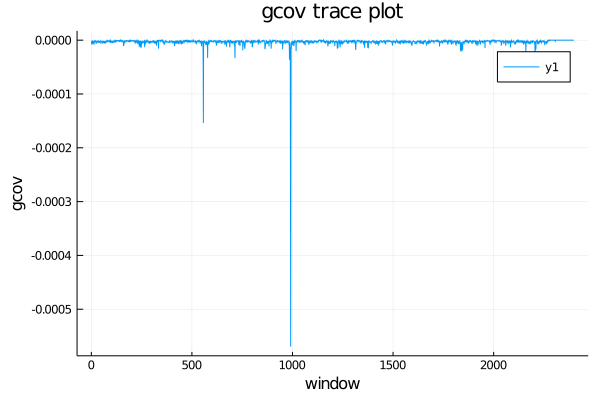

In [16]:
using Plots
x = rg[!,2]; y = rg[!,9]; # These are the plotting data
plot(x,y, title = "gcov trace plot",
        xlabel = "window", ylabel = "gcov")

In [17]:
# Find the window that explanied most gcov
findmin(rg[!,9])

(-0.0005694607113555806, 991)

In [18]:
@time Nur2ADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:38:21


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼───────────┤
│ 1    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.000130236    │ 9.96499e-5  │ 4.36     │ 0.852   │ 0.852     │
│ 2    │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 5.70631e-5     │ 5.53765e-5  │ 1.92     │ 0.77    │ 0.811     │
│ 3    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 6.85642e-5     │ 8.21451e-5  │ 2.32     │ 0.71    │ 0.777333  │
│ 4    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.95132e-5     │ 2.82326e-5  │ 0.66     │ 0.554   │ 0.7215    │
│ 5    │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 4.71218e-5     │ 6.95032e-5  │ 1.57     │ 0.536   │ 0.6844    │
│ 6    │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 1.57015e-5     │ 3.23948e-5  │ 0.52     │ 0.436   │ 0.643     │
│ 7    │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 1.9333e-5      │ 3.55837e-5  │ 0.63     │ 0.408   │ 0.609429  │
│ 8    │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 1.01284e-5     │ 2.19224e-5  │ 0.34     │ 0.406   │ 0.584     │
│ 9    │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 1.00619e-5     │ 2.18832e-5  │ 0.34     │ 0.342   │ 0.557111  │
│ 10   │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 8.48734e-6     │ 2.1053e-5   │ 0.29     │ 0.334   │ 0.5348    │
│ 11   │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 8.96556e-6     │ 2.10803e-5  │ 0.29     │ 0.326   │ 0.515818  │
│ 12   │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 5.74366e-6     │ 1.3312e-5   │ 0.19     │ 0.306   │ 0.498333  │
│ 13   │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 7.09425e-6     │ 1.71251e-5  │ 0.24     │ 0.302   │ 0.483231  │
│ 14   │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 8.51489e-6     │ 2.08405e-5  │ 0.29     │ 0.292   │ 0.469571  │
│ 15   │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 4.4699e-6      │ 1.00635e-5  │ 0.15     │ 0.288   │ 0.457467  │
│ 16   │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 5.9482e-6      │ 1.58742e-5  │ 0.2      │ 0.286   │ 0.44675   │
│ 17   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 6.14752e-6     │ 1.88828e-5  │ 0.2      │ 0.284   │ 0.437176  │
│ 18   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 4.58134e-6     │ 1.11662e-5  │ 0.15     │ 0.274   │ 0.428111  │
│ 19   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 4.54461e-6     │ 1.10199e-5  │ 0.15     │ 0.27    │ 0.419789  │
│ 20   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 4.56816e-6     │ 1.15276e-5  │ 0.15     │ 0.27    │ 0.4123    │
│ 21   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 3.9462e-6      │ 9.76759e-6  │ 0.14     │ 0.268   │ 0.405429  │
│ 22   │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 4.35868e-6     │ 1.01235e-5  │ 0.15     │ 0.268   │ 0.399182  │
│ 23   │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 7.83211e-6     │ 1.954e-5    │ 0.26     │ 0.264   │ 0.393304  │
│ 24   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 4.67355e-6     │ 1.16956e-5  │ 0.16     │ 0.264   │ 0.387917  │
│ 25   │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 4.4095e-6      │ 1.14424e-5  │ 0.15     │ 0.264   │ 0.38296   │
│ 26   │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 5.02776e-6     │ 1.2613e-5   │ 0.17     │ 0.26    │ 0.378231  │
│ 27   │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 6.25103e-6     │ 1.95246e-5  │ 0.21     │ 0.258   │ 0.373778  │
│ 28   │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 3.62502e-6     │ 8.94653e-6  │ 0.12     │ 0.258   │ 0.369643  │
│ 29   │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 3.81856e-6     │ 8.74271e-6  │ 0.13     │ 0.256   │ 0.365724  │
│ 30   │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 4.53273e-6     │ 1.1929e-5   │ 0.15     │ 0.252   │ 0.361933  │
│ 31   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 3.79249e-6     │ 8.90733e-6  │ 0.13     │ 0.246   │ 0.358194  │
│ 32   │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 4.00593e-6     │ 9.90221e-6  │ 0.13     │ 0.244   │ 0.354625  │
│ 33   │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 6.69981e-6     │ 1.95732e-5  │ 0.22     │ 0.242   │ 0.351212  │
│ 34   │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 4.19357e-6     │ 1.09917e-5  │ 0.14     │ 0.242   │ 0.348     │
│ 35   │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 2.94778e-6     │ 8.11944e-6  │ 0.1      │ 0.24    │ 0.344914  │
│ 36   │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 4.19157e-6     │ 1.00362e-5  │ 0.14     │ 0.24    │ 0.342     │
│ 37   │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 3.7633e-6      │ 9.06152e-6  │ 0.13     │ 0.24    │ 0.339243  │
│ 38   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 3.88614e-6     │ 1.19015e-5  │ 0.13     │ 0.236   │ 0.336526  │
│ 39   │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 3.81895e-6     │ 1.13348e-5  │ 0.13     │ 0.236   │ 0.333949  │
│ 40   │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 4.5221e-6      │ 1.22096e-5  │ 0.15     │ 0.236   │ 0.3315    │
│ 41   │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 3.83274e-6     │ 1.04671e-5  │ 0.13     │ 0.236   │ 0.329171  │
│ 42   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 3.57818e-6     │ 8.37727e-6  │ 0.12     │ 0.236   │ 0.326952  │
│ 43   │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 2.99454e-6     │ 6.94514e-6  │ 0.1      │ 0.234   │ 0.324791  │
│ 44   │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 3.39351e-6     │ 9.17554e-6  │ 0.11     │ 0.232   │ 0.322682  │
│ 45   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.55177e-6     │ 6.16589e-6  │ 0.09     │ 0.23    │ 0.320622  │
│ 46   │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 5.11372e-6     │ 1.48017e-5  │ 0.17     │ 0.23    │ 0.318652  │
│ 47   │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 5.08991e-6     │ 1.3923e-5   │ 0.17     │ 0.23    │ 0.316766  │
│ 48   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 3.89743e-6     │ 1.35778e-5  │ 0.13     │ 0.228   │ 0.314917  │
│ 49   │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 2.5743e-6      │ 6.42073e-6  │ 0.09     │ 0.226   │ 0.313102  │
│ 50   │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 3.64473e-6     │ 1.02787e-5  │ 0.12     │ 0.226   │ 0.31136   │
│ 51   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 3.53879e-6     │ 9.37912e-6  │ 0.12     │ 0.226   │ 0.309686  │
│ 52   │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 3.4489e-6      │ 9.2555e-6   │ 0.11     │ 0.226   │ 0.308077  │
│ 53   │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 4.25733e-6     │ 1.41233e-5  │ 0.14     │ 0.224   │ 0.306491  │
│ 54   │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 4.99267e-6     │ 1.70698e-5  │ 0.17     │ 0.224   │ 0.304963  │
│ 55   │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 3.8591e-6      │ 1.04471e-5  │ 0.13     │ 0.224   │ 0.303491  │
│ 56   │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 4.17815e-6     │ 1.18938e-5  │ 0.14     │ 0.222   │ 0.302036  │
│ 57   │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 3.16694e-6     │ 8.39235e-6  │ 0.11     │ 0.222   │ 0.300632  │
│ 58   │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 2.85022e-6     │ 8.75252e-6  │ 0.09     │ 0.22    │ 0.299241  │
│ 59   │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 3.64553e-6     │ 9.61824e-6  │ 0.12     │ 0.218   │ 0.297864  │
│ 60   │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 4.97915e-6     │ 1.46229e-5  │ 0.17     │ 0.216   │ 0.2965    │
│ 61   │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 3.04209e-6     │ 8.90989e-6  │ 0.1      │ 0.214   │ 0.295148  │
│ 62   │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 3.69173e-6     │ 1.0678e-5   │ 0.12     │ 0.212   │ 0.293806  │
│ 63   │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 3.80588e-6     │ 1.03503e-5  │ 0.13     │ 0.212   │ 0.292508  │
│ 64   │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 2.786e-6       │ 6.86312e-6  │ 0.1      │ 0.212   │ 0.29125   │
│ 65   │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 2.7136e-6      │ 6.59657e-6  │ 0.09     │ 0.212   │ 0.290031  │
│ 66   │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 3.02292e-6     │ 8.36984e-6  │ 0.1      │ 0.21    │ 0.288818  │
│ 67   │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.24087e-6     │ 5.85987e-6  │ 0.08     │ 0.208   │ 0.287612  │
│ 68   │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 2.31044e-6     │ 5.68773e-6  │ 0.08     │ 0.206   │ 0.286412  │
│ 69   │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.54413e-6     │ 6.27578e-6  │ 0.08     │ 0.206   │ 0.285246  │
│ 70   │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 2.84318e-6     │ 7.73411e-6  │ 0.1      │ 0.206   │ 0.284114  │
│ 71   │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 2.92813e-6     │ 8.24843e-6  │ 0.1      │ 0.204   │ 0.282986  │
│ 72   │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 3.82395e-6     │ 1.1822e-5   │ 0.13     │ 0.202   │ 0.281861  │
│ 73   │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 3.26767e-6     │ 1.16145e-5  │ 0.11     │ 0.202   │ 0.280767  │
│ 74   │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 3.51442e-6     │ 1.12133e-5  │ 0.12     │ 0.2     │ 0.279676  │
│ 75   │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 2.20756e-6     │ 5.21668e-6  │ 0.08     │ 0.2     │ 0.278613  │
│ 76   │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 3.37834e-6     │ 1.01442e-5  │ 0.11     │ 0.2     │ 0.277579  │
│ 77   │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 3.23054e-6     │ 9.32135e-6  │ 0.11     │ 0.198   │ 0.276545  │
│ 78   │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 2.47052e-6     │ 6.98333e-6  │ 0.08     │ 0.198   │ 0.275538  │
│ 79   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 3.16613e-6     │ 8.08496e-6  │ 0.11     │ 0.196   │ 0.274532  │
│ 80   │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.27031e-6     │ 6.05555e-6  │ 0.08     │ 0.196   │ 0.27355   │
│ 81   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 3.49938e-6     │ 9.4829e-6   │ 0.12     │ 0.196   │ 0.272593  │
│ 82   │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 3.04183e-6     │ 8.71713e-6  │ 0.1      │ 0.194   │ 0.271634  │
│ 83   │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 2.43261e-6     │ 6.0308e-6   │ 0.08     │ 0.194   │ 0.270699  │
│ 84   │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 2.3065e-6      │ 6.40025e-6  │ 0.08     │ 0.194   │ 0.269786  │
│ 85   │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 2.22268e-6     │ 5.84008e-6  │ 0.08     │ 0.194   │ 0.268894  │
│ 86   │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 2.46453e-6     │ 6.83235e-6  │ 0.09     │ 0.194   │ 0.268023  │
│ 87   │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.20627e-6     │ 6.19322e-6  │ 0.07     │ 0.192   │ 0.267149  │
│ 88   │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 5.41344e-6     │ 1.6788e-5   │ 0.18     │ 0.19    │ 0.266273  │
│ 89   │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 3.16922e-6     │ 9.67853e-6  │ 0.11     │ 0.19    │ 0.265416  │
│ 90   │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 2.35597e-6     │ 6.80652e-6  │ 0.08     │ 0.19    │ 0.264578  │
│ 91   │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 3.30339e-6     │ 1.13565e-5  │ 0.11     │ 0.19    │ 0.263758  │
│ 92   │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 2.62826e-6     │ 7.273e-6    │ 0.09     │ 0.188   │ 0.262935  │
│ 93   │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 2.42943e-6     │ 6.41962e-6  │ 0.08     │ 0.188   │ 0.262129  │
│ 94   │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 2.44327e-6     │ 6.9448e-6   │ 0.08     │ 0.188   │ 0.26134   │
│ 95   │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 2.84958e-6     │ 8.55873e-6  │ 0.1      │ 0.188   │ 0.260568  │
│ 96   │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 2.53704e-6     │ 6.80801e-6  │ 0.09     │ 0.188   │ 0.259813  │
│ 97   │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 2.63897e-6     │ 6.86075e-6  │ 0.09     │ 0.188   │ 0.259072  │
│ 98   │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 2.63539e-6     │ 7.20027e-6  │ 0.09     │ 0.186   │ 0.258327  │
│ 99   │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 2.13644e-6     │ 5.27486e-6  │ 0.07     │ 0.186   │ 0.257596  │
│ 100  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 3.93275e-6     │ 1.3243e-5   │ 0.13     │ 0.186   │ 0.25688   │
│ 101  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 2.75246e-6     │ 7.87081e-6  │ 0.09     │ 0.186   │ 0.256178  │
│ 102  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 2.79154e-6     │ 7.75417e-6  │ 0.09     │ 0.186   │ 0.25549   │
│ 103  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 3.03441e-6     │ 8.98283e-6  │ 0.1      │ 0.186   │ 0.254816  │
│ 104  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 2.45045e-6     │ 6.73181e-6  │ 0.08     │ 0.184   │ 0.254135  │
│ 105  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 2.4304e-6      │ 7.21611e-6  │ 0.08     │ 0.184   │ 0.253467  │
│ 106  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 3.01865e-6     │ 1.00442e-5  │ 0.1      │ 0.184   │ 0.252811  │
│ 107  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.81335e-6     │ 4.17732e-6  │ 0.06     │ 0.182   │ 0.25215   │
│ 108  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 2.83118e-6     │ 8.7366e-6   │ 0.09     │ 0.182   │ 0.2515    │
│ 109  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 2.19073e-6     │ 6.1979e-6   │ 0.07     │ 0.182   │ 0.250862  │
│ 110  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 2.51826e-6     │ 7.51935e-6  │ 0.08     │ 0.182   │ 0.250236  │
│ 111  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 2.73774e-6     │ 8.72052e-6  │ 0.09     │ 0.182   │ 0.249622  │
│ 112  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.93737e-6     │ 5.53316e-6  │ 0.07     │ 0.18    │ 0.249     │
│ 113  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 2.30318e-6     │ 6.90507e-6  │ 0.08     │ 0.18    │ 0.248389  │
│ 114  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 2.72409e-6     │ 7.75119e-6  │ 0.09     │ 0.18    │ 0.247789  │
│ 115  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 2.70412e-6     │ 8.99137e-6  │ 0.09     │ 0.18    │ 0.2472    │
│ 116  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 2.60639e-6     │ 7.68353e-6  │ 0.09     │ 0.18    │ 0.246621  │
│ 117  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 3.43196e-6     │ 1.00276e-5  │ 0.11     │ 0.178   │ 0.246034  │
│ 118  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 4.88172e-6     │ 1.56355e-5  │ 0.17     │ 0.178   │ 0.245458  │
│ 119  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 2.88428e-6     │ 9.59761e-6  │ 0.1      │ 0.178   │ 0.244891  │
│ 120  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 2.12331e-6     │ 6.30091e-6  │ 0.07     │ 0.178   │ 0.244333  │
│ 121  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 1.87909e-6     │ 4.48819e-6  │ 0.06     │ 0.178   │ 0.243785  │
│ 122  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 2.15549e-6     │ 5.91174e-6  │ 0.07     │ 0.178   │ 0.243246  │
│ 123  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 3.03412e-6     │ 9.59662e-6  │ 0.1      │ 0.178   │ 0.242715  │
│ 124  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 2.35383e-6     │ 7.09388e-6  │ 0.08     │ 0.178   │ 0.242194  │
│ 125  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 2.23535e-6     │ 6.81712e-6  │ 0.08     │ 0.178   │ 0.24168   │
│ 126  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.73793e-6     │ 3.8524e-6   │ 0.06     │ 0.178   │ 0.241175  │
│ 127  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 2.01592e-6     │ 5.33647e-6  │ 0.07     │ 0.178   │ 0.240677  │
│ 128  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 2.39402e-6     │ 7.35546e-6  │ 0.08     │ 0.176   │ 0.240172  │
│ 129  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 2.11708e-6     │ 4.7163e-6   │ 0.07     │ 0.176   │ 0.239674  │
│ 130  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.8692e-6      │ 4.68281e-6  │ 0.06     │ 0.176   │ 0.239185  │
│ 131  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 2.3031e-6      │ 6.0294e-6   │ 0.08     │ 0.174   │ 0.238687  │
│ 132  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 2.68827e-6     │ 8.23213e-6  │ 0.09     │ 0.174   │ 0.238197  │
│ 133  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 1.88663e-6     │ 4.48238e-6  │ 0.06     │ 0.174   │ 0.237714  │
│ 134  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 2.41937e-6     │ 7.7451e-6   │ 0.08     │ 0.174   │ 0.237239  │
│ 135  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.1308e-6      │ 6.25464e-6  │ 0.07     │ 0.174   │ 0.23677   │
│ 136  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 2.30927e-6     │ 6.83243e-6  │ 0.08     │ 0.174   │ 0.236309  │
│ 137  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.9762e-6      │ 5.76475e-6  │ 0.07     │ 0.174   │ 0.235854  │
│ 138  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 2.17765e-6     │ 5.8249e-6   │ 0.07     │ 0.174   │ 0.235406  │
│ 139  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 1.96158e-6     │ 5.03515e-6  │ 0.07     │ 0.174   │ 0.234964  │
│ 140  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 2.07544e-6     │ 5.67113e-6  │ 0.07     │ 0.174   │ 0.234529  │
│ 141  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 2.19064e-6     │ 6.23555e-6  │ 0.07     │ 0.172   │ 0.234085  │
│ 142  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 3.1491e-6      │ 1.08839e-5  │ 0.11     │ 0.172   │ 0.233648  │
│ 143  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 2.31594e-6     │ 6.67595e-6  │ 0.08     │ 0.172   │ 0.233217  │
│ 144  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.05463e-6     │ 6.25857e-6  │ 0.07     │ 0.172   │ 0.232792  │
│ 145  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 2.45371e-6     │ 7.39823e-6  │ 0.08     │ 0.172   │ 0.232372  │
│ 146  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 2.91951e-6     │ 1.14214e-5  │ 0.1      │ 0.172   │ 0.231959  │
│ 147  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 2.0986e-6      │ 6.31936e-6  │ 0.07     │ 0.172   │ 0.231551  │
│ 148  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 2.35994e-6     │ 7.35244e-6  │ 0.08     │ 0.172   │ 0.231149  │
│ 149  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.79723e-6     │ 4.48773e-6  │ 0.06     │ 0.17    │ 0.230738  │
│ 150  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 2.2212e-6      │ 7.33343e-6  │ 0.07     │ 0.17    │ 0.230333  │
│ 151  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 2.24088e-6     │ 6.07616e-6  │ 0.08     │ 0.17    │ 0.229934  │
│ 152  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 2.52197e-6     │ 9.82411e-6  │ 0.09     │ 0.17    │ 0.229539  │
│ 153  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 2.37902e-6     │ 8.01209e-6  │ 0.08     │ 0.17    │ 0.22915   │
│ 154  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 2.26518e-6     │ 6.51332e-6  │ 0.08     │ 0.17    │ 0.228766  │
│ 155  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.71596e-6     │ 5.19317e-6  │ 0.06     │ 0.168   │ 0.228374  │
│ 156  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 2.4343e-6      │ 8.01481e-6  │ 0.08     │ 0.168   │ 0.227987  │
│ 157  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 6.86548e-6     │ 2.65993e-5  │ 0.23     │ 0.168   │ 0.227605  │
│ 158  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 2.16551e-6     │ 6.73249e-6  │ 0.07     │ 0.168   │ 0.227228  │
│ 159  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 2.59286e-6     │ 8.16442e-6  │ 0.09     │ 0.168   │ 0.226855  │
│ 160  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 1.67537e-6     │ 4.07532e-6  │ 0.06     │ 0.168   │ 0.226488  │
│ 161  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 2.13782e-6     │ 6.96072e-6  │ 0.07     │ 0.168   │ 0.226124  │
│ 162  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 2.24456e-6     │ 6.67236e-6  │ 0.08     │ 0.168   │ 0.225765  │
│ 163  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 2.56972e-6     │ 8.07389e-6  │ 0.09     │ 0.168   │ 0.225411  │
│ 164  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 2.63226e-6     │ 9.53526e-6  │ 0.09     │ 0.168   │ 0.225061  │
│ 165  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.90339e-6     │ 4.93112e-6  │ 0.06     │ 0.166   │ 0.224703  │
│ 166  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 2.44601e-6     │ 6.5651e-6   │ 0.08     │ 0.166   │ 0.224349  │
│ 167  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.16972e-6     │ 6.97065e-6  │ 0.07     │ 0.166   │ 0.224     │
│ 168  │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 2.10869e-6     │ 7.13797e-6  │ 0.07     │ 0.166   │ 0.223655  │
│ 169  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 4.51536e-6     │ 1.73978e-5  │ 0.15     │ 0.166   │ 0.223314  │
│ 170  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.69073e-6     │ 4.1321e-6   │ 0.06     │ 0.166   │ 0.222976  │
│ 171  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.49346e-6     │ 6.83743e-6  │ 0.08     │ 0.166   │ 0.222643  │
│ 172  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 2.19896e-6     │ 6.61549e-6  │ 0.07     │ 0.166   │ 0.222314  │
│ 173  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.60252e-6     │ 4.06043e-6  │ 0.06     │ 0.166   │ 0.221988  │
│ 174  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 2.00865e-6     │ 5.75439e-6  │ 0.07     │ 0.166   │ 0.221667  │
│ 175  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 2.21097e-6     │ 7.06392e-6  │ 0.08     │ 0.166   │ 0.221349  │
│ 176  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 2.61462e-6     │ 7.68266e-6  │ 0.09     │ 0.166   │ 0.221034  │
│ 177  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 2.82876e-6     │ 9.99788e-6  │ 0.09     │ 0.164   │ 0.220712  │
│ 178  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.35626e-6     │ 6.89159e-6  │ 0.08     │ 0.164   │ 0.220393  │
│ 179  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 1.6842e-6      │ 4.735e-6    │ 0.06     │ 0.164   │ 0.220078  │
│ 180  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 2.35377e-6     │ 8.08279e-6  │ 0.08     │ 0.164   │ 0.219767  │
│ 181  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 1.58041e-6     │ 4.01697e-6  │ 0.05     │ 0.164   │ 0.219459  │
│ 182  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 1.64009e-6     │ 3.95736e-6  │ 0.06     │ 0.164   │ 0.219154  │
│ 183  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.73164e-6     │ 5.27215e-6  │ 0.06     │ 0.162   │ 0.218842  │
│ 184  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 2.05548e-6     │ 6.81383e-6  │ 0.07     │ 0.162   │ 0.218533  │
│ 185  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.74336e-6     │ 5.00232e-6  │ 0.06     │ 0.162   │ 0.218227  │
│ 186  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.65487e-6     │ 7.63249e-6  │ 0.09     │ 0.162   │ 0.217925  │
│ 187  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 2.10166e-6     │ 6.43393e-6  │ 0.07     │ 0.162   │ 0.217626  │
│ 188  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.76933e-6     │ 4.91662e-6  │ 0.06     │ 0.162   │ 0.21733   │
│ 189  │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 2.39234e-6     │ 7.14757e-6  │ 0.08     │ 0.162   │ 0.217037  │
│ 190  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.69735e-6     │ 4.37158e-6  │ 0.06     │ 0.162   │ 0.216747  │
│ 191  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.89032e-6     │ 5.47932e-6  │ 0.06     │ 0.162   │ 0.216461  │
│ 192  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 2.01228e-6     │ 5.48161e-6  │ 0.07     │ 0.162   │ 0.216177  │
│ 193  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 2.38047e-6     │ 6.98558e-6  │ 0.08     │ 0.162   │ 0.215896  │
│ 194  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.79027e-6     │ 5.42025e-6  │ 0.06     │ 0.162   │ 0.215619  │
│ 195  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 2.45152e-6     │ 8.26288e-6  │ 0.08     │ 0.162   │ 0.215344  │
│ 196  │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 2.73676e-6     │ 7.85715e-6  │ 0.09     │ 0.162   │ 0.215071  │
│ 197  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.52645e-6     │ 7.78479e-6  │ 0.08     │ 0.162   │ 0.214802  │
│ 198  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 1.80119e-6     │ 4.683e-6    │ 0.06     │ 0.16    │ 0.214525  │
│ 199  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 2.08939e-6     │ 6.12208e-6  │ 0.07     │ 0.16    │ 0.214251  │
│ 200  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 1.72051e-6     │ 4.43923e-6  │ 0.06     │ 0.16    │ 0.21398   │
│ 201  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 2.58613e-6     │ 8.17266e-6  │ 0.09     │ 0.16    │ 0.213711  │
│ 202  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.92536e-6     │ 5.16958e-6  │ 0.06     │ 0.16    │ 0.213446  │
│ 203  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 2.44893e-6     │ 7.90445e-6  │ 0.08     │ 0.16    │ 0.213182  │
│ 204  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 2.01804e-6     │ 5.27245e-6  │ 0.07     │ 0.16    │ 0.212922  │
│ 205  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.78149e-6     │ 5.74634e-6  │ 0.06     │ 0.16    │ 0.212663  │
│ 206  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 1.83447e-6     │ 5.04842e-6  │ 0.06     │ 0.16    │ 0.212408  │
│ 207  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.76327e-6     │ 4.47482e-6  │ 0.06     │ 0.16    │ 0.212155  │
│ 208  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.74883e-6     │ 4.28536e-6  │ 0.06     │ 0.16    │ 0.211904  │
│ 209  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 1.70453e-6     │ 4.77269e-6  │ 0.06     │ 0.16    │ 0.211656  │
│ 210  │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 2.0898e-6      │ 5.99339e-6  │ 0.07     │ 0.16    │ 0.21141   │
│ 211  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 2.07903e-6     │ 7.38646e-6  │ 0.07     │ 0.158   │ 0.211156  │
│ 212  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 2.13388e-6     │ 6.54212e-6  │ 0.07     │ 0.158   │ 0.210906  │
│ 213  │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 2.40181e-6     │ 7.14046e-6  │ 0.08     │ 0.158   │ 0.210657  │
│ 214  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 1.84723e-6     │ 5.0021e-6   │ 0.06     │ 0.158   │ 0.210411  │
│ 215  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 1.97574e-6     │ 5.6606e-6   │ 0.07     │ 0.158   │ 0.210167  │
│ 216  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 7.2648e-6      │ 3.15524e-5  │ 0.24     │ 0.158   │ 0.209926  │
│ 217  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 1.82349e-6     │ 4.92327e-6  │ 0.06     │ 0.158   │ 0.209687  │
│ 218  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.66267e-6     │ 4.96985e-6  │ 0.06     │ 0.158   │ 0.20945   │
│ 219  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.63087e-6     │ 4.96739e-6  │ 0.06     │ 0.158   │ 0.209215  │
│ 220  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.91673e-6     │ 5.60936e-6  │ 0.06     │ 0.158   │ 0.208982  │
│ 221  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 2.0838e-6      │ 5.52399e-6  │ 0.07     │ 0.158   │ 0.208751  │
│ 222  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 2.3783e-6      │ 7.47413e-6  │ 0.08     │ 0.158   │ 0.208523  │
│ 223  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 1.62309e-6     │ 4.17582e-6  │ 0.05     │ 0.158   │ 0.208296  │
│ 224  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 1.74849e-6     │ 5.72115e-6  │ 0.06     │ 0.156   │ 0.208063  │
│ 225  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 2.14436e-6     │ 7.01048e-6  │ 0.07     │ 0.156   │ 0.207831  │
│ 226  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.65313e-6     │ 4.2175e-6   │ 0.06     │ 0.156   │ 0.207602  │
│ 227  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 2.45759e-6     │ 8.86481e-6  │ 0.08     │ 0.156   │ 0.207374  │
│ 228  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.87254e-6     │ 5.1643e-6   │ 0.06     │ 0.156   │ 0.207149  │
│ 229  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.75095e-6     │ 5.29485e-6  │ 0.06     │ 0.156   │ 0.206926  │
│ 230  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.60235e-6     │ 4.24635e-6  │ 0.05     │ 0.156   │ 0.206704  │
│ 231  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 2.44219e-6     │ 7.39204e-6  │ 0.08     │ 0.156   │ 0.206485  │
│ 232  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 2.27687e-6     │ 7.16785e-6  │ 0.08     │ 0.156   │ 0.206267  │
│ 233  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.84572e-6     │ 5.23751e-6  │ 0.06     │ 0.156   │ 0.206052  │
│ 234  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.96235e-6     │ 5.77293e-6  │ 0.07     │ 0.156   │ 0.205838  │
│ 235  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 1.86409e-6     │ 5.39461e-6  │ 0.06     │ 0.156   │ 0.205626  │
│ 236  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 3.76803e-6     │ 1.27643e-5  │ 0.13     │ 0.156   │ 0.205415  │
│ 237  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 2.13048e-6     │ 6.6217e-6   │ 0.07     │ 0.156   │ 0.205207  │
│ 238  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 2.25088e-6     │ 6.16333e-6  │ 0.08     │ 0.156   │ 0.205     │
│ 239  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.67298e-6     │ 4.66977e-6  │ 0.06     │ 0.156   │ 0.204795  │
│ 240  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 2.35858e-6     │ 7.25599e-6  │ 0.08     │ 0.156   │ 0.204592  │
│ 241  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.64789e-6     │ 4.73017e-6  │ 0.06     │ 0.154   │ 0.204382  │
│ 242  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 1.86837e-6     │ 5.20145e-6  │ 0.06     │ 0.154   │ 0.204174  │
│ 243  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.77782e-6     │ 4.81239e-6  │ 0.06     │ 0.154   │ 0.203967  │
│ 244  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.94003e-6     │ 5.8779e-6   │ 0.07     │ 0.154   │ 0.203762  │
│ 245  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.78259e-6     │ 5.42084e-6  │ 0.06     │ 0.154   │ 0.203559  │
│ 246  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.64479e-6     │ 6.24492e-6  │ 0.06     │ 0.154   │ 0.203358  │
│ 247  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.95027e-6     │ 6.08161e-6  │ 0.07     │ 0.154   │ 0.203158  │
│ 248  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 1.72937e-6     │ 6.36833e-6  │ 0.06     │ 0.154   │ 0.20296   │
│ 249  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.92311e-6     │ 5.55926e-6  │ 0.06     │ 0.154   │ 0.202763  │
│ 250  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 1.85186e-6     │ 6.3893e-6   │ 0.06     │ 0.152   │ 0.20256   │
│ 251  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 1.73312e-6     │ 5.41317e-6  │ 0.06     │ 0.152   │ 0.202359  │
│ 252  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 1.49909e-6     │ 4.25953e-6  │ 0.05     │ 0.152   │ 0.202159  │
│ 253  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 3.7178e-6      │ 1.33077e-5  │ 0.12     │ 0.152   │ 0.20196   │
│ 254  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.52384e-6     │ 4.09242e-6  │ 0.05     │ 0.152   │ 0.201764  │
│ 255  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.16089e-6     │ 6.24065e-6  │ 0.07     │ 0.152   │ 0.201569  │
│ 256  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.84876e-6     │ 5.14637e-6  │ 0.06     │ 0.152   │ 0.201375  │
│ 257  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.52308e-6     │ 3.89386e-6  │ 0.05     │ 0.152   │ 0.201183  │
│ 258  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.64369e-6     │ 4.78757e-6  │ 0.06     │ 0.152   │ 0.200992  │
│ 259  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.89255e-6     │ 5.34035e-6  │ 0.06     │ 0.152   │ 0.200803  │
│ 260  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 1.44959e-6     │ 3.41882e-6  │ 0.05     │ 0.152   │ 0.200615  │
│ 261  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 1.63194e-6     │ 4.46201e-6  │ 0.06     │ 0.152   │ 0.200429  │
│ 262  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 2.09536e-6     │ 6.27507e-6  │ 0.07     │ 0.152   │ 0.200244  │
│ 263  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.30572e-6     │ 8.45295e-6  │ 0.08     │ 0.152   │ 0.200061  │
│ 264  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.98949e-6     │ 6.40083e-6  │ 0.07     │ 0.152   │ 0.199879  │
│ 265  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 1.53582e-6     │ 4.61238e-6  │ 0.05     │ 0.152   │ 0.199698  │
│ 266  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.86145e-6     │ 5.1809e-6   │ 0.06     │ 0.152   │ 0.199519  │
│ 267  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.78583e-6     │ 4.86654e-6  │ 0.06     │ 0.152   │ 0.199341  │
│ 268  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.59732e-6     │ 4.17137e-6  │ 0.05     │ 0.152   │ 0.199164  │
│ 269  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.55632e-6     │ 4.42244e-6  │ 0.05     │ 0.15    │ 0.198981  │
│ 270  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.80622e-6     │ 5.14967e-6  │ 0.06     │ 0.15    │ 0.1988    │
│ 271  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 2.17394e-6     │ 6.2477e-6   │ 0.07     │ 0.15    │ 0.19862   │
│ 272  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 2.26619e-6     │ 7.02918e-6  │ 0.08     │ 0.15    │ 0.198441  │
│ 273  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 1.81098e-6     │ 5.63563e-6  │ 0.06     │ 0.15    │ 0.198264  │
│ 274  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.04086e-6     │ 5.76214e-6  │ 0.07     │ 0.15    │ 0.198088  │
│ 275  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.55327e-6     │ 4.14137e-6  │ 0.05     │ 0.15    │ 0.197913  │
│ 276  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.51524e-6     │ 3.85437e-6  │ 0.05     │ 0.15    │ 0.197739  │
│ 277  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 1.87505e-6     │ 5.87126e-6  │ 0.07     │ 0.15    │ 0.197567  │
│ 278  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.67209e-6     │ 4.82612e-6  │ 0.06     │ 0.15    │ 0.197396  │
│ 279  │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 2.536e-6       │ 7.88664e-6  │ 0.09     │ 0.15    │ 0.197226  │
│ 280  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 2.31035e-6     │ 9.12251e-6  │ 0.08     │ 0.15    │ 0.197057  │
│ 281  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.58934e-6     │ 4.05685e-6  │ 0.05     │ 0.148   │ 0.196883  │
│ 282  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.49043e-6     │ 3.92111e-6  │ 0.05     │ 0.148   │ 0.196709  │
│ 283  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.74237e-6     │ 5.37886e-6  │ 0.06     │ 0.148   │ 0.196537  │
│ 284  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.62999e-6     │ 4.1028e-6   │ 0.06     │ 0.148   │ 0.196366  │
│ 285  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.70235e-6     │ 4.81263e-6  │ 0.06     │ 0.148   │ 0.196196  │
│ 286  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 2.54106e-6     │ 8.5223e-6   │ 0.09     │ 0.148   │ 0.196028  │
│ 287  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.58575e-6     │ 4.29346e-6  │ 0.05     │ 0.148   │ 0.195861  │
│ 288  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.54148e-6     │ 4.0139e-6   │ 0.05     │ 0.148   │ 0.195694  │
│ 289  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 1.73659e-6     │ 5.20079e-6  │ 0.06     │ 0.148   │ 0.195529  │
│ 290  │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.92536e-6     │ 6.02121e-6  │ 0.07     │ 0.148   │ 0.195366  │
│ 291  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.70281e-6     │ 4.60767e-6  │ 0.06     │ 0.148   │ 0.195203  │
│ 292  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 1.68589e-6     │ 4.35565e-6  │ 0.06     │ 0.148   │ 0.195041  │
│ 293  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.49201e-6     │ 3.9488e-6   │ 0.05     │ 0.148   │ 0.194881  │
│ 294  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 2.09545e-6     │ 7.88597e-6  │ 0.07     │ 0.148   │ 0.194721  │
│ 295  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.88949e-6     │ 5.74161e-6  │ 0.06     │ 0.148   │ 0.194563  │
│ 296  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 1.90112e-6     │ 5.26516e-6  │ 0.07     │ 0.148   │ 0.194405  │
│ 297  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.55277e-6     │ 4.93762e-6  │ 0.05     │ 0.148   │ 0.194249  │
│ 298  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.90414e-6     │ 5.85474e-6  │ 0.06     │ 0.148   │ 0.194094  │
│ 299  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 1.87471e-6     │ 5.49122e-6  │ 0.06     │ 0.146   │ 0.193933  │
│ 300  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.66476e-6     │ 4.52591e-6  │ 0.06     │ 0.146   │ 0.193773  │
│ 301  │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 1.57661e-6     │ 4.30083e-6  │ 0.05     │ 0.146   │ 0.193615  │
│ 302  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.55726e-6     │ 4.26959e-6  │ 0.05     │ 0.146   │ 0.193457  │
│ 303  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.68751e-6     │ 4.96035e-6  │ 0.06     │ 0.146   │ 0.1933    │
│ 304  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.74449e-6     │ 5.17889e-6  │ 0.06     │ 0.146   │ 0.193145  │
│ 305  │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 1.96752e-6     │ 6.19089e-6  │ 0.07     │ 0.146   │ 0.19299   │
│ 306  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.84497e-6     │ 7.41834e-6  │ 0.06     │ 0.146   │ 0.192837  │
│ 307  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.36683e-6     │ 3.51844e-6  │ 0.05     │ 0.146   │ 0.192684  │
│ 308  │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 1.87511e-6     │ 6.20252e-6  │ 0.06     │ 0.146   │ 0.192532  │
│ 309  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 1.75053e-6     │ 4.93144e-6  │ 0.06     │ 0.146   │ 0.192382  │
│ 310  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 2.1446e-6      │ 7.21474e-6  │ 0.07     │ 0.146   │ 0.192232  │
│ 311  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 2.17183e-6     │ 7.14451e-6  │ 0.08     │ 0.146   │ 0.192084  │
│ 312  │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 1.95286e-6     │ 5.55638e-6  │ 0.07     │ 0.146   │ 0.191936  │
│ 313  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 2.12238e-6     │ 6.57755e-6  │ 0.07     │ 0.144   │ 0.191783  │
│ 314  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.96792e-6     │ 6.23624e-6  │ 0.07     │ 0.144   │ 0.191631  │
│ 315  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.88672e-6     │ 5.94837e-6  │ 0.06     │ 0.144   │ 0.191479  │
│ 316  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.58305e-6     │ 4.40916e-6  │ 0.05     │ 0.144   │ 0.191329  │
│ 317  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.55191e-6     │ 4.28651e-6  │ 0.05     │ 0.144   │ 0.19118   │
│ 318  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 1.91769e-6     │ 5.85621e-6  │ 0.06     │ 0.144   │ 0.191031  │
│ 319  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 1.50961e-6     │ 4.39586e-6  │ 0.05     │ 0.144   │ 0.190884  │
│ 320  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.39267e-6     │ 3.75366e-6  │ 0.05     │ 0.144   │ 0.190738  │
│ 321  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.73641e-6     │ 4.78809e-6  │ 0.06     │ 0.144   │ 0.190592  │
│ 322  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 1.86393e-6     │ 5.89139e-6  │ 0.06     │ 0.144   │ 0.190447  │
│ 323  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.50907e-6     │ 4.64702e-6  │ 0.05     │ 0.144   │ 0.190303  │
│ 324  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 1.18587e-6     │ 2.75733e-6  │ 0.04     │ 0.142   │ 0.190154  │
│ 325  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.33152e-6     │ 3.61298e-6  │ 0.04     │ 0.142   │ 0.190006  │
│ 326  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.91055e-6     │ 5.67735e-6  │ 0.06     │ 0.142   │ 0.189859  │
│ 327  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 1.62063e-6     │ 4.64159e-6  │ 0.05     │ 0.142   │ 0.189713  │
│ 328  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 1.79966e-6     │ 6.02669e-6  │ 0.06     │ 0.142   │ 0.189567  │
│ 329  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 1.83591e-6     │ 6.79371e-6  │ 0.06     │ 0.142   │ 0.189422  │
│ 330  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 1.34637e-6     │ 3.48936e-6  │ 0.05     │ 0.142   │ 0.189279  │
│ 331  │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 2.44279e-6     │ 8.87934e-6  │ 0.08     │ 0.142   │ 0.189136  │
│ 332  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.82432e-6     │ 5.51895e-6  │ 0.06     │ 0.142   │ 0.188994  │
│ 333  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.70976e-6     │ 4.98026e-6  │ 0.06     │ 0.142   │ 0.188853  │
│ 334  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 2.57908e-6     │ 9.34477e-6  │ 0.09     │ 0.142   │ 0.188713  │
│ 335  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.69971e-6     │ 5.21006e-6  │ 0.06     │ 0.142   │ 0.188573  │
│ 336  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.52325e-6     │ 4.20356e-6  │ 0.05     │ 0.142   │ 0.188435  │
│ 337  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.31596e-6     │ 3.32912e-6  │ 0.05     │ 0.142   │ 0.188297  │
│ 338  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 1.32094e-6     │ 3.34074e-6  │ 0.05     │ 0.142   │ 0.18816   │
│ 339  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.61317e-6     │ 4.30976e-6  │ 0.05     │ 0.142   │ 0.188024  │
│ 340  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.44536e-6     │ 4.68123e-6  │ 0.05     │ 0.142   │ 0.187888  │
│ 341  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 1.96342e-6     │ 6.63828e-6  │ 0.07     │ 0.142   │ 0.187754  │
│ 342  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.81394e-6     │ 5.2613e-6   │ 0.06     │ 0.142   │ 0.18762   │
│ 343  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.59363e-6     │ 4.13702e-6  │ 0.06     │ 0.142   │ 0.187487  │
│ 344  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.37849e-6     │ 3.35073e-6  │ 0.05     │ 0.14    │ 0.187349  │
│ 345  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 1.38246e-6     │ 3.75593e-6  │ 0.05     │ 0.14    │ 0.187212  │
│ 346  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.63134e-6     │ 5.24262e-6  │ 0.05     │ 0.14    │ 0.187075  │
│ 347  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 2.04542e-6     │ 9.38988e-6  │ 0.07     │ 0.14    │ 0.186939  │
│ 348  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 1.48936e-6     │ 4.43936e-6  │ 0.05     │ 0.14    │ 0.186805  │
│ 349  │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.64735e-6     │ 5.38334e-6  │ 0.06     │ 0.14    │ 0.18667   │
│ 350  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.44295e-6     │ 3.87496e-6  │ 0.05     │ 0.14    │ 0.186537  │
│ 351  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.85522e-6     │ 5.2554e-6   │ 0.06     │ 0.14    │ 0.186405  │
│ 352  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.90292e-6     │ 5.96187e-6  │ 0.06     │ 0.14    │ 0.186273  │
│ 353  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.80937e-6     │ 5.42623e-6  │ 0.06     │ 0.14    │ 0.186142  │
│ 354  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 2.58449e-6     │ 1.05729e-5  │ 0.09     │ 0.14    │ 0.186011  │
│ 355  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.26997e-6     │ 3.10262e-6  │ 0.04     │ 0.14    │ 0.185882  │
│ 356  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 1.82947e-6     │ 5.76005e-6  │ 0.06     │ 0.14    │ 0.185753  │
│ 357  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 1.38072e-6     │ 3.85629e-6  │ 0.05     │ 0.14    │ 0.185625  │
│ 358  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.82314e-6     │ 5.02612e-6  │ 0.06     │ 0.14    │ 0.185497  │
│ 359  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.69632e-6     │ 4.78593e-6  │ 0.06     │ 0.14    │ 0.18537   │
│ 360  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.89872e-6     │ 6.0973e-6   │ 0.06     │ 0.14    │ 0.185244  │
│ 361  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.43026e-6     │ 3.94871e-6  │ 0.05     │ 0.138   │ 0.185114  │
│ 362  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 1.7676e-6      │ 5.94276e-6  │ 0.06     │ 0.138   │ 0.184983  │
│ 363  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 2.26874e-6     │ 8.01701e-6  │ 0.08     │ 0.138   │ 0.184854  │
│ 364  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.43974e-6     │ 4.05001e-6  │ 0.05     │ 0.138   │ 0.184725  │
│ 365  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.40091e-6     │ 3.94387e-6  │ 0.05     │ 0.138   │ 0.184597  │
│ 366  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.59655e-6     │ 4.50137e-6  │ 0.05     │ 0.138   │ 0.18447   │
│ 367  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 2.19062e-6     │ 6.73502e-6  │ 0.07     │ 0.138   │ 0.184343  │
│ 368  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 1.94291e-6     │ 6.50972e-6  │ 0.07     │ 0.138   │ 0.184217  │
│ 369  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.41688e-6     │ 3.87791e-6  │ 0.05     │ 0.138   │ 0.184092  │
│ 370  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.6857e-6      │ 6.80059e-6  │ 0.06     │ 0.138   │ 0.183968  │
│ 371  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 1.96463e-6     │ 6.20467e-6  │ 0.07     │ 0.138   │ 0.183844  │
│ 372  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.55956e-6     │ 4.03665e-6  │ 0.05     │ 0.138   │ 0.18372   │
│ 373  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.57702e-6     │ 4.43023e-6  │ 0.05     │ 0.138   │ 0.183598  │
│ 374  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 1.35725e-6     │ 3.44762e-6  │ 0.05     │ 0.138   │ 0.183476  │
│ 375  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.69733e-6     │ 5.58267e-6  │ 0.06     │ 0.136   │ 0.183349  │
│ 376  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.50601e-6     │ 4.36554e-6  │ 0.05     │ 0.136   │ 0.183223  │
│ 377  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.58888e-6     │ 4.87693e-6  │ 0.05     │ 0.136   │ 0.183098  │
│ 378  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.62257e-6     │ 4.79924e-6  │ 0.06     │ 0.136   │ 0.182974  │
│ 379  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.70318e-6     │ 4.87832e-6  │ 0.06     │ 0.136   │ 0.18285   │
│ 380  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.77888e-6     │ 5.21394e-6  │ 0.06     │ 0.136   │ 0.182726  │
│ 381  │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 1.50024e-6     │ 4.70882e-6  │ 0.05     │ 0.136   │ 0.182604  │
│ 382  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.56163e-6     │ 4.62131e-6  │ 0.05     │ 0.136   │ 0.182482  │
│ 383  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.48372e-6     │ 4.17067e-6  │ 0.05     │ 0.136   │ 0.18236   │
│ 384  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.35753e-6     │ 3.50326e-6  │ 0.05     │ 0.136   │ 0.18224   │
│ 385  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.65245e-6     │ 4.88883e-6  │ 0.06     │ 0.136   │ 0.182119  │
│ 386  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.61365e-6     │ 4.9744e-6   │ 0.05     │ 0.136   │ 0.182     │
│ 387  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.35803e-6     │ 3.60532e-6  │ 0.05     │ 0.136   │ 0.181881  │
│ 388  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.36366e-6     │ 3.60705e-6  │ 0.05     │ 0.136   │ 0.181763  │
│ 389  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 1.19766e-6     │ 3.23983e-6  │ 0.04     │ 0.136   │ 0.181645  │
│ 390  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.40566e-6     │ 4.29675e-6  │ 0.05     │ 0.136   │ 0.181528  │
│ 391  │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 1.93929e-6     │ 6.12568e-6  │ 0.07     │ 0.136   │ 0.181412  │
│ 392  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.62995e-6     │ 4.39837e-6  │ 0.05     │ 0.136   │ 0.181296  │
│ 393  │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 2.01052e-6     │ 6.83386e-6  │ 0.07     │ 0.136   │ 0.181181  │
│ 394  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 1.58281e-6     │ 4.79853e-6  │ 0.05     │ 0.134   │ 0.181061  │
│ 395  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 2.39143e-6     │ 8.24292e-6  │ 0.08     │ 0.134   │ 0.180942  │
│ 396  │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 2.51842e-6     │ 1.02503e-5  │ 0.08     │ 0.134   │ 0.180823  │
│ 397  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.54459e-6     │ 4.77904e-6  │ 0.05     │ 0.134   │ 0.180705  │
│ 398  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.34894e-6     │ 4.55458e-6  │ 0.05     │ 0.134   │ 0.180588  │
│ 399  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 1.68139e-6     │ 5.08354e-6  │ 0.06     │ 0.134   │ 0.180471  │
│ 400  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 1.92144e-6     │ 6.34842e-6  │ 0.07     │ 0.134   │ 0.180355  │
│ 401  │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.92978e-6     │ 6.87743e-6  │ 0.07     │ 0.134   │ 0.180239  │
│ 402  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.81928e-6     │ 6.52543e-6  │ 0.06     │ 0.134   │ 0.180124  │
│ 403  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.29757e-6     │ 3.25306e-6  │ 0.04     │ 0.134   │ 0.18001   │
│ 404  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.67551e-6     │ 5.70224e-6  │ 0.06     │ 0.134   │ 0.179896  │
│ 405  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.97835e-6     │ 6.60325e-6  │ 0.07     │ 0.134   │ 0.179783  │
│ 406  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 1.49382e-6     │ 4.69135e-6  │ 0.05     │ 0.134   │ 0.17967   │
│ 407  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 1.66621e-6     │ 4.68982e-6  │ 0.06     │ 0.134   │ 0.179558  │
│ 408  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.98107e-6     │ 6.96815e-6  │ 0.07     │ 0.134   │ 0.179446  │
│ 409  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.19952e-6     │ 3.1203e-6   │ 0.04     │ 0.134   │ 0.179335  │
│ 410  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 1.27188e-6     │ 3.63279e-6  │ 0.04     │ 0.134   │ 0.179224  │
│ 411  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.64005e-6     │ 5.25513e-6  │ 0.05     │ 0.134   │ 0.179114  │
│ 412  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.37435e-6     │ 3.79636e-6  │ 0.05     │ 0.134   │ 0.179005  │
│ 413  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.92757e-6     │ 6.93629e-6  │ 0.06     │ 0.134   │ 0.178896  │
│ 414  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.49751e-6     │ 4.38551e-6  │ 0.05     │ 0.134   │ 0.178787  │
│ 415  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.58799e-6     │ 4.97257e-6  │ 0.05     │ 0.134   │ 0.17868   │
│ 416  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 1.48612e-6     │ 4.33524e-6  │ 0.05     │ 0.134   │ 0.178572  │
│ 417  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.21328e-6     │ 3.07509e-6  │ 0.04     │ 0.134   │ 0.178465  │
│ 418  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.58027e-6     │ 4.41356e-6  │ 0.05     │ 0.134   │ 0.178359  │
│ 419  │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.74523e-6     │ 5.86473e-6  │ 0.06     │ 0.134   │ 0.178253  │
│ 420  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.3295e-6      │ 3.7251e-6   │ 0.05     │ 0.134   │ 0.178148  │
│ 421  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.51906e-6     │ 5.0917e-6   │ 0.05     │ 0.132   │ 0.178038  │
│ 422  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.45939e-6     │ 3.84018e-6  │ 0.05     │ 0.132   │ 0.177929  │
│ 423  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.33886e-6     │ 3.68354e-6  │ 0.04     │ 0.132   │ 0.17782   │
│ 424  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.41499e-6     │ 4.83327e-6  │ 0.05     │ 0.132   │ 0.177712  │
│ 425  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.38237e-6     │ 3.91541e-6  │ 0.05     │ 0.132   │ 0.177605  │
│ 426  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 1.74842e-6     │ 5.79237e-6  │ 0.06     │ 0.132   │ 0.177498  │
│ 427  │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.43868e-6     │ 4.05582e-6  │ 0.05     │ 0.132   │ 0.177391  │
│ 428  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.67516e-6     │ 4.72446e-6  │ 0.06     │ 0.132   │ 0.177285  │
│ 429  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.62373e-6     │ 5.10114e-6  │ 0.05     │ 0.132   │ 0.177179  │
│ 430  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.36689e-6     │ 4.52197e-6  │ 0.05     │ 0.132   │ 0.177074  │
│ 431  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 1.68317e-6     │ 5.45172e-6  │ 0.06     │ 0.132   │ 0.17697   │
│ 432  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.3887e-6      │ 4.89013e-6  │ 0.05     │ 0.132   │ 0.176866  │
│ 433  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.36596e-6     │ 3.87669e-6  │ 0.05     │ 0.132   │ 0.176762  │
│ 434  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 1.51942e-6     │ 4.43153e-6  │ 0.05     │ 0.132   │ 0.176659  │
│ 435  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.37984e-6     │ 4.23567e-6  │ 0.05     │ 0.132   │ 0.176556  │
│ 436  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 1.35201e-6     │ 4.39513e-6  │ 0.04     │ 0.132   │ 0.176454  │
│ 437  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.62491e-6     │ 5.36707e-6  │ 0.05     │ 0.132   │ 0.176352  │
│ 438  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 1.4648e-6      │ 4.24904e-6  │ 0.05     │ 0.132   │ 0.176251  │
│ 439  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.83668e-6     │ 6.84438e-6  │ 0.06     │ 0.132   │ 0.17615   │
│ 440  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.41153e-6     │ 3.80686e-6  │ 0.05     │ 0.132   │ 0.17605   │
│ 441  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.62021e-6     │ 4.96184e-6  │ 0.06     │ 0.132   │ 0.17595   │
│ 442  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.86276e-6     │ 5.28641e-6  │ 0.06     │ 0.132   │ 0.175851  │
│ 443  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 1.34118e-6     │ 3.57946e-6  │ 0.05     │ 0.132   │ 0.175752  │
│ 444  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.27762e-6     │ 3.51242e-6  │ 0.04     │ 0.132   │ 0.175653  │
│ 445  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.41231e-6     │ 4.15543e-6  │ 0.05     │ 0.13    │ 0.175551  │
│ 446  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 1.59865e-6     │ 4.75009e-6  │ 0.05     │ 0.13    │ 0.175448  │
│ 447  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.31852e-6     │ 3.49476e-6  │ 0.04     │ 0.13    │ 0.175347  │
│ 448  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 1.29663e-6     │ 3.6222e-6   │ 0.04     │ 0.13    │ 0.175246  │
│ 449  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.34973e-6     │ 3.53419e-6  │ 0.04     │ 0.13    │ 0.175145  │
│ 450  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 1.33604e-6     │ 3.47077e-6  │ 0.05     │ 0.13    │ 0.175044  │
│ 451  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.78822e-6     │ 5.37656e-6  │ 0.06     │ 0.13    │ 0.174945  │
│ 452  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 1.25444e-6     │ 4.13302e-6  │ 0.04     │ 0.13    │ 0.174845  │
│ 453  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.38835e-6     │ 4.26753e-6  │ 0.05     │ 0.13    │ 0.174746  │
│ 454  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.46174e-6     │ 4.13405e-6  │ 0.05     │ 0.13    │ 0.174648  │
│ 455  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.41703e-6     │ 4.01079e-6  │ 0.05     │ 0.13    │ 0.174549  │
│ 456  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.18933e-6     │ 3.45088e-6  │ 0.04     │ 0.13    │ 0.174452  │
│ 457  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 1.42764e-6     │ 4.86971e-6  │ 0.05     │ 0.13    │ 0.174354  │
│ 458  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.57214e-6     │ 4.28771e-6  │ 0.05     │ 0.13    │ 0.174258  │
│ 459  │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.77501e-6     │ 5.60701e-6  │ 0.06     │ 0.13    │ 0.174161  │
│ 460  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 1.42969e-6     │ 4.65577e-6  │ 0.05     │ 0.13    │ 0.174065  │
│ 461  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.40917e-6     │ 4.12491e-6  │ 0.05     │ 0.13    │ 0.17397   │
│ 462  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.23037e-6     │ 3.24455e-6  │ 0.04     │ 0.13    │ 0.173874  │
│ 463  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.3928e-6      │ 4.53939e-6  │ 0.05     │ 0.13    │ 0.17378   │
│ 464  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.40468e-6     │ 4.95687e-6  │ 0.05     │ 0.13    │ 0.173685  │
│ 465  │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.47878e-6     │ 4.68373e-6  │ 0.05     │ 0.13    │ 0.173591  │
│ 466  │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 2.11571e-6     │ 7.48926e-6  │ 0.07     │ 0.13    │ 0.173498  │
│ 467  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.63599e-6     │ 5.89863e-6  │ 0.05     │ 0.13    │ 0.173405  │
│ 468  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.2251e-6      │ 3.42602e-6  │ 0.04     │ 0.13    │ 0.173312  │
│ 469  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 1.26471e-6     │ 3.55219e-6  │ 0.04     │ 0.13    │ 0.17322   │
│ 470  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 1.57417e-6     │ 4.93526e-6  │ 0.05     │ 0.13    │ 0.173128  │
│ 471  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.29189e-6     │ 4.16472e-6  │ 0.04     │ 0.13    │ 0.173036  │
│ 472  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.34379e-6     │ 3.82282e-6  │ 0.04     │ 0.128   │ 0.172941  │
│ 473  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.60071e-6     │ 4.97025e-6  │ 0.05     │ 0.128   │ 0.172846  │
│ 474  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.28896e-6     │ 3.49445e-6  │ 0.04     │ 0.128   │ 0.172751  │
│ 475  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 1.44071e-6     │ 4.41026e-6  │ 0.05     │ 0.128   │ 0.172657  │
│ 476  │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 1.3865e-6      │ 3.99705e-6  │ 0.05     │ 0.128   │ 0.172563  │
│ 477  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.14618e-6     │ 3.03141e-6  │ 0.04     │ 0.128   │ 0.17247   │
│ 478  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.25915e-6     │ 3.3424e-6   │ 0.04     │ 0.128   │ 0.172377  │
│ 479  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.61577e-6     │ 6.39585e-6  │ 0.06     │ 0.128   │ 0.172284  │
│ 480  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.44576e-6     │ 4.5858e-6   │ 0.05     │ 0.128   │ 0.172192  │
│ 481  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.34153e-6     │ 3.93029e-6  │ 0.04     │ 0.128   │ 0.1721    │
│ 482  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.1184e-6      │ 3.0998e-6   │ 0.04     │ 0.128   │ 0.172008  │
│ 483  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.47439e-6     │ 4.58583e-6  │ 0.05     │ 0.128   │ 0.171917  │
│ 484  │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 2.61012e-6     │ 9.40497e-6  │ 0.09     │ 0.128   │ 0.171826  │
│ 485  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 1.19885e-6     │ 3.49399e-6  │ 0.04     │ 0.128   │ 0.171736  │
│ 486  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.35423e-6     │ 3.83894e-6  │ 0.05     │ 0.128   │ 0.171646  │
│ 487  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.34271e-6     │ 3.27616e-6  │ 0.05     │ 0.128   │ 0.171556  │
│ 488  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.41171e-6     │ 4.71502e-6  │ 0.05     │ 0.128   │ 0.171467  │
│ 489  │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 1.63979e-6     │ 5.00102e-6  │ 0.06     │ 0.128   │ 0.171378  │
│ 490  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.71256e-6     │ 5.50887e-6  │ 0.06     │ 0.128   │ 0.17129   │
│ 491  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.41323e-6     │ 4.23036e-6  │ 0.05     │ 0.128   │ 0.171202  │
│ 492  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 1.20583e-6     │ 3.83053e-6  │ 0.04     │ 0.128   │ 0.171114  │
│ 493  │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.48549e-6     │ 4.94487e-6  │ 0.05     │ 0.128   │ 0.171026  │
│ 494  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.26025e-6     │ 3.53467e-6  │ 0.04     │ 0.128   │ 0.170939  │
│ 495  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.29067e-6     │ 4.00698e-6  │ 0.04     │ 0.128   │ 0.170853  │
│ 496  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.49922e-6     │ 4.74552e-6  │ 0.05     │ 0.128   │ 0.170766  │
│ 497  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.72657e-6     │ 5.94476e-6  │ 0.06     │ 0.128   │ 0.17068   │
│ 498  │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 1.37355e-6     │ 4.58383e-6  │ 0.05     │ 0.128   │ 0.170594  │
│ 499  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.6398e-6      │ 5.07769e-6  │ 0.06     │ 0.128   │ 0.170509  │
│ 500  │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 1.41442e-6     │ 4.2803e-6   │ 0.05     │ 0.128   │ 0.170424  │
│ 501  │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 1.54239e-6     │ 4.58421e-6  │ 0.05     │ 0.128   │ 0.170339  │
│ 502  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.31121e-6     │ 3.46338e-6  │ 0.04     │ 0.126   │ 0.170251  │
│ 503  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 1.51459e-6     │ 4.83598e-6  │ 0.05     │ 0.126   │ 0.170163  │
│ 504  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.44716e-6     │ 4.49019e-6  │ 0.05     │ 0.126   │ 0.170075  │
│ 505  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.34431e-6     │ 4.15647e-6  │ 0.05     │ 0.126   │ 0.169988  │
│ 506  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 1.15067e-6     │ 2.8575e-6   │ 0.04     │ 0.126   │ 0.169901  │
│ 507  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.28054e-6     │ 3.58182e-6  │ 0.04     │ 0.126   │ 0.169815  │
│ 508  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.57722e-6     │ 6.43418e-6  │ 0.05     │ 0.126   │ 0.169728  │
│ 509  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.72089e-6     │ 5.94065e-6  │ 0.06     │ 0.126   │ 0.169642  │
│ 510  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 1.31477e-6     │ 3.83241e-6  │ 0.04     │ 0.126   │ 0.169557  │
│ 511  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 1.19264e-6     │ 3.41054e-6  │ 0.04     │ 0.126   │ 0.169472  │
│ 512  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.46931e-6     │ 5.08163e-6  │ 0.05     │ 0.126   │ 0.169387  │
│ 513  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 1.89884e-6     │ 7.76118e-6  │ 0.06     │ 0.126   │ 0.169302  │
│ 514  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.95428e-6     │ 6.59319e-6  │ 0.07     │ 0.126   │ 0.169218  │
│ 515  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.38082e-6     │ 3.92289e-6  │ 0.05     │ 0.126   │ 0.169134  │
│ 516  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.43759e-6     │ 4.76192e-6  │ 0.05     │ 0.126   │ 0.16905   │
│ 517  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.32874e-6     │ 3.94923e-6  │ 0.04     │ 0.126   │ 0.168967  │
│ 518  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.45265e-6     │ 4.7835e-6   │ 0.05     │ 0.126   │ 0.168884  │
│ 519  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.60185e-6     │ 5.39896e-6  │ 0.05     │ 0.126   │ 0.168802  │
│ 520  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.52919e-6     │ 4.37108e-6  │ 0.05     │ 0.126   │ 0.168719  │
│ 521  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.32377e-6     │ 3.99223e-6  │ 0.04     │ 0.126   │ 0.168637  │
│ 522  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.84476e-6     │ 6.2669e-6   │ 0.06     │ 0.126   │ 0.168556  │
│ 523  │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.52514e-6     │ 4.66004e-6  │ 0.05     │ 0.126   │ 0.168474  │
│ 524  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.46586e-6     │ 5.20098e-6  │ 0.05     │ 0.126   │ 0.168393  │
│ 525  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.28603e-6     │ 3.93444e-6  │ 0.04     │ 0.126   │ 0.168312  │
│ 526  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.75291e-6     │ 6.18377e-6  │ 0.06     │ 0.126   │ 0.168232  │
│ 527  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 2.11509e-6     │ 7.26312e-6  │ 0.07     │ 0.124   │ 0.168148  │
│ 528  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.21754e-6     │ 3.65662e-6  │ 0.04     │ 0.124   │ 0.168064  │
│ 529  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.44064e-6     │ 4.32188e-6  │ 0.05     │ 0.124   │ 0.167981  │
│ 530  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.73658e-6     │ 6.02937e-6  │ 0.06     │ 0.124   │ 0.167898  │
│ 531  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.37151e-6     │ 4.02004e-6  │ 0.05     │ 0.124   │ 0.167815  │
│ 532  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.25993e-6     │ 3.34175e-6  │ 0.04     │ 0.124   │ 0.167733  │
│ 533  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.67136e-6     │ 5.01328e-6  │ 0.06     │ 0.124   │ 0.167651  │
│ 534  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 1.57086e-6     │ 5.32578e-6  │ 0.05     │ 0.124   │ 0.167569  │
│ 535  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 1.49494e-6     │ 4.84662e-6  │ 0.05     │ 0.124   │ 0.167488  │
│ 536  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 1.42723e-6     │ 4.9796e-6   │ 0.05     │ 0.124   │ 0.167407  │
│ 537  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.48698e-6     │ 5.2887e-6   │ 0.05     │ 0.124   │ 0.167326  │
│ 538  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 1.31651e-6     │ 3.75871e-6  │ 0.04     │ 0.124   │ 0.167245  │
│ 539  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 1.28432e-6     │ 3.30427e-6  │ 0.04     │ 0.124   │ 0.167165  │
│ 540  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.46222e-6     │ 4.48748e-6  │ 0.05     │ 0.124   │ 0.167085  │
│ 541  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.40619e-6     │ 4.22086e-6  │ 0.05     │ 0.124   │ 0.167006  │
│ 542  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.41497e-6     │ 5.14087e-6  │ 0.05     │ 0.124   │ 0.166926  │
│ 543  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.63455e-6     │ 5.10201e-6  │ 0.06     │ 0.124   │ 0.166847  │
│ 544  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.33678e-6     │ 4.96411e-6  │ 0.05     │ 0.124   │ 0.166768  │
│ 545  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.40922e-6     │ 4.12244e-6  │ 0.05     │ 0.124   │ 0.16669   │
│ 546  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.21325e-6     │ 3.57845e-6  │ 0.04     │ 0.124   │ 0.166612  │
│ 547  │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 1.44977e-6     │ 5.18018e-6  │ 0.05     │ 0.124   │ 0.166534  │
│ 548  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.1507e-6      │ 3.2825e-6   │ 0.04     │ 0.124   │ 0.166456  │
│ 549  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.79803e-6     │ 6.12319e-6  │ 0.06     │ 0.124   │ 0.166379  │
│ 550  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.19622e-6     │ 3.15859e-6  │ 0.04     │ 0.124   │ 0.166302  │
│ 551  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.30625e-6     │ 3.7453e-6   │ 0.04     │ 0.124   │ 0.166225  │
│ 552  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.3176e-6      │ 4.13995e-6  │ 0.04     │ 0.124   │ 0.166149  │
│ 553  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.68577e-6     │ 5.27527e-6  │ 0.06     │ 0.124   │ 0.166072  │
│ 554  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.74634e-6     │ 6.26301e-6  │ 0.06     │ 0.124   │ 0.165996  │
│ 555  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.33907e-6     │ 4.39938e-6  │ 0.05     │ 0.124   │ 0.165921  │
│ 556  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.48494e-6     │ 4.75721e-6  │ 0.05     │ 0.124   │ 0.165845  │
│ 557  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.09425e-6     │ 2.97089e-6  │ 0.04     │ 0.124   │ 0.16577   │
│ 558  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.11121e-6     │ 3.1692e-6   │ 0.04     │ 0.124   │ 0.165695  │
│ 559  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.80214e-6     │ 7.51135e-6  │ 0.06     │ 0.124   │ 0.165621  │
│ 560  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.43586e-6     │ 4.2367e-6   │ 0.05     │ 0.124   │ 0.165546  │
│ 561  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.50263e-6     │ 4.7218e-6   │ 0.05     │ 0.124   │ 0.165472  │
│ 562  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.11141e-6     │ 2.79181e-6  │ 0.04     │ 0.124   │ 0.165399  │
│ 563  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.39272e-6     │ 4.30007e-6  │ 0.05     │ 0.122   │ 0.165321  │
│ 564  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.36735e-6     │ 4.22037e-6  │ 0.05     │ 0.122   │ 0.165245  │
│ 565  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.31273e-6     │ 3.529e-6    │ 0.05     │ 0.122   │ 0.165168  │
│ 566  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 1.24567e-6     │ 4.18205e-6  │ 0.04     │ 0.122   │ 0.165092  │
│ 567  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 1.27226e-6     │ 3.73108e-6  │ 0.04     │ 0.122   │ 0.165016  │
│ 568  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.61387e-6     │ 6.7968e-6   │ 0.05     │ 0.122   │ 0.16494   │
│ 569  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.25144e-6     │ 4.35973e-6  │ 0.04     │ 0.122   │ 0.164865  │
│ 570  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.24983e-6     │ 3.22555e-6  │ 0.04     │ 0.122   │ 0.164789  │
│ 571  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 1.04976e-6     │ 2.65046e-6  │ 0.04     │ 0.122   │ 0.164715  │
│ 572  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.62395e-6     │ 5.42632e-6  │ 0.05     │ 0.122   │ 0.16464   │
│ 573  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.32299e-6     │ 3.41976e-6  │ 0.04     │ 0.122   │ 0.164565  │
│ 574  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.28886e-6     │ 3.66047e-6  │ 0.04     │ 0.122   │ 0.164491  │
│ 575  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.3209e-6      │ 3.77514e-6  │ 0.04     │ 0.122   │ 0.164417  │
│ 576  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 1.19576e-6     │ 3.30758e-6  │ 0.04     │ 0.122   │ 0.164344  │
│ 577  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.05084e-6     │ 2.69254e-6  │ 0.04     │ 0.122   │ 0.16427   │
│ 578  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.39378e-6     │ 4.11237e-6  │ 0.05     │ 0.122   │ 0.164197  │
│ 579  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 1.20386e-6     │ 3.61047e-6  │ 0.04     │ 0.122   │ 0.164124  │
│ 580  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 1.15101e-6     │ 2.94967e-6  │ 0.04     │ 0.122   │ 0.164052  │
│ 581  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 1.08803e-6     │ 3.01976e-6  │ 0.04     │ 0.122   │ 0.163979  │
│ 582  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 1.04893e-6     │ 2.60773e-6  │ 0.04     │ 0.122   │ 0.163907  │
│ 583  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.47469e-6     │ 4.90232e-6  │ 0.05     │ 0.122   │ 0.163835  │
│ 584  │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 1.36328e-6     │ 4.42544e-6  │ 0.05     │ 0.122   │ 0.163764  │
│ 585  │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 1.27041e-6     │ 3.83738e-6  │ 0.04     │ 0.122   │ 0.163692  │
│ 586  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.67658e-6     │ 6.63041e-6  │ 0.06     │ 0.122   │ 0.163621  │
│ 587  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 1.23311e-6     │ 3.60048e-6  │ 0.04     │ 0.122   │ 0.16355   │
│ 588  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.61258e-6     │ 5.26151e-6  │ 0.05     │ 0.122   │ 0.16348   │
│ 589  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 1.33547e-6     │ 3.50978e-6  │ 0.05     │ 0.122   │ 0.163409  │
│ 590  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.41643e-6     │ 4.89421e-6  │ 0.05     │ 0.122   │ 0.163339  │
│ 591  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 1.11887e-6     │ 3.132e-6    │ 0.04     │ 0.122   │ 0.163269  │
│ 592  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.69844e-6     │ 5.52993e-6  │ 0.06     │ 0.122   │ 0.163199  │
│ 593  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.38024e-6     │ 4.29334e-6  │ 0.05     │ 0.122   │ 0.16313   │
│ 594  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 1.70702e-6     │ 5.19971e-6  │ 0.06     │ 0.122   │ 0.163061  │
│ 595  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.31689e-6     │ 4.11803e-6  │ 0.04     │ 0.12    │ 0.162988  │
│ 596  │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 1.1828e-6      │ 3.37717e-6  │ 0.04     │ 0.12    │ 0.162916  │
│ 597  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.30555e-6     │ 3.85286e-6  │ 0.04     │ 0.12    │ 0.162844  │
│ 598  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.44411e-6     │ 5.39769e-6  │ 0.05     │ 0.12    │ 0.162773  │
│ 599  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.34917e-6     │ 4.12656e-6  │ 0.04     │ 0.12    │ 0.162701  │
│ 600  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.44474e-6     │ 4.10949e-6  │ 0.05     │ 0.12    │ 0.16263   │
│ 601  │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 1.41432e-6     │ 4.61587e-6  │ 0.05     │ 0.12    │ 0.162559  │
│ 602  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 1.2311e-6      │ 3.76223e-6  │ 0.04     │ 0.12    │ 0.162488  │
│ 603  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 1.23535e-6     │ 3.51303e-6  │ 0.04     │ 0.12    │ 0.162418  │
│ 604  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 2.05152e-6     │ 7.36198e-6  │ 0.07     │ 0.12    │ 0.162348  │
│ 605  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.21729e-6     │ 3.61126e-6  │ 0.04     │ 0.12    │ 0.162278  │
│ 606  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 1.2408e-6      │ 3.89935e-6  │ 0.04     │ 0.12    │ 0.162208  │
│ 607  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.40238e-6     │ 5.57374e-6  │ 0.05     │ 0.12    │ 0.162138  │
│ 608  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.5652e-6      │ 5.27544e-6  │ 0.05     │ 0.12    │ 0.162069  │
│ 609  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 1.86906e-6     │ 6.8745e-6   │ 0.06     │ 0.12    │ 0.162     │
│ 610  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 1.17232e-6     │ 3.12111e-6  │ 0.04     │ 0.12    │ 0.161931  │
│ 611  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 1.33136e-6     │ 4.60424e-6  │ 0.05     │ 0.12    │ 0.161863  │
│ 612  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.29722e-6     │ 3.65267e-6  │ 0.04     │ 0.12    │ 0.161794  │
│ 613  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.44781e-6     │ 5.34885e-6  │ 0.05     │ 0.12    │ 0.161726  │
│ 614  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.50126e-6     │ 4.70053e-6  │ 0.05     │ 0.12    │ 0.161658  │
│ 615  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.22138e-6     │ 3.19803e-6  │ 0.04     │ 0.12    │ 0.16159   │
│ 616  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 2.16082e-6     │ 7.88758e-6  │ 0.07     │ 0.12    │ 0.161523  │
│ 617  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.67151e-6     │ 6.21353e-6  │ 0.06     │ 0.12    │ 0.161455  │
│ 618  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.17233e-6     │ 3.12319e-6  │ 0.04     │ 0.12    │ 0.161388  │
│ 619  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.38494e-6     │ 4.44583e-6  │ 0.05     │ 0.12    │ 0.161321  │
│ 620  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.16294e-6     │ 3.41888e-6  │ 0.04     │ 0.12    │ 0.161255  │
│ 621  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 1.28934e-6     │ 3.516e-6    │ 0.04     │ 0.12    │ 0.161188  │
│ 622  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.35138e-6     │ 4.0961e-6   │ 0.05     │ 0.12    │ 0.161122  │
│ 623  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.35875e-6     │ 3.5363e-6   │ 0.05     │ 0.12    │ 0.161056  │
│ 624  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.31554e-6     │ 3.50546e-6  │ 0.04     │ 0.12    │ 0.16099   │
│ 625  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.56576e-6     │ 4.96947e-6  │ 0.05     │ 0.118   │ 0.160922  │
│ 626  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.20488e-6     │ 4.20025e-6  │ 0.04     │ 0.118   │ 0.160853  │
│ 627  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.72759e-6     │ 6.33081e-6  │ 0.06     │ 0.118   │ 0.160785  │
│ 628  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 1.95152e-6     │ 6.6904e-6   │ 0.07     │ 0.118   │ 0.160717  │
│ 629  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.24155e-6     │ 3.25923e-6  │ 0.04     │ 0.118   │ 0.160649  │
│ 630  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.22127e-6     │ 3.47515e-6  │ 0.04     │ 0.118   │ 0.160581  │
│ 631  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.12487e-6     │ 3.05317e-6  │ 0.04     │ 0.118   │ 0.160513  │
│ 632  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.1444e-6      │ 3.03621e-6  │ 0.04     │ 0.118   │ 0.160446  │
│ 633  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.10461e-6     │ 3.16585e-6  │ 0.04     │ 0.118   │ 0.160379  │
│ 634  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 1.05765e-6     │ 2.79656e-6  │ 0.04     │ 0.118   │ 0.160312  │
│ 635  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 1.52327e-6     │ 4.89672e-6  │ 0.05     │ 0.118   │ 0.160246  │
│ 636  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.39359e-6     │ 4.34825e-6  │ 0.05     │ 0.118   │ 0.160179  │
│ 637  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.53657e-6     │ 6.01612e-6  │ 0.05     │ 0.118   │ 0.160113  │
│ 638  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.46943e-6     │ 4.89882e-6  │ 0.05     │ 0.118   │ 0.160047  │
│ 639  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 1.4029e-6      │ 4.43626e-6  │ 0.05     │ 0.118   │ 0.159981  │
│ 640  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.359e-6       │ 4.42979e-6  │ 0.05     │ 0.118   │ 0.159916  │
│ 641  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 1.27343e-6     │ 3.61442e-6  │ 0.04     │ 0.118   │ 0.15985   │
│ 642  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 1.1574e-6      │ 3.19693e-6  │ 0.04     │ 0.118   │ 0.159785  │
│ 643  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.5485e-6      │ 5.74802e-6  │ 0.05     │ 0.118   │ 0.15972   │
│ 644  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.46637e-6     │ 4.98191e-6  │ 0.05     │ 0.118   │ 0.159655  │
│ 645  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.08134e-6     │ 3.00106e-6  │ 0.04     │ 0.118   │ 0.159591  │
│ 646  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.2171e-6      │ 3.55514e-6  │ 0.04     │ 0.118   │ 0.159526  │
│ 647  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 1.20396e-6     │ 3.3394e-6   │ 0.04     │ 0.118   │ 0.159462  │
│ 648  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.20128e-6     │ 3.41538e-6  │ 0.04     │ 0.118   │ 0.159398  │
│ 649  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.19141e-6     │ 3.66542e-6  │ 0.04     │ 0.118   │ 0.159334  │
│ 650  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.60308e-6     │ 5.79389e-6  │ 0.05     │ 0.118   │ 0.159271  │
│ 651  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.33605e-6     │ 3.7775e-6   │ 0.04     │ 0.118   │ 0.159207  │
│ 652  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.1716e-6      │ 3.825e-6    │ 0.04     │ 0.118   │ 0.159144  │
│ 653  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 1.23402e-6     │ 3.56647e-6  │ 0.04     │ 0.118   │ 0.159081  │
│ 654  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 1.41186e-6     │ 4.73255e-6  │ 0.05     │ 0.118   │ 0.159018  │
│ 655  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 1.44592e-6     │ 4.77416e-6  │ 0.05     │ 0.118   │ 0.158956  │
│ 656  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.12959e-6     │ 3.8465e-6   │ 0.04     │ 0.118   │ 0.158893  │
│ 657  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.7875e-6      │ 6.10215e-6  │ 0.06     │ 0.118   │ 0.158831  │
│ 658  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.34548e-6     │ 4.30342e-6  │ 0.04     │ 0.118   │ 0.158769  │
│ 659  │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 1.12159e-6     │ 3.82147e-6  │ 0.04     │ 0.118   │ 0.158707  │
│ 660  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 1.24021e-6     │ 3.7715e-6   │ 0.04     │ 0.118   │ 0.158645  │
│ 661  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.21254e-6     │ 3.49669e-6  │ 0.04     │ 0.118   │ 0.158584  │
│ 662  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 1.53936e-6     │ 5.05166e-6  │ 0.05     │ 0.118   │ 0.158523  │
│ 663  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.6474e-6      │ 5.72737e-6  │ 0.06     │ 0.118   │ 0.158462  │
│ 664  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.42748e-6     │ 6.14736e-6  │ 0.05     │ 0.116   │ 0.158398  │
│ 665  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 1.06884e-6     │ 2.7916e-6   │ 0.04     │ 0.116   │ 0.158334  │
│ 666  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.23619e-6     │ 3.99166e-6  │ 0.04     │ 0.116   │ 0.15827   │
│ 667  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 1.28024e-6     │ 3.66129e-6  │ 0.04     │ 0.116   │ 0.158207  │
│ 668  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.34729e-6     │ 4.28202e-6  │ 0.04     │ 0.116   │ 0.158144  │
│ 669  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.17483e-6     │ 3.11292e-6  │ 0.04     │ 0.116   │ 0.158081  │
│ 670  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.13601e-6     │ 3.72714e-6  │ 0.04     │ 0.116   │ 0.158018  │
│ 671  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.37144e-6     │ 4.51498e-6  │ 0.05     │ 0.116   │ 0.157955  │
│ 672  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.25669e-6     │ 4.19445e-6  │ 0.04     │ 0.116   │ 0.157893  │
│ 673  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.35618e-6     │ 4.32352e-6  │ 0.05     │ 0.116   │ 0.157831  │
│ 674  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.47995e-6     │ 5.03618e-6  │ 0.05     │ 0.116   │ 0.157769  │
│ 675  │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 1.20951e-6     │ 3.54959e-6  │ 0.04     │ 0.116   │ 0.157707  │
│ 676  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 1.30914e-6     │ 4.6417e-6   │ 0.04     │ 0.116   │ 0.157645  │
│ 677  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.48093e-6     │ 5.59495e-6  │ 0.05     │ 0.116   │ 0.157583  │
│ 678  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 1.12977e-6     │ 3.46454e-6  │ 0.04     │ 0.116   │ 0.157522  │
│ 679  │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 1.29279e-6     │ 4.057e-6    │ 0.04     │ 0.116   │ 0.157461  │
│ 680  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 1.37029e-6     │ 4.836e-6    │ 0.05     │ 0.116   │ 0.1574    │
│ 681  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 1.24569e-6     │ 3.7327e-6   │ 0.04     │ 0.116   │ 0.157339  │
│ 682  │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 1.31912e-6     │ 4.68729e-6  │ 0.05     │ 0.116   │ 0.157279  │
│ 683  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.34257e-6     │ 4.29684e-6  │ 0.04     │ 0.116   │ 0.157218  │
│ 684  │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 1.067e-6       │ 2.91389e-6  │ 0.04     │ 0.116   │ 0.157158  │
│ 685  │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 1.12969e-6     │ 3.8791e-6   │ 0.04     │ 0.116   │ 0.157098  │
│ 686  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.46705e-6     │ 5.31624e-6  │ 0.05     │ 0.116   │ 0.157038  │
│ 687  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.31623e-6     │ 4.42504e-6  │ 0.04     │ 0.116   │ 0.156978  │
│ 688  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.40288e-6     │ 4.82955e-6  │ 0.05     │ 0.116   │ 0.156919  │
│ 689  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.12109e-6     │ 3.28938e-6  │ 0.04     │ 0.116   │ 0.156859  │
│ 690  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.49582e-6     │ 5.08009e-6  │ 0.05     │ 0.116   │ 0.1568    │
│ 691  │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 1.61603e-6     │ 5.38034e-6  │ 0.05     │ 0.116   │ 0.156741  │
│ 692  │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.46208e-6     │ 5.50387e-6  │ 0.05     │ 0.116   │ 0.156682  │
│ 693  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.03224e-6     │ 2.82542e-6  │ 0.03     │ 0.116   │ 0.156623  │
│ 694  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 1.15905e-6     │ 3.34577e-6  │ 0.04     │ 0.116   │ 0.156565  │
│ 695  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.15656e-6     │ 3.1532e-6   │ 0.04     │ 0.116   │ 0.156506  │
│ 696  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 1.31246e-6     │ 4.15198e-6  │ 0.04     │ 0.116   │ 0.156448  │
│ 697  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.6325e-6      │ 6.88153e-6  │ 0.06     │ 0.116   │ 0.15639   │
│ 698  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 1.32385e-6     │ 4.58055e-6  │ 0.04     │ 0.114   │ 0.15633   │
│ 699  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.35786e-6     │ 4.83273e-6  │ 0.05     │ 0.114   │ 0.156269  │
│ 700  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.13175e-6     │ 3.13947e-6  │ 0.04     │ 0.114   │ 0.156209  │
│ 701  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.16464e-6     │ 3.32747e-6  │ 0.04     │ 0.114   │ 0.156148  │
│ 702  │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 1.17077e-6     │ 3.82694e-6  │ 0.04     │ 0.114   │ 0.156088  │
│ 703  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.36049e-6     │ 4.77159e-6  │ 0.04     │ 0.114   │ 0.156028  │
│ 704  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.43536e-6     │ 4.0645e-6   │ 0.05     │ 0.114   │ 0.155969  │
│ 705  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 9.8815e-7      │ 2.93311e-6  │ 0.03     │ 0.114   │ 0.155909  │
│ 706  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 1.26372e-6     │ 3.88817e-6  │ 0.04     │ 0.114   │ 0.15585   │
│ 707  │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 1.26695e-6     │ 4.23697e-6  │ 0.04     │ 0.114   │ 0.155791  │
│ 708  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.30324e-6     │ 3.80217e-6  │ 0.04     │ 0.114   │ 0.155732  │
│ 709  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.1499e-6      │ 3.62784e-6  │ 0.04     │ 0.114   │ 0.155673  │
│ 710  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.15279e-6     │ 3.08189e-6  │ 0.04     │ 0.114   │ 0.155614  │
│ 711  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.3716e-6      │ 4.45732e-6  │ 0.05     │ 0.114   │ 0.155556  │
│ 712  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.633e-6       │ 6.1613e-6   │ 0.05     │ 0.114   │ 0.155497  │
│ 713  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 1.17391e-6     │ 3.60791e-6  │ 0.04     │ 0.114   │ 0.155439  │
│ 714  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.26939e-6     │ 3.96121e-6  │ 0.04     │ 0.114   │ 0.155381  │
│ 715  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.48117e-6     │ 5.43471e-6  │ 0.05     │ 0.114   │ 0.155323  │
│ 716  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.17614e-6     │ 3.33893e-6  │ 0.04     │ 0.114   │ 0.155265  │
│ 717  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.10938e-6     │ 3.38765e-6  │ 0.04     │ 0.114   │ 0.155208  │
│ 718  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.37392e-6     │ 4.72171e-6  │ 0.05     │ 0.114   │ 0.15515   │
│ 719  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 1.25054e-6     │ 3.8968e-6   │ 0.04     │ 0.114   │ 0.155093  │
│ 720  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 1.0788e-6      │ 2.74086e-6  │ 0.04     │ 0.114   │ 0.155036  │
│ 721  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.0762e-6      │ 3.20408e-6  │ 0.04     │ 0.114   │ 0.154979  │
│ 722  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.41866e-6     │ 4.39016e-6  │ 0.05     │ 0.114   │ 0.154922  │
│ 723  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 1.21929e-6     │ 3.80678e-6  │ 0.04     │ 0.114   │ 0.154866  │
│ 724  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 9.65055e-7     │ 2.72402e-6  │ 0.03     │ 0.114   │ 0.154809  │
│ 725  │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 1.12669e-6     │ 3.55847e-6  │ 0.04     │ 0.114   │ 0.154753  │
│ 726  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.42561e-6     │ 4.65266e-6  │ 0.05     │ 0.114   │ 0.154697  │
│ 727  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.29601e-6     │ 4.23416e-6  │ 0.04     │ 0.114   │ 0.154641  │
│ 728  │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 9.61912e-7     │ 2.54286e-6  │ 0.03     │ 0.112   │ 0.154582  │
│ 729  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.82875e-7     │ 2.85938e-6  │ 0.03     │ 0.112   │ 0.154524  │
│ 730  │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 1.03591e-6     │ 3.05997e-6  │ 0.03     │ 0.112   │ 0.154466  │
│ 731  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 1.02688e-6     │ 2.9336e-6   │ 0.03     │ 0.112   │ 0.154408  │
│ 732  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.63126e-6     │ 6.91585e-6  │ 0.05     │ 0.112   │ 0.15435   │
│ 733  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.4925e-6      │ 5.11412e-6  │ 0.05     │ 0.112   │ 0.154292  │
│ 734  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.24678e-6     │ 3.5577e-6   │ 0.04     │ 0.112   │ 0.154234  │
│ 735  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 1.44776e-6     │ 4.26859e-6  │ 0.05     │ 0.112   │ 0.154177  │
│ 736  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 1.13113e-6     │ 3.74413e-6  │ 0.04     │ 0.112   │ 0.15412   │
│ 737  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.20425e-6     │ 3.46306e-6  │ 0.04     │ 0.112   │ 0.154062  │
│ 738  │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 1.69404e-6     │ 8.57133e-6  │ 0.06     │ 0.112   │ 0.154005  │
│ 739  │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 1.24078e-6     │ 4.12246e-6  │ 0.04     │ 0.112   │ 0.153949  │
│ 740  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.26038e-6     │ 3.8656e-6   │ 0.04     │ 0.112   │ 0.153892  │
│ 741  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 1.06423e-6     │ 3.37228e-6  │ 0.04     │ 0.112   │ 0.153835  │
│ 742  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 1.22278e-6     │ 3.90311e-6  │ 0.04     │ 0.112   │ 0.153779  │
│ 743  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 1.167e-6       │ 3.61692e-6  │ 0.04     │ 0.112   │ 0.153723  │
│ 744  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.49141e-6     │ 4.93006e-6  │ 0.05     │ 0.112   │ 0.153667  │
│ 745  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.28057e-6     │ 5.11621e-6  │ 0.04     │ 0.112   │ 0.153611  │
│ 746  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 1.20505e-6     │ 4.07532e-6  │ 0.04     │ 0.112   │ 0.153555  │
│ 747  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.2293e-6      │ 4.37907e-6  │ 0.04     │ 0.112   │ 0.153499  │
│ 748  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.10529e-6     │ 2.84194e-6  │ 0.04     │ 0.112   │ 0.153444  │
│ 749  │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.47407e-6     │ 5.10302e-6  │ 0.05     │ 0.112   │ 0.153389  │
│ 750  │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 1.11605e-6     │ 3.8599e-6   │ 0.04     │ 0.112   │ 0.153333  │
│ 751  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 1.4825e-6      │ 5.20207e-6  │ 0.05     │ 0.112   │ 0.153278  │
│ 752  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.28862e-6     │ 4.24453e-6  │ 0.04     │ 0.112   │ 0.153223  │
│ 753  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.40568e-6     │ 4.66389e-6  │ 0.05     │ 0.112   │ 0.153169  │
│ 754  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.3283e-6      │ 5.0194e-6   │ 0.05     │ 0.112   │ 0.153114  │
│ 755  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 1.44867e-6     │ 4.73667e-6  │ 0.05     │ 0.112   │ 0.15306   │
│ 756  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 1.31096e-6     │ 4.51552e-6  │ 0.04     │ 0.112   │ 0.153005  │
│ 757  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 1.34667e-6     │ 4.36536e-6  │ 0.05     │ 0.112   │ 0.152951  │
│ 758  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.20216e-6     │ 3.59615e-6  │ 0.04     │ 0.112   │ 0.152897  │
│ 759  │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 1.39513e-6     │ 5.84445e-6  │ 0.05     │ 0.112   │ 0.152843  │
│ 760  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.01609e-6     │ 2.92821e-6  │ 0.03     │ 0.112   │ 0.152789  │
│ 761  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.16771e-6     │ 3.13497e-6  │ 0.04     │ 0.112   │ 0.152736  │
│ 762  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.03131e-6     │ 3.07296e-6  │ 0.04     │ 0.112   │ 0.152682  │
│ 763  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.12539e-6     │ 3.5096e-6   │ 0.04     │ 0.112   │ 0.152629  │
│ 764  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.04781e-6     │ 3.05607e-6  │ 0.04     │ 0.112   │ 0.152576  │
│ 765  │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.48473e-6     │ 5.28768e-6  │ 0.05     │ 0.112   │ 0.152523  │
│ 766  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 1.33893e-6     │ 4.69209e-6  │ 0.05     │ 0.11    │ 0.152467  │
│ 767  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.34936e-6     │ 5.48581e-6  │ 0.05     │ 0.11    │ 0.152412  │
│ 768  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 1.10251e-6     │ 2.97107e-6  │ 0.04     │ 0.11    │ 0.152357  │
│ 769  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 9.50793e-7     │ 2.58138e-6  │ 0.03     │ 0.11    │ 0.152302  │
│ 770  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.32677e-6     │ 4.07596e-6  │ 0.05     │ 0.11    │ 0.152247  │
│ 771  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.1568e-6      │ 3.92577e-6  │ 0.04     │ 0.11    │ 0.152192  │
│ 772  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 1.09495e-6     │ 4.56535e-6  │ 0.04     │ 0.11    │ 0.152137  │
│ 773  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 1.03261e-6     │ 2.77979e-6  │ 0.03     │ 0.11    │ 0.152083  │
│ 774  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.04199e-6     │ 3.04589e-6  │ 0.04     │ 0.11    │ 0.152028  │
│ 775  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.24596e-6     │ 3.26453e-6  │ 0.04     │ 0.11    │ 0.151974  │
│ 776  │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 1.31992e-6     │ 5.15533e-6  │ 0.05     │ 0.11    │ 0.15192   │
│ 777  │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.69572e-6     │ 6.06254e-6  │ 0.06     │ 0.11    │ 0.151866  │
│ 778  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 1.10767e-6     │ 3.42624e-6  │ 0.04     │ 0.11    │ 0.151812  │
│ 779  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.06766e-6     │ 3.52428e-6  │ 0.04     │ 0.11    │ 0.151759  │
│ 780  │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 1.09346e-6     │ 4.34349e-6  │ 0.04     │ 0.11    │ 0.151705  │
│ 781  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.24655e-6     │ 4.04968e-6  │ 0.04     │ 0.11    │ 0.151652  │
│ 782  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.09782e-6     │ 3.2893e-6   │ 0.04     │ 0.11    │ 0.151598  │
│ 783  │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 1.07114e-6     │ 3.15204e-6  │ 0.04     │ 0.11    │ 0.151545  │
│ 784  │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 1.15588e-6     │ 3.50455e-6  │ 0.04     │ 0.11    │ 0.151492  │
│ 785  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.28539e-6     │ 4.58691e-6  │ 0.04     │ 0.11    │ 0.151439  │
│ 786  │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 1.46823e-6     │ 5.68595e-6  │ 0.05     │ 0.11    │ 0.151387  │
│ 787  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 1.69714e-6     │ 6.45629e-6  │ 0.06     │ 0.11    │ 0.151334  │
│ 788  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 1.49584e-6     │ 4.96975e-6  │ 0.05     │ 0.11    │ 0.151282  │
│ 789  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 1.2138e-6      │ 3.91951e-6  │ 0.04     │ 0.11    │ 0.151229  │
│ 790  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 1.21919e-6     │ 3.22556e-6  │ 0.04     │ 0.11    │ 0.151177  │
│ 791  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.10363e-6     │ 3.73958e-6  │ 0.04     │ 0.11    │ 0.151125  │
│ 792  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 1.20064e-6     │ 3.75721e-6  │ 0.04     │ 0.108   │ 0.151071  │
│ 793  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 1.44651e-6     │ 5.1586e-6   │ 0.05     │ 0.108   │ 0.151016  │
│ 794  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.43106e-6     │ 4.68143e-6  │ 0.05     │ 0.108   │ 0.150962  │
│ 795  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.24231e-6     │ 3.77272e-6  │ 0.04     │ 0.108   │ 0.150908  │
│ 796  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 1.05128e-6     │ 3.46533e-6  │ 0.04     │ 0.108   │ 0.150854  │
│ 797  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.09938e-6     │ 3.69177e-6  │ 0.04     │ 0.108   │ 0.150801  │
│ 798  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 1.23509e-6     │ 4.11384e-6  │ 0.04     │ 0.108   │ 0.150747  │
│ 799  │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 2.21531e-6     │ 8.78767e-6  │ 0.07     │ 0.108   │ 0.150693  │
│ 800  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.00928e-6     │ 2.54766e-6  │ 0.03     │ 0.108   │ 0.15064   │
│ 801  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 1.08557e-6     │ 3.08406e-6  │ 0.04     │ 0.108   │ 0.150587  │
│ 802  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.07939e-6     │ 3.25532e-6  │ 0.04     │ 0.108   │ 0.150534  │
│ 803  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.22238e-6     │ 4.18162e-6  │ 0.04     │ 0.108   │ 0.150481  │
│ 804  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.20992e-6     │ 3.85222e-6  │ 0.04     │ 0.108   │ 0.150428  │
│ 805  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 1.11933e-6     │ 3.32442e-6  │ 0.04     │ 0.108   │ 0.150375  │
│ 806  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.1886e-6      │ 3.71385e-6  │ 0.04     │ 0.108   │ 0.150323  │
│ 807  │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 1.09735e-6     │ 3.32933e-6  │ 0.04     │ 0.108   │ 0.15027   │
│ 808  │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 1.33432e-6     │ 5.08502e-6  │ 0.04     │ 0.108   │ 0.150218  │
│ 809  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.05594e-6     │ 3.16753e-6  │ 0.04     │ 0.108   │ 0.150166  │
│ 810  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 1.13135e-6     │ 3.50929e-6  │ 0.04     │ 0.108   │ 0.150114  │
│ 811  │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.09218e-6     │ 3.46765e-6  │ 0.04     │ 0.108   │ 0.150062  │
│ 812  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.17702e-6     │ 3.31559e-6  │ 0.04     │ 0.108   │ 0.15001   │
│ 813  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.19215e-6     │ 4.02882e-6  │ 0.04     │ 0.108   │ 0.149958  │
│ 814  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.15903e-6     │ 3.67877e-6  │ 0.04     │ 0.108   │ 0.149907  │
│ 815  │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.54856e-6     │ 5.74108e-6  │ 0.05     │ 0.108   │ 0.149855  │
│ 816  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.09119e-6     │ 3.19384e-6  │ 0.04     │ 0.108   │ 0.149804  │
│ 817  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.19708e-6     │ 3.3844e-6   │ 0.04     │ 0.108   │ 0.149753  │
│ 818  │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 9.75042e-7     │ 2.78663e-6  │ 0.03     │ 0.108   │ 0.149702  │
│ 819  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.46538e-6     │ 5.3637e-6   │ 0.05     │ 0.108   │ 0.149651  │
│ 820  │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 1.24142e-6     │ 4.44658e-6  │ 0.04     │ 0.108   │ 0.1496    │
│ 821  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 9.80599e-7     │ 2.59486e-6  │ 0.03     │ 0.108   │ 0.149549  │
│ 822  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.07857e-6     │ 3.06354e-6  │ 0.04     │ 0.108   │ 0.149499  │
│ 823  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 1.07346e-6     │ 3.25756e-6  │ 0.04     │ 0.108   │ 0.149448  │
│ 824  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.106e-6       │ 2.71886e-6  │ 0.04     │ 0.108   │ 0.149398  │
│ 825  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 1.02322e-6     │ 3.08116e-6  │ 0.03     │ 0.108   │ 0.149348  │
│ 826  │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 1.38472e-6     │ 4.73803e-6  │ 0.05     │ 0.108   │ 0.149298  │
│ 827  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.05421e-6     │ 3.57208e-6  │ 0.04     │ 0.108   │ 0.149248  │
│ 828  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 1.08043e-6     │ 3.5135e-6   │ 0.04     │ 0.108   │ 0.149198  │
│ 829  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 1.14745e-6     │ 3.38802e-6  │ 0.04     │ 0.108   │ 0.149148  │
│ 830  │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 9.75029e-7     │ 2.95339e-6  │ 0.03     │ 0.106   │ 0.149096  │
│ 831  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.25227e-6     │ 4.49671e-6  │ 0.04     │ 0.106   │ 0.149045  │
│ 832  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 1.16576e-6     │ 3.44271e-6  │ 0.04     │ 0.106   │ 0.148993  │
│ 833  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.11625e-6     │ 3.28192e-6  │ 0.04     │ 0.106   │ 0.148941  │
│ 834  │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.24547e-6     │ 4.69393e-6  │ 0.04     │ 0.106   │ 0.14889   │
│ 835  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 9.35284e-7     │ 2.85456e-6  │ 0.03     │ 0.106   │ 0.148838  │
│ 836  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 1.73864e-6     │ 7.98554e-6  │ 0.06     │ 0.106   │ 0.148787  │
│ 837  │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 1.03107e-6     │ 3.18642e-6  │ 0.03     │ 0.106   │ 0.148736  │
│ 838  │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.16883e-6     │ 3.81676e-6  │ 0.04     │ 0.106   │ 0.148685  │
│ 839  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.14857e-6     │ 3.70682e-6  │ 0.04     │ 0.106   │ 0.148634  │
│ 840  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 1.33597e-6     │ 5.15621e-6  │ 0.05     │ 0.106   │ 0.148583  │
│ 841  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 9.72193e-7     │ 2.74233e-6  │ 0.03     │ 0.106   │ 0.148533  │
│ 842  │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 1.26576e-6     │ 4.17841e-6  │ 0.04     │ 0.106   │ 0.148482  │
│ 843  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.26155e-6     │ 4.62443e-6  │ 0.04     │ 0.106   │ 0.148432  │
│ 844  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 1.08098e-6     │ 3.08293e-6  │ 0.04     │ 0.106   │ 0.148382  │
│ 845  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 1.07196e-6     │ 2.88171e-6  │ 0.04     │ 0.106   │ 0.148331  │
│ 846  │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 1.47257e-6     │ 5.58729e-6  │ 0.05     │ 0.106   │ 0.148281  │
│ 847  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 9.96655e-7     │ 2.99067e-6  │ 0.03     │ 0.106   │ 0.148231  │
│ 848  │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 1.14714e-6     │ 3.50823e-6  │ 0.04     │ 0.106   │ 0.148182  │
│ 849  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.50197e-6     │ 5.92709e-6  │ 0.05     │ 0.106   │ 0.148132  │
│ 850  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 1.11668e-6     │ 3.73851e-6  │ 0.04     │ 0.106   │ 0.148082  │
│ 851  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.17562e-6     │ 3.29439e-6  │ 0.04     │ 0.106   │ 0.148033  │
│ 852  │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 1.08567e-6     │ 3.52421e-6  │ 0.04     │ 0.106   │ 0.147984  │
│ 853  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.22894e-6     │ 3.73194e-6  │ 0.04     │ 0.106   │ 0.147934  │
│ 854  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 1.06289e-6     │ 3.48369e-6  │ 0.04     │ 0.106   │ 0.147885  │
│ 855  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 1.02974e-6     │ 2.51691e-6  │ 0.04     │ 0.106   │ 0.147836  │
│ 856  │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.18618e-6     │ 3.45485e-6  │ 0.04     │ 0.106   │ 0.147787  │
│ 857  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.1e-6         │ 3.45492e-6  │ 0.04     │ 0.106   │ 0.147739  │
│ 858  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.09889e-6     │ 3.36591e-6  │ 0.04     │ 0.106   │ 0.14769   │
│ 859  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.28018e-6     │ 4.25681e-6  │ 0.04     │ 0.106   │ 0.147641  │
│ 860  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 1.09178e-6     │ 3.41555e-6  │ 0.04     │ 0.106   │ 0.147593  │
│ 861  │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 1.00371e-6     │ 2.8706e-6   │ 0.03     │ 0.106   │ 0.147545  │
│ 862  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 1.09844e-6     │ 3.25741e-6  │ 0.04     │ 0.106   │ 0.147497  │
│ 863  │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.16379e-6     │ 3.91917e-6  │ 0.04     │ 0.106   │ 0.147448  │
│ 864  │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.21976e-6     │ 3.89449e-6  │ 0.04     │ 0.106   │ 0.1474    │
│ 865  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.40396e-6     │ 5.03573e-6  │ 0.05     │ 0.106   │ 0.147353  │
│ 866  │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.26209e-6     │ 4.25029e-6  │ 0.04     │ 0.106   │ 0.147305  │
│ 867  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.2846e-6      │ 4.70655e-6  │ 0.04     │ 0.106   │ 0.147257  │
│ 868  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.15532e-6     │ 3.66104e-6  │ 0.04     │ 0.106   │ 0.14721   │
│ 869  │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.07288e-6     │ 3.53965e-6  │ 0.04     │ 0.106   │ 0.147162  │
│ 870  │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.23886e-6     │ 4.96179e-6  │ 0.04     │ 0.106   │ 0.147115  │
│ 871  │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 1.03247e-6     │ 2.97058e-6  │ 0.03     │ 0.106   │ 0.147068  │
│ 872  │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.04067e-6     │ 3.18278e-6  │ 0.04     │ 0.106   │ 0.147021  │
│ 873  │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 9.98763e-7     │ 2.90327e-6  │ 0.03     │ 0.106   │ 0.146974  │
│ 874  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.33844e-6     │ 5.01201e-6  │ 0.05     │ 0.106   │ 0.146927  │
│ 875  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 1.25409e-6     │ 3.92842e-6  │ 0.04     │ 0.104   │ 0.146878  │
│ 876  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 9.71819e-7     │ 2.81067e-6  │ 0.03     │ 0.104   │ 0.146829  │
│ 877  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 1.23366e-6     │ 3.87982e-6  │ 0.04     │ 0.104   │ 0.14678   │
│ 878  │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 1.10207e-6     │ 4.10884e-6  │ 0.04     │ 0.104   │ 0.146731  │
│ 879  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.19483e-6     │ 4.00289e-6  │ 0.04     │ 0.104   │ 0.146683  │
│ 880  │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 1.26075e-6     │ 4.27539e-6  │ 0.04     │ 0.104   │ 0.146634  │
│ 881  │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.61476e-6     │ 6.391e-6    │ 0.06     │ 0.104   │ 0.146586  │
│ 882  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 9.96624e-7     │ 3.06443e-6  │ 0.03     │ 0.104   │ 0.146537  │
│ 883  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.0574e-6      │ 3.42158e-6  │ 0.04     │ 0.104   │ 0.146489  │
│ 884  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 8.75358e-7     │ 2.49863e-6  │ 0.03     │ 0.104   │ 0.146441  │
│ 885  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.12339e-6     │ 3.66763e-6  │ 0.04     │ 0.104   │ 0.146393  │
│ 886  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.13514e-6     │ 3.38764e-6  │ 0.04     │ 0.104   │ 0.146345  │
│ 887  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.35076e-6     │ 4.12571e-6  │ 0.05     │ 0.104   │ 0.146298  │
│ 888  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 9.90852e-7     │ 3.06026e-6  │ 0.03     │ 0.104   │ 0.14625   │
│ 889  │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 1.39946e-6     │ 4.89173e-6  │ 0.05     │ 0.104   │ 0.146202  │
│ 890  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 1.07829e-6     │ 3.31459e-6  │ 0.04     │ 0.104   │ 0.146155  │
│ 891  │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.09203e-6     │ 3.76872e-6  │ 0.04     │ 0.104   │ 0.146108  │
│ 892  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.18927e-6     │ 3.82527e-6  │ 0.04     │ 0.104   │ 0.146061  │
│ 893  │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 1.10705e-6     │ 3.98881e-6  │ 0.04     │ 0.104   │ 0.146013  │
│ 894  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 1.13856e-6     │ 3.48752e-6  │ 0.04     │ 0.104   │ 0.145966  │
│ 895  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.31643e-6     │ 4.91933e-6  │ 0.05     │ 0.104   │ 0.14592   │
│ 896  │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.17907e-6     │ 3.79437e-6  │ 0.04     │ 0.104   │ 0.145873  │
│ 897  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.0647e-6      │ 3.13071e-6  │ 0.04     │ 0.104   │ 0.145826  │
│ 898  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 1.02057e-6     │ 2.96616e-6  │ 0.03     │ 0.104   │ 0.14578   │
│ 899  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 1.32285e-6     │ 4.29574e-6  │ 0.04     │ 0.104   │ 0.145733  │
│ 900  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.02211e-6     │ 2.91207e-6  │ 0.04     │ 0.104   │ 0.145687  │
│ 901  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 1.10946e-6     │ 3.33923e-6  │ 0.04     │ 0.104   │ 0.14564   │
│ 902  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.05224e-6     │ 3.58431e-6  │ 0.03     │ 0.104   │ 0.145594  │
│ 903  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.08615e-6     │ 3.09176e-6  │ 0.04     │ 0.104   │ 0.145548  │
│ 904  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.20509e-6     │ 3.69848e-6  │ 0.04     │ 0.104   │ 0.145502  │
│ 905  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 1.09602e-6     │ 3.63684e-6  │ 0.04     │ 0.104   │ 0.145456  │
│ 906  │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.31646e-6     │ 5.35305e-6  │ 0.04     │ 0.104   │ 0.145411  │
│ 907  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 1.01034e-6     │ 2.84803e-6  │ 0.03     │ 0.104   │ 0.145365  │
│ 908  │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.06705e-6     │ 3.29348e-6  │ 0.04     │ 0.104   │ 0.145319  │
│ 909  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 1.06923e-6     │ 3.00359e-6  │ 0.04     │ 0.104   │ 0.145274  │
│ 910  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.25285e-6     │ 4.75647e-6  │ 0.04     │ 0.104   │ 0.145229  │
│ 911  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 9.83882e-7     │ 2.79089e-6  │ 0.03     │ 0.104   │ 0.145183  │
│ 912  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 1.17416e-6     │ 3.57552e-6  │ 0.04     │ 0.104   │ 0.145138  │
│ 913  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.49962e-6     │ 6.77034e-6  │ 0.05     │ 0.104   │ 0.145093  │
│ 914  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.11901e-6     │ 3.32042e-6  │ 0.04     │ 0.104   │ 0.145048  │
│ 915  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 1.45596e-6     │ 6.64638e-6  │ 0.05     │ 0.104   │ 0.145003  │
│ 916  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 1.12432e-6     │ 3.70852e-6  │ 0.04     │ 0.104   │ 0.144959  │
│ 917  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.09221e-6     │ 2.81908e-6  │ 0.04     │ 0.104   │ 0.144914  │
│ 918  │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.66172e-6     │ 8.48312e-6  │ 0.06     │ 0.104   │ 0.144869  │
│ 919  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 1.10775e-6     │ 3.74003e-6  │ 0.04     │ 0.102   │ 0.144823  │
│ 920  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 9.83885e-7     │ 2.85612e-6  │ 0.03     │ 0.102   │ 0.144776  │
│ 921  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.29744e-6     │ 4.58309e-6  │ 0.04     │ 0.102   │ 0.14473   │
│ 922  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 1.02306e-6     │ 3.10041e-6  │ 0.03     │ 0.102   │ 0.144683  │
│ 923  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.05854e-6     │ 3.19398e-6  │ 0.04     │ 0.102   │ 0.144637  │
│ 924  │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 1.18257e-6     │ 4.53342e-6  │ 0.04     │ 0.102   │ 0.144591  │
│ 925  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 1.14378e-6     │ 3.80839e-6  │ 0.04     │ 0.102   │ 0.144545  │
│ 926  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 1.27676e-6     │ 4.54661e-6  │ 0.04     │ 0.102   │ 0.144499  │
│ 927  │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 1.32172e-6     │ 6.57213e-6  │ 0.04     │ 0.102   │ 0.144453  │
│ 928  │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.30045e-6     │ 4.92392e-6  │ 0.04     │ 0.102   │ 0.144407  │
│ 929  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 1.26914e-6     │ 4.88734e-6  │ 0.04     │ 0.102   │ 0.144362  │
│ 930  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.37654e-6     │ 4.92792e-6  │ 0.05     │ 0.102   │ 0.144316  │
│ 931  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.10863e-6     │ 3.67728e-6  │ 0.04     │ 0.102   │ 0.144271  │
│ 932  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 9.68263e-7     │ 2.94861e-6  │ 0.03     │ 0.102   │ 0.144225  │
│ 933  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 1.50002e-6     │ 5.56952e-6  │ 0.05     │ 0.102   │ 0.14418   │
│ 934  │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 1.17721e-6     │ 3.9513e-6   │ 0.04     │ 0.102   │ 0.144135  │
│ 935  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 1.14343e-6     │ 3.81335e-6  │ 0.04     │ 0.102   │ 0.14409   │
│ 936  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.11014e-6     │ 3.57481e-6  │ 0.04     │ 0.102   │ 0.144045  │
│ 937  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.11887e-6     │ 3.75331e-6  │ 0.04     │ 0.102   │ 0.144     │
│ 938  │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 1.13951e-6     │ 3.79539e-6  │ 0.04     │ 0.102   │ 0.143955  │
│ 939  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 9.42061e-7     │ 2.44939e-6  │ 0.03     │ 0.102   │ 0.143911  │
│ 940  │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.20218e-6     │ 4.61603e-6  │ 0.04     │ 0.102   │ 0.143866  │
│ 941  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.18589e-6     │ 4.04235e-6  │ 0.04     │ 0.102   │ 0.143821  │
│ 942  │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.36861e-6     │ 6.37166e-6  │ 0.05     │ 0.102   │ 0.143777  │
│ 943  │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 1.09653e-6     │ 3.6097e-6   │ 0.04     │ 0.102   │ 0.143733  │
│ 944  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 1.11947e-6     │ 3.68972e-6  │ 0.04     │ 0.102   │ 0.143689  │
│ 945  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.0481e-6      │ 3.3985e-6   │ 0.04     │ 0.102   │ 0.143644  │
│ 946  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.25161e-6     │ 4.37679e-6  │ 0.04     │ 0.102   │ 0.1436    │
│ 947  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.04086e-6     │ 3.21114e-6  │ 0.04     │ 0.102   │ 0.143556  │
│ 948  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.04947e-6     │ 3.15589e-6  │ 0.04     │ 0.102   │ 0.143513  │
│ 949  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 9.96196e-7     │ 3.48506e-6  │ 0.04     │ 0.102   │ 0.143469  │
│ 950  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.17942e-6     │ 4.6054e-6   │ 0.04     │ 0.102   │ 0.143425  │
│ 951  │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 1.15323e-6     │ 3.83059e-6  │ 0.04     │ 0.102   │ 0.143382  │
│ 952  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.01593e-6     │ 3.22635e-6  │ 0.03     │ 0.102   │ 0.143338  │
│ 953  │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 9.66357e-7     │ 3.21511e-6  │ 0.03     │ 0.102   │ 0.143295  │
│ 954  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 1.19723e-6     │ 4.16468e-6  │ 0.04     │ 0.102   │ 0.143252  │
│ 955  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 9.86812e-7     │ 3.05459e-6  │ 0.03     │ 0.102   │ 0.143208  │
│ 956  │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 1.27472e-6     │ 4.88665e-6  │ 0.04     │ 0.102   │ 0.143165  │
│ 957  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 1.15317e-6     │ 3.12208e-6  │ 0.04     │ 0.102   │ 0.143122  │
│ 958  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.26693e-6     │ 5.54103e-6  │ 0.04     │ 0.102   │ 0.143079  │
│ 959  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 1.2886e-6      │ 4.93337e-6  │ 0.04     │ 0.102   │ 0.143036  │
│ 960  │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 1.28828e-6     │ 4.5115e-6   │ 0.04     │ 0.102   │ 0.142994  │
│ 961  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 1.22403e-6     │ 4.71531e-6  │ 0.04     │ 0.102   │ 0.142951  │
│ 962  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 9.91599e-7     │ 3.16445e-6  │ 0.03     │ 0.1     │ 0.142906  │
│ 963  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 1.15039e-6     │ 4.0264e-6   │ 0.04     │ 0.1     │ 0.142862  │
│ 964  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.13521e-6     │ 3.78606e-6  │ 0.04     │ 0.1     │ 0.142817  │
│ 965  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 9.50883e-7     │ 3.20243e-6  │ 0.03     │ 0.1     │ 0.142773  │
│ 966  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 1.25107e-6     │ 4.48219e-6  │ 0.04     │ 0.1     │ 0.142729  │
│ 967  │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 9.34849e-7     │ 2.88103e-6  │ 0.03     │ 0.1     │ 0.142685  │
│ 968  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.32993e-6     │ 4.93409e-6  │ 0.05     │ 0.1     │ 0.14264   │
│ 969  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 9.62252e-7     │ 2.72609e-6  │ 0.03     │ 0.1     │ 0.142596  │
│ 970  │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 9.3696e-7      │ 3.10361e-6  │ 0.03     │ 0.1     │ 0.142553  │
│ 971  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.08238e-6     │ 3.93299e-6  │ 0.04     │ 0.1     │ 0.142509  │
│ 972  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.05855e-6     │ 3.6455e-6   │ 0.04     │ 0.1     │ 0.142465  │
│ 973  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.09652e-6     │ 3.84463e-6  │ 0.04     │ 0.1     │ 0.142421  │
│ 974  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 8.27116e-7     │ 2.50392e-6  │ 0.03     │ 0.1     │ 0.142378  │
│ 975  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 1.13107e-6     │ 3.47125e-6  │ 0.04     │ 0.1     │ 0.142334  │
│ 976  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.27387e-6     │ 4.35033e-6  │ 0.04     │ 0.1     │ 0.142291  │
│ 977  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 1.09053e-6     │ 3.53668e-6  │ 0.04     │ 0.1     │ 0.142248  │
│ 978  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 1.07168e-6     │ 3.3938e-6   │ 0.04     │ 0.1     │ 0.142204  │
│ 979  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.14718e-6     │ 3.47875e-6  │ 0.04     │ 0.1     │ 0.142161  │
│ 980  │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 1.06339e-6     │ 3.45267e-6  │ 0.04     │ 0.1     │ 0.142118  │
│ 981  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 1.13744e-6     │ 3.53615e-6  │ 0.04     │ 0.1     │ 0.142075  │
│ 982  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 1.24642e-6     │ 3.84763e-6  │ 0.04     │ 0.1     │ 0.142033  │
│ 983  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.28148e-6     │ 4.96888e-6  │ 0.04     │ 0.1     │ 0.14199   │
│ 984  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 1.28923e-6     │ 4.4264e-6   │ 0.04     │ 0.1     │ 0.141947  │
│ 985  │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 9.76763e-7     │ 2.99967e-6  │ 0.03     │ 0.1     │ 0.141905  │
│ 986  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.01906e-6     │ 2.7394e-6   │ 0.03     │ 0.1     │ 0.141862  │
│ 987  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.36012e-6     │ 4.89742e-6  │ 0.05     │ 0.1     │ 0.14182   │
│ 988  │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.14601e-6     │ 3.82516e-6  │ 0.04     │ 0.1     │ 0.141777  │
│ 989  │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 1.00344e-6     │ 2.90905e-6  │ 0.03     │ 0.1     │ 0.141735  │
│ 990  │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 1.11998e-6     │ 4.32156e-6  │ 0.04     │ 0.1     │ 0.141693  │
│ 991  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 9.77715e-7     │ 3.12903e-6  │ 0.03     │ 0.1     │ 0.141651  │
│ 992  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.08781e-6     │ 3.93417e-6  │ 0.04     │ 0.1     │ 0.141609  │
│ 993  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.34268e-6     │ 4.83197e-6  │ 0.04     │ 0.1     │ 0.141567  │
│ 994  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 9.54667e-7     │ 2.45399e-6  │ 0.03     │ 0.1     │ 0.141525  │
│ 995  │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.03771e-6     │ 3.43967e-6  │ 0.04     │ 0.1     │ 0.141483  │
│ 996  │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 1.36703e-6     │ 5.73234e-6  │ 0.04     │ 0.1     │ 0.141442  │
│ 997  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.11436e-6     │ 3.65539e-6  │ 0.04     │ 0.1     │ 0.1414    │
│ 998  │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 1.06466e-6     │ 2.98936e-6  │ 0.04     │ 0.1     │ 0.141359  │
│ 999  │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 9.86409e-7     │ 3.0117e-6   │ 0.03     │ 0.1     │ 0.141317  │
│ 1000 │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 1.13187e-6     │ 3.84624e-6  │ 0.04     │ 0.1     │ 0.141276  │
│ 1001 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 1.23172e-6     │ 4.15458e-6  │ 0.04     │ 0.1     │ 0.141235  │
│ 1002 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.12354e-6     │ 4.29099e-6  │ 0.04     │ 0.098   │ 0.141192  │
│ 1003 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 9.18528e-7     │ 2.90133e-6  │ 0.03     │ 0.098   │ 0.141149  │
│ 1004 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 1.11121e-6     │ 3.53182e-6  │ 0.04     │ 0.098   │ 0.141106  │
│ 1005 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.08972e-6     │ 4.12231e-6  │ 0.04     │ 0.098   │ 0.141063  │
│ 1006 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.04819e-6     │ 3.5085e-6   │ 0.04     │ 0.098   │ 0.14102   │
│ 1007 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 1.07501e-6     │ 4.51171e-6  │ 0.04     │ 0.098   │ 0.140977  │
│ 1008 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 1.23522e-6     │ 4.37577e-6  │ 0.04     │ 0.098   │ 0.140935  │
│ 1009 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 1.06515e-6     │ 3.18201e-6  │ 0.04     │ 0.098   │ 0.140892  │
│ 1010 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.05924e-6     │ 3.61402e-6  │ 0.04     │ 0.098   │ 0.14085   │
│ 1011 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.06062e-6     │ 3.40416e-6  │ 0.04     │ 0.098   │ 0.140807  │
│ 1012 │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 9.45736e-7     │ 2.75986e-6  │ 0.03     │ 0.098   │ 0.140765  │
│ 1013 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 8.40876e-7     │ 2.41625e-6  │ 0.03     │ 0.098   │ 0.140723  │
│ 1014 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.87321e-6     │ 8.66201e-6  │ 0.06     │ 0.098   │ 0.14068   │
│ 1015 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 5.27388e-6     │ 2.69321e-5  │ 0.18     │ 0.098   │ 0.140638  │
│ 1016 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.10271e-6     │ 3.62643e-6  │ 0.04     │ 0.098   │ 0.140596  │
│ 1017 │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.05817e-6     │ 3.47847e-6  │ 0.04     │ 0.098   │ 0.140555  │
│ 1018 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.08369e-6     │ 4.02973e-6  │ 0.04     │ 0.098   │ 0.140513  │
│ 1019 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.33645e-6     │ 4.80641e-6  │ 0.05     │ 0.098   │ 0.140471  │
│ 1020 │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 8.28247e-7     │ 2.11701e-6  │ 0.03     │ 0.098   │ 0.140429  │
│ 1021 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.10255e-6     │ 3.51796e-6  │ 0.04     │ 0.098   │ 0.140388  │
│ 1022 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 9.58636e-7     │ 3.12839e-6  │ 0.03     │ 0.098   │ 0.140346  │
│ 1023 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 1.37339e-6     │ 5.5075e-6   │ 0.05     │ 0.098   │ 0.140305  │
│ 1024 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 1.11413e-6     │ 3.75179e-6  │ 0.04     │ 0.098   │ 0.140264  │
│ 1025 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 9.53017e-7     │ 2.71039e-6  │ 0.03     │ 0.098   │ 0.140222  │
│ 1026 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.01614e-6     │ 3.0241e-6   │ 0.03     │ 0.098   │ 0.140181  │
│ 1027 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 9.47293e-7     │ 3.05827e-6  │ 0.03     │ 0.098   │ 0.14014   │
│ 1028 │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.09867e-6     │ 3.24924e-6  │ 0.04     │ 0.098   │ 0.140099  │
│ 1029 │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.05014e-6     │ 3.52173e-6  │ 0.04     │ 0.098   │ 0.140058  │
│ 1030 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.49345e-6     │ 6.2906e-6   │ 0.05     │ 0.098   │ 0.140017  │
│ 1031 │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.08679e-6     │ 3.3632e-6   │ 0.04     │ 0.098   │ 0.139977  │
│ 1032 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 1.06589e-6     │ 3.38747e-6  │ 0.04     │ 0.098   │ 0.139936  │
│ 1033 │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.07618e-6     │ 3.44309e-6  │ 0.04     │ 0.098   │ 0.139895  │
│ 1034 │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.19299e-6     │ 4.03707e-6  │ 0.04     │ 0.098   │ 0.139855  │
│ 1035 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 1.27427e-6     │ 4.42671e-6  │ 0.04     │ 0.098   │ 0.139814  │
│ 1036 │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.29039e-6     │ 4.48649e-6  │ 0.04     │ 0.098   │ 0.139774  │
│ 1037 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 8.71501e-7     │ 2.41571e-6  │ 0.03     │ 0.098   │ 0.139734  │
│ 1038 │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.15486e-6     │ 3.52414e-6  │ 0.04     │ 0.098   │ 0.139694  │
│ 1039 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.18616e-6     │ 4.68734e-6  │ 0.04     │ 0.098   │ 0.139654  │
│ 1040 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.12062e-6     │ 3.79458e-6  │ 0.04     │ 0.098   │ 0.139613  │
│ 1041 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 1.20995e-6     │ 3.99248e-6  │ 0.04     │ 0.098   │ 0.139573  │
│ 1042 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 9.24016e-7     │ 2.90702e-6  │ 0.03     │ 0.098   │ 0.139534  │
│ 1043 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 9.70948e-7     │ 2.84389e-6  │ 0.03     │ 0.098   │ 0.139494  │
│ 1044 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 1.33886e-6     │ 4.33292e-6  │ 0.04     │ 0.098   │ 0.139454  │
│ 1045 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 1.14385e-6     │ 4.56229e-6  │ 0.04     │ 0.098   │ 0.139414  │
│ 1046 │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 9.15816e-7     │ 2.50173e-6  │ 0.03     │ 0.098   │ 0.139375  │
│ 1047 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.08339e-6     │ 4.01748e-6  │ 0.04     │ 0.098   │ 0.139335  │
│ 1048 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 1.11014e-6     │ 3.60909e-6  │ 0.04     │ 0.098   │ 0.139296  │
│ 1049 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 1.07336e-6     │ 4.3616e-6   │ 0.04     │ 0.098   │ 0.139256  │
│ 1050 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 1.02522e-6     │ 3.39795e-6  │ 0.03     │ 0.098   │ 0.139217  │
│ 1051 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 9.95944e-7     │ 3.28579e-6  │ 0.03     │ 0.098   │ 0.139178  │
│ 1052 │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 1.60844e-6     │ 7.33992e-6  │ 0.06     │ 0.098   │ 0.139139  │
│ 1053 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.00348e-6     │ 3.13953e-6  │ 0.03     │ 0.098   │ 0.1391    │
│ 1054 │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 1.2632e-6      │ 4.5533e-6   │ 0.04     │ 0.098   │ 0.139061  │
│ 1055 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.09645e-6     │ 3.88213e-6  │ 0.04     │ 0.098   │ 0.139022  │
│ 1056 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.2055e-6      │ 4.12384e-6  │ 0.04     │ 0.098   │ 0.138983  │
│ 1057 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 9.26477e-7     │ 3.39602e-6  │ 0.03     │ 0.096   │ 0.138942  │
│ 1058 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 9.11181e-7     │ 3.22797e-6  │ 0.03     │ 0.096   │ 0.138902  │
│ 1059 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 1.1585e-6      │ 4.48228e-6  │ 0.04     │ 0.096   │ 0.138861  │
│ 1060 │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.24644e-6     │ 4.57472e-6  │ 0.04     │ 0.096   │ 0.138821  │
│ 1061 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 9.95786e-7     │ 2.99241e-6  │ 0.03     │ 0.096   │ 0.13878   │
│ 1062 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.13632e-6     │ 4.01284e-6  │ 0.04     │ 0.096   │ 0.13874   │
│ 1063 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 9.17621e-7     │ 2.98533e-6  │ 0.03     │ 0.096   │ 0.1387    │
│ 1064 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 9.02411e-7     │ 2.8032e-6   │ 0.03     │ 0.096   │ 0.13866   │
│ 1065 │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.01249e-6     │ 3.02708e-6  │ 0.03     │ 0.096   │ 0.13862   │
│ 1066 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 9.35057e-7     │ 2.97729e-6  │ 0.03     │ 0.096   │ 0.13858   │
│ 1067 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 9.92993e-7     │ 3.18079e-6  │ 0.03     │ 0.096   │ 0.13854   │
│ 1068 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 8.05167e-7     │ 3.61497e-6  │ 0.03     │ 0.096   │ 0.1385    │
│ 1069 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 8.10359e-7     │ 2.28214e-6  │ 0.03     │ 0.096   │ 0.13846   │
│ 1070 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 8.724e-7       │ 2.35599e-6  │ 0.03     │ 0.096   │ 0.138421  │
│ 1071 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 8.50074e-7     │ 2.37743e-6  │ 0.03     │ 0.096   │ 0.138381  │
│ 1072 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.14514e-6     │ 4.40646e-6  │ 0.04     │ 0.096   │ 0.138341  │
│ 1073 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 8.62545e-7     │ 2.46499e-6  │ 0.03     │ 0.096   │ 0.138302  │
│ 1074 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 9.71872e-7     │ 3.13065e-6  │ 0.03     │ 0.096   │ 0.138263  │
│ 1075 │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 8.86694e-7     │ 2.46508e-6  │ 0.03     │ 0.096   │ 0.138223  │
│ 1076 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.05175e-6     │ 3.5954e-6   │ 0.03     │ 0.096   │ 0.138184  │
│ 1077 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 9.04324e-7     │ 3.16474e-6  │ 0.03     │ 0.096   │ 0.138145  │
│ 1078 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 1.02072e-6     │ 3.80281e-6  │ 0.03     │ 0.096   │ 0.138106  │
│ 1079 │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 9.44448e-7     │ 2.95799e-6  │ 0.03     │ 0.096   │ 0.138067  │
│ 1080 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 1.04828e-6     │ 2.99068e-6  │ 0.04     │ 0.096   │ 0.138028  │
│ 1081 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 8.21613e-7     │ 2.73262e-6  │ 0.03     │ 0.096   │ 0.137989  │
│ 1082 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 1.05e-6        │ 3.60736e-6  │ 0.04     │ 0.096   │ 0.13795   │
│ 1083 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 9.58845e-7     │ 3.53152e-6  │ 0.03     │ 0.096   │ 0.137911  │
│ 1084 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.32694e-6     │ 4.42966e-6  │ 0.04     │ 0.096   │ 0.137873  │
│ 1085 │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 1.12468e-6     │ 3.30434e-6  │ 0.04     │ 0.096   │ 0.137834  │
│ 1086 │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 9.67599e-7     │ 3.40842e-6  │ 0.03     │ 0.096   │ 0.137796  │
│ 1087 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 9.72984e-7     │ 2.75167e-6  │ 0.03     │ 0.096   │ 0.137757  │
│ 1088 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 1.10009e-6     │ 4.13826e-6  │ 0.04     │ 0.096   │ 0.137719  │
│ 1089 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 1.12297e-6     │ 3.92176e-6  │ 0.04     │ 0.096   │ 0.13768   │
│ 1090 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.29581e-6     │ 4.30959e-6  │ 0.04     │ 0.096   │ 0.137642  │
│ 1091 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 1.35547e-6     │ 5.27833e-6  │ 0.05     │ 0.096   │ 0.137604  │
│ 1092 │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 8.87431e-7     │ 2.45751e-6  │ 0.03     │ 0.096   │ 0.137566  │
│ 1093 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 8.60947e-7     │ 2.40997e-6  │ 0.03     │ 0.096   │ 0.137528  │
│ 1094 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.36432e-6     │ 7.19717e-6  │ 0.05     │ 0.096   │ 0.13749   │
│ 1095 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.31372e-6     │ 4.13596e-6  │ 0.04     │ 0.096   │ 0.137452  │
│ 1096 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.40055e-6     │ 5.81012e-6  │ 0.05     │ 0.096   │ 0.137414  │
│ 1097 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 9.24641e-7     │ 2.79181e-6  │ 0.03     │ 0.096   │ 0.137376  │
│ 1098 │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 9.7718e-7      │ 3.11007e-6  │ 0.03     │ 0.096   │ 0.137339  │
│ 1099 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 9.18706e-7     │ 2.74142e-6  │ 0.03     │ 0.096   │ 0.137301  │
│ 1100 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 9.6534e-7      │ 2.88652e-6  │ 0.03     │ 0.096   │ 0.137264  │
│ 1101 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 9.30622e-7     │ 2.89295e-6  │ 0.03     │ 0.096   │ 0.137226  │
│ 1102 │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 7.38178e-7     │ 1.91762e-6  │ 0.02     │ 0.096   │ 0.137189  │
│ 1103 │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 1.07736e-6     │ 3.15487e-6  │ 0.04     │ 0.096   │ 0.137151  │
│ 1104 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 1.09161e-6     │ 4.06397e-6  │ 0.04     │ 0.096   │ 0.137114  │
│ 1105 │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 9.37403e-7     │ 2.60546e-6  │ 0.03     │ 0.096   │ 0.137077  │
│ 1106 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 1.00821e-6     │ 3.15125e-6  │ 0.03     │ 0.096   │ 0.13704   │
│ 1107 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.09936e-6     │ 4.15863e-6  │ 0.04     │ 0.096   │ 0.137003  │
│ 1108 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 1.0438e-6      │ 3.27919e-6  │ 0.04     │ 0.094   │ 0.136964  │
│ 1109 │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 9.79566e-7     │ 3.05456e-6  │ 0.03     │ 0.094   │ 0.136925  │
│ 1110 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 9.63604e-7     │ 3.52365e-6  │ 0.03     │ 0.094   │ 0.136886  │
│ 1111 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 9.18548e-7     │ 3.18365e-6  │ 0.03     │ 0.094   │ 0.136848  │
│ 1112 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 1.04222e-6     │ 3.63684e-6  │ 0.04     │ 0.094   │ 0.136809  │
│ 1113 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 9.11056e-7     │ 2.63042e-6  │ 0.03     │ 0.094   │ 0.136771  │
│ 1114 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 8.98946e-7     │ 2.54798e-6  │ 0.03     │ 0.094   │ 0.136732  │
│ 1115 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 7.11824e-7     │ 1.89755e-6  │ 0.02     │ 0.094   │ 0.136694  │
│ 1116 │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 9.7828e-7      │ 3.17338e-6  │ 0.03     │ 0.094   │ 0.136656  │
│ 1117 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 9.11113e-7     │ 2.81728e-6  │ 0.03     │ 0.094   │ 0.136618  │
│ 1118 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.05855e-6     │ 3.47473e-6  │ 0.04     │ 0.094   │ 0.13658   │
│ 1119 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.01009e-6     │ 3.59506e-6  │ 0.03     │ 0.094   │ 0.136542  │
│ 1120 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 8.65053e-7     │ 2.62089e-6  │ 0.03     │ 0.094   │ 0.136504  │
│ 1121 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 9.89593e-7     │ 3.21344e-6  │ 0.03     │ 0.094   │ 0.136466  │
│ 1122 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 8.02151e-7     │ 2.70001e-6  │ 0.03     │ 0.094   │ 0.136428  │
│ 1123 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.23187e-6     │ 4.39799e-6  │ 0.04     │ 0.094   │ 0.13639   │
│ 1124 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 9.69123e-7     │ 3.3467e-6   │ 0.03     │ 0.094   │ 0.136352  │
│ 1125 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 9.74625e-7     │ 3.73532e-6  │ 0.03     │ 0.094   │ 0.136315  │
│ 1126 │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 9.52593e-7     │ 2.94529e-6  │ 0.03     │ 0.094   │ 0.136277  │
│ 1127 │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.06168e-6     │ 3.13486e-6  │ 0.04     │ 0.094   │ 0.13624   │
│ 1128 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 9.18994e-7     │ 2.64497e-6  │ 0.03     │ 0.094   │ 0.136202  │
│ 1129 │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 9.27026e-7     │ 2.87129e-6  │ 0.03     │ 0.094   │ 0.136165  │
│ 1130 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 1.00147e-6     │ 3.22407e-6  │ 0.03     │ 0.094   │ 0.136127  │
│ 1131 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 9.14817e-7     │ 2.69136e-6  │ 0.03     │ 0.094   │ 0.13609   │
│ 1132 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.08177e-6     │ 3.25424e-6  │ 0.04     │ 0.094   │ 0.136053  │
│ 1133 │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 8.60477e-7     │ 2.39338e-6  │ 0.03     │ 0.094   │ 0.136016  │
│ 1134 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 1.01998e-6     │ 3.62306e-6  │ 0.04     │ 0.094   │ 0.135979  │
│ 1135 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 1.12449e-6     │ 3.75633e-6  │ 0.04     │ 0.094   │ 0.135942  │
│ 1136 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 1.02691e-6     │ 3.44812e-6  │ 0.03     │ 0.094   │ 0.135905  │
│ 1137 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 1.09836e-6     │ 4.30594e-6  │ 0.04     │ 0.094   │ 0.135868  │
│ 1138 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 1.36777e-6     │ 5.02127e-6  │ 0.05     │ 0.094   │ 0.135831  │
│ 1139 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 9.3722e-7      │ 2.73574e-6  │ 0.03     │ 0.094   │ 0.135795  │
│ 1140 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 8.81488e-7     │ 2.52359e-6  │ 0.03     │ 0.094   │ 0.135758  │
│ 1141 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 9.66327e-7     │ 2.68305e-6  │ 0.03     │ 0.094   │ 0.135721  │
│ 1142 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 1.02701e-6     │ 3.3823e-6   │ 0.03     │ 0.094   │ 0.135685  │
│ 1143 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 9.42975e-7     │ 3.43702e-6  │ 0.03     │ 0.094   │ 0.135648  │
│ 1144 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 1.0658e-6      │ 3.61335e-6  │ 0.04     │ 0.094   │ 0.135612  │
│ 1145 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 8.30281e-7     │ 2.52096e-6  │ 0.03     │ 0.094   │ 0.135576  │
│ 1146 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 1.03194e-6     │ 3.06305e-6  │ 0.04     │ 0.094   │ 0.135539  │
│ 1147 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 8.80974e-7     │ 2.75018e-6  │ 0.03     │ 0.092   │ 0.135501  │
│ 1148 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 8.39146e-7     │ 2.75808e-6  │ 0.03     │ 0.092   │ 0.135463  │
│ 1149 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.2661e-6      │ 4.85821e-6  │ 0.04     │ 0.092   │ 0.135426  │
│ 1150 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 9.4442e-7      │ 4.05352e-6  │ 0.03     │ 0.092   │ 0.135388  │
│ 1151 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 1.0367e-6      │ 3.32119e-6  │ 0.03     │ 0.092   │ 0.13535   │
│ 1152 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.09742e-6     │ 4.45015e-6  │ 0.04     │ 0.092   │ 0.135313  │
│ 1153 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 8.81241e-7     │ 3.13667e-6  │ 0.03     │ 0.092   │ 0.135275  │
│ 1154 │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.05685e-6     │ 3.35322e-6  │ 0.04     │ 0.092   │ 0.135237  │
│ 1155 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 9.61768e-7     │ 3.41816e-6  │ 0.03     │ 0.092   │ 0.1352    │
│ 1156 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 9.77514e-7     │ 3.39239e-6  │ 0.03     │ 0.092   │ 0.135163  │
│ 1157 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 9.97631e-7     │ 3.41621e-6  │ 0.03     │ 0.092   │ 0.135125  │
│ 1158 │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 8.36947e-7     │ 2.39381e-6  │ 0.03     │ 0.092   │ 0.135088  │
│ 1159 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 9.3608e-7      │ 2.55237e-6  │ 0.03     │ 0.092   │ 0.135051  │
│ 1160 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 9.55636e-7     │ 2.99396e-6  │ 0.03     │ 0.092   │ 0.135014  │
│ 1161 │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 8.26371e-7     │ 2.44945e-6  │ 0.03     │ 0.092   │ 0.134977  │
│ 1162 │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.26724e-6     │ 4.03043e-6  │ 0.04     │ 0.092   │ 0.13494   │
│ 1163 │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 1.24728e-6     │ 4.53339e-6  │ 0.04     │ 0.092   │ 0.134903  │
│ 1164 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 8.99548e-7     │ 2.76063e-6  │ 0.03     │ 0.092   │ 0.134866  │
│ 1165 │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 9.07717e-7     │ 2.87329e-6  │ 0.03     │ 0.092   │ 0.134829  │
│ 1166 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 9.54601e-7     │ 3.11833e-6  │ 0.03     │ 0.092   │ 0.134792  │
│ 1167 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 8.57737e-7     │ 2.67078e-6  │ 0.03     │ 0.092   │ 0.134756  │
│ 1168 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 1.26286e-6     │ 5.37312e-6  │ 0.04     │ 0.092   │ 0.134719  │
│ 1169 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 9.60627e-7     │ 2.8324e-6   │ 0.03     │ 0.092   │ 0.134683  │
│ 1170 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 7.93297e-7     │ 2.27667e-6  │ 0.03     │ 0.092   │ 0.134646  │
│ 1171 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 9.97583e-7     │ 3.07905e-6  │ 0.03     │ 0.092   │ 0.13461   │
│ 1172 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 8.84606e-7     │ 2.51518e-6  │ 0.03     │ 0.092   │ 0.134573  │
│ 1173 │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 8.54656e-7     │ 2.80928e-6  │ 0.03     │ 0.092   │ 0.134537  │
│ 1174 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 9.64276e-7     │ 2.95975e-6  │ 0.03     │ 0.092   │ 0.134501  │
│ 1175 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 9.51673e-7     │ 3.16538e-6  │ 0.03     │ 0.092   │ 0.134465  │
│ 1176 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 1.04986e-6     │ 3.59963e-6  │ 0.04     │ 0.092   │ 0.134429  │
│ 1177 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 9.80489e-7     │ 2.70814e-6  │ 0.03     │ 0.092   │ 0.134393  │
│ 1178 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 1.00742e-6     │ 3.3526e-6   │ 0.03     │ 0.092   │ 0.134357  │
│ 1179 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.25554e-6     │ 4.5013e-6   │ 0.04     │ 0.092   │ 0.134321  │
│ 1180 │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.10277e-6     │ 4.04131e-6  │ 0.04     │ 0.092   │ 0.134285  │
│ 1181 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 9.55238e-7     │ 2.85341e-6  │ 0.03     │ 0.092   │ 0.134249  │
│ 1182 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 9.55233e-7     │ 3.43706e-6  │ 0.03     │ 0.092   │ 0.134213  │
│ 1183 │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 8.71597e-7     │ 3.02311e-6  │ 0.03     │ 0.092   │ 0.134178  │
│ 1184 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 1.31106e-6     │ 5.45417e-6  │ 0.04     │ 0.092   │ 0.134142  │
│ 1185 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 8.66195e-7     │ 2.50034e-6  │ 0.03     │ 0.092   │ 0.134106  │
│ 1186 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 9.55117e-7     │ 2.67244e-6  │ 0.03     │ 0.092   │ 0.134071  │
│ 1187 │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.0293e-6      │ 3.42363e-6  │ 0.04     │ 0.092   │ 0.134035  │
│ 1188 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 9.352e-7       │ 3.13679e-6  │ 0.03     │ 0.09    │ 0.133998  │
│ 1189 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 1.07301e-6     │ 3.47303e-6  │ 0.04     │ 0.09    │ 0.133961  │
│ 1190 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 8.09351e-7     │ 2.64287e-6  │ 0.03     │ 0.09    │ 0.133924  │
│ 1191 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 1.15183e-6     │ 4.27799e-6  │ 0.04     │ 0.09    │ 0.133887  │
│ 1192 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.33069e-6     │ 5.26455e-6  │ 0.05     │ 0.09    │ 0.133851  │
│ 1193 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 9.28339e-7     │ 2.66153e-6  │ 0.03     │ 0.09    │ 0.133814  │
│ 1194 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 7.98731e-7     │ 2.49329e-6  │ 0.03     │ 0.09    │ 0.133777  │
│ 1195 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 9.74793e-7     │ 4.10478e-6  │ 0.03     │ 0.09    │ 0.133741  │
│ 1196 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 1.27928e-6     │ 5.63387e-6  │ 0.04     │ 0.09    │ 0.133704  │
│ 1197 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 1.06779e-6     │ 3.55545e-6  │ 0.04     │ 0.09    │ 0.133668  │
│ 1198 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 9.10632e-7     │ 3.18615e-6  │ 0.03     │ 0.09    │ 0.133631  │
│ 1199 │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.11412e-6     │ 4.23918e-6  │ 0.04     │ 0.09    │ 0.133595  │
│ 1200 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 8.97422e-7     │ 2.71362e-6  │ 0.03     │ 0.09    │ 0.133558  │
│ 1201 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.23183e-6     │ 4.62502e-6  │ 0.04     │ 0.09    │ 0.133522  │
│ 1202 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 1.32224e-6     │ 5.13829e-6  │ 0.05     │ 0.09    │ 0.133486  │
│ 1203 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 1.02456e-6     │ 3.2907e-6   │ 0.04     │ 0.09    │ 0.13345   │
│ 1204 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.05738e-6     │ 4.02564e-6  │ 0.04     │ 0.09    │ 0.133414  │
│ 1205 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.07385e-6     │ 3.63164e-6  │ 0.04     │ 0.09    │ 0.133378  │
│ 1206 │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 8.81174e-7     │ 2.9775e-6   │ 0.03     │ 0.09    │ 0.133342  │
│ 1207 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 9.97772e-7     │ 3.23142e-6  │ 0.03     │ 0.09    │ 0.133306  │
│ 1208 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.117e-6       │ 4.92528e-6  │ 0.04     │ 0.09    │ 0.13327   │
│ 1209 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.03695e-6     │ 3.63496e-6  │ 0.03     │ 0.09    │ 0.133234  │
│ 1210 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 9.56617e-7     │ 3.31865e-6  │ 0.03     │ 0.09    │ 0.133198  │
│ 1211 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 9.91225e-7     │ 3.36986e-6  │ 0.03     │ 0.09    │ 0.133163  │
│ 1212 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 8.82184e-7     │ 2.68229e-6  │ 0.03     │ 0.09    │ 0.133127  │
│ 1213 │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.03808e-6     │ 4.2229e-6   │ 0.04     │ 0.09    │ 0.133092  │
│ 1214 │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.08254e-6     │ 3.88564e-6  │ 0.04     │ 0.09    │ 0.133056  │
│ 1215 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 9.94086e-7     │ 3.86171e-6  │ 0.03     │ 0.09    │ 0.133021  │
│ 1216 │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 9.06356e-7     │ 2.64844e-6  │ 0.03     │ 0.09    │ 0.132985  │
│ 1217 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 8.01306e-7     │ 2.59076e-6  │ 0.03     │ 0.09    │ 0.13295   │
│ 1218 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.01413e-6     │ 3.67894e-6  │ 0.03     │ 0.09    │ 0.132915  │
│ 1219 │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.09857e-6     │ 3.42017e-6  │ 0.04     │ 0.09    │ 0.132879  │
│ 1220 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 9.88546e-7     │ 4.01433e-6  │ 0.03     │ 0.09    │ 0.132844  │
│ 1221 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 7.9427e-7      │ 3.7041e-6   │ 0.03     │ 0.09    │ 0.132809  │
│ 1222 │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.13383e-6     │ 4.53457e-6  │ 0.04     │ 0.09    │ 0.132774  │
│ 1223 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 8.51656e-7     │ 2.34245e-6  │ 0.03     │ 0.09    │ 0.132739  │
│ 1224 │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.00266e-6     │ 3.76753e-6  │ 0.03     │ 0.09    │ 0.132704  │
│ 1225 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 9.33197e-7     │ 2.6018e-6   │ 0.03     │ 0.09    │ 0.132669  │
│ 1226 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 1.03103e-6     │ 3.41232e-6  │ 0.04     │ 0.09    │ 0.132635  │
│ 1227 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 8.8684e-7      │ 2.8901e-6   │ 0.03     │ 0.09    │ 0.1326    │
│ 1228 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 1.11627e-6     │ 4.04279e-6  │ 0.04     │ 0.09    │ 0.132565  │
│ 1229 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 7.01224e-7     │ 2.16518e-6  │ 0.02     │ 0.09    │ 0.132531  │
│ 1230 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 8.52978e-7     │ 2.52842e-6  │ 0.03     │ 0.09    │ 0.132496  │
│ 1231 │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.03574e-6     │ 3.50558e-6  │ 0.04     │ 0.09    │ 0.132461  │
│ 1232 │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.05233e-6     │ 4.11142e-6  │ 0.03     │ 0.09    │ 0.132427  │
│ 1233 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 9.93262e-7     │ 2.98822e-6  │ 0.03     │ 0.09    │ 0.132393  │
│ 1234 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 1.10901e-6     │ 4.45463e-6  │ 0.04     │ 0.09    │ 0.132358  │
│ 1235 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 9.03175e-7     │ 2.87541e-6  │ 0.03     │ 0.09    │ 0.132324  │
│ 1236 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 1.05858e-6     │ 4.07085e-6  │ 0.04     │ 0.09    │ 0.13229   │
│ 1237 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 9.7171e-7      │ 3.04238e-6  │ 0.03     │ 0.09    │ 0.132255  │
│ 1238 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 8.61069e-7     │ 2.99689e-6  │ 0.03     │ 0.09    │ 0.132221  │
│ 1239 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 9.00692e-7     │ 2.84301e-6  │ 0.03     │ 0.09    │ 0.132187  │
│ 1240 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 8.60511e-7     │ 2.7179e-6   │ 0.03     │ 0.09    │ 0.132153  │
│ 1241 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 1.17374e-6     │ 4.58994e-6  │ 0.04     │ 0.09    │ 0.132119  │
│ 1242 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 8.78613e-7     │ 2.41838e-6  │ 0.03     │ 0.09    │ 0.132085  │
│ 1243 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 8.41998e-7     │ 2.61044e-6  │ 0.03     │ 0.09    │ 0.132051  │
│ 1244 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 9.44827e-7     │ 3.46151e-6  │ 0.03     │ 0.09    │ 0.132018  │
│ 1245 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 9.65074e-7     │ 3.10818e-6  │ 0.03     │ 0.088   │ 0.131982  │
│ 1246 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 7.83718e-7     │ 2.75472e-6  │ 0.03     │ 0.088   │ 0.131947  │
│ 1247 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 9.40879e-7     │ 4.05007e-6  │ 0.03     │ 0.088   │ 0.131912  │
│ 1248 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.03999e-6     │ 4.04546e-6  │ 0.04     │ 0.088   │ 0.131877  │
│ 1249 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 1.05942e-6     │ 4.37663e-6  │ 0.04     │ 0.088   │ 0.131841  │
│ 1250 │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 9.31796e-7     │ 2.66881e-6  │ 0.03     │ 0.088   │ 0.131806  │
│ 1251 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 9.58943e-7     │ 2.87598e-6  │ 0.03     │ 0.088   │ 0.131771  │
│ 1252 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 1.00093e-6     │ 4.00149e-6  │ 0.03     │ 0.088   │ 0.131736  │
│ 1253 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 1.11005e-6     │ 5.45869e-6  │ 0.04     │ 0.088   │ 0.131702  │
│ 1254 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 9.50234e-7     │ 3.3563e-6   │ 0.03     │ 0.088   │ 0.131667  │
│ 1255 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 8.38763e-7     │ 3.14604e-6  │ 0.03     │ 0.088   │ 0.131632  │
│ 1256 │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 8.87215e-7     │ 2.46169e-6  │ 0.03     │ 0.088   │ 0.131597  │
│ 1257 │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 7.53627e-7     │ 2.26573e-6  │ 0.03     │ 0.088   │ 0.131562  │
│ 1258 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 9.92806e-7     │ 3.7401e-6   │ 0.03     │ 0.088   │ 0.131528  │
│ 1259 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 8.19858e-7     │ 2.50828e-6  │ 0.03     │ 0.088   │ 0.131493  │
│ 1260 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 7.22969e-7     │ 2.06009e-6  │ 0.02     │ 0.088   │ 0.131459  │
│ 1261 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 8.41032e-7     │ 2.6026e-6   │ 0.03     │ 0.088   │ 0.131424  │
│ 1262 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 9.93913e-7     │ 3.69087e-6  │ 0.03     │ 0.088   │ 0.13139   │
│ 1263 │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 1.0395e-6      │ 3.65085e-6  │ 0.03     │ 0.088   │ 0.131356  │
│ 1264 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 7.20179e-7     │ 2.60709e-6  │ 0.02     │ 0.088   │ 0.131321  │
│ 1265 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 1.20084e-6     │ 5.14604e-6  │ 0.04     │ 0.088   │ 0.131287  │
│ 1266 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 9.19106e-7     │ 2.87632e-6  │ 0.03     │ 0.088   │ 0.131253  │
│ 1267 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 1.0098e-6      │ 3.30735e-6  │ 0.04     │ 0.088   │ 0.131219  │
│ 1268 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 9.03195e-7     │ 3.07858e-6  │ 0.03     │ 0.088   │ 0.131185  │
│ 1269 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 7.21128e-7     │ 1.98245e-6  │ 0.02     │ 0.088   │ 0.131151  │
│ 1270 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 7.43111e-7     │ 2.7087e-6   │ 0.03     │ 0.088   │ 0.131117  │
│ 1271 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 7.51396e-7     │ 2.01299e-6  │ 0.03     │ 0.088   │ 0.131083  │
│ 1272 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 9.14184e-7     │ 2.96693e-6  │ 0.03     │ 0.088   │ 0.131049  │
│ 1273 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 9.19246e-7     │ 3.13812e-6  │ 0.03     │ 0.088   │ 0.131015  │
│ 1274 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 8.98498e-7     │ 3.35454e-6  │ 0.03     │ 0.088   │ 0.130981  │
│ 1275 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 8.44995e-7     │ 2.35977e-6  │ 0.03     │ 0.088   │ 0.130947  │
│ 1276 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 8.76118e-7     │ 3.00697e-6  │ 0.03     │ 0.088   │ 0.130914  │
│ 1277 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 8.27522e-7     │ 2.68629e-6  │ 0.03     │ 0.088   │ 0.13088   │
│ 1278 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 8.93746e-7     │ 2.86427e-6  │ 0.03     │ 0.088   │ 0.130847  │
│ 1279 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 9.27095e-7     │ 3.07654e-6  │ 0.03     │ 0.088   │ 0.130813  │
│ 1280 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 8.0793e-7      │ 2.43184e-6  │ 0.03     │ 0.088   │ 0.13078   │
│ 1281 │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 9.24473e-7     │ 2.81332e-6  │ 0.03     │ 0.088   │ 0.130746  │
│ 1282 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 1.05641e-6     │ 3.80471e-6  │ 0.04     │ 0.088   │ 0.130713  │
│ 1283 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 8.64919e-7     │ 2.41082e-6  │ 0.03     │ 0.088   │ 0.13068   │
│ 1284 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 8.65961e-7     │ 2.61692e-6  │ 0.03     │ 0.088   │ 0.130646  │
│ 1285 │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 9.28922e-7     │ 3.21187e-6  │ 0.03     │ 0.088   │ 0.130613  │
│ 1286 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 8.77605e-7     │ 3.12078e-6  │ 0.03     │ 0.088   │ 0.13058   │
│ 1287 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 8.82328e-7     │ 3.28428e-6  │ 0.03     │ 0.088   │ 0.130547  │
│ 1288 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 9.24673e-7     │ 3.4959e-6   │ 0.03     │ 0.086   │ 0.130512  │
│ 1289 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 8.25781e-7     │ 2.56259e-6  │ 0.03     │ 0.086   │ 0.130478  │
│ 1290 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 8.2027e-7      │ 3.37233e-6  │ 0.03     │ 0.086   │ 0.130443  │
│ 1291 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 8.79369e-7     │ 3.43999e-6  │ 0.03     │ 0.086   │ 0.130409  │
│ 1292 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.00187e-6     │ 3.53655e-6  │ 0.03     │ 0.086   │ 0.130375  │
│ 1293 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 8.26911e-7     │ 2.833e-6    │ 0.03     │ 0.086   │ 0.13034   │
│ 1294 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 1.06482e-6     │ 3.80639e-6  │ 0.04     │ 0.086   │ 0.130306  │
│ 1295 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 8.25333e-7     │ 2.44526e-6  │ 0.03     │ 0.086   │ 0.130272  │
│ 1296 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.04156e-6     │ 3.58711e-6  │ 0.04     │ 0.086   │ 0.130238  │
│ 1297 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 7.64346e-7     │ 2.13952e-6  │ 0.03     │ 0.086   │ 0.130204  │
│ 1298 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 1.03963e-6     │ 3.55813e-6  │ 0.04     │ 0.086   │ 0.130169  │
│ 1299 │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 9.95989e-7     │ 3.67708e-6  │ 0.03     │ 0.086   │ 0.130135  │
│ 1300 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 9.49208e-7     │ 3.61091e-6  │ 0.03     │ 0.086   │ 0.130102  │
│ 1301 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 8.43211e-7     │ 3.17565e-6  │ 0.03     │ 0.086   │ 0.130068  │
│ 1302 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 9.13824e-7     │ 3.16037e-6  │ 0.03     │ 0.086   │ 0.130034  │
│ 1303 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 7.55894e-7     │ 2.19104e-6  │ 0.03     │ 0.086   │ 0.13      │
│ 1304 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 7.90479e-7     │ 2.43152e-6  │ 0.03     │ 0.086   │ 0.129966  │
│ 1305 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 9.46347e-7     │ 3.66228e-6  │ 0.03     │ 0.086   │ 0.129933  │
│ 1306 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 1.0657e-6      │ 4.46941e-6  │ 0.04     │ 0.086   │ 0.129899  │
│ 1307 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.03935e-6     │ 3.99529e-6  │ 0.04     │ 0.086   │ 0.129865  │
│ 1308 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 8.70918e-7     │ 2.81245e-6  │ 0.03     │ 0.086   │ 0.129832  │
│ 1309 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 9.48655e-7     │ 3.15541e-6  │ 0.03     │ 0.086   │ 0.129798  │
│ 1310 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 9.48434e-7     │ 3.16248e-6  │ 0.03     │ 0.086   │ 0.129765  │
│ 1311 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 7.57906e-7     │ 2.49618e-6  │ 0.03     │ 0.086   │ 0.129732  │
│ 1312 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 9.51315e-7     │ 3.37845e-6  │ 0.03     │ 0.086   │ 0.129698  │
│ 1313 │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 8.4015e-7      │ 2.44735e-6  │ 0.03     │ 0.086   │ 0.129665  │
│ 1314 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 9.86405e-7     │ 3.076e-6    │ 0.03     │ 0.086   │ 0.129632  │
│ 1315 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 1.03393e-6     │ 3.69015e-6  │ 0.03     │ 0.086   │ 0.129598  │
│ 1316 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 9.30436e-7     │ 3.7474e-6   │ 0.03     │ 0.086   │ 0.129565  │
│ 1317 │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 8.67063e-7     │ 3.181e-6    │ 0.03     │ 0.086   │ 0.129532  │
│ 1318 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 1.00497e-6     │ 3.96678e-6  │ 0.03     │ 0.086   │ 0.129499  │
│ 1319 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 1.03658e-6     │ 3.45774e-6  │ 0.04     │ 0.086   │ 0.129466  │
│ 1320 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 7.65882e-7     │ 2.15806e-6  │ 0.03     │ 0.086   │ 0.129433  │
│ 1321 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 7.22427e-7     │ 2.17228e-6  │ 0.02     │ 0.086   │ 0.1294    │
│ 1322 │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 9.42737e-7     │ 3.07939e-6  │ 0.03     │ 0.086   │ 0.129368  │
│ 1323 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 8.35427e-7     │ 2.3373e-6   │ 0.03     │ 0.086   │ 0.129335  │
│ 1324 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 9.36704e-7     │ 4.04562e-6  │ 0.03     │ 0.086   │ 0.129302  │
│ 1325 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 8.87413e-7     │ 2.72098e-6  │ 0.03     │ 0.086   │ 0.129269  │
│ 1326 │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 8.20408e-7     │ 2.65311e-6  │ 0.03     │ 0.086   │ 0.129237  │
│ 1327 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 8.21222e-7     │ 2.5386e-6   │ 0.03     │ 0.086   │ 0.129204  │
│ 1328 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 8.36535e-7     │ 2.57067e-6  │ 0.03     │ 0.086   │ 0.129172  │
│ 1329 │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 9.84509e-7     │ 3.13016e-6  │ 0.03     │ 0.086   │ 0.129139  │
│ 1330 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 9.65351e-7     │ 2.99035e-6  │ 0.03     │ 0.086   │ 0.129107  │
│ 1331 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 9.58407e-7     │ 3.56187e-6  │ 0.03     │ 0.084   │ 0.129073  │
│ 1332 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 7.81397e-7     │ 2.39413e-6  │ 0.03     │ 0.084   │ 0.129039  │
│ 1333 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 8.52552e-7     │ 3.32432e-6  │ 0.03     │ 0.084   │ 0.129005  │
│ 1334 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 1.42788e-6     │ 7.06518e-6  │ 0.05     │ 0.084   │ 0.128972  │
│ 1335 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 7.95024e-7     │ 2.58246e-6  │ 0.03     │ 0.084   │ 0.128938  │
│ 1336 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 9.05483e-7     │ 3.06886e-6  │ 0.03     │ 0.084   │ 0.128904  │
│ 1337 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 8.9319e-7      │ 2.89614e-6  │ 0.03     │ 0.084   │ 0.128871  │
│ 1338 │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 8.50585e-7     │ 2.58904e-6  │ 0.03     │ 0.084   │ 0.128837  │
│ 1339 │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 8.01313e-7     │ 2.50568e-6  │ 0.03     │ 0.084   │ 0.128804  │
│ 1340 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 1.0042e-6      │ 5.08722e-6  │ 0.03     │ 0.084   │ 0.12877   │
│ 1341 │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 9.12907e-7     │ 2.99123e-6  │ 0.03     │ 0.084   │ 0.128737  │
│ 1342 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 7.38241e-7     │ 2.23247e-6  │ 0.03     │ 0.084   │ 0.128703  │
│ 1343 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 8.57815e-7     │ 2.81229e-6  │ 0.03     │ 0.084   │ 0.12867   │
│ 1344 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 8.77291e-7     │ 3.70431e-6  │ 0.03     │ 0.084   │ 0.128637  │
│ 1345 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 8.09462e-7     │ 2.52092e-6  │ 0.03     │ 0.084   │ 0.128604  │
│ 1346 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 9.19852e-7     │ 3.22775e-6  │ 0.03     │ 0.084   │ 0.128571  │
│ 1347 │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 8.61951e-7     │ 2.84908e-6  │ 0.03     │ 0.084   │ 0.128537  │
│ 1348 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 7.35995e-7     │ 1.91573e-6  │ 0.03     │ 0.084   │ 0.128504  │
│ 1349 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 9.44405e-7     │ 3.33499e-6  │ 0.03     │ 0.084   │ 0.128471  │
│ 1350 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.09797e-6     │ 4.13883e-6  │ 0.04     │ 0.084   │ 0.128439  │
│ 1351 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 8.37448e-7     │ 2.71794e-6  │ 0.03     │ 0.084   │ 0.128406  │
│ 1352 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 1.19534e-6     │ 7.38329e-6  │ 0.04     │ 0.084   │ 0.128373  │
│ 1353 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 1.07797e-6     │ 4.94424e-6  │ 0.04     │ 0.084   │ 0.12834   │
│ 1354 │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 7.15354e-7     │ 1.89676e-6  │ 0.02     │ 0.084   │ 0.128307  │
│ 1355 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.07152e-6     │ 3.58369e-6  │ 0.04     │ 0.084   │ 0.128275  │
│ 1356 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 8.29736e-7     │ 2.48988e-6  │ 0.03     │ 0.084   │ 0.128242  │
│ 1357 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 1.00324e-6     │ 3.43363e-6  │ 0.03     │ 0.084   │ 0.128209  │
│ 1358 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 8.43145e-7     │ 3.08852e-6  │ 0.03     │ 0.084   │ 0.128177  │
│ 1359 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 9.10314e-7     │ 3.40062e-6  │ 0.03     │ 0.084   │ 0.128144  │
│ 1360 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 6.89739e-7     │ 2.05912e-6  │ 0.02     │ 0.084   │ 0.128112  │
│ 1361 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 9.20096e-7     │ 2.94556e-6  │ 0.03     │ 0.084   │ 0.128079  │
│ 1362 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 6.82197e-7     │ 2.16615e-6  │ 0.02     │ 0.084   │ 0.128047  │
│ 1363 │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 8.89472e-7     │ 3.02864e-6  │ 0.03     │ 0.084   │ 0.128015  │
│ 1364 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 8.2978e-7      │ 2.62809e-6  │ 0.03     │ 0.084   │ 0.127982  │
│ 1365 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 1.04779e-6     │ 3.80194e-6  │ 0.03     │ 0.084   │ 0.12795   │
│ 1366 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 9.2176e-7      │ 3.14788e-6  │ 0.03     │ 0.084   │ 0.127918  │
│ 1367 │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.07955e-6     │ 4.18115e-6  │ 0.04     │ 0.084   │ 0.127886  │
│ 1368 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 9.0799e-7      │ 3.1597e-6   │ 0.03     │ 0.084   │ 0.127854  │
│ 1369 │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 9.0227e-7      │ 2.733e-6    │ 0.03     │ 0.084   │ 0.127822  │
│ 1370 │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 8.82272e-7     │ 2.74948e-6  │ 0.03     │ 0.082   │ 0.127788  │
│ 1371 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 1.01926e-6     │ 4.01986e-6  │ 0.03     │ 0.082   │ 0.127755  │
│ 1372 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 7.49837e-7     │ 2.44696e-6  │ 0.03     │ 0.082   │ 0.127722  │
│ 1373 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 7.70796e-7     │ 2.29603e-6  │ 0.03     │ 0.082   │ 0.127688  │
│ 1374 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 8.88943e-7     │ 3.07252e-6  │ 0.03     │ 0.082   │ 0.127655  │
│ 1375 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 1.20183e-6     │ 5.21341e-6  │ 0.04     │ 0.082   │ 0.127622  │
│ 1376 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.06381e-6     │ 4.34441e-6  │ 0.04     │ 0.082   │ 0.127589  │
│ 1377 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 6.99068e-7     │ 2.26633e-6  │ 0.02     │ 0.082   │ 0.127556  │
│ 1378 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 7.75917e-7     │ 2.58059e-6  │ 0.03     │ 0.082   │ 0.127522  │
│ 1379 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 7.56921e-7     │ 2.55872e-6  │ 0.03     │ 0.082   │ 0.127489  │
│ 1380 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 8.90501e-7     │ 3.25963e-6  │ 0.03     │ 0.082   │ 0.127457  │
│ 1381 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 6.60562e-7     │ 2.02217e-6  │ 0.02     │ 0.082   │ 0.127424  │
│ 1382 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 8.79186e-7     │ 2.98794e-6  │ 0.03     │ 0.082   │ 0.127391  │
│ 1383 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 6.34881e-7     │ 1.85453e-6  │ 0.02     │ 0.082   │ 0.127358  │
│ 1384 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 7.98507e-7     │ 2.7162e-6   │ 0.03     │ 0.082   │ 0.127325  │
│ 1385 │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 9.18127e-7     │ 3.22752e-6  │ 0.03     │ 0.082   │ 0.127292  │
│ 1386 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 7.63982e-7     │ 3.17337e-6  │ 0.03     │ 0.082   │ 0.12726   │
│ 1387 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 7.93651e-7     │ 2.33367e-6  │ 0.03     │ 0.082   │ 0.127227  │
│ 1388 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 8.39206e-7     │ 2.96877e-6  │ 0.03     │ 0.082   │ 0.127195  │
│ 1389 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 7.81324e-7     │ 2.55575e-6  │ 0.03     │ 0.082   │ 0.127162  │
│ 1390 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 8.28607e-7     │ 2.82516e-6  │ 0.03     │ 0.082   │ 0.127129  │
│ 1391 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 7.22538e-7     │ 2.04559e-6  │ 0.03     │ 0.082   │ 0.127097  │
│ 1392 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 8.92485e-7     │ 3.70048e-6  │ 0.03     │ 0.082   │ 0.127065  │
│ 1393 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 7.66234e-7     │ 2.60675e-6  │ 0.03     │ 0.082   │ 0.127032  │
│ 1394 │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.02859e-6     │ 3.53835e-6  │ 0.04     │ 0.082   │ 0.127     │
│ 1395 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 1.03158e-6     │ 4.47381e-6  │ 0.03     │ 0.082   │ 0.126968  │
│ 1396 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 1.29253e-6     │ 5.95597e-6  │ 0.04     │ 0.082   │ 0.126936  │
│ 1397 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 9.81667e-7     │ 3.877e-6    │ 0.03     │ 0.082   │ 0.126903  │
│ 1398 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 9.26628e-7     │ 3.09832e-6  │ 0.03     │ 0.082   │ 0.126871  │
│ 1399 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 7.73461e-7     │ 2.39124e-6  │ 0.03     │ 0.082   │ 0.126839  │
│ 1400 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 9.16317e-7     │ 3.69147e-6  │ 0.03     │ 0.082   │ 0.126807  │
│ 1401 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 8.16016e-7     │ 2.54706e-6  │ 0.03     │ 0.082   │ 0.126775  │
│ 1402 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 8.45913e-7     │ 2.81855e-6  │ 0.03     │ 0.082   │ 0.126743  │
│ 1403 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 7.92288e-7     │ 2.52576e-6  │ 0.03     │ 0.082   │ 0.126711  │
│ 1404 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 8.12752e-7     │ 2.85601e-6  │ 0.03     │ 0.082   │ 0.126679  │
│ 1405 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 9.06769e-7     │ 3.7865e-6   │ 0.03     │ 0.082   │ 0.126648  │
│ 1406 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 7.83094e-7     │ 2.37876e-6  │ 0.03     │ 0.082   │ 0.126616  │
│ 1407 │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 7.86217e-7     │ 2.60196e-6  │ 0.03     │ 0.082   │ 0.126584  │
│ 1408 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 7.79315e-7     │ 3.11991e-6  │ 0.03     │ 0.082   │ 0.126553  │
│ 1409 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 9.24793e-7     │ 3.55522e-6  │ 0.03     │ 0.082   │ 0.126521  │
│ 1410 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 8.01751e-7     │ 2.4949e-6   │ 0.03     │ 0.082   │ 0.126489  │
│ 1411 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 9.5952e-7      │ 3.25134e-6  │ 0.03     │ 0.082   │ 0.126458  │
│ 1412 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 9.21595e-7     │ 3.19222e-6  │ 0.03     │ 0.082   │ 0.126426  │
│ 1413 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 7.91999e-7     │ 2.6812e-6   │ 0.03     │ 0.082   │ 0.126395  │
│ 1414 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 7.44777e-7     │ 2.30275e-6  │ 0.03     │ 0.082   │ 0.126364  │
│ 1415 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 9.25361e-7     │ 2.95109e-6  │ 0.03     │ 0.082   │ 0.126332  │
│ 1416 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 8.57655e-7     │ 2.80091e-6  │ 0.03     │ 0.08    │ 0.126299  │
│ 1417 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 8.77315e-7     │ 2.96424e-6  │ 0.03     │ 0.08    │ 0.126267  │
│ 1418 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 7.59604e-7     │ 2.85419e-6  │ 0.03     │ 0.08    │ 0.126234  │
│ 1419 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 7.51581e-7     │ 2.35497e-6  │ 0.03     │ 0.08    │ 0.126202  │
│ 1420 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 8.1624e-7      │ 3.26017e-6  │ 0.03     │ 0.08    │ 0.126169  │
│ 1421 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 6.34743e-7     │ 1.81723e-6  │ 0.02     │ 0.08    │ 0.126137  │
│ 1422 │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 8.25025e-7     │ 2.50952e-6  │ 0.03     │ 0.08    │ 0.126104  │
│ 1423 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 8.99011e-7     │ 2.79582e-6  │ 0.03     │ 0.08    │ 0.126072  │
│ 1424 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 6.78744e-7     │ 2.04783e-6  │ 0.02     │ 0.08    │ 0.126039  │
│ 1425 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 7.31268e-7     │ 2.32386e-6  │ 0.02     │ 0.08    │ 0.126007  │
│ 1426 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 7.7071e-7      │ 3.35468e-6  │ 0.03     │ 0.08    │ 0.125975  │
│ 1427 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 9.39191e-7     │ 3.38632e-6  │ 0.03     │ 0.08    │ 0.125943  │
│ 1428 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 9.52097e-7     │ 3.21915e-6  │ 0.03     │ 0.08    │ 0.12591   │
│ 1429 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 7.73193e-7     │ 2.49528e-6  │ 0.03     │ 0.08    │ 0.125878  │
│ 1430 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 7.46472e-7     │ 2.18508e-6  │ 0.03     │ 0.08    │ 0.125846  │
│ 1431 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 7.7365e-7      │ 2.57312e-6  │ 0.03     │ 0.08    │ 0.125814  │
│ 1432 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 8.89316e-7     │ 3.18152e-6  │ 0.03     │ 0.08    │ 0.125782  │
│ 1433 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 7.97206e-7     │ 2.36389e-6  │ 0.03     │ 0.08    │ 0.12575   │
│ 1434 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 8.80941e-7     │ 3.00594e-6  │ 0.03     │ 0.08    │ 0.125718  │
│ 1435 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 7.81125e-7     │ 2.2665e-6   │ 0.03     │ 0.08    │ 0.125686  │
│ 1436 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 7.19673e-7     │ 2.01085e-6  │ 0.02     │ 0.08    │ 0.125655  │
│ 1437 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 8.32654e-7     │ 3.10728e-6  │ 0.03     │ 0.08    │ 0.125623  │
│ 1438 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 8.28305e-7     │ 2.59939e-6  │ 0.03     │ 0.08    │ 0.125591  │
│ 1439 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 7.87247e-7     │ 2.47266e-6  │ 0.03     │ 0.08    │ 0.125559  │
│ 1440 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 1.01582e-6     │ 3.47708e-6  │ 0.03     │ 0.08    │ 0.125528  │
│ 1441 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 1.01121e-6     │ 5.41633e-6  │ 0.03     │ 0.08    │ 0.125496  │
│ 1442 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 8.61636e-7     │ 2.9134e-6   │ 0.03     │ 0.08    │ 0.125465  │
│ 1443 │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 8.89214e-7     │ 2.80227e-6  │ 0.03     │ 0.08    │ 0.125433  │
│ 1444 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 1.33631e-6     │ 6.5791e-6   │ 0.04     │ 0.08    │ 0.125402  │
│ 1445 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 9.72861e-7     │ 5.107e-6    │ 0.03     │ 0.08    │ 0.12537   │
│ 1446 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 9.9747e-7      │ 4.73383e-6  │ 0.03     │ 0.08    │ 0.125339  │
│ 1447 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 8.27492e-7     │ 2.82915e-6  │ 0.03     │ 0.08    │ 0.125308  │
│ 1448 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 9.82887e-7     │ 3.91562e-6  │ 0.03     │ 0.08    │ 0.125276  │
│ 1449 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 8.24213e-7     │ 2.69371e-6  │ 0.03     │ 0.08    │ 0.125245  │
│ 1450 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 6.2508e-7      │ 2.19216e-6  │ 0.02     │ 0.08    │ 0.125214  │
│ 1451 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 7.46104e-7     │ 2.30492e-6  │ 0.02     │ 0.08    │ 0.125183  │
│ 1452 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 8.75379e-7     │ 2.77826e-6  │ 0.03     │ 0.08    │ 0.125152  │
│ 1453 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 8.42151e-7     │ 2.86906e-6  │ 0.03     │ 0.08    │ 0.12512   │
│ 1454 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 8.56932e-7     │ 3.01365e-6  │ 0.03     │ 0.08    │ 0.125089  │
│ 1455 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 8.90431e-7     │ 3.40087e-6  │ 0.03     │ 0.078   │ 0.125057  │
│ 1456 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 8.61259e-7     │ 3.34389e-6  │ 0.03     │ 0.078   │ 0.125025  │
│ 1457 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 8.05355e-7     │ 2.63952e-6  │ 0.03     │ 0.078   │ 0.124992  │
│ 1458 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 7.34798e-7     │ 2.37573e-6  │ 0.03     │ 0.078   │ 0.12496   │
│ 1459 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 9.2278e-7      │ 3.32047e-6  │ 0.03     │ 0.078   │ 0.124928  │
│ 1460 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 6.99288e-7     │ 2.43144e-6  │ 0.02     │ 0.078   │ 0.124896  │
│ 1461 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 8.58039e-7     │ 2.65952e-6  │ 0.03     │ 0.078   │ 0.124864  │
│ 1462 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 7.71145e-7     │ 2.88315e-6  │ 0.03     │ 0.078   │ 0.124832  │
│ 1463 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 7.47209e-7     │ 2.30149e-6  │ 0.03     │ 0.078   │ 0.1248    │
│ 1464 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 7.18868e-7     │ 2.42882e-6  │ 0.02     │ 0.078   │ 0.124768  │
│ 1465 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 8.54686e-7     │ 3.46723e-6  │ 0.03     │ 0.078   │ 0.124736  │
│ 1466 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.05643e-6     │ 3.90322e-6  │ 0.04     │ 0.078   │ 0.124704  │
│ 1467 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 8.45835e-7     │ 4.06763e-6  │ 0.03     │ 0.078   │ 0.124672  │
│ 1468 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 8.09866e-7     │ 2.70586e-6  │ 0.03     │ 0.078   │ 0.12464   │
│ 1469 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 7.59271e-7     │ 2.56727e-6  │ 0.03     │ 0.078   │ 0.124609  │
│ 1470 │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 5.99545e-7     │ 1.60744e-6  │ 0.02     │ 0.078   │ 0.124577  │
│ 1471 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 7.89302e-7     │ 2.64919e-6  │ 0.03     │ 0.078   │ 0.124545  │
│ 1472 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 7.83863e-7     │ 2.65764e-6  │ 0.03     │ 0.078   │ 0.124514  │
│ 1473 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 8.18456e-7     │ 3.15196e-6  │ 0.03     │ 0.078   │ 0.124482  │
│ 1474 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 7.61126e-7     │ 2.72708e-6  │ 0.03     │ 0.078   │ 0.12445   │
│ 1475 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 7.85127e-7     │ 3.12499e-6  │ 0.03     │ 0.078   │ 0.124419  │
│ 1476 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 6.08632e-7     │ 2.10661e-6  │ 0.02     │ 0.078   │ 0.124388  │
│ 1477 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 9.6017e-7      │ 3.37771e-6  │ 0.03     │ 0.078   │ 0.124356  │
│ 1478 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 7.53915e-7     │ 2.34107e-6  │ 0.03     │ 0.078   │ 0.124325  │
│ 1479 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 7.85779e-7     │ 2.86516e-6  │ 0.03     │ 0.078   │ 0.124293  │
│ 1480 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 8.05789e-7     │ 2.25306e-6  │ 0.03     │ 0.078   │ 0.124262  │
│ 1481 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 8.61366e-7     │ 4.10302e-6  │ 0.03     │ 0.078   │ 0.124231  │
│ 1482 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 9.75563e-7     │ 3.90653e-6  │ 0.03     │ 0.078   │ 0.1242    │
│ 1483 │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 8.37063e-7     │ 2.44476e-6  │ 0.03     │ 0.078   │ 0.124169  │
│ 1484 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 6.60689e-7     │ 1.85504e-6  │ 0.02     │ 0.078   │ 0.124137  │
│ 1485 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 8.38394e-7     │ 2.68709e-6  │ 0.03     │ 0.078   │ 0.124106  │
│ 1486 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 7.65968e-7     │ 2.23533e-6  │ 0.03     │ 0.078   │ 0.124075  │
│ 1487 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 8.73778e-7     │ 3.35806e-6  │ 0.03     │ 0.078   │ 0.124044  │
│ 1488 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 5.74917e-7     │ 1.78531e-6  │ 0.02     │ 0.078   │ 0.124013  │
│ 1489 │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 7.8028e-7      │ 3.00557e-6  │ 0.03     │ 0.078   │ 0.123983  │
│ 1490 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 7.48021e-7     │ 2.32773e-6  │ 0.03     │ 0.078   │ 0.123952  │
│ 1491 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 7.73817e-7     │ 2.60703e-6  │ 0.03     │ 0.078   │ 0.123921  │
│ 1492 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 7.20471e-7     │ 2.56635e-6  │ 0.02     │ 0.078   │ 0.12389   │
│ 1493 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 7.48312e-7     │ 2.46424e-6  │ 0.03     │ 0.078   │ 0.123859  │
│ 1494 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 7.39129e-7     │ 2.48949e-6  │ 0.02     │ 0.078   │ 0.123829  │
│ 1495 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 1.05123e-6     │ 4.96002e-6  │ 0.04     │ 0.078   │ 0.123798  │
│ 1496 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 9.53575e-7     │ 4.44048e-6  │ 0.03     │ 0.078   │ 0.123767  │
│ 1497 │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 8.63526e-7     │ 2.95238e-6  │ 0.03     │ 0.076   │ 0.123735  │
│ 1498 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 7.01276e-7     │ 2.26619e-6  │ 0.02     │ 0.076   │ 0.123704  │
│ 1499 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 6.9887e-7      │ 2.44246e-6  │ 0.02     │ 0.076   │ 0.123672  │
│ 1500 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 7.53945e-7     │ 2.31548e-6  │ 0.03     │ 0.076   │ 0.12364   │
│ 1501 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 6.62087e-7     │ 2.0648e-6   │ 0.02     │ 0.076   │ 0.123608  │
│ 1502 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 7.18977e-7     │ 2.43017e-6  │ 0.02     │ 0.076   │ 0.123577  │
│ 1503 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 7.02605e-7     │ 2.18829e-6  │ 0.02     │ 0.076   │ 0.123545  │
│ 1504 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 8.00763e-7     │ 2.65123e-6  │ 0.03     │ 0.076   │ 0.123513  │
│ 1505 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 7.55814e-7     │ 2.99224e-6  │ 0.03     │ 0.076   │ 0.123482  │
│ 1506 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 9.40946e-7     │ 3.83527e-6  │ 0.03     │ 0.076   │ 0.12345   │
│ 1507 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 7.85713e-7     │ 2.58546e-6  │ 0.03     │ 0.076   │ 0.123419  │
│ 1508 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 7.87959e-7     │ 2.73218e-6  │ 0.03     │ 0.076   │ 0.123387  │
│ 1509 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 7.45162e-7     │ 2.57932e-6  │ 0.03     │ 0.076   │ 0.123356  │
│ 1510 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 9.10319e-7     │ 3.07677e-6  │ 0.03     │ 0.076   │ 0.123325  │
│ 1511 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 8.3554e-7      │ 2.92936e-6  │ 0.03     │ 0.076   │ 0.123293  │
│ 1512 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 6.91006e-7     │ 2.07828e-6  │ 0.02     │ 0.076   │ 0.123262  │
│ 1513 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 7.59122e-7     │ 2.33872e-6  │ 0.03     │ 0.076   │ 0.123231  │
│ 1514 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 6.98402e-7     │ 2.15335e-6  │ 0.02     │ 0.076   │ 0.123199  │
│ 1515 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 7.6537e-7      │ 2.50291e-6  │ 0.03     │ 0.076   │ 0.123168  │
│ 1516 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 6.52987e-7     │ 2.19315e-6  │ 0.02     │ 0.076   │ 0.123137  │
│ 1517 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 7.50827e-7     │ 2.70996e-6  │ 0.02     │ 0.076   │ 0.123106  │
│ 1518 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 5.97916e-7     │ 1.57575e-6  │ 0.02     │ 0.076   │ 0.123075  │
│ 1519 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 6.57306e-7     │ 1.94604e-6  │ 0.02     │ 0.076   │ 0.123044  │
│ 1520 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 8.33483e-7     │ 3.04844e-6  │ 0.03     │ 0.076   │ 0.123013  │
│ 1521 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 7.37747e-7     │ 2.62142e-6  │ 0.03     │ 0.076   │ 0.122982  │
│ 1522 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 9.35007e-7     │ 3.34631e-6  │ 0.03     │ 0.076   │ 0.122951  │
│ 1523 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 6.40023e-7     │ 2.03942e-6  │ 0.02     │ 0.076   │ 0.122921  │
│ 1524 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 6.09382e-7     │ 1.82843e-6  │ 0.02     │ 0.076   │ 0.12289   │
│ 1525 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 7.39706e-7     │ 2.52954e-6  │ 0.03     │ 0.076   │ 0.122859  │
│ 1526 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 8.12953e-7     │ 3.24361e-6  │ 0.03     │ 0.076   │ 0.122828  │
│ 1527 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 7.84815e-7     │ 2.88538e-6  │ 0.03     │ 0.076   │ 0.122798  │
│ 1528 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 7.59721e-7     │ 2.89792e-6  │ 0.03     │ 0.076   │ 0.122767  │
│ 1529 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 8.26833e-7     │ 2.90567e-6  │ 0.03     │ 0.076   │ 0.122736  │
│ 1530 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 9.61222e-7     │ 3.08473e-6  │ 0.03     │ 0.076   │ 0.122706  │
│ 1531 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 8.13632e-7     │ 3.34007e-6  │ 0.03     │ 0.076   │ 0.122675  │
│ 1532 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 7.45086e-7     │ 2.36456e-6  │ 0.03     │ 0.076   │ 0.122645  │
│ 1533 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 7.43984e-7     │ 2.96252e-6  │ 0.03     │ 0.074   │ 0.122613  │
│ 1534 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 1.96723e-6     │ 1.04645e-5  │ 0.06     │ 0.074   │ 0.122581  │
│ 1535 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 7.12346e-7     │ 2.67425e-6  │ 0.02     │ 0.074   │ 0.12255   │
│ 1536 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 7.31911e-7     │ 2.40031e-6  │ 0.02     │ 0.074   │ 0.122518  │
│ 1537 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 7.68734e-7     │ 2.95631e-6  │ 0.03     │ 0.074   │ 0.122487  │
│ 1538 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 9.84895e-7     │ 5.735e-6    │ 0.03     │ 0.074   │ 0.122455  │
│ 1539 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 7.56452e-7     │ 2.80801e-6  │ 0.03     │ 0.074   │ 0.122424  │
│ 1540 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 7.33225e-7     │ 2.52744e-6  │ 0.02     │ 0.074   │ 0.122392  │
│ 1541 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 9.59882e-7     │ 4.38102e-6  │ 0.03     │ 0.074   │ 0.122361  │
│ 1542 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 6.01681e-7     │ 1.88501e-6  │ 0.02     │ 0.074   │ 0.122329  │
│ 1543 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 7.23482e-7     │ 2.79933e-6  │ 0.02     │ 0.074   │ 0.122298  │
│ 1544 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 7.6102e-7      │ 2.55611e-6  │ 0.03     │ 0.074   │ 0.122267  │
│ 1545 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 8.39207e-7     │ 2.77049e-6  │ 0.03     │ 0.074   │ 0.122236  │
│ 1546 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 8.25158e-7     │ 2.76601e-6  │ 0.03     │ 0.074   │ 0.122204  │
│ 1547 │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 7.1437e-7      │ 2.61385e-6  │ 0.02     │ 0.074   │ 0.122173  │
│ 1548 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 7.01515e-7     │ 2.16096e-6  │ 0.02     │ 0.074   │ 0.122142  │
│ 1549 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 6.41741e-7     │ 2.24073e-6  │ 0.02     │ 0.074   │ 0.122111  │
│ 1550 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 8.39532e-7     │ 3.35118e-6  │ 0.03     │ 0.074   │ 0.12208   │
│ 1551 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 6.47673e-7     │ 1.95457e-6  │ 0.02     │ 0.074   │ 0.122049  │
│ 1552 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 8.8421e-7      │ 3.37032e-6  │ 0.03     │ 0.074   │ 0.122018  │
│ 1553 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 7.73636e-7     │ 3.07211e-6  │ 0.03     │ 0.074   │ 0.121987  │
│ 1554 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 8.66136e-7     │ 3.07614e-6  │ 0.03     │ 0.074   │ 0.121956  │
│ 1555 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 6.45574e-7     │ 1.99385e-6  │ 0.02     │ 0.074   │ 0.121925  │
│ 1556 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 6.33356e-7     │ 1.9934e-6   │ 0.02     │ 0.074   │ 0.121895  │
│ 1557 │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 9.89184e-7     │ 3.17143e-6  │ 0.03     │ 0.074   │ 0.121864  │
│ 1558 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 7.80755e-7     │ 2.69523e-6  │ 0.03     │ 0.074   │ 0.121833  │
│ 1559 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 1.13651e-6     │ 4.35149e-6  │ 0.04     │ 0.074   │ 0.121802  │
│ 1560 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 6.68372e-7     │ 1.93734e-6  │ 0.02     │ 0.074   │ 0.121772  │
│ 1561 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 7.19049e-7     │ 2.93385e-6  │ 0.02     │ 0.074   │ 0.121741  │
│ 1562 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 8.49295e-7     │ 3.417e-6    │ 0.03     │ 0.074   │ 0.121711  │
│ 1563 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 1.02945e-6     │ 6.03653e-6  │ 0.03     │ 0.074   │ 0.12168   │
│ 1564 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 6.83553e-7     │ 2.34636e-6  │ 0.02     │ 0.074   │ 0.12165   │
│ 1565 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 7.84097e-7     │ 2.75155e-6  │ 0.03     │ 0.074   │ 0.121619  │
│ 1566 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 8.12987e-7     │ 3.25494e-6  │ 0.03     │ 0.074   │ 0.121589  │
│ 1567 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 9.38491e-7     │ 3.52722e-6  │ 0.03     │ 0.074   │ 0.121558  │
│ 1568 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 7.46294e-7     │ 2.70543e-6  │ 0.03     │ 0.074   │ 0.121528  │
│ 1569 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 7.56263e-7     │ 2.3011e-6   │ 0.03     │ 0.074   │ 0.121498  │
│ 1570 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 9.04883e-7     │ 4.10489e-6  │ 0.03     │ 0.074   │ 0.121468  │
│ 1571 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 6.77753e-7     │ 2.18041e-6  │ 0.02     │ 0.074   │ 0.121437  │
│ 1572 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 7.28672e-7     │ 2.79435e-6  │ 0.02     │ 0.074   │ 0.121407  │
│ 1573 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 1.01313e-6     │ 4.48582e-6  │ 0.04     │ 0.074   │ 0.121377  │
│ 1574 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 7.19405e-7     │ 2.7268e-6   │ 0.02     │ 0.074   │ 0.121347  │
│ 1575 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 7.31354e-7     │ 2.1583e-6   │ 0.02     │ 0.074   │ 0.121317  │
│ 1576 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 6.94135e-7     │ 2.09556e-6  │ 0.02     │ 0.074   │ 0.121287  │
│ 1577 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 8.31952e-7     │ 3.56106e-6  │ 0.03     │ 0.074   │ 0.121257  │
│ 1578 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 8.57825e-7     │ 3.52684e-6  │ 0.03     │ 0.072   │ 0.121226  │
│ 1579 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 6.89016e-7     │ 2.39784e-6  │ 0.02     │ 0.072   │ 0.121194  │
│ 1580 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 5.98666e-7     │ 1.8032e-6   │ 0.02     │ 0.072   │ 0.121163  │
│ 1581 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 7.70683e-7     │ 2.73431e-6  │ 0.03     │ 0.072   │ 0.121132  │
│ 1582 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 8.03203e-7     │ 3.32032e-6  │ 0.03     │ 0.072   │ 0.121101  │
│ 1583 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 7.49729e-7     │ 2.638e-6    │ 0.02     │ 0.072   │ 0.12107   │
│ 1584 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 7.98586e-7     │ 2.81444e-6  │ 0.03     │ 0.072   │ 0.121039  │
│ 1585 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 6.22466e-7     │ 1.96322e-6  │ 0.02     │ 0.072   │ 0.121008  │
│ 1586 │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 7.24692e-7     │ 2.17925e-6  │ 0.02     │ 0.072   │ 0.120977  │
│ 1587 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 8.90325e-7     │ 3.19659e-6  │ 0.03     │ 0.072   │ 0.120946  │
│ 1588 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 6.40127e-7     │ 2.31308e-6  │ 0.02     │ 0.072   │ 0.120916  │
│ 1589 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 8.06763e-7     │ 3.00155e-6  │ 0.03     │ 0.072   │ 0.120885  │
│ 1590 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 8.7412e-7      │ 3.25991e-6  │ 0.03     │ 0.072   │ 0.120854  │
│ 1591 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 6.97527e-7     │ 2.34439e-6  │ 0.02     │ 0.072   │ 0.120823  │
│ 1592 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 7.03403e-7     │ 2.03113e-6  │ 0.02     │ 0.072   │ 0.120793  │
│ 1593 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 8.90999e-7     │ 3.10347e-6  │ 0.03     │ 0.072   │ 0.120762  │
│ 1594 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 6.91978e-7     │ 2.4129e-6   │ 0.02     │ 0.072   │ 0.120731  │
│ 1595 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 7.12751e-7     │ 2.12004e-6  │ 0.02     │ 0.072   │ 0.120701  │
│ 1596 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 8.78192e-7     │ 3.62548e-6  │ 0.03     │ 0.072   │ 0.12067   │
│ 1597 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 6.77214e-7     │ 2.30382e-6  │ 0.02     │ 0.072   │ 0.12064   │
│ 1598 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 7.45758e-7     │ 2.28004e-6  │ 0.03     │ 0.072   │ 0.12061   │
│ 1599 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 6.3888e-7      │ 2.25682e-6  │ 0.02     │ 0.072   │ 0.120579  │
│ 1600 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 7.65696e-7     │ 2.36369e-6  │ 0.03     │ 0.072   │ 0.120549  │
│ 1601 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 7.52618e-7     │ 2.58981e-6  │ 0.02     │ 0.072   │ 0.120518  │
│ 1602 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 6.95137e-7     │ 2.71575e-6  │ 0.02     │ 0.072   │ 0.120488  │
│ 1603 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 7.68556e-7     │ 2.5015e-6   │ 0.03     │ 0.072   │ 0.120458  │
│ 1604 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 7.48636e-7     │ 2.42376e-6  │ 0.03     │ 0.072   │ 0.120428  │
│ 1605 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 7.48011e-7     │ 2.85724e-6  │ 0.03     │ 0.072   │ 0.120398  │
│ 1606 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 7.58861e-7     │ 2.79281e-6  │ 0.03     │ 0.072   │ 0.120367  │
│ 1607 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 6.86235e-7     │ 2.44239e-6  │ 0.02     │ 0.072   │ 0.120337  │
│ 1608 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 6.37184e-7     │ 2.33932e-6  │ 0.02     │ 0.072   │ 0.120307  │
│ 1609 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 8.41789e-7     │ 3.42683e-6  │ 0.03     │ 0.072   │ 0.120277  │
│ 1610 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 7.29522e-7     │ 2.24851e-6  │ 0.02     │ 0.072   │ 0.120247  │
│ 1611 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 8.61997e-7     │ 3.57519e-6  │ 0.03     │ 0.072   │ 0.120217  │
│ 1612 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 9.12266e-7     │ 3.5968e-6   │ 0.03     │ 0.072   │ 0.120187  │
│ 1613 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 8.4371e-7      │ 2.74648e-6  │ 0.03     │ 0.072   │ 0.120157  │
│ 1614 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 7.5215e-7      │ 2.77707e-6  │ 0.03     │ 0.072   │ 0.120128  │
│ 1615 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 6.8065e-7      │ 1.97637e-6  │ 0.02     │ 0.072   │ 0.120098  │
│ 1616 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 6.90827e-7     │ 2.73272e-6  │ 0.02     │ 0.072   │ 0.120068  │
│ 1617 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 8.78118e-7     │ 3.85249e-6  │ 0.03     │ 0.072   │ 0.120038  │
│ 1618 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 6.87565e-7     │ 2.2124e-6   │ 0.02     │ 0.072   │ 0.120009  │
│ 1619 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 7.48763e-7     │ 2.5365e-6   │ 0.03     │ 0.072   │ 0.119979  │
│ 1620 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 7.56688e-7     │ 2.55521e-6  │ 0.03     │ 0.072   │ 0.119949  │
│ 1621 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 7.97205e-7     │ 2.969e-6    │ 0.03     │ 0.072   │ 0.11992   │
│ 1622 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 7.49295e-7     │ 2.4473e-6   │ 0.03     │ 0.072   │ 0.11989   │
│ 1623 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 7.67385e-7     │ 2.5155e-6   │ 0.03     │ 0.072   │ 0.119861  │
│ 1624 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 6.65008e-7     │ 2.26e-6     │ 0.02     │ 0.072   │ 0.119831  │
│ 1625 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 8.01344e-7     │ 3.18345e-6  │ 0.03     │ 0.072   │ 0.119802  │
│ 1626 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 9.33273e-7     │ 3.28873e-6  │ 0.03     │ 0.072   │ 0.119772  │
│ 1627 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 7.42286e-7     │ 2.72117e-6  │ 0.03     │ 0.072   │ 0.119743  │
│ 1628 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 8.84001e-7     │ 3.2816e-6   │ 0.03     │ 0.072   │ 0.119714  │
│ 1629 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 5.70143e-7     │ 1.80719e-6  │ 0.02     │ 0.072   │ 0.119684  │
│ 1630 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 1.01507e-6     │ 4.67935e-6  │ 0.04     │ 0.072   │ 0.119655  │
│ 1631 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 8.15392e-7     │ 2.67696e-6  │ 0.03     │ 0.072   │ 0.119626  │
│ 1632 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 7.73353e-7     │ 2.3924e-6   │ 0.03     │ 0.072   │ 0.119597  │
│ 1633 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 6.90794e-7     │ 2.29431e-6  │ 0.02     │ 0.07    │ 0.119566  │
│ 1634 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 9.81411e-7     │ 5.101e-6    │ 0.03     │ 0.07    │ 0.119536  │
│ 1635 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 7.91227e-7     │ 3.33084e-6  │ 0.03     │ 0.07    │ 0.119506  │
│ 1636 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 7.77114e-7     │ 3.01591e-6  │ 0.03     │ 0.07    │ 0.119476  │
│ 1637 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 8.84994e-7     │ 3.55918e-6  │ 0.03     │ 0.07    │ 0.119445  │
│ 1638 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 5.24678e-7     │ 1.79662e-6  │ 0.02     │ 0.07    │ 0.119415  │
│ 1639 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 8.14899e-7     │ 2.86406e-6  │ 0.03     │ 0.07    │ 0.119385  │
│ 1640 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 6.83185e-7     │ 2.5373e-6   │ 0.02     │ 0.07    │ 0.119355  │
│ 1641 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 7.46532e-7     │ 2.91497e-6  │ 0.02     │ 0.07    │ 0.119325  │
│ 1642 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 6.20481e-7     │ 2.19718e-6  │ 0.02     │ 0.07    │ 0.119295  │
│ 1643 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 6.73146e-7     │ 2.4651e-6   │ 0.02     │ 0.07    │ 0.119265  │
│ 1644 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 7.16765e-7     │ 2.35149e-6  │ 0.02     │ 0.07    │ 0.119235  │
│ 1645 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 7.07115e-7     │ 2.43403e-6  │ 0.02     │ 0.07    │ 0.119205  │
│ 1646 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 8.00893e-7     │ 2.56268e-6  │ 0.03     │ 0.07    │ 0.119175  │
│ 1647 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 7.10682e-7     │ 2.56152e-6  │ 0.02     │ 0.07    │ 0.119145  │
│ 1648 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 7.44495e-7     │ 2.85421e-6  │ 0.03     │ 0.07    │ 0.119115  │
│ 1649 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 7.20735e-7     │ 2.39145e-6  │ 0.02     │ 0.07    │ 0.119086  │
│ 1650 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 6.11811e-7     │ 1.98266e-6  │ 0.02     │ 0.07    │ 0.119056  │
│ 1651 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 5.88971e-7     │ 1.76856e-6  │ 0.02     │ 0.07    │ 0.119026  │
│ 1652 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 6.92631e-7     │ 2.36169e-6  │ 0.02     │ 0.07    │ 0.118996  │
│ 1653 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 8.60206e-7     │ 3.55631e-6  │ 0.03     │ 0.07    │ 0.118967  │
│ 1654 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 7.01401e-7     │ 2.59442e-6  │ 0.02     │ 0.07    │ 0.118937  │
│ 1655 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.17768e-6     │ 6.14549e-6  │ 0.04     │ 0.07    │ 0.118908  │
│ 1656 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 6.0639e-7      │ 1.86607e-6  │ 0.02     │ 0.07    │ 0.118878  │
│ 1657 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 6.4624e-7      │ 2.11317e-6  │ 0.02     │ 0.07    │ 0.118849  │
│ 1658 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 8.17535e-7     │ 3.50731e-6  │ 0.03     │ 0.07    │ 0.118819  │
│ 1659 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 7.76576e-7     │ 2.91253e-6  │ 0.03     │ 0.07    │ 0.11879   │
│ 1660 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 7.62395e-7     │ 3.15765e-6  │ 0.03     │ 0.07    │ 0.11876   │
│ 1661 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.12955e-7     │ 1.97259e-6  │ 0.02     │ 0.07    │ 0.118731  │
│ 1662 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 7.85845e-7     │ 3.02425e-6  │ 0.03     │ 0.07    │ 0.118702  │
│ 1663 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 7.99411e-7     │ 2.78427e-6  │ 0.03     │ 0.07    │ 0.118672  │
│ 1664 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 7.56076e-7     │ 3.37291e-6  │ 0.03     │ 0.07    │ 0.118643  │
│ 1665 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 5.92748e-7     │ 1.74399e-6  │ 0.02     │ 0.07    │ 0.118614  │
│ 1666 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 7.61787e-7     │ 2.96731e-6  │ 0.03     │ 0.07    │ 0.118585  │
│ 1667 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 7.28541e-7     │ 2.66397e-6  │ 0.02     │ 0.07    │ 0.118555  │
│ 1668 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 6.42351e-7     │ 2.62962e-6  │ 0.02     │ 0.07    │ 0.118526  │
│ 1669 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 8.07719e-7     │ 2.78604e-6  │ 0.03     │ 0.07    │ 0.118497  │
│ 1670 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 9.19787e-7     │ 3.57732e-6  │ 0.03     │ 0.07    │ 0.118468  │
│ 1671 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 8.78148e-7     │ 3.43861e-6  │ 0.03     │ 0.07    │ 0.118439  │
│ 1672 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 6.62137e-7     │ 2.4487e-6   │ 0.02     │ 0.07    │ 0.11841   │
│ 1673 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 6.08296e-7     │ 2.22033e-6  │ 0.02     │ 0.068   │ 0.11838   │
│ 1674 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 7.51706e-7     │ 2.93171e-6  │ 0.03     │ 0.068   │ 0.11835   │
│ 1675 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 6.84772e-7     │ 2.1082e-6   │ 0.02     │ 0.068   │ 0.11832   │
│ 1676 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 6.68487e-7     │ 2.78882e-6  │ 0.02     │ 0.068   │ 0.11829   │
│ 1677 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 6.44754e-7     │ 2.61603e-6  │ 0.02     │ 0.068   │ 0.11826   │
│ 1678 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 6.11504e-7     │ 2.19462e-6  │ 0.02     │ 0.068   │ 0.11823   │
│ 1679 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 7.26561e-7     │ 3.50528e-6  │ 0.02     │ 0.068   │ 0.1182    │
│ 1680 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 6.73024e-7     │ 2.27232e-6  │ 0.02     │ 0.068   │ 0.11817   │
│ 1681 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 7.02538e-7     │ 2.63204e-6  │ 0.02     │ 0.068   │ 0.11814   │
│ 1682 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 7.16056e-7     │ 2.55759e-6  │ 0.02     │ 0.068   │ 0.118111  │
│ 1683 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 7.39477e-7     │ 2.43869e-6  │ 0.02     │ 0.068   │ 0.118081  │
│ 1684 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 7.80045e-7     │ 2.9027e-6   │ 0.03     │ 0.068   │ 0.118051  │
│ 1685 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 6.74658e-7     │ 2.2762e-6   │ 0.02     │ 0.068   │ 0.118021  │
│ 1686 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 7.79704e-7     │ 2.61986e-6  │ 0.03     │ 0.068   │ 0.117992  │
│ 1687 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 8.05414e-7     │ 3.17903e-6  │ 0.03     │ 0.068   │ 0.117962  │
│ 1688 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 9.81409e-7     │ 5.40408e-6  │ 0.03     │ 0.068   │ 0.117932  │
│ 1689 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 6.93524e-7     │ 2.72684e-6  │ 0.02     │ 0.068   │ 0.117903  │
│ 1690 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 7.32408e-7     │ 3.12425e-6  │ 0.02     │ 0.068   │ 0.117873  │
│ 1691 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 5.1322e-7      │ 1.65792e-6  │ 0.02     │ 0.068   │ 0.117844  │
│ 1692 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 6.53244e-7     │ 2.51327e-6  │ 0.02     │ 0.068   │ 0.117814  │
│ 1693 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 1.05014e-6     │ 4.28244e-6  │ 0.03     │ 0.068   │ 0.117785  │
│ 1694 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 7.95492e-7     │ 4.60294e-6  │ 0.03     │ 0.068   │ 0.117756  │
│ 1695 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 7.70924e-7     │ 3.26529e-6  │ 0.03     │ 0.068   │ 0.117726  │
│ 1696 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 6.47642e-7     │ 2.23763e-6  │ 0.02     │ 0.068   │ 0.117697  │
│ 1697 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 7.37513e-7     │ 2.64529e-6  │ 0.03     │ 0.068   │ 0.117668  │
│ 1698 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 7.59733e-7     │ 2.54905e-6  │ 0.03     │ 0.068   │ 0.117638  │
│ 1699 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 6.72885e-7     │ 2.18449e-6  │ 0.02     │ 0.068   │ 0.117609  │
│ 1700 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 8.36982e-7     │ 3.21841e-6  │ 0.03     │ 0.068   │ 0.11758   │
│ 1701 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 6.99579e-7     │ 2.26411e-6  │ 0.02     │ 0.068   │ 0.117551  │
│ 1702 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 7.77108e-7     │ 3.24607e-6  │ 0.03     │ 0.068   │ 0.117522  │
│ 1703 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 7.52217e-7     │ 2.82957e-6  │ 0.03     │ 0.068   │ 0.117493  │
│ 1704 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 6.5087e-7      │ 2.18928e-6  │ 0.02     │ 0.068   │ 0.117464  │
│ 1705 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 6.35776e-7     │ 2.63561e-6  │ 0.02     │ 0.068   │ 0.117435  │
│ 1706 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 7.0019e-7      │ 2.46451e-6  │ 0.02     │ 0.068   │ 0.117406  │
│ 1707 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 1.0483e-6      │ 4.88551e-6  │ 0.04     │ 0.068   │ 0.117377  │
│ 1708 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 8.6347e-7      │ 2.87544e-6  │ 0.03     │ 0.068   │ 0.117348  │
│ 1709 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 6.64121e-7     │ 2.11471e-6  │ 0.02     │ 0.068   │ 0.117319  │
│ 1710 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 6.4513e-7      │ 2.36543e-6  │ 0.02     │ 0.068   │ 0.11729   │
│ 1711 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 6.98779e-7     │ 2.21316e-6  │ 0.02     │ 0.068   │ 0.117261  │
│ 1712 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 7.07523e-7     │ 2.43478e-6  │ 0.02     │ 0.068   │ 0.117232  │
│ 1713 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 8.10615e-7     │ 3.16679e-6  │ 0.03     │ 0.068   │ 0.117204  │
│ 1714 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 7.9662e-7      │ 3.16609e-6  │ 0.03     │ 0.068   │ 0.117175  │
│ 1715 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 7.32398e-7     │ 2.51132e-6  │ 0.02     │ 0.068   │ 0.117146  │
│ 1716 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 6.94523e-7     │ 2.28351e-6  │ 0.02     │ 0.068   │ 0.117118  │
│ 1717 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 7.09673e-7     │ 2.27931e-6  │ 0.02     │ 0.068   │ 0.117089  │
│ 1718 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 7.08855e-7     │ 2.809e-6    │ 0.02     │ 0.068   │ 0.117061  │
│ 1719 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 6.01968e-7     │ 1.90773e-6  │ 0.02     │ 0.068   │ 0.117032  │
│ 1720 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 7.48863e-7     │ 2.54107e-6  │ 0.03     │ 0.066   │ 0.117002  │
│ 1721 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 7.76114e-7     │ 3.03065e-6  │ 0.03     │ 0.066   │ 0.116973  │
│ 1722 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 6.93232e-7     │ 3.0609e-6   │ 0.02     │ 0.066   │ 0.116943  │
│ 1723 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 6.52393e-7     │ 2.50281e-6  │ 0.02     │ 0.066   │ 0.116914  │
│ 1724 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 5.78174e-7     │ 2.05098e-6  │ 0.02     │ 0.066   │ 0.116884  │
│ 1725 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 6.31544e-7     │ 2.43773e-6  │ 0.02     │ 0.066   │ 0.116854  │
│ 1726 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 6.74085e-7     │ 2.49758e-6  │ 0.02     │ 0.066   │ 0.116825  │
│ 1727 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 7.3872e-7      │ 2.9175e-6   │ 0.03     │ 0.066   │ 0.116796  │
│ 1728 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 6.47515e-7     │ 2.31138e-6  │ 0.02     │ 0.066   │ 0.116766  │
│ 1729 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 6.9762e-7      │ 2.31349e-6  │ 0.02     │ 0.066   │ 0.116737  │
│ 1730 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 6.49067e-7     │ 2.60398e-6  │ 0.02     │ 0.066   │ 0.116708  │
│ 1731 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 6.94506e-7     │ 2.67748e-6  │ 0.02     │ 0.066   │ 0.116678  │
│ 1732 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 8.90038e-7     │ 4.9232e-6   │ 0.03     │ 0.066   │ 0.116649  │
│ 1733 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 6.92073e-7     │ 2.43245e-6  │ 0.02     │ 0.066   │ 0.11662   │
│ 1734 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 7.22275e-7     │ 2.53382e-6  │ 0.02     │ 0.066   │ 0.116591  │
│ 1735 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 5.95397e-7     │ 2.03178e-6  │ 0.02     │ 0.066   │ 0.116561  │
│ 1736 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 5.85941e-7     │ 2.03659e-6  │ 0.02     │ 0.066   │ 0.116532  │
│ 1737 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 6.42421e-7     │ 2.4499e-6   │ 0.02     │ 0.066   │ 0.116503  │
│ 1738 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 6.38684e-7     │ 2.11353e-6  │ 0.02     │ 0.066   │ 0.116474  │
│ 1739 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 7.05086e-7     │ 2.38054e-6  │ 0.02     │ 0.066   │ 0.116445  │
│ 1740 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 6.45344e-7     │ 2.27728e-6  │ 0.02     │ 0.066   │ 0.116416  │
│ 1741 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 6.3555e-7      │ 2.09663e-6  │ 0.02     │ 0.066   │ 0.116387  │
│ 1742 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 6.58699e-7     │ 2.29901e-6  │ 0.02     │ 0.066   │ 0.116358  │
│ 1743 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 6.67475e-7     │ 2.2678e-6   │ 0.02     │ 0.066   │ 0.116329  │
│ 1744 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 6.45766e-7     │ 2.35462e-6  │ 0.02     │ 0.066   │ 0.1163    │
│ 1745 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 7.46585e-7     │ 2.39572e-6  │ 0.03     │ 0.066   │ 0.116272  │
│ 1746 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 7.32637e-7     │ 2.37213e-6  │ 0.02     │ 0.066   │ 0.116243  │
│ 1747 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 5.51717e-7     │ 1.91251e-6  │ 0.02     │ 0.066   │ 0.116214  │
│ 1748 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 6.39053e-7     │ 2.33204e-6  │ 0.02     │ 0.066   │ 0.116185  │
│ 1749 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 9.8841e-7      │ 5.35766e-6  │ 0.03     │ 0.066   │ 0.116157  │
│ 1750 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 7.42522e-7     │ 2.60043e-6  │ 0.03     │ 0.066   │ 0.116128  │
│ 1751 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 7.17203e-7     │ 2.63976e-6  │ 0.02     │ 0.066   │ 0.116099  │
│ 1752 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 5.9372e-7      │ 1.85929e-6  │ 0.02     │ 0.066   │ 0.116071  │
│ 1753 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 6.2203e-7      │ 2.02533e-6  │ 0.02     │ 0.066   │ 0.116042  │
│ 1754 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 6.91476e-7     │ 2.46611e-6  │ 0.02     │ 0.066   │ 0.116014  │
│ 1755 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 6.0738e-7      │ 1.88291e-6  │ 0.02     │ 0.066   │ 0.115985  │
│ 1756 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 8.27686e-7     │ 3.70826e-6  │ 0.03     │ 0.066   │ 0.115957  │
│ 1757 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 7.65341e-7     │ 2.60968e-6  │ 0.03     │ 0.064   │ 0.115927  │
│ 1758 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 6.54128e-7     │ 2.7517e-6   │ 0.02     │ 0.064   │ 0.115898  │
│ 1759 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 7.66623e-7     │ 3.4173e-6   │ 0.03     │ 0.064   │ 0.115868  │
│ 1760 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 9.2576e-7      │ 5.75769e-6  │ 0.03     │ 0.064   │ 0.115839  │
│ 1761 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 7.64925e-7     │ 3.11652e-6  │ 0.03     │ 0.064   │ 0.115809  │
│ 1762 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 6.61335e-7     │ 2.39065e-6  │ 0.02     │ 0.064   │ 0.11578   │
│ 1763 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 6.78629e-7     │ 2.4582e-6   │ 0.02     │ 0.064   │ 0.11575   │
│ 1764 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 7.81983e-7     │ 2.76782e-6  │ 0.03     │ 0.064   │ 0.115721  │
│ 1765 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 7.09115e-7     │ 2.3297e-6   │ 0.02     │ 0.064   │ 0.115692  │
│ 1766 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 6.76681e-7     │ 2.40797e-6  │ 0.02     │ 0.064   │ 0.115663  │
│ 1767 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 8.80571e-7     │ 3.6108e-6   │ 0.03     │ 0.064   │ 0.115633  │
│ 1768 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 7.83238e-7     │ 3.22883e-6  │ 0.03     │ 0.064   │ 0.115604  │
│ 1769 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 8.52229e-7     │ 3.76267e-6  │ 0.03     │ 0.064   │ 0.115575  │
│ 1770 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 6.03172e-7     │ 1.88069e-6  │ 0.02     │ 0.064   │ 0.115546  │
│ 1771 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 7.21102e-7     │ 2.42864e-6  │ 0.02     │ 0.064   │ 0.115517  │
│ 1772 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 6.07981e-7     │ 1.90098e-6  │ 0.02     │ 0.064   │ 0.115488  │
│ 1773 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 7.34855e-7     │ 3.37899e-6  │ 0.02     │ 0.064   │ 0.115459  │
│ 1774 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 6.11233e-7     │ 2.06674e-6  │ 0.02     │ 0.064   │ 0.11543   │
│ 1775 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 8.12191e-7     │ 3.89085e-6  │ 0.03     │ 0.064   │ 0.115401  │
│ 1776 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 6.66189e-7     │ 2.53686e-6  │ 0.02     │ 0.064   │ 0.115372  │
│ 1777 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 9.34308e-7     │ 5.5271e-6   │ 0.03     │ 0.064   │ 0.115343  │
│ 1778 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 7.2564e-7      │ 2.40786e-6  │ 0.02     │ 0.064   │ 0.115314  │
│ 1779 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 5.33205e-7     │ 1.7542e-6   │ 0.02     │ 0.064   │ 0.115285  │
│ 1780 │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 8.17018e-7     │ 3.07245e-6  │ 0.03     │ 0.064   │ 0.115256  │
│ 1781 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 6.68342e-7     │ 2.04369e-6  │ 0.02     │ 0.064   │ 0.115227  │
│ 1782 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 6.35683e-7     │ 2.72181e-6  │ 0.02     │ 0.064   │ 0.115199  │
│ 1783 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 7.12885e-7     │ 2.62947e-6  │ 0.02     │ 0.064   │ 0.11517   │
│ 1784 │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 6.4882e-7      │ 2.19944e-6  │ 0.02     │ 0.064   │ 0.115141  │
│ 1785 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 5.4401e-7      │ 1.92048e-6  │ 0.02     │ 0.064   │ 0.115113  │
│ 1786 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 5.96016e-7     │ 2.44185e-6  │ 0.02     │ 0.064   │ 0.115084  │
│ 1787 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 6.00615e-7     │ 2.33814e-6  │ 0.02     │ 0.064   │ 0.115055  │
│ 1788 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 7.19225e-7     │ 3.27814e-6  │ 0.02     │ 0.064   │ 0.115027  │
│ 1789 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 6.45658e-7     │ 2.27296e-6  │ 0.02     │ 0.064   │ 0.114998  │
│ 1790 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 8.5996e-7      │ 3.80457e-6  │ 0.03     │ 0.064   │ 0.11497   │
│ 1791 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 5.8304e-7      │ 2.05493e-6  │ 0.02     │ 0.064   │ 0.114941  │
│ 1792 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 6.02656e-7     │ 2.08527e-6  │ 0.02     │ 0.064   │ 0.114913  │
│ 1793 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 7.1217e-7      │ 2.26296e-6  │ 0.02     │ 0.064   │ 0.114885  │
│ 1794 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 8.19279e-7     │ 3.63418e-6  │ 0.03     │ 0.064   │ 0.114856  │
│ 1795 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 6.20515e-7     │ 2.16932e-6  │ 0.02     │ 0.064   │ 0.114828  │
│ 1796 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 6.84439e-7     │ 2.64058e-6  │ 0.02     │ 0.064   │ 0.1148    │
│ 1797 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 5.87525e-7     │ 2.13052e-6  │ 0.02     │ 0.064   │ 0.114771  │
│ 1798 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 6.04921e-7     │ 2.43346e-6  │ 0.02     │ 0.062   │ 0.114742  │
│ 1799 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 6.4175e-7      │ 2.88862e-6  │ 0.02     │ 0.062   │ 0.114713  │
│ 1800 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 4.90266e-7     │ 1.72055e-6  │ 0.02     │ 0.062   │ 0.114683  │
│ 1801 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 6.30649e-7     │ 2.56893e-6  │ 0.02     │ 0.062   │ 0.114654  │
│ 1802 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 1.20985e-6     │ 1.15108e-5  │ 0.04     │ 0.062   │ 0.114625  │
│ 1803 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 7.9029e-7      │ 5.08112e-6  │ 0.03     │ 0.062   │ 0.114596  │
│ 1804 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 7.22113e-7     │ 3.51979e-6  │ 0.02     │ 0.062   │ 0.114567  │
│ 1805 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 6.81079e-7     │ 2.57247e-6  │ 0.02     │ 0.062   │ 0.114537  │
│ 1806 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 7.39055e-7     │ 2.75426e-6  │ 0.02     │ 0.062   │ 0.114508  │
│ 1807 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 6.55332e-7     │ 2.42453e-6  │ 0.02     │ 0.062   │ 0.114479  │
│ 1808 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 7.4149e-7      │ 2.74674e-6  │ 0.03     │ 0.062   │ 0.11445   │
│ 1809 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 6.57348e-7     │ 2.58443e-6  │ 0.02     │ 0.062   │ 0.114421  │
│ 1810 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 6.69719e-7     │ 2.48971e-6  │ 0.02     │ 0.062   │ 0.114392  │
│ 1811 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 6.64115e-7     │ 2.1518e-6   │ 0.02     │ 0.062   │ 0.114363  │
│ 1812 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 6.19472e-7     │ 2.47616e-6  │ 0.02     │ 0.062   │ 0.114334  │
│ 1813 │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 6.11008e-7     │ 2.17797e-6  │ 0.02     │ 0.062   │ 0.114306  │
│ 1814 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 6.09651e-7     │ 2.0748e-6   │ 0.02     │ 0.062   │ 0.114277  │
│ 1815 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 7.00003e-7     │ 2.66046e-6  │ 0.02     │ 0.062   │ 0.114248  │
│ 1816 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 6.09685e-7     │ 2.37948e-6  │ 0.02     │ 0.062   │ 0.114219  │
│ 1817 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 8.10355e-7     │ 3.68115e-6  │ 0.03     │ 0.062   │ 0.11419   │
│ 1818 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 6.45642e-7     │ 2.22164e-6  │ 0.02     │ 0.062   │ 0.114162  │
│ 1819 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 6.73051e-7     │ 2.41163e-6  │ 0.02     │ 0.062   │ 0.114133  │
│ 1820 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 5.87438e-7     │ 2.58813e-6  │ 0.02     │ 0.062   │ 0.114104  │
│ 1821 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 6.51287e-7     │ 2.24971e-6  │ 0.02     │ 0.062   │ 0.114076  │
│ 1822 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 6.87307e-7     │ 2.33049e-6  │ 0.02     │ 0.062   │ 0.114047  │
│ 1823 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 5.34627e-7     │ 2.21057e-6  │ 0.02     │ 0.062   │ 0.114019  │
│ 1824 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 6.03377e-7     │ 2.0801e-6   │ 0.02     │ 0.06    │ 0.113989  │
│ 1825 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 5.64095e-7     │ 2.0178e-6   │ 0.02     │ 0.06    │ 0.113959  │
│ 1826 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 5.49597e-7     │ 2.0289e-6   │ 0.02     │ 0.06    │ 0.11393   │
│ 1827 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 5.88283e-7     │ 2.9073e-6   │ 0.02     │ 0.06    │ 0.1139    │
│ 1828 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 7.3725e-7      │ 3.11442e-6  │ 0.02     │ 0.06    │ 0.113871  │
│ 1829 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 6.29615e-7     │ 2.33765e-6  │ 0.02     │ 0.06    │ 0.113841  │
│ 1830 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 5.70711e-7     │ 1.91411e-6  │ 0.02     │ 0.06    │ 0.113812  │
│ 1831 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 6.26799e-7     │ 3.21034e-6  │ 0.02     │ 0.06    │ 0.113783  │
│ 1832 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 6.99326e-7     │ 3.45196e-6  │ 0.02     │ 0.06    │ 0.113753  │
│ 1833 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 6.0028e-7      │ 2.62113e-6  │ 0.02     │ 0.06    │ 0.113724  │
│ 1834 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 5.76802e-7     │ 2.08728e-6  │ 0.02     │ 0.06    │ 0.113695  │
│ 1835 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 6.94376e-7     │ 3.02099e-6  │ 0.02     │ 0.06    │ 0.113665  │
│ 1836 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 7.3842e-7      │ 2.74169e-6  │ 0.02     │ 0.06    │ 0.113636  │
│ 1837 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 5.73743e-7     │ 1.96255e-6  │ 0.02     │ 0.06    │ 0.113607  │
│ 1838 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 6.05443e-7     │ 1.98595e-6  │ 0.02     │ 0.06    │ 0.113578  │
│ 1839 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 6.8978e-7      │ 2.62774e-6  │ 0.02     │ 0.06    │ 0.113549  │
│ 1840 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 5.99463e-7     │ 2.42764e-6  │ 0.02     │ 0.06    │ 0.11352   │
│ 1841 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 6.28513e-7     │ 2.22256e-6  │ 0.02     │ 0.06    │ 0.11349   │
│ 1842 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 6.18923e-7     │ 2.30932e-6  │ 0.02     │ 0.06    │ 0.113461  │
│ 1843 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 6.07106e-7     │ 2.0106e-6   │ 0.02     │ 0.06    │ 0.113432  │
│ 1844 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 6.25693e-7     │ 2.15331e-6  │ 0.02     │ 0.06    │ 0.113403  │
│ 1845 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 6.71793e-7     │ 2.60158e-6  │ 0.02     │ 0.06    │ 0.113375  │
│ 1846 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 6.40029e-7     │ 2.22569e-6  │ 0.02     │ 0.06    │ 0.113346  │
│ 1847 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 6.33649e-7     │ 2.51608e-6  │ 0.02     │ 0.06    │ 0.113317  │
│ 1848 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 5.09175e-7     │ 1.81857e-6  │ 0.02     │ 0.06    │ 0.113288  │
│ 1849 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 6.18625e-7     │ 2.16955e-6  │ 0.02     │ 0.06    │ 0.113259  │
│ 1850 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 5.93555e-7     │ 2.10688e-6  │ 0.02     │ 0.06    │ 0.11323   │
│ 1851 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 6.09676e-7     │ 2.48347e-6  │ 0.02     │ 0.06    │ 0.113202  │
│ 1852 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 9.26382e-7     │ 4.43259e-6  │ 0.03     │ 0.06    │ 0.113173  │
│ 1853 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 6.9343e-7      │ 2.75076e-6  │ 0.02     │ 0.06    │ 0.113144  │
│ 1854 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 6.34692e-7     │ 2.13841e-6  │ 0.02     │ 0.06    │ 0.113115  │
│ 1855 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 7.8242e-7      │ 4.63282e-6  │ 0.03     │ 0.06    │ 0.113087  │
│ 1856 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 4.754e-7       │ 1.73727e-6  │ 0.02     │ 0.06    │ 0.113058  │
│ 1857 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 6.56277e-7     │ 2.23992e-6  │ 0.02     │ 0.06    │ 0.11303   │
│ 1858 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 6.56286e-7     │ 2.83139e-6  │ 0.02     │ 0.06    │ 0.113001  │
│ 1859 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 4.83358e-7     │ 1.62237e-6  │ 0.02     │ 0.06    │ 0.112973  │
│ 1860 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 5.95183e-7     │ 2.25343e-6  │ 0.02     │ 0.06    │ 0.112944  │
│ 1861 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 5.94572e-7     │ 2.17234e-6  │ 0.02     │ 0.06    │ 0.112916  │
│ 1862 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 6.2528e-7      │ 3.26979e-6  │ 0.02     │ 0.06    │ 0.112887  │
│ 1863 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 5.32565e-7     │ 1.56421e-6  │ 0.02     │ 0.058   │ 0.112858  │
│ 1864 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 6.05573e-7     │ 2.54369e-6  │ 0.02     │ 0.058   │ 0.112828  │
│ 1865 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 5.57295e-7     │ 2.00995e-6  │ 0.02     │ 0.058   │ 0.112799  │
│ 1866 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 6.0733e-7      │ 2.33827e-6  │ 0.02     │ 0.058   │ 0.11277   │
│ 1867 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 5.79475e-7     │ 2.33692e-6  │ 0.02     │ 0.058   │ 0.11274   │
│ 1868 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 7.44243e-7     │ 2.78521e-6  │ 0.02     │ 0.058   │ 0.112711  │
│ 1869 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 6.59224e-7     │ 2.95276e-6  │ 0.02     │ 0.058   │ 0.112682  │
│ 1870 │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 7.19874e-7     │ 2.13561e-6  │ 0.02     │ 0.058   │ 0.112652  │
│ 1871 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 6.69344e-7     │ 2.77552e-6  │ 0.02     │ 0.058   │ 0.112623  │
│ 1872 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 6.17285e-7     │ 1.935e-6    │ 0.02     │ 0.058   │ 0.112594  │
│ 1873 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 4.65304e-7     │ 1.97546e-6  │ 0.02     │ 0.058   │ 0.112565  │
│ 1874 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 6.74627e-7     │ 2.5455e-6   │ 0.02     │ 0.058   │ 0.112536  │
│ 1875 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 7.11907e-7     │ 3.10925e-6  │ 0.02     │ 0.058   │ 0.112507  │
│ 1876 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 6.84302e-7     │ 3.67469e-6  │ 0.02     │ 0.058   │ 0.112478  │
│ 1877 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 4.57601e-7     │ 1.60658e-6  │ 0.02     │ 0.058   │ 0.112449  │
│ 1878 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 6.86652e-7     │ 2.84238e-6  │ 0.02     │ 0.058   │ 0.11242   │
│ 1879 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 5.70028e-7     │ 2.10696e-6  │ 0.02     │ 0.058   │ 0.112391  │
│ 1880 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 6.81976e-7     │ 2.42312e-6  │ 0.02     │ 0.058   │ 0.112362  │
│ 1881 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 6.22421e-7     │ 2.41342e-6  │ 0.02     │ 0.058   │ 0.112333  │
│ 1882 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 5.89501e-7     │ 2.3311e-6   │ 0.02     │ 0.058   │ 0.112304  │
│ 1883 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 6.99688e-7     │ 2.9412e-6   │ 0.02     │ 0.058   │ 0.112275  │
│ 1884 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 6.15316e-7     │ 2.3644e-6   │ 0.02     │ 0.058   │ 0.112246  │
│ 1885 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 5.81823e-7     │ 2.04642e-6  │ 0.02     │ 0.058   │ 0.112218  │
│ 1886 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 5.91027e-7     │ 1.86222e-6  │ 0.02     │ 0.058   │ 0.112189  │
│ 1887 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 6.05637e-7     │ 1.89331e-6  │ 0.02     │ 0.058   │ 0.11216   │
│ 1888 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 8.18406e-7     │ 4.06826e-6  │ 0.03     │ 0.058   │ 0.112131  │
│ 1889 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 7.17122e-7     │ 3.12399e-6  │ 0.02     │ 0.056   │ 0.112102  │
│ 1890 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 4.79244e-7     │ 1.67777e-6  │ 0.02     │ 0.056   │ 0.112072  │
│ 1891 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 5.73146e-7     │ 2.74113e-6  │ 0.02     │ 0.056   │ 0.112042  │
│ 1892 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 5.45927e-7     │ 1.82274e-6  │ 0.02     │ 0.056   │ 0.112013  │
│ 1893 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 5.13238e-7     │ 1.7127e-6   │ 0.02     │ 0.056   │ 0.111983  │
│ 1894 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 4.40028e-7     │ 1.32975e-6  │ 0.01     │ 0.056   │ 0.111954  │
│ 1895 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 4.85413e-7     │ 2.25394e-6  │ 0.02     │ 0.056   │ 0.111924  │
│ 1896 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 6.75769e-7     │ 3.11577e-6  │ 0.02     │ 0.056   │ 0.111895  │
│ 1897 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 5.52741e-7     │ 1.88132e-6  │ 0.02     │ 0.056   │ 0.111865  │
│ 1898 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 4.6657e-7      │ 1.36678e-6  │ 0.02     │ 0.056   │ 0.111836  │
│ 1899 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 6.2858e-7      │ 3.24794e-6  │ 0.02     │ 0.056   │ 0.111806  │
│ 1900 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 6.69859e-7     │ 2.99096e-6  │ 0.02     │ 0.056   │ 0.111777  │
│ 1901 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 5.2615e-7      │ 1.66539e-6  │ 0.02     │ 0.056   │ 0.111748  │
│ 1902 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 4.80265e-7     │ 1.73868e-6  │ 0.02     │ 0.056   │ 0.111718  │
│ 1903 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 6.49876e-7     │ 2.91334e-6  │ 0.02     │ 0.056   │ 0.111689  │
│ 1904 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 4.97006e-7     │ 2.09374e-6  │ 0.02     │ 0.056   │ 0.11166   │
│ 1905 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 5.06135e-7     │ 1.79262e-6  │ 0.02     │ 0.056   │ 0.11163   │
│ 1906 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 5.51505e-7     │ 2.2449e-6   │ 0.02     │ 0.056   │ 0.111601  │
│ 1907 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 5.69269e-7     │ 2.03068e-6  │ 0.02     │ 0.056   │ 0.111572  │
│ 1908 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 5.93975e-7     │ 2.18979e-6  │ 0.02     │ 0.056   │ 0.111543  │
│ 1909 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 5.43204e-7     │ 2.34204e-6  │ 0.02     │ 0.056   │ 0.111514  │
│ 1910 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 7.59965e-7     │ 4.64902e-6  │ 0.03     │ 0.054   │ 0.111484  │
│ 1911 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 6.03509e-7     │ 2.2258e-6   │ 0.02     │ 0.054   │ 0.111454  │
│ 1912 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 5.72049e-7     │ 2.11238e-6  │ 0.02     │ 0.054   │ 0.111424  │
│ 1913 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 4.70768e-7     │ 1.95132e-6  │ 0.02     │ 0.054   │ 0.111394  │
│ 1914 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 6.16112e-7     │ 3.58733e-6  │ 0.02     │ 0.054   │ 0.111364  │
│ 1915 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 6.39699e-7     │ 3.36223e-6  │ 0.02     │ 0.054   │ 0.111334  │
│ 1916 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 4.93362e-7     │ 1.78446e-6  │ 0.02     │ 0.054   │ 0.111304  │
│ 1917 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 5.35304e-7     │ 2.20876e-6  │ 0.02     │ 0.054   │ 0.111274  │
│ 1918 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 4.84326e-7     │ 1.74014e-6  │ 0.02     │ 0.054   │ 0.111244  │
│ 1919 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 5.24576e-7     │ 1.88372e-6  │ 0.02     │ 0.054   │ 0.111214  │
│ 1920 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 5.1249e-7      │ 2.12186e-6  │ 0.02     │ 0.054   │ 0.111184  │
│ 1921 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 5.4562e-7      │ 2.02872e-6  │ 0.02     │ 0.054   │ 0.111155  │
│ 1922 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 6.86905e-7     │ 3.60509e-6  │ 0.02     │ 0.054   │ 0.111125  │
│ 1923 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 7.3913e-7      │ 3.81995e-6  │ 0.02     │ 0.054   │ 0.111095  │
│ 1924 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 5.21011e-7     │ 1.71729e-6  │ 0.02     │ 0.054   │ 0.111065  │
│ 1925 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 6.13383e-7     │ 2.0236e-6   │ 0.02     │ 0.054   │ 0.111036  │
│ 1926 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 1.30147e-6     │ 9.74526e-6  │ 0.04     │ 0.054   │ 0.111006  │
│ 1927 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 6.35061e-7     │ 2.61774e-6  │ 0.02     │ 0.054   │ 0.110977  │
│ 1928 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 7.21931e-7     │ 3.15765e-6  │ 0.02     │ 0.054   │ 0.110947  │
│ 1929 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 5.31778e-7     │ 1.72224e-6  │ 0.02     │ 0.054   │ 0.110918  │
│ 1930 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 5.7709e-7      │ 2.86795e-6  │ 0.02     │ 0.054   │ 0.110888  │
│ 1931 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 4.79075e-7     │ 1.60961e-6  │ 0.02     │ 0.054   │ 0.110859  │
│ 1932 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 5.64501e-7     │ 2.3046e-6   │ 0.02     │ 0.054   │ 0.110829  │
│ 1933 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 7.38526e-7     │ 3.69091e-6  │ 0.02     │ 0.054   │ 0.1108    │
│ 1934 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 6.48451e-7     │ 2.41885e-6  │ 0.02     │ 0.054   │ 0.11077   │
│ 1935 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 5.10995e-7     │ 1.43057e-6  │ 0.02     │ 0.054   │ 0.110741  │
│ 1936 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 4.97988e-7     │ 1.81008e-6  │ 0.02     │ 0.054   │ 0.110712  │
│ 1937 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 5.47216e-7     │ 1.88042e-6  │ 0.02     │ 0.054   │ 0.110682  │
│ 1938 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 5.02396e-7     │ 1.98665e-6  │ 0.02     │ 0.054   │ 0.110653  │
│ 1939 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 6.85867e-7     │ 3.19956e-6  │ 0.02     │ 0.054   │ 0.110624  │
│ 1940 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 6.05896e-7     │ 2.49458e-6  │ 0.02     │ 0.054   │ 0.110595  │
│ 1941 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 7.95239e-7     │ 4.75263e-6  │ 0.03     │ 0.054   │ 0.110566  │
│ 1942 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 5.62016e-7     │ 2.25884e-6  │ 0.02     │ 0.054   │ 0.110537  │
│ 1943 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 6.68105e-7     │ 2.76388e-6  │ 0.02     │ 0.054   │ 0.110507  │
│ 1944 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 5.99917e-7     │ 2.35824e-6  │ 0.02     │ 0.054   │ 0.110478  │
│ 1945 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 3.81608e-7     │ 1.15049e-6  │ 0.01     │ 0.054   │ 0.110449  │
│ 1946 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 7.11431e-7     │ 2.95153e-6  │ 0.02     │ 0.054   │ 0.11042   │
│ 1947 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 5.75208e-7     │ 1.99858e-6  │ 0.02     │ 0.054   │ 0.110391  │
│ 1948 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 5.00477e-7     │ 1.83868e-6  │ 0.02     │ 0.054   │ 0.110362  │
│ 1949 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 5.39683e-7     │ 1.76728e-6  │ 0.02     │ 0.054   │ 0.110334  │
│ 1950 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 6.20019e-7     │ 2.62192e-6  │ 0.02     │ 0.052   │ 0.110304  │
│ 1951 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 5.6129e-7      │ 2.07383e-6  │ 0.02     │ 0.052   │ 0.110274  │
│ 1952 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 3.91403e-7     │ 1.50862e-6  │ 0.01     │ 0.052   │ 0.110244  │
│ 1953 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 5.76555e-7     │ 2.40048e-6  │ 0.02     │ 0.052   │ 0.110214  │
│ 1954 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 5.44752e-7     │ 2.05384e-6  │ 0.02     │ 0.052   │ 0.110184  │
│ 1955 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 7.23781e-7     │ 4.08015e-6  │ 0.02     │ 0.052   │ 0.110154  │
│ 1956 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 6.01705e-7     │ 2.38195e-6  │ 0.02     │ 0.052   │ 0.110125  │
│ 1957 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 6.77572e-7     │ 3.14711e-6  │ 0.02     │ 0.052   │ 0.110095  │
│ 1958 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 5.80287e-7     │ 1.94258e-6  │ 0.02     │ 0.052   │ 0.110065  │
│ 1959 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 5.2784e-7      │ 1.90538e-6  │ 0.02     │ 0.052   │ 0.110036  │
│ 1960 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 5.81383e-7     │ 2.20074e-6  │ 0.02     │ 0.052   │ 0.110006  │
│ 1961 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 4.9097e-7      │ 1.80793e-6  │ 0.02     │ 0.052   │ 0.109977  │
│ 1962 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 4.61042e-7     │ 1.94927e-6  │ 0.02     │ 0.052   │ 0.109947  │
│ 1963 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 6.78013e-7     │ 2.22524e-6  │ 0.02     │ 0.052   │ 0.109917  │
│ 1964 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 4.66585e-7     │ 1.82078e-6  │ 0.02     │ 0.052   │ 0.109888  │
│ 1965 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 4.83039e-7     │ 1.8506e-6   │ 0.02     │ 0.052   │ 0.109859  │
│ 1966 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 5.44679e-7     │ 2.39404e-6  │ 0.02     │ 0.052   │ 0.109829  │
│ 1967 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 6.32534e-7     │ 2.69923e-6  │ 0.02     │ 0.052   │ 0.1098    │
│ 1968 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 4.6898e-7      │ 1.74381e-6  │ 0.02     │ 0.052   │ 0.10977   │
│ 1969 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 8.16102e-7     │ 4.63271e-6  │ 0.03     │ 0.052   │ 0.109741  │
│ 1970 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 6.69286e-7     │ 2.88176e-6  │ 0.02     │ 0.052   │ 0.109712  │
│ 1971 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 5.40537e-7     │ 1.73126e-6  │ 0.02     │ 0.052   │ 0.109682  │
│ 1972 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 7.63004e-7     │ 3.97097e-6  │ 0.03     │ 0.052   │ 0.109653  │
│ 1973 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 6.06361e-7     │ 3.17721e-6  │ 0.02     │ 0.052   │ 0.109624  │
│ 1974 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 5.4016e-7      │ 2.2379e-6   │ 0.02     │ 0.05    │ 0.109594  │
│ 1975 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 4.89982e-7     │ 1.76662e-6  │ 0.02     │ 0.05    │ 0.109564  │
│ 1976 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 4.77196e-7     │ 2.04153e-6  │ 0.02     │ 0.05    │ 0.109533  │
│ 1977 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 5.44063e-7     │ 2.10397e-6  │ 0.02     │ 0.05    │ 0.109503  │
│ 1978 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 4.23471e-7     │ 1.44568e-6  │ 0.01     │ 0.05    │ 0.109473  │
│ 1979 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 4.56685e-7     │ 2.24885e-6  │ 0.02     │ 0.05    │ 0.109443  │
│ 1980 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 6.84391e-7     │ 3.52495e-6  │ 0.02     │ 0.05    │ 0.109413  │
│ 1981 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 6.11922e-7     │ 3.18391e-6  │ 0.02     │ 0.05    │ 0.109383  │
│ 1982 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 5.51957e-7     │ 2.01557e-6  │ 0.02     │ 0.05    │ 0.109353  │
│ 1983 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 6.75361e-7     │ 3.8567e-6   │ 0.02     │ 0.05    │ 0.109323  │
│ 1984 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 5.03871e-7     │ 1.89139e-6  │ 0.02     │ 0.05    │ 0.109293  │
│ 1985 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 5.14293e-7     │ 2.29441e-6  │ 0.02     │ 0.05    │ 0.109263  │
│ 1986 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 5.38686e-7     │ 2.26756e-6  │ 0.02     │ 0.05    │ 0.109234  │
│ 1987 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 5.70236e-7     │ 3.18616e-6  │ 0.02     │ 0.05    │ 0.109204  │
│ 1988 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 3.86773e-7     │ 1.43444e-6  │ 0.01     │ 0.05    │ 0.109174  │
│ 1989 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 5.58492e-7     │ 2.92745e-6  │ 0.02     │ 0.05    │ 0.109144  │
│ 1990 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 4.78057e-7     │ 2.02012e-6  │ 0.02     │ 0.05    │ 0.109115  │
│ 1991 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 4.18753e-7     │ 1.55122e-6  │ 0.01     │ 0.05    │ 0.109085  │
│ 1992 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 5.26967e-7     │ 2.41741e-6  │ 0.02     │ 0.05    │ 0.109055  │
│ 1993 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 4.88235e-7     │ 2.16421e-6  │ 0.02     │ 0.05    │ 0.109026  │
│ 1994 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 5.57978e-7     │ 2.08511e-6  │ 0.02     │ 0.05    │ 0.108996  │
│ 1995 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 5.07199e-7     │ 2.01993e-6  │ 0.02     │ 0.05    │ 0.108966  │
│ 1996 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 6.35622e-7     │ 2.48525e-6  │ 0.02     │ 0.05    │ 0.108937  │
│ 1997 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 4.49141e-7     │ 1.75972e-6  │ 0.01     │ 0.05    │ 0.108907  │
│ 1998 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 4.14998e-7     │ 1.8139e-6   │ 0.01     │ 0.05    │ 0.108878  │
│ 1999 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 6.80625e-7     │ 3.50587e-6  │ 0.02     │ 0.05    │ 0.108848  │
│ 2000 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 6.40266e-7     │ 3.01042e-6  │ 0.02     │ 0.05    │ 0.108819  │
│ 2001 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 5.26611e-7     │ 2.17177e-6  │ 0.02     │ 0.048   │ 0.108789  │
│ 2002 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 4.44051e-7     │ 1.87563e-6  │ 0.01     │ 0.048   │ 0.108758  │
│ 2003 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 5.66163e-7     │ 2.36946e-6  │ 0.02     │ 0.048   │ 0.108728  │
│ 2004 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 5.10849e-7     │ 2.27384e-6  │ 0.02     │ 0.048   │ 0.108698  │
│ 2005 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 4.90262e-7     │ 1.93806e-6  │ 0.02     │ 0.048   │ 0.108667  │
│ 2006 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 4.68029e-7     │ 1.57653e-6  │ 0.02     │ 0.048   │ 0.108637  │
│ 2007 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 4.3944e-7      │ 1.55655e-6  │ 0.02     │ 0.048   │ 0.108607  │
│ 2008 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 5.72883e-7     │ 2.55293e-6  │ 0.02     │ 0.048   │ 0.108577  │
│ 2009 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 5.15208e-7     │ 1.97544e-6  │ 0.02     │ 0.048   │ 0.108547  │
│ 2010 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 6.51192e-7     │ 2.80483e-6  │ 0.02     │ 0.048   │ 0.108516  │
│ 2011 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 5.59419e-7     │ 2.3092e-6   │ 0.02     │ 0.048   │ 0.108486  │
│ 2012 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 4.38695e-7     │ 2.14558e-6  │ 0.01     │ 0.048   │ 0.108456  │
│ 2013 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 4.9827e-7      │ 1.93583e-6  │ 0.02     │ 0.048   │ 0.108426  │
│ 2014 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 5.84653e-7     │ 2.31478e-6  │ 0.02     │ 0.048   │ 0.108396  │
│ 2015 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 4.91841e-7     │ 1.78099e-6  │ 0.02     │ 0.048   │ 0.108366  │
│ 2016 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 3.87162e-7     │ 1.47953e-6  │ 0.01     │ 0.048   │ 0.108336  │
│ 2017 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 4.64717e-7     │ 1.80536e-6  │ 0.02     │ 0.048   │ 0.108306  │
│ 2018 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 4.33945e-7     │ 2.43043e-6  │ 0.01     │ 0.048   │ 0.108277  │
│ 2019 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 4.44545e-7     │ 1.73026e-6  │ 0.02     │ 0.046   │ 0.108246  │
│ 2020 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 4.11039e-7     │ 1.52517e-6  │ 0.01     │ 0.046   │ 0.108215  │
│ 2021 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 4.6573e-7      │ 2.08649e-6  │ 0.02     │ 0.046   │ 0.108184  │
│ 2022 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 4.66369e-7     │ 2.00073e-6  │ 0.02     │ 0.046   │ 0.108153  │
│ 2023 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 4.94633e-7     │ 1.7913e-6   │ 0.02     │ 0.046   │ 0.108123  │
│ 2024 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 4.42226e-7     │ 1.8189e-6   │ 0.01     │ 0.046   │ 0.108092  │
│ 2025 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 4.02797e-7     │ 1.49359e-6  │ 0.01     │ 0.046   │ 0.108061  │
│ 2026 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 6.82904e-7     │ 3.62429e-6  │ 0.02     │ 0.046   │ 0.108031  │
│ 2027 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 7.21109e-7     │ 4.18641e-6  │ 0.02     │ 0.046   │ 0.108     │
│ 2028 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 5.65113e-7     │ 2.82017e-6  │ 0.02     │ 0.046   │ 0.107969  │
│ 2029 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 3.68755e-7     │ 1.28226e-6  │ 0.01     │ 0.046   │ 0.107939  │
│ 2030 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 6.14479e-7     │ 2.52967e-6  │ 0.02     │ 0.046   │ 0.107908  │
│ 2031 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 3.77643e-7     │ 1.61399e-6  │ 0.01     │ 0.046   │ 0.107878  │
│ 2032 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 5.42782e-7     │ 2.27676e-6  │ 0.02     │ 0.046   │ 0.107847  │
│ 2033 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 4.497e-7       │ 1.8872e-6   │ 0.02     │ 0.046   │ 0.107817  │
│ 2034 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 4.17379e-7     │ 2.10819e-6  │ 0.01     │ 0.046   │ 0.107787  │
│ 2035 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 4.77495e-7     │ 2.34324e-6  │ 0.02     │ 0.046   │ 0.107756  │
│ 2036 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 6.47978e-7     │ 3.23798e-6  │ 0.02     │ 0.046   │ 0.107726  │
│ 2037 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 4.63523e-7     │ 1.84172e-6  │ 0.02     │ 0.046   │ 0.107696  │
│ 2038 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 5.43176e-7     │ 2.82598e-6  │ 0.02     │ 0.046   │ 0.107665  │
│ 2039 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 7.71038e-7     │ 4.04427e-6  │ 0.03     │ 0.046   │ 0.107635  │
│ 2040 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 4.83025e-7     │ 2.01318e-6  │ 0.02     │ 0.046   │ 0.107605  │
│ 2041 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 4.25078e-7     │ 1.81298e-6  │ 0.01     │ 0.046   │ 0.107575  │
│ 2042 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 4.99301e-7     │ 2.52882e-6  │ 0.02     │ 0.046   │ 0.107545  │
│ 2043 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 3.98784e-7     │ 1.69766e-6  │ 0.01     │ 0.046   │ 0.107514  │
│ 2044 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 5.30166e-7     │ 2.28676e-6  │ 0.02     │ 0.046   │ 0.107484  │
│ 2045 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 3.9398e-7      │ 1.53885e-6  │ 0.01     │ 0.046   │ 0.107454  │
│ 2046 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 4.93078e-7     │ 1.89424e-6  │ 0.02     │ 0.046   │ 0.107424  │
│ 2047 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 4.24174e-7     │ 1.69932e-6  │ 0.01     │ 0.046   │ 0.107394  │
│ 2048 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 5.20191e-7     │ 2.08465e-6  │ 0.02     │ 0.046   │ 0.107364  │
│ 2049 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 4.75781e-7     │ 1.99746e-6  │ 0.02     │ 0.046   │ 0.107334  │
│ 2050 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 3.91528e-7     │ 1.6262e-6   │ 0.01     │ 0.046   │ 0.107304  │
│ 2051 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 5.1712e-7      │ 2.51695e-6  │ 0.02     │ 0.046   │ 0.107275  │
│ 2052 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 4.51681e-7     │ 1.88821e-6  │ 0.02     │ 0.046   │ 0.107245  │
│ 2053 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 5.65099e-7     │ 2.86409e-6  │ 0.02     │ 0.044   │ 0.107214  │
│ 2054 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 4.02482e-7     │ 1.42935e-6  │ 0.01     │ 0.044   │ 0.107183  │
│ 2055 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.0133e-7      │ 1.99858e-6  │ 0.02     │ 0.044   │ 0.107152  │
│ 2056 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 4.76377e-7     │ 1.90066e-6  │ 0.02     │ 0.044   │ 0.107122  │
│ 2057 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 4.52452e-7     │ 1.56097e-6  │ 0.01     │ 0.044   │ 0.107091  │
│ 2058 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 5.27127e-7     │ 2.56346e-6  │ 0.02     │ 0.044   │ 0.10706   │
│ 2059 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 5.06887e-7     │ 2.07729e-6  │ 0.02     │ 0.044   │ 0.10703   │
│ 2060 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 4.21619e-7     │ 1.73718e-6  │ 0.01     │ 0.044   │ 0.106999  │
│ 2061 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 4.90657e-7     │ 1.9662e-6   │ 0.02     │ 0.044   │ 0.106968  │
│ 2062 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 4.23042e-7     │ 1.95016e-6  │ 0.01     │ 0.044   │ 0.106938  │
│ 2063 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 5.26957e-7     │ 3.02517e-6  │ 0.02     │ 0.044   │ 0.106907  │
│ 2064 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 4.4922e-7      │ 2.05141e-6  │ 0.01     │ 0.044   │ 0.106877  │
│ 2065 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 3.90239e-7     │ 1.48376e-6  │ 0.01     │ 0.044   │ 0.106846  │
│ 2066 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 4.63089e-7     │ 1.88381e-6  │ 0.02     │ 0.044   │ 0.106816  │
│ 2067 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 5.07858e-7     │ 2.24947e-6  │ 0.02     │ 0.042   │ 0.106785  │
│ 2068 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 3.39756e-7     │ 1.10643e-6  │ 0.01     │ 0.042   │ 0.106753  │
│ 2069 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 6.62013e-7     │ 3.65042e-6  │ 0.02     │ 0.042   │ 0.106722  │
│ 2070 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 3.942e-7       │ 1.63183e-6  │ 0.01     │ 0.042   │ 0.106691  │
│ 2071 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 4.3954e-7      │ 2.69055e-6  │ 0.01     │ 0.042   │ 0.10666   │
│ 2072 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 4.96794e-7     │ 2.68149e-6  │ 0.02     │ 0.042   │ 0.106628  │
│ 2073 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 5.48736e-7     │ 2.59413e-6  │ 0.02     │ 0.042   │ 0.106597  │
│ 2074 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 4.22121e-7     │ 1.57936e-6  │ 0.01     │ 0.042   │ 0.106566  │
│ 2075 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 3.94227e-7     │ 1.63824e-6  │ 0.01     │ 0.042   │ 0.106535  │
│ 2076 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 4.48162e-7     │ 1.67892e-6  │ 0.02     │ 0.042   │ 0.106504  │
│ 2077 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 3.89533e-7     │ 1.45629e-6  │ 0.01     │ 0.042   │ 0.106473  │
│ 2078 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 3.4033e-7      │ 1.30158e-6  │ 0.01     │ 0.042   │ 0.106442  │
│ 2079 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 6.4145e-7      │ 3.0198e-6   │ 0.02     │ 0.042   │ 0.106411  │
│ 2080 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 6.01737e-7     │ 3.8661e-6   │ 0.02     │ 0.042   │ 0.10638   │
│ 2081 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 3.38296e-7     │ 1.53388e-6  │ 0.01     │ 0.04    │ 0.106348  │
│ 2082 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 4.18611e-7     │ 1.79923e-6  │ 0.01     │ 0.04    │ 0.106316  │
│ 2083 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 4.10032e-7     │ 2.02186e-6  │ 0.01     │ 0.04    │ 0.106284  │
│ 2084 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 4.17823e-7     │ 1.46965e-6  │ 0.01     │ 0.04    │ 0.106252  │
│ 2085 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 3.96579e-7     │ 1.9101e-6   │ 0.01     │ 0.04    │ 0.106221  │
│ 2086 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 3.6821e-7      │ 1.33049e-6  │ 0.01     │ 0.04    │ 0.106189  │
│ 2087 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 5.59462e-7     │ 3.04663e-6  │ 0.02     │ 0.04    │ 0.106157  │
│ 2088 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 3.9495e-7      │ 1.86949e-6  │ 0.01     │ 0.04    │ 0.106125  │
│ 2089 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 4.7325e-7      │ 2.02371e-6  │ 0.02     │ 0.04    │ 0.106094  │
│ 2090 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 4.76708e-7     │ 1.90052e-6  │ 0.02     │ 0.04    │ 0.106062  │
│ 2091 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 4.41567e-7     │ 2.36018e-6  │ 0.02     │ 0.04    │ 0.106031  │
│ 2092 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 3.69953e-7     │ 1.49512e-6  │ 0.01     │ 0.04    │ 0.105999  │
│ 2093 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 5.0563e-7      │ 2.61172e-6  │ 0.02     │ 0.04    │ 0.105968  │
│ 2094 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 4.60968e-7     │ 1.79232e-6  │ 0.02     │ 0.04    │ 0.105936  │
│ 2095 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 5.74668e-7     │ 3.76234e-6  │ 0.02     │ 0.04    │ 0.105905  │
│ 2096 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 3.82749e-7     │ 1.85295e-6  │ 0.01     │ 0.04    │ 0.105873  │
│ 2097 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 2.77521e-7     │ 1.20999e-6  │ 0.01     │ 0.04    │ 0.105842  │
│ 2098 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 5.38795e-7     │ 2.75626e-6  │ 0.02     │ 0.04    │ 0.10581   │
│ 2099 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 3.8407e-7      │ 1.34485e-6  │ 0.01     │ 0.04    │ 0.105779  │
│ 2100 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.23712e-7     │ 1.32471e-6  │ 0.01     │ 0.04    │ 0.105748  │
│ 2101 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 3.9409e-7      │ 1.73869e-6  │ 0.01     │ 0.04    │ 0.105716  │
│ 2102 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 3.57695e-7     │ 1.70387e-6  │ 0.01     │ 0.04    │ 0.105685  │
│ 2103 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 4.14868e-7     │ 1.34819e-6  │ 0.01     │ 0.04    │ 0.105654  │
│ 2104 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 4.3007e-7      │ 1.70828e-6  │ 0.01     │ 0.04    │ 0.105623  │
│ 2105 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 3.22614e-7     │ 1.49237e-6  │ 0.01     │ 0.04    │ 0.105591  │
│ 2106 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 4.67501e-7     │ 1.95731e-6  │ 0.02     │ 0.04    │ 0.10556   │
│ 2107 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 6.10517e-7     │ 2.81277e-6  │ 0.02     │ 0.038   │ 0.105528  │
│ 2108 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 7.98461e-7     │ 4.8002e-6   │ 0.03     │ 0.038   │ 0.105496  │
│ 2109 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 3.59023e-7     │ 1.47046e-6  │ 0.01     │ 0.038   │ 0.105464  │
│ 2110 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 3.81848e-7     │ 1.49975e-6  │ 0.01     │ 0.038   │ 0.105432  │
│ 2111 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 4.0107e-7      │ 1.67091e-6  │ 0.01     │ 0.038   │ 0.1054    │
│ 2112 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 4.23325e-7     │ 1.86363e-6  │ 0.01     │ 0.038   │ 0.105368  │
│ 2113 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 3.13866e-7     │ 1.26337e-6  │ 0.01     │ 0.038   │ 0.105336  │
│ 2114 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 4.49156e-7     │ 2.0044e-6   │ 0.01     │ 0.038   │ 0.105305  │
│ 2115 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 3.41677e-7     │ 1.21916e-6  │ 0.01     │ 0.038   │ 0.105273  │
│ 2116 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 4.50889e-7     │ 2.03699e-6  │ 0.02     │ 0.038   │ 0.105241  │
│ 2117 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.55114e-7     │ 1.66373e-6  │ 0.01     │ 0.038   │ 0.105209  │
│ 2118 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 3.77967e-7     │ 1.77719e-6  │ 0.01     │ 0.038   │ 0.105178  │
│ 2119 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 3.69136e-7     │ 1.66258e-6  │ 0.01     │ 0.038   │ 0.105146  │
│ 2120 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 4.60424e-7     │ 2.49557e-6  │ 0.02     │ 0.038   │ 0.105114  │
│ 2121 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 4.09455e-7     │ 2.23893e-6  │ 0.01     │ 0.038   │ 0.105083  │
│ 2122 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 4.20474e-7     │ 1.70233e-6  │ 0.01     │ 0.038   │ 0.105051  │
│ 2123 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 4.62397e-7     │ 1.81582e-6  │ 0.02     │ 0.038   │ 0.105019  │
│ 2124 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 4.19325e-7     │ 2.03689e-6  │ 0.01     │ 0.038   │ 0.104988  │
│ 2125 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 3.9938e-7      │ 1.35074e-6  │ 0.01     │ 0.038   │ 0.104956  │
│ 2126 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 4.84113e-7     │ 2.12319e-6  │ 0.02     │ 0.038   │ 0.104925  │
│ 2127 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 4.62222e-7     │ 1.84472e-6  │ 0.02     │ 0.038   │ 0.104893  │
│ 2128 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 3.38647e-7     │ 1.4439e-6   │ 0.01     │ 0.038   │ 0.104862  │
│ 2129 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 2.94863e-7     │ 1.18468e-6  │ 0.01     │ 0.038   │ 0.10483   │
│ 2130 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 4.58394e-7     │ 2.32511e-6  │ 0.02     │ 0.038   │ 0.104799  │
│ 2131 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 2.89382e-7     │ 1.52488e-6  │ 0.01     │ 0.038   │ 0.104768  │
│ 2132 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 3.91824e-7     │ 2.07149e-6  │ 0.01     │ 0.036   │ 0.104735  │
│ 2133 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 4.09066e-7     │ 2.12646e-6  │ 0.01     │ 0.036   │ 0.104703  │
│ 2134 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 3.51352e-7     │ 1.5599e-6   │ 0.01     │ 0.036   │ 0.104671  │
│ 2135 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 4.00757e-7     │ 1.88987e-6  │ 0.01     │ 0.036   │ 0.104639  │
│ 2136 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 4.70763e-7     │ 2.74456e-6  │ 0.02     │ 0.036   │ 0.104607  │
│ 2137 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 4.4169e-7      │ 2.26433e-6  │ 0.01     │ 0.036   │ 0.104575  │
│ 2138 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 3.87957e-7     │ 1.73915e-6  │ 0.01     │ 0.036   │ 0.104543  │
│ 2139 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 4.55193e-7     │ 2.25918e-6  │ 0.02     │ 0.036   │ 0.104511  │
│ 2140 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 2.52748e-7     │ 1.0857e-6   │ 0.01     │ 0.036   │ 0.104479  │
│ 2141 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 4.49121e-7     │ 1.96308e-6  │ 0.01     │ 0.036   │ 0.104447  │
│ 2142 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 2.93749e-7     │ 1.22297e-6  │ 0.01     │ 0.036   │ 0.104415  │
│ 2143 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 3.68978e-7     │ 1.65289e-6  │ 0.01     │ 0.036   │ 0.104383  │
│ 2144 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 3.78106e-7     │ 1.66322e-6  │ 0.01     │ 0.036   │ 0.104351  │
│ 2145 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 3.26768e-7     │ 1.63775e-6  │ 0.01     │ 0.036   │ 0.104319  │
│ 2146 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 3.98419e-7     │ 1.82696e-6  │ 0.01     │ 0.036   │ 0.104287  │
│ 2147 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 4.03694e-7     │ 1.77563e-6  │ 0.01     │ 0.036   │ 0.104255  │
│ 2148 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 3.0894e-7      │ 1.32353e-6  │ 0.01     │ 0.036   │ 0.104223  │
│ 2149 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 4.72286e-7     │ 2.40902e-6  │ 0.02     │ 0.036   │ 0.104192  │
│ 2150 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 3.55486e-7     │ 1.42081e-6  │ 0.01     │ 0.036   │ 0.10416   │
│ 2151 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 5.30989e-7     │ 2.94941e-6  │ 0.02     │ 0.036   │ 0.104128  │
│ 2152 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 4.19683e-7     │ 2.10677e-6  │ 0.01     │ 0.036   │ 0.104097  │
│ 2153 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 2.84641e-7     │ 1.64764e-6  │ 0.01     │ 0.034   │ 0.104064  │
│ 2154 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 3.11469e-7     │ 1.36273e-6  │ 0.01     │ 0.034   │ 0.104032  │
│ 2155 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 3.26445e-7     │ 1.15271e-6  │ 0.01     │ 0.034   │ 0.103999  │
│ 2156 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 3.47631e-7     │ 1.18321e-6  │ 0.01     │ 0.034   │ 0.103967  │
│ 2157 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 3.91778e-7     │ 1.7314e-6   │ 0.01     │ 0.034   │ 0.103934  │
│ 2158 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 3.44319e-7     │ 1.51291e-6  │ 0.01     │ 0.034   │ 0.103902  │
│ 2159 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 5.02907e-7     │ 3.43589e-6  │ 0.02     │ 0.034   │ 0.103869  │
│ 2160 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 4.26665e-7     │ 1.88493e-6  │ 0.01     │ 0.034   │ 0.103837  │
│ 2161 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 3.29584e-7     │ 1.37787e-6  │ 0.01     │ 0.034   │ 0.103805  │
│ 2162 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 3.82343e-7     │ 1.84206e-6  │ 0.01     │ 0.034   │ 0.103772  │
│ 2163 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 4.92289e-7     │ 2.63671e-6  │ 0.02     │ 0.034   │ 0.10374   │
│ 2164 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 2.95007e-7     │ 1.23755e-6  │ 0.01     │ 0.034   │ 0.103708  │
│ 2165 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 3.54007e-7     │ 1.98166e-6  │ 0.01     │ 0.034   │ 0.103676  │
│ 2166 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 2.94407e-7     │ 1.58561e-6  │ 0.01     │ 0.032   │ 0.103643  │
│ 2167 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 3.80616e-7     │ 1.77618e-6  │ 0.01     │ 0.032   │ 0.10361   │
│ 2168 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.27219e-7     │ 1.6611e-6   │ 0.01     │ 0.032   │ 0.103577  │
│ 2169 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 3.82701e-7     │ 2.104e-6    │ 0.01     │ 0.032   │ 0.103544  │
│ 2170 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 3.31222e-7     │ 1.6663e-6   │ 0.01     │ 0.032   │ 0.103511  │
│ 2171 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 4.27863e-7     │ 2.31805e-6  │ 0.01     │ 0.032   │ 0.103478  │
│ 2172 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 3.21079e-7     │ 1.4435e-6   │ 0.01     │ 0.032   │ 0.103445  │
│ 2173 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 3.55211e-7     │ 1.32334e-6  │ 0.01     │ 0.032   │ 0.103412  │
│ 2174 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 4.22016e-7     │ 2.09856e-6  │ 0.01     │ 0.032   │ 0.103379  │
│ 2175 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 3.48893e-7     │ 1.60921e-6  │ 0.01     │ 0.032   │ 0.103346  │
│ 2176 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 2.60576e-7     │ 1.18539e-6  │ 0.01     │ 0.032   │ 0.103313  │
│ 2177 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 2.5426e-7      │ 1.10915e-6  │ 0.01     │ 0.032   │ 0.103281  │
│ 2178 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 3.03726e-7     │ 1.64747e-6  │ 0.01     │ 0.03    │ 0.103247  │
│ 2179 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 3.23121e-7     │ 1.3286e-6   │ 0.01     │ 0.03    │ 0.103213  │
│ 2180 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 3.40002e-7     │ 2.04545e-6  │ 0.01     │ 0.03    │ 0.10318   │
│ 2181 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 3.88667e-7     │ 1.87976e-6  │ 0.01     │ 0.03    │ 0.103146  │
│ 2182 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 3.93466e-7     │ 1.87147e-6  │ 0.01     │ 0.03    │ 0.103113  │
│ 2183 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 2.60526e-7     │ 1.34987e-6  │ 0.01     │ 0.03    │ 0.103079  │
│ 2184 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 2.59038e-7     │ 1.27416e-6  │ 0.01     │ 0.03    │ 0.103046  │
│ 2185 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 3.09091e-7     │ 1.39813e-6  │ 0.01     │ 0.03    │ 0.103012  │
│ 2186 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 3.32126e-7     │ 1.29142e-6  │ 0.01     │ 0.03    │ 0.102979  │
│ 2187 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 3.79161e-7     │ 1.79284e-6  │ 0.01     │ 0.03    │ 0.102946  │
│ 2188 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 2.94375e-7     │ 1.02984e-6  │ 0.01     │ 0.03    │ 0.102912  │
│ 2189 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 3.18612e-7     │ 1.4772e-6   │ 0.01     │ 0.03    │ 0.102879  │
│ 2190 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 2.79605e-7     │ 1.42617e-6  │ 0.01     │ 0.03    │ 0.102846  │
│ 2191 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 2.92681e-7     │ 1.04159e-6  │ 0.01     │ 0.03    │ 0.102812  │
│ 2192 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 3.22162e-7     │ 1.38344e-6  │ 0.01     │ 0.03    │ 0.102779  │
│ 2193 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 2.77636e-7     │ 1.14518e-6  │ 0.01     │ 0.03    │ 0.102746  │
│ 2194 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 2.59289e-7     │ 1.07116e-6  │ 0.01     │ 0.03    │ 0.102713  │
│ 2195 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 3.85941e-7     │ 1.83098e-6  │ 0.01     │ 0.03    │ 0.10268   │
│ 2196 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.3292e-7      │ 1.58107e-6  │ 0.01     │ 0.028   │ 0.102646  │
│ 2197 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 2.83484e-7     │ 1.13719e-6  │ 0.01     │ 0.028   │ 0.102612  │
│ 2198 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 2.1232e-7      │ 8.37991e-7  │ 0.01     │ 0.028   │ 0.102578  │
│ 2199 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 2.7963e-7      │ 1.70894e-6  │ 0.01     │ 0.028   │ 0.102544  │
│ 2200 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 2.51057e-7     │ 1.29609e-6  │ 0.01     │ 0.028   │ 0.10251   │
│ 2201 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 2.95094e-7     │ 1.1873e-6   │ 0.01     │ 0.028   │ 0.102476  │
│ 2202 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 3.05239e-7     │ 1.70551e-6  │ 0.01     │ 0.028   │ 0.102442  │
│ 2203 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 2.62786e-7     │ 1.26925e-6  │ 0.01     │ 0.028   │ 0.102409  │
│ 2204 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 2.53028e-7     │ 1.10514e-6  │ 0.01     │ 0.028   │ 0.102375  │
│ 2205 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 1.96153e-7     │ 1.0063e-6   │ 0.01     │ 0.028   │ 0.102341  │
│ 2206 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.88429e-7     │ 1.23006e-6  │ 0.01     │ 0.028   │ 0.102307  │
│ 2207 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 2.95826e-7     │ 1.77172e-6  │ 0.01     │ 0.028   │ 0.102274  │
│ 2208 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.37628e-7     │ 2.10369e-6  │ 0.01     │ 0.028   │ 0.10224   │
│ 2209 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 2.7696e-7      │ 1.43046e-6  │ 0.01     │ 0.028   │ 0.102206  │
│ 2210 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 2.89447e-7     │ 1.16611e-6  │ 0.01     │ 0.028   │ 0.102173  │
│ 2211 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 3.82289e-7     │ 2.43762e-6  │ 0.01     │ 0.026   │ 0.102138  │
│ 2212 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.46894e-7     │ 1.27128e-6  │ 0.01     │ 0.026   │ 0.102104  │
│ 2213 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 2.21233e-7     │ 1.3092e-6   │ 0.01     │ 0.026   │ 0.10207   │
│ 2214 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 3.40919e-7     │ 1.83171e-6  │ 0.01     │ 0.026   │ 0.102035  │
│ 2215 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 3.15458e-7     │ 1.80833e-6  │ 0.01     │ 0.026   │ 0.102001  │
│ 2216 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 3.26119e-7     │ 1.47983e-6  │ 0.01     │ 0.026   │ 0.101967  │
│ 2217 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 2.76733e-7     │ 1.53508e-6  │ 0.01     │ 0.026   │ 0.101932  │
│ 2218 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.63924e-7     │ 1.25367e-6  │ 0.01     │ 0.026   │ 0.101898  │
│ 2219 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 3.07894e-7     │ 1.48416e-6  │ 0.01     │ 0.026   │ 0.101864  │
│ 2220 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 3.36942e-7     │ 2.12342e-6  │ 0.01     │ 0.026   │ 0.10183   │
│ 2221 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 2.55618e-7     │ 1.41128e-6  │ 0.01     │ 0.026   │ 0.101796  │
│ 2222 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 2.32426e-7     │ 1.18605e-6  │ 0.01     │ 0.024   │ 0.101761  │
│ 2223 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 3.29975e-7     │ 1.53817e-6  │ 0.01     │ 0.024   │ 0.101726  │
│ 2224 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 3.00104e-7     │ 1.46714e-6  │ 0.01     │ 0.024   │ 0.101691  │
│ 2225 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 2.91677e-7     │ 1.11203e-6  │ 0.01     │ 0.024   │ 0.101656  │
│ 2226 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 1.69758e-7     │ 8.4113e-7   │ 0.01     │ 0.024   │ 0.101621  │
│ 2227 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 2.26562e-7     │ 1.09982e-6  │ 0.01     │ 0.024   │ 0.101586  │
│ 2228 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 2.00126e-7     │ 1.11633e-6  │ 0.01     │ 0.022   │ 0.10155   │
│ 2229 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 2.7536e-7      │ 1.25617e-6  │ 0.01     │ 0.022   │ 0.101515  │
│ 2230 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 2.24917e-7     │ 1.22528e-6  │ 0.01     │ 0.022   │ 0.101479  │
│ 2231 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 3.25463e-7     │ 2.16279e-6  │ 0.01     │ 0.022   │ 0.101443  │
│ 2232 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 2.3937e-7      │ 1.583e-6    │ 0.01     │ 0.022   │ 0.101408  │
│ 2233 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 2.47764e-7     │ 1.3258e-6   │ 0.01     │ 0.022   │ 0.101372  │
│ 2234 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 3.87349e-7     │ 4.08678e-6  │ 0.01     │ 0.022   │ 0.101337  │
│ 2235 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 2.31121e-7     │ 1.29826e-6  │ 0.01     │ 0.022   │ 0.101301  │
│ 2236 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 3.12321e-7     │ 2.17361e-6  │ 0.01     │ 0.022   │ 0.101266  │
│ 2237 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 2.92182e-7     │ 1.59916e-6  │ 0.01     │ 0.022   │ 0.10123   │
│ 2238 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.38503e-7     │ 6.65239e-7  │ 0.0      │ 0.02    │ 0.101194  │
│ 2239 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.16205e-7     │ 1.31562e-6  │ 0.01     │ 0.02    │ 0.101158  │
│ 2240 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 2.04405e-7     │ 1.03556e-6  │ 0.01     │ 0.02    │ 0.101121  │
│ 2241 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 6.09092e-7     │ 5.59514e-6  │ 0.02     │ 0.02    │ 0.101085  │
│ 2242 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 1.9272e-7      │ 9.84317e-7  │ 0.01     │ 0.02    │ 0.101049  │
│ 2243 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 2.21238e-7     │ 1.28965e-6  │ 0.01     │ 0.02    │ 0.101013  │
│ 2244 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 2.91137e-7     │ 2.69325e-6  │ 0.01     │ 0.02    │ 0.100977  │
│ 2245 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 1.83834e-7     │ 1.25954e-6  │ 0.01     │ 0.02    │ 0.100941  │
│ 2246 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 2.5888e-7      │ 1.50288e-6  │ 0.01     │ 0.02    │ 0.100905  │
│ 2247 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 1.87326e-7     │ 1.02642e-6  │ 0.01     │ 0.02    │ 0.100869  │
│ 2248 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.66564e-7     │ 1.26866e-6  │ 0.01     │ 0.02    │ 0.100833  │
│ 2249 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 1.66518e-7     │ 1.1397e-6   │ 0.01     │ 0.018   │ 0.100796  │
│ 2250 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.18191e-7     │ 1.50591e-6  │ 0.01     │ 0.018   │ 0.100759  │
│ 2251 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.83118e-7     │ 9.8227e-7   │ 0.01     │ 0.016   │ 0.100721  │
│ 2252 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 2.26945e-7     │ 1.88215e-6  │ 0.01     │ 0.016   │ 0.100684  │
│ 2253 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.65907e-7     │ 1.52999e-6  │ 0.01     │ 0.016   │ 0.100646  │
│ 2254 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 1.57606e-7     │ 1.08046e-6  │ 0.01     │ 0.016   │ 0.100609  │
│ 2255 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.312e-7       │ 8.62059e-7  │ 0.0      │ 0.014   │ 0.10057   │
│ 2256 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 2.08784e-7     │ 2.02938e-6  │ 0.01     │ 0.014   │ 0.100532  │
│ 2257 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 1.57378e-7     │ 9.22905e-7  │ 0.01     │ 0.014   │ 0.100494  │
│ 2258 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 1.45283e-7     │ 7.5735e-7   │ 0.0      │ 0.014   │ 0.100455  │
│ 2259 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 2.00587e-7     │ 1.47292e-6  │ 0.01     │ 0.014   │ 0.100417  │
│ 2260 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 2.39695e-7     │ 2.12728e-6  │ 0.01     │ 0.014   │ 0.100379  │
│ 2261 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 4.17356e-7     │ 4.53456e-6  │ 0.01     │ 0.014   │ 0.100341  │
│ 2262 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.62201e-7     │ 9.30205e-7  │ 0.01     │ 0.012   │ 0.100302  │
│ 2263 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 7.06869e-8     │ 5.22056e-7  │ 0.0      │ 0.012   │ 0.100262  │
│ 2264 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 1.48951e-7     │ 1.12479e-6  │ 0.0      │ 0.012   │ 0.100223  │
│ 2265 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.5919e-7      │ 1.14657e-6  │ 0.01     │ 0.012   │ 0.100185  │
│ 2266 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 1.59249e-7     │ 1.38564e-6  │ 0.01     │ 0.012   │ 0.100146  │
│ 2267 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.3404e-7      │ 7.05798e-7  │ 0.0      │ 0.01    │ 0.100106  │
│ 2268 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 8.75906e-8     │ 1.05939e-6  │ 0.0      │ 0.01    │ 0.100066  │
│ 2269 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.64567e-7     │ 1.54853e-6  │ 0.01     │ 0.01    │ 0.100026  │
│ 2270 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 9.93095e-8     │ 1.2243e-6   │ 0.0      │ 0.01    │ 0.0999868 │
│ 2271 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 9.60974e-8     │ 6.62823e-7  │ 0.0      │ 0.008   │ 0.0999463 │
│ 2272 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 7.94056e-8     │ 6.0657e-7   │ 0.0      │ 0.008   │ 0.0999058 │
│ 2273 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 1.14721e-7     │ 6.47282e-7  │ 0.0      │ 0.008   │ 0.0998654 │
│ 2274 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.30307e-7     │ 9.25033e-7  │ 0.0      │ 0.008   │ 0.099825  │
│ 2275 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 8.07366e-8     │ 6.26559e-7  │ 0.0      │ 0.006   │ 0.0997837 │
│ 2276 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 6.64349e-8     │ 4.71212e-7  │ 0.0      │ 0.006   │ 0.0997425 │
│ 2277 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.60309e-7     │ 6.23668e-7  │ 0.01     │ 0.006   │ 0.0997014 │
│ 2278 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 7.55804e-8     │ 5.96767e-7  │ 0.0      │ 0.006   │ 0.0996602 │
│ 2279 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 7.61535e-8     │ 9.72186e-7  │ 0.0      │ 0.006   │ 0.0996191 │
│ 2280 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 7.03292e-8     │ 8.72009e-7  │ 0.0      │ 0.006   │ 0.0995781 │
│ 2281 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 1.19077e-7     │ 1.25741e-6  │ 0.0      │ 0.004   │ 0.0995362 │
│ 2282 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 3.2018e-8      │ 4.78343e-7  │ 0.0      │ 0.004   │ 0.0994943 │
│ 2283 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 3.35338e-8     │ 4.06926e-7  │ 0.0      │ 0.004   │ 0.0994525 │
│ 2284 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 3.28633e-8     │ 5.61073e-7  │ 0.0      │ 0.004   │ 0.0994107 │
│ 2285 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 2.94013e-8     │ 2.67315e-7  │ 0.0      │ 0.002   │ 0.0993681 │
│ 2286 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 6.01178e-8     │ 1.0329e-6   │ 0.0      │ 0.002   │ 0.0993255 │
│ 2287 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 4.27633e-8     │ 6.80329e-7  │ 0.0      │ 0.002   │ 0.0992829 │
│ 2288 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.14225e-8     │ 3.25712e-7  │ 0.0      │ 0.002   │ 0.0992404 │
│ 2289 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.25729e-8     │ 1.80008e-7  │ 0.0      │ 0.002   │ 0.0991979 │
│ 2290 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 7.59127e-9     │ 1.67733e-7  │ 0.0      │ 0.002   │ 0.0991555 │
│ 2291 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 1.36357e-8     │ 2.89834e-7  │ 0.0      │ 0.002   │ 0.0991131 │
│ 2292 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 3.10583e-8     │ 5.47541e-7  │ 0.0      │ 0.002   │ 0.0990707 │
│ 2293 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 1.38351e-8     │ 3.09363e-7  │ 0.0      │ 0.002   │ 0.0990283 │
│ 2294 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 8.3784e-9      │ 1.37962e-7  │ 0.0      │ 0.002   │ 0.0989861 │
│ 2295 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 1.02799e-8     │ 1.59392e-7  │ 0.0      │ 0.002   │ 0.0989438 │
│ 2296 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 8.57543e-8     │ 1.91558e-6  │ 0.0      │ 0.002   │ 0.0989016 │
│ 2297 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 4.72947e-10    │ 8.12596e-9  │ 0.0      │ 0.0     │ 0.0988585 │
│ 2298 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 5.99918e-11    │ 1.34146e-9  │ 0.0      │ 0.0     │ 0.0988155 │
│ 2299 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 7.89783e-10    │ 1.25166e-8  │ 0.0      │ 0.0     │ 0.0987725 │
│ 2300 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 7.03127e-12    │ 1.57224e-10 │ 0.0      │ 0.0     │ 0.0987296 │
│ 2301 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 2.61826e-9     │ 5.49439e-8  │ 0.0      │ 0.0     │ 0.0986867 │
│ 2302 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 4.23684e-9     │ 6.94996e-8  │ 0.0      │ 0.0     │ 0.0986438 │
│ 2303 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 1.05126e-8     │ 1.04719e-7  │ 0.0      │ 0.0     │ 0.098601  │
│ 2304 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 9.31007e-10    │ 9.53192e-9  │ 0.0      │ 0.0     │ 0.0985582 │
│ 2305 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.87225e-9     │ 3.82609e-8  │ 0.0      │ 0.0     │ 0.0985154 │
│ 2306 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 1.96711e-9     │ 3.10823e-8  │ 0.0      │ 0.0     │ 0.0984727 │
│ 2307 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 2.14435e-10    │ 3.06505e-9  │ 0.0      │ 0.0     │ 0.09843   │
│ 2308 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 2.88019e-9     │ 5.25767e-8  │ 0.0      │ 0.0     │ 0.0983873 │
│ 2309 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 1.21322e-8     │ 1.29872e-7  │ 0.0      │ 0.0     │ 0.0983447 │
│ 2310 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 7.18411e-10    │ 1.60642e-8  │ 0.0      │ 0.0     │ 0.0983022 │
│ 2311 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 3.18877e-9     │ 5.02685e-8  │ 0.0      │ 0.0     │ 0.0982596 │
│ 2312 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.45122e-9     │ 1.84271e-8  │ 0.0      │ 0.0     │ 0.0982171 │
│ 2313 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 5.09269e-10    │ 1.07838e-8  │ 0.0      │ 0.0     │ 0.0981747 │
│ 2314 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 2.03387e-9     │ 4.54787e-8  │ 0.0      │ 0.0     │ 0.0981322 │
│ 2315 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 5.05775e-9     │ 8.2095e-8   │ 0.0      │ 0.0     │ 0.0980898 │
│ 2316 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 2.02273e-9     │ 3.32241e-8  │ 0.0      │ 0.0     │ 0.0980475 │
│ 2317 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0980052 │
│ 2318 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 3.32191e-9     │ 5.73271e-8  │ 0.0      │ 0.0     │ 0.0979629 │
│ 2319 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 1.05871e-9     │ 1.91133e-8  │ 0.0      │ 0.0     │ 0.0979207 │
│ 2320 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.44335e-9     │ 3.22743e-8  │ 0.0      │ 0.0     │ 0.0978784 │
│ 2321 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 4.51187e-10    │ 9.29913e-9  │ 0.0      │ 0.0     │ 0.0978363 │
│ 2322 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 7.38921e-9     │ 1.17767e-7  │ 0.0      │ 0.0     │ 0.0977941 │
│ 2323 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 2.0351e-9      │ 4.08187e-8  │ 0.0      │ 0.0     │ 0.097752  │
│ 2324 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.09771   │
│ 2325 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 4.56619e-9     │ 8.1141e-8   │ 0.0      │ 0.0     │ 0.097668  │
│ 2326 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 3.89213e-12    │ 8.07069e-11 │ 0.0      │ 0.0     │ 0.097626  │
│ 2327 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 5.40314e-11    │ 1.17501e-9  │ 0.0      │ 0.0     │ 0.097584  │
│ 2328 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 1.51775e-10    │ 3.07203e-9  │ 0.0      │ 0.0     │ 0.0975421 │
│ 2329 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.41227e-9     │ 1.77987e-8  │ 0.0      │ 0.0     │ 0.0975002 │
│ 2330 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 3.87387e-9     │ 6.76281e-8  │ 0.0      │ 0.0     │ 0.0974584 │
│ 2331 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 2.16081e-9     │ 4.22156e-8  │ 0.0      │ 0.0     │ 0.0974166 │
│ 2332 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 6.83305e-12    │ 1.52792e-10 │ 0.0      │ 0.0     │ 0.0973748 │
│ 2333 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 1.30027e-11    │ 2.85676e-10 │ 0.0      │ 0.0     │ 0.097333  │
│ 2334 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0972913 │
│ 2335 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 3.32304e-9     │ 7.43054e-8  │ 0.0      │ 0.0     │ 0.0972497 │
│ 2336 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 3.67985e-10    │ 5.7544e-9   │ 0.0      │ 0.0     │ 0.097208  │
│ 2337 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 3.94684e-10    │ 6.93253e-9  │ 0.0      │ 0.0     │ 0.0971665 │
│ 2338 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 9.32858e-10    │ 1.32549e-8  │ 0.0      │ 0.0     │ 0.0971249 │
│ 2339 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 3.8938e-10     │ 6.86064e-9  │ 0.0      │ 0.0     │ 0.0970834 │
│ 2340 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 2.35975e-10    │ 4.59084e-9  │ 0.0      │ 0.0     │ 0.0970419 │
│ 2341 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 3.10203e-11    │ 4.47925e-10 │ 0.0      │ 0.0     │ 0.0970004 │
│ 2342 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 2.97643e-11    │ 6.65551e-10 │ 0.0      │ 0.0     │ 0.096959  │
│ 2343 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.88326e-11    │ 4.21111e-10 │ 0.0      │ 0.0     │ 0.0969176 │
│ 2344 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.19811e-9     │ 2.67906e-8  │ 0.0      │ 0.0     │ 0.0968763 │
│ 2345 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 9.73382e-10    │ 1.97615e-8  │ 0.0      │ 0.0     │ 0.096835  │
│ 2346 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 4.40786e-10    │ 7.26853e-9  │ 0.0      │ 0.0     │ 0.0967937 │
│ 2347 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 2.95825e-11    │ 6.61485e-10 │ 0.0      │ 0.0     │ 0.0967524 │
│ 2348 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 1.04197e-10    │ 1.67844e-9  │ 0.0      │ 0.0     │ 0.0967112 │
│ 2349 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 2.94521e-9     │ 5.77111e-8  │ 0.0      │ 0.0     │ 0.0966701 │
│ 2350 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 4.63141e-11    │ 7.26002e-10 │ 0.0      │ 0.0     │ 0.0966289 │
│ 2351 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 2.88853e-9     │ 6.20552e-8  │ 0.0      │ 0.0     │ 0.0965878 │
│ 2352 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 2.09523e-10    │ 3.41158e-9  │ 0.0      │ 0.0     │ 0.0965468 │
│ 2353 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 7.48381e-9     │ 1.11885e-7  │ 0.0      │ 0.0     │ 0.0965057 │
│ 2354 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.5289e-8      │ 1.58384e-7  │ 0.0      │ 0.0     │ 0.0964647 │
│ 2355 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0964238 │
│ 2356 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 8.97479e-10    │ 1.9964e-8   │ 0.0      │ 0.0     │ 0.0963829 │
│ 2357 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.096342  │
│ 2358 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0963011 │
│ 2359 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0962603 │
│ 2360 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0962195 │
│ 2361 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 8.04048e-11    │ 1.79791e-9  │ 0.0      │ 0.0     │ 0.0961787 │
│ 2362 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 2.96345e-10    │ 5.85163e-9  │ 0.0      │ 0.0     │ 0.096138  │
│ 2363 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 7.88658e-11    │ 1.18127e-9  │ 0.0      │ 0.0     │ 0.0960973 │
│ 2364 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 6.34147e-10    │ 1.05913e-8  │ 0.0      │ 0.0     │ 0.0960567 │
│ 2365 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 2.1526e-9      │ 3.44094e-8  │ 0.0      │ 0.0     │ 0.0960161 │
│ 2366 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 6.38019e-10    │ 7.36044e-9  │ 0.0      │ 0.0     │ 0.0959755 │
│ 2367 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 6.45337e-9     │ 1.04697e-7  │ 0.0      │ 0.0     │ 0.0959349 │
│ 2368 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 2.09817e-10    │ 3.83433e-9  │ 0.0      │ 0.0     │ 0.0958944 │
│ 2369 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0958539 │
│ 2370 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 4.23706e-9     │ 6.26526e-8  │ 0.0      │ 0.0     │ 0.0958135 │
│ 2371 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 6.99468e-9     │ 1.15911e-7  │ 0.0      │ 0.0     │ 0.0957731 │
│ 2372 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 9.07753e-10    │ 2.0083e-8   │ 0.0      │ 0.0     │ 0.0957327 │
│ 2373 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 9.25647e-10    │ 2.06667e-8  │ 0.0      │ 0.0     │ 0.0956924 │
│ 2374 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 5.0971e-9      │ 1.13975e-7  │ 0.0      │ 0.0     │ 0.0956521 │
│ 2375 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 1.91164e-9     │ 4.27456e-8  │ 0.0      │ 0.0     │ 0.0956118 │
│ 2376 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 1.35451e-10    │ 3.02878e-9  │ 0.0      │ 0.0     │ 0.0955715 │
│ 2377 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 3.93816e-9     │ 5.15689e-8  │ 0.0      │ 0.0     │ 0.0955313 │
│ 2378 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 8.83953e-11    │ 1.97658e-9  │ 0.0      │ 0.0     │ 0.0954912 │
│ 2379 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 9.5388e-12     │ 1.87032e-10 │ 0.0      │ 0.0     │ 0.095451  │
│ 2380 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0954109 │
│ 2381 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 1.7697e-10     │ 3.95716e-9  │ 0.0      │ 0.0     │ 0.0953709 │
│ 2382 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 8.75766e-9     │ 1.23073e-7  │ 0.0      │ 0.0     │ 0.0953308 │
│ 2383 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 3.99999e-9     │ 8.38639e-8  │ 0.0      │ 0.0     │ 0.0952908 │
│ 2384 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 3.66481e-9     │ 3.89086e-8  │ 0.0      │ 0.0     │ 0.0952508 │
│ 2385 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 8.22582e-10    │ 1.33205e-8  │ 0.0      │ 0.0     │ 0.0952109 │
│ 2386 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 3.45045e-9     │ 5.43973e-8  │ 0.0      │ 0.0     │ 0.095171  │
│ 2387 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0951311 │
│ 2388 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 2.82704e-9     │ 4.56572e-8  │ 0.0      │ 0.0     │ 0.0950913 │
│ 2389 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 2.27847e-9     │ 2.3341e-8   │ 0.0      │ 0.0     │ 0.0950515 │
│ 2390 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 3.37654e-10    │ 5.03017e-9  │ 0.0      │ 0.0     │ 0.0950117 │
│ 2391 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 7.39433e-9     │ 8.85649e-8  │ 0.0      │ 0.0     │ 0.094972  │
│ 2392 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0949323 │
│ 2393 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 1.0484e-10     │ 1.36926e-9  │ 0.0      │ 0.0     │ 0.0948926 │
│ 2394 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 3.28873e-10    │ 7.35382e-9  │ 0.0      │ 0.0     │ 0.094853  │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 8.70345e-12    │ 1.94615e-10 │ 0.0      │ 0.0     │ 0.0948134 │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0947738 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0947343 │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0946947 │,)
  at index [2]

In [19]:
@time nTrtsNur2_27_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_nTrtsNur2_27.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:25:39


BoundsError: BoundsError: attempt to access (2398×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA    │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64 │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼─────────┼───────────┤
│ 1    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.00300731     │ 0.00271027  │ 2.05     │ 0.796   │ 0.796     │
│ 2    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 0.00170915     │ 0.00262101  │ 1.15     │ 0.602   │ 0.699     │
│ 3    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.00158617     │ 0.00244063  │ 1.09     │ 0.57    │ 0.656     │
│ 4    │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 0.00132311     │ 0.00261696  │ 0.88     │ 0.378   │ 0.5865    │
│ 5    │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 0.000375444    │ 0.000901398 │ 0.25     │ 0.302   │ 0.5296    │
│ 6    │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 0.000399746    │ 0.0010272   │ 0.28     │ 0.294   │ 0.490333  │
│ 7    │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 0.000356812    │ 0.000960392 │ 0.25     │ 0.292   │ 0.462     │
│ 8    │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 0.000501091    │ 0.00142767  │ 0.33     │ 0.286   │ 0.44      │
│ 9    │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 0.000231356    │ 0.000533387 │ 0.16     │ 0.284   │ 0.422667  │
│ 10   │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 0.000372492    │ 0.00104587  │ 0.25     │ 0.28    │ 0.4084    │
│ 11   │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 0.000193339    │ 0.000462408 │ 0.13     │ 0.268   │ 0.395636  │
│ 12   │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 0.000277015    │ 0.000777669 │ 0.19     │ 0.266   │ 0.384833  │
│ 13   │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 0.000239199    │ 0.000599167 │ 0.17     │ 0.264   │ 0.375538  │
│ 14   │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 0.000302462    │ 0.000820291 │ 0.2      │ 0.26    │ 0.367286  │
│ 15   │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 0.000295116    │ 0.000959887 │ 0.2      │ 0.25    │ 0.359467  │
│ 16   │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 0.000235698    │ 0.000616376 │ 0.16     │ 0.246   │ 0.352375  │
│ 17   │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 0.000211497    │ 0.000521671 │ 0.14     │ 0.244   │ 0.346     │
│ 18   │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 0.000272961    │ 0.000818893 │ 0.18     │ 0.242   │ 0.340222  │
│ 19   │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 0.000223386    │ 0.000779155 │ 0.15     │ 0.236   │ 0.334737  │
│ 20   │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 0.000266304    │ 0.000891546 │ 0.19     │ 0.236   │ 0.3298    │
│ 21   │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 0.000257423    │ 0.000666072 │ 0.17     │ 0.236   │ 0.325333  │
│ 22   │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 0.000141699    │ 0.000373652 │ 0.1      │ 0.234   │ 0.321182  │
│ 23   │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 0.000153879    │ 0.000412214 │ 0.11     │ 0.224   │ 0.316957  │
│ 24   │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 0.000174897    │ 0.000463904 │ 0.12     │ 0.224   │ 0.313083  │
│ 25   │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 0.000147489    │ 0.000359565 │ 0.1      │ 0.22    │ 0.30936   │
│ 26   │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 0.000138962    │ 0.000337514 │ 0.1      │ 0.216   │ 0.305769  │
│ 27   │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 0.000208155    │ 0.000764756 │ 0.15     │ 0.216   │ 0.302444  │
│ 28   │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 0.000171559    │ 0.000543855 │ 0.12     │ 0.216   │ 0.299357  │
│ 29   │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 0.000170777    │ 0.000542618 │ 0.12     │ 0.214   │ 0.296414  │
│ 30   │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 0.000221949    │ 0.000806879 │ 0.15     │ 0.214   │ 0.293667  │
│ 31   │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 0.000139563    │ 0.000482749 │ 0.1      │ 0.214   │ 0.291097  │
│ 32   │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 0.000182544    │ 0.00055186  │ 0.12     │ 0.212   │ 0.288625  │
│ 33   │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 0.000200284    │ 0.000592394 │ 0.14     │ 0.21    │ 0.286242  │
│ 34   │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 0.000157688    │ 0.000493848 │ 0.11     │ 0.21    │ 0.284     │
│ 35   │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 0.000114038    │ 0.000257627 │ 0.08     │ 0.21    │ 0.281886  │
│ 36   │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 0.000243001    │ 0.000800738 │ 0.16     │ 0.206   │ 0.279778  │
│ 37   │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 0.000152697    │ 0.000402931 │ 0.1      │ 0.206   │ 0.277784  │
│ 38   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 0.00016674     │ 0.000485822 │ 0.11     │ 0.206   │ 0.275895  │
│ 39   │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 0.000152344    │ 0.000502723 │ 0.11     │ 0.206   │ 0.274103  │
│ 40   │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 0.000204802    │ 0.000615926 │ 0.14     │ 0.206   │ 0.2724    │
│ 41   │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 0.000170506    │ 0.000531479 │ 0.11     │ 0.206   │ 0.27078   │
│ 42   │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 0.000267881    │ 0.000927207 │ 0.18     │ 0.206   │ 0.269238  │
│ 43   │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 0.000142151    │ 0.000439287 │ 0.1      │ 0.204   │ 0.267721  │
│ 44   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 0.000224556    │ 0.000811782 │ 0.15     │ 0.202   │ 0.266227  │
│ 45   │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 0.000153914    │ 0.000474493 │ 0.11     │ 0.202   │ 0.2648    │
│ 46   │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 0.000182778    │ 0.000519012 │ 0.13     │ 0.202   │ 0.263435  │
│ 47   │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 0.000249893    │ 0.000676578 │ 0.17     │ 0.2     │ 0.262085  │
│ 48   │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 0.000137871    │ 0.000369087 │ 0.09     │ 0.2     │ 0.260792  │
│ 49   │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 0.000171916    │ 0.000523112 │ 0.12     │ 0.2     │ 0.259551  │
│ 50   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 0.000150382    │ 0.000474757 │ 0.1      │ 0.198   │ 0.25832   │
│ 51   │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 0.0001723      │ 0.000676893 │ 0.11     │ 0.198   │ 0.257137  │
│ 52   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 0.000165404    │ 0.000510663 │ 0.11     │ 0.198   │ 0.256     │
│ 53   │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 0.000138853    │ 0.000363036 │ 0.1      │ 0.196   │ 0.254868  │
│ 54   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 0.000152849    │ 0.000456107 │ 0.1      │ 0.196   │ 0.253778  │
│ 55   │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 0.000134863    │ 0.000399753 │ 0.09     │ 0.196   │ 0.252727  │
│ 56   │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 0.000187995    │ 0.000565822 │ 0.13     │ 0.194   │ 0.251679  │
│ 57   │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 0.000222831    │ 0.000725977 │ 0.15     │ 0.194   │ 0.250667  │
│ 58   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 0.000120413    │ 0.000421681 │ 0.08     │ 0.194   │ 0.24969   │
│ 59   │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 0.000136624    │ 0.000348178 │ 0.09     │ 0.194   │ 0.248746  │
│ 60   │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 0.000198945    │ 0.000669661 │ 0.14     │ 0.194   │ 0.247833  │
│ 61   │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 0.000153386    │ 0.000405596 │ 0.11     │ 0.194   │ 0.246951  │
│ 62   │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 0.000136713    │ 0.000460571 │ 0.1      │ 0.192   │ 0.246065  │
│ 63   │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 0.000137257    │ 0.000389447 │ 0.09     │ 0.192   │ 0.245206  │
│ 64   │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 0.000175338    │ 0.000608362 │ 0.12     │ 0.192   │ 0.244375  │
│ 65   │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 0.000113401    │ 0.000359123 │ 0.08     │ 0.19    │ 0.243538  │
│ 66   │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 0.000174722    │ 0.000544701 │ 0.12     │ 0.19    │ 0.242727  │
│ 67   │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 0.000151168    │ 0.00045638  │ 0.1      │ 0.19    │ 0.24194   │
│ 68   │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 0.000165125    │ 0.000486535 │ 0.11     │ 0.19    │ 0.241176  │
│ 69   │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 0.000163815    │ 0.000458999 │ 0.11     │ 0.188   │ 0.240406  │
│ 70   │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 0.000168383    │ 0.0005053   │ 0.12     │ 0.188   │ 0.239657  │
│ 71   │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 9.85399e-5     │ 0.000256673 │ 0.07     │ 0.188   │ 0.23893   │
│ 72   │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 9.84209e-5     │ 0.000282535 │ 0.07     │ 0.186   │ 0.238194  │
│ 73   │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 0.000116794    │ 0.000317299 │ 0.08     │ 0.186   │ 0.237479  │
│ 74   │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 0.000118998    │ 0.000348882 │ 0.08     │ 0.186   │ 0.236784  │
│ 75   │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 0.000115469    │ 0.000311628 │ 0.08     │ 0.184   │ 0.23608   │
│ 76   │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 0.000127467    │ 0.000350088 │ 0.09     │ 0.184   │ 0.235395  │
│ 77   │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 0.000174853    │ 0.000578601 │ 0.12     │ 0.184   │ 0.234727  │
│ 78   │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 8.92878e-5     │ 0.000213172 │ 0.06     │ 0.184   │ 0.234077  │
│ 79   │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 0.000141289    │ 0.000377168 │ 0.1      │ 0.184   │ 0.233443  │
│ 80   │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 0.000160512    │ 0.000506879 │ 0.11     │ 0.182   │ 0.2328    │
│ 81   │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 0.000118274    │ 0.00031645  │ 0.08     │ 0.182   │ 0.232173  │
│ 82   │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 0.000140578    │ 0.000447472 │ 0.1      │ 0.182   │ 0.231561  │
│ 83   │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 0.000111321    │ 0.000328078 │ 0.08     │ 0.182   │ 0.230964  │
│ 84   │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 0.000123665    │ 0.000332586 │ 0.09     │ 0.18    │ 0.230357  │
│ 85   │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 0.000117722    │ 0.000310295 │ 0.08     │ 0.18    │ 0.229765  │
│ 86   │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 0.000132128    │ 0.00038104  │ 0.09     │ 0.18    │ 0.229186  │
│ 87   │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 9.96768e-5     │ 0.000261752 │ 0.07     │ 0.178   │ 0.228598  │
│ 88   │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 0.0001108      │ 0.000290201 │ 0.08     │ 0.178   │ 0.228023  │
│ 89   │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 0.000127818    │ 0.00035119  │ 0.09     │ 0.178   │ 0.227461  │
│ 90   │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 0.000102204    │ 0.000290687 │ 0.07     │ 0.178   │ 0.226911  │
│ 91   │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 9.78408e-5     │ 0.000247753 │ 0.07     │ 0.178   │ 0.226374  │
│ 92   │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 0.00012012     │ 0.000407127 │ 0.08     │ 0.178   │ 0.225848  │
│ 93   │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 0.000108668    │ 0.000317792 │ 0.08     │ 0.178   │ 0.225333  │
│ 94   │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 0.000166888    │ 0.000642586 │ 0.11     │ 0.178   │ 0.22483   │
│ 95   │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 0.00011138     │ 0.000304944 │ 0.08     │ 0.178   │ 0.224337  │
│ 96   │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 9.98936e-5     │ 0.000329145 │ 0.07     │ 0.176   │ 0.223833  │
│ 97   │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 0.000110202    │ 0.000292751 │ 0.08     │ 0.176   │ 0.22334   │
│ 98   │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 9.1994e-5      │ 0.000229078 │ 0.06     │ 0.176   │ 0.222857  │
│ 99   │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 0.000116757    │ 0.000330947 │ 0.08     │ 0.176   │ 0.222384  │
│ 100  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 0.000108412    │ 0.00029383  │ 0.07     │ 0.176   │ 0.22192   │
│ 101  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 0.000108563    │ 0.000344454 │ 0.07     │ 0.176   │ 0.221465  │
│ 102  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 9.95097e-5     │ 0.00024208  │ 0.07     │ 0.176   │ 0.22102   │
│ 103  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 8.79616e-5     │ 0.000221477 │ 0.06     │ 0.174   │ 0.220563  │
│ 104  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 0.000140832    │ 0.000505797 │ 0.1      │ 0.174   │ 0.220115  │
│ 105  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 0.000109133    │ 0.000410749 │ 0.08     │ 0.174   │ 0.219676  │
│ 106  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 0.000101575    │ 0.000262946 │ 0.07     │ 0.174   │ 0.219245  │
│ 107  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 0.00010878     │ 0.000273692 │ 0.08     │ 0.174   │ 0.218822  │
│ 108  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 0.000101325    │ 0.000316266 │ 0.07     │ 0.172   │ 0.218389  │
│ 109  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 0.000114056    │ 0.000304273 │ 0.08     │ 0.172   │ 0.217963  │
│ 110  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 0.000152494    │ 0.000572673 │ 0.11     │ 0.172   │ 0.217545  │
│ 111  │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 9.99411e-5     │ 0.000281484 │ 0.07     │ 0.172   │ 0.217135  │
│ 112  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 0.000101088    │ 0.00027168  │ 0.07     │ 0.172   │ 0.216732  │
│ 113  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 0.000104321    │ 0.000319301 │ 0.07     │ 0.172   │ 0.216336  │
│ 114  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 0.000145671    │ 0.000514378 │ 0.1      │ 0.172   │ 0.215947  │
│ 115  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 0.000106495    │ 0.000314757 │ 0.07     │ 0.172   │ 0.215565  │
│ 116  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 0.00017285     │ 0.000521903 │ 0.12     │ 0.172   │ 0.21519   │
│ 117  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 9.22522e-5     │ 0.000238739 │ 0.06     │ 0.172   │ 0.214821  │
│ 118  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 0.000109328    │ 0.000310479 │ 0.08     │ 0.172   │ 0.214458  │
│ 119  │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 9.70493e-5     │ 0.000309499 │ 0.07     │ 0.17    │ 0.214084  │
│ 120  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 0.000122988    │ 0.000378495 │ 0.09     │ 0.17    │ 0.213717  │
│ 121  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 0.00012006     │ 0.000411773 │ 0.08     │ 0.17    │ 0.213355  │
│ 122  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 0.000103914    │ 0.000336411 │ 0.07     │ 0.17    │ 0.213     │
│ 123  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 0.000123338    │ 0.000410357 │ 0.08     │ 0.17    │ 0.21265   │
│ 124  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 0.00012371     │ 0.000381173 │ 0.08     │ 0.17    │ 0.212306  │
│ 125  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 0.000135015    │ 0.000459134 │ 0.09     │ 0.17    │ 0.211968  │
│ 126  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 9.8031e-5      │ 0.000271535 │ 0.07     │ 0.168   │ 0.211619  │
│ 127  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 0.00010617     │ 0.000316313 │ 0.07     │ 0.168   │ 0.211276  │
│ 128  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 9.64717e-5     │ 0.000305623 │ 0.07     │ 0.168   │ 0.210938  │
│ 129  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 9.94499e-5     │ 0.00027342  │ 0.07     │ 0.168   │ 0.210605  │
│ 130  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 0.000122495    │ 0.000354466 │ 0.08     │ 0.168   │ 0.210277  │
│ 131  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 0.000122542    │ 0.000382799 │ 0.08     │ 0.168   │ 0.209954  │
│ 132  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 0.000114847    │ 0.000397478 │ 0.08     │ 0.168   │ 0.209636  │
│ 133  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 0.000151094    │ 0.000480036 │ 0.1      │ 0.168   │ 0.209323  │
│ 134  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 0.000114399    │ 0.000348401 │ 0.08     │ 0.168   │ 0.209015  │
│ 135  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 9.79747e-5     │ 0.000271196 │ 0.07     │ 0.168   │ 0.208711  │
│ 136  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 0.000100643    │ 0.000289602 │ 0.07     │ 0.166   │ 0.208397  │
│ 137  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 0.0001047      │ 0.00033209  │ 0.07     │ 0.166   │ 0.208088  │
│ 138  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 0.000106487    │ 0.000345301 │ 0.07     │ 0.166   │ 0.207783  │
│ 139  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 0.000146941    │ 0.000600688 │ 0.1      │ 0.166   │ 0.207482  │
│ 140  │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 0.000112357    │ 0.000380907 │ 0.07     │ 0.166   │ 0.207186  │
│ 141  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 0.000102375    │ 0.000280413 │ 0.07     │ 0.166   │ 0.206894  │
│ 142  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 0.000106592    │ 0.000297672 │ 0.07     │ 0.166   │ 0.206606  │
│ 143  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 9.12678e-5     │ 0.000236059 │ 0.06     │ 0.166   │ 0.206322  │
│ 144  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 8.85891e-5     │ 0.000224747 │ 0.06     │ 0.164   │ 0.206028  │
│ 145  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 9.85995e-5     │ 0.000269631 │ 0.07     │ 0.164   │ 0.205738  │
│ 146  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 0.000125675    │ 0.000403003 │ 0.09     │ 0.164   │ 0.205452  │
│ 147  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 0.000127633    │ 0.000398878 │ 0.09     │ 0.164   │ 0.20517   │
│ 148  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 9.29436e-5     │ 0.000254793 │ 0.06     │ 0.164   │ 0.204892  │
│ 149  │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 0.000119376    │ 0.000514079 │ 0.08     │ 0.164   │ 0.204617  │
│ 150  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 8.86532e-5     │ 0.000244396 │ 0.06     │ 0.164   │ 0.204347  │
│ 151  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 9.35313e-5     │ 0.000268521 │ 0.06     │ 0.164   │ 0.204079  │
│ 152  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 9.14926e-5     │ 0.000248349 │ 0.06     │ 0.164   │ 0.203816  │
│ 153  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 0.000109561    │ 0.000301185 │ 0.07     │ 0.164   │ 0.203556  │
│ 154  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 0.000112412    │ 0.000399756 │ 0.08     │ 0.164   │ 0.203299  │
│ 155  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 0.000100536    │ 0.000279287 │ 0.07     │ 0.164   │ 0.203045  │
│ 156  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 0.000128437    │ 0.000421306 │ 0.09     │ 0.162   │ 0.202782  │
│ 157  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 8.59511e-5     │ 0.000266325 │ 0.06     │ 0.162   │ 0.202522  │
│ 158  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 9.35358e-5     │ 0.000251239 │ 0.07     │ 0.162   │ 0.202266  │
│ 159  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 0.000189768    │ 0.000641137 │ 0.13     │ 0.162   │ 0.202013  │
│ 160  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 9.82094e-5     │ 0.000273282 │ 0.07     │ 0.162   │ 0.201762  │
│ 161  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 7.90161e-5     │ 0.000201391 │ 0.05     │ 0.162   │ 0.201516  │
│ 162  │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 0.000119864    │ 0.000406083 │ 0.08     │ 0.162   │ 0.201272  │
│ 163  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 0.000104493    │ 0.000316215 │ 0.07     │ 0.162   │ 0.201031  │
│ 164  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 9.0528e-5      │ 0.000254014 │ 0.06     │ 0.16    │ 0.20078   │
│ 165  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 0.000133876    │ 0.000459876 │ 0.09     │ 0.16    │ 0.200533  │
│ 166  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 9.42695e-5     │ 0.000291039 │ 0.06     │ 0.16    │ 0.200289  │
│ 167  │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 0.000177083    │ 0.000661098 │ 0.13     │ 0.16    │ 0.200048  │
│ 168  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 0.000128123    │ 0.000434902 │ 0.09     │ 0.16    │ 0.19981   │
│ 169  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 9.56363e-5     │ 0.000254384 │ 0.07     │ 0.158   │ 0.199562  │
│ 170  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 0.0001111      │ 0.000393739 │ 0.08     │ 0.158   │ 0.199318  │
│ 171  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 0.000108705    │ 0.000330253 │ 0.08     │ 0.158   │ 0.199076  │
│ 172  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 0.000110445    │ 0.000387712 │ 0.07     │ 0.158   │ 0.198837  │
│ 173  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 8.13219e-5     │ 0.000206436 │ 0.06     │ 0.158   │ 0.198601  │
│ 174  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 0.000138389    │ 0.00050864  │ 0.1      │ 0.158   │ 0.198368  │
│ 175  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 0.000110249    │ 0.000363634 │ 0.08     │ 0.158   │ 0.198137  │
│ 176  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 0.000138461    │ 0.000510978 │ 0.09     │ 0.158   │ 0.197909  │
│ 177  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 0.000103745    │ 0.00034537  │ 0.07     │ 0.158   │ 0.197684  │
│ 178  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 0.000117506    │ 0.000429711 │ 0.08     │ 0.158   │ 0.197461  │
│ 179  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 8.9962e-5      │ 0.000242622 │ 0.06     │ 0.158   │ 0.19724   │
│ 180  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 9.13485e-5     │ 0.000277058 │ 0.06     │ 0.158   │ 0.197022  │
│ 181  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 9.2849e-5      │ 0.000274786 │ 0.06     │ 0.158   │ 0.196807  │
│ 182  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 9.69601e-5     │ 0.000251564 │ 0.07     │ 0.158   │ 0.196593  │
│ 183  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 0.000105409    │ 0.000325937 │ 0.07     │ 0.156   │ 0.196372  │
│ 184  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 9.40982e-5     │ 0.000430405 │ 0.07     │ 0.156   │ 0.196152  │
│ 185  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 8.74329e-5     │ 0.000235756 │ 0.06     │ 0.156   │ 0.195935  │
│ 186  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 7.33569e-5     │ 0.000177642 │ 0.05     │ 0.156   │ 0.19572   │
│ 187  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 0.000128526    │ 0.000377446 │ 0.09     │ 0.156   │ 0.195508  │
│ 188  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 0.000102599    │ 0.000280547 │ 0.07     │ 0.156   │ 0.195298  │
│ 189  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 0.000100158    │ 0.000382448 │ 0.07     │ 0.156   │ 0.19509   │
│ 190  │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 0.000279503    │ 0.00104477  │ 0.2      │ 0.154   │ 0.194874  │
│ 191  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 0.000135497    │ 0.000502814 │ 0.09     │ 0.154   │ 0.19466   │
│ 192  │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 0.00012542     │ 0.000379983 │ 0.08     │ 0.154   │ 0.194448  │
│ 193  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 8.02612e-5     │ 0.000224717 │ 0.06     │ 0.154   │ 0.194238  │
│ 194  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 8.54855e-5     │ 0.000230645 │ 0.06     │ 0.154   │ 0.194031  │
│ 195  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 0.000113194    │ 0.000413589 │ 0.08     │ 0.154   │ 0.193826  │
│ 196  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 0.000226294    │ 0.000939152 │ 0.15     │ 0.154   │ 0.193622  │
│ 197  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 7.78063e-5     │ 0.00021475  │ 0.05     │ 0.154   │ 0.193421  │
│ 198  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 8.01564e-5     │ 0.000228909 │ 0.06     │ 0.154   │ 0.193222  │
│ 199  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 9.62639e-5     │ 0.00037453  │ 0.07     │ 0.154   │ 0.193025  │
│ 200  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 9.46878e-5     │ 0.000273432 │ 0.07     │ 0.154   │ 0.19283   │
│ 201  │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 0.000103884    │ 0.000338777 │ 0.07     │ 0.154   │ 0.192637  │
│ 202  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 0.00011335     │ 0.000400821 │ 0.07     │ 0.154   │ 0.192446  │
│ 203  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 0.000127937    │ 0.000439609 │ 0.09     │ 0.154   │ 0.192256  │
│ 204  │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 0.000117474    │ 0.000372649 │ 0.08     │ 0.154   │ 0.192069  │
│ 205  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 9.59359e-5     │ 0.00029293  │ 0.07     │ 0.152   │ 0.191873  │
│ 206  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 8.78443e-5     │ 0.000258642 │ 0.06     │ 0.152   │ 0.19168   │
│ 207  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 9.36471e-5     │ 0.000288431 │ 0.06     │ 0.152   │ 0.191488  │
│ 208  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 0.0001224      │ 0.00054418  │ 0.08     │ 0.152   │ 0.191298  │
│ 209  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 9.42316e-5     │ 0.000291781 │ 0.07     │ 0.152   │ 0.19111   │
│ 210  │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 0.000184037    │ 0.000649384 │ 0.13     │ 0.152   │ 0.190924  │
│ 211  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 9.17832e-5     │ 0.000280522 │ 0.06     │ 0.152   │ 0.190739  │
│ 212  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 0.000105529    │ 0.000323019 │ 0.07     │ 0.152   │ 0.190557  │
│ 213  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 7.3478e-5      │ 0.000195011 │ 0.05     │ 0.152   │ 0.190376  │
│ 214  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 0.000102488    │ 0.000325086 │ 0.07     │ 0.152   │ 0.190196  │
│ 215  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 0.000137362    │ 0.00055414  │ 0.1      │ 0.152   │ 0.190019  │
│ 216  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 8.70432e-5     │ 0.000346802 │ 0.06     │ 0.15    │ 0.189833  │
│ 217  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 8.32389e-5     │ 0.00026205  │ 0.06     │ 0.15    │ 0.18965   │
│ 218  │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 0.000160656    │ 0.000644198 │ 0.11     │ 0.15    │ 0.189468  │
│ 219  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 9.84674e-5     │ 0.000312538 │ 0.07     │ 0.15    │ 0.189288  │
│ 220  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 8.7027e-5      │ 0.000238419 │ 0.06     │ 0.15    │ 0.189109  │
│ 221  │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 9.0133e-5      │ 0.000248945 │ 0.06     │ 0.15    │ 0.188932  │
│ 222  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 7.60115e-5     │ 0.000207035 │ 0.05     │ 0.15    │ 0.188757  │
│ 223  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 8.50218e-5     │ 0.000264401 │ 0.06     │ 0.15    │ 0.188583  │
│ 224  │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 0.000111623    │ 0.000380479 │ 0.08     │ 0.15    │ 0.188411  │
│ 225  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 0.000106962    │ 0.000308589 │ 0.07     │ 0.15    │ 0.18824   │
│ 226  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 7.00049e-5     │ 0.000188635 │ 0.05     │ 0.15    │ 0.188071  │
│ 227  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 7.24649e-5     │ 0.000183522 │ 0.05     │ 0.15    │ 0.187903  │
│ 228  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 7.4028e-5      │ 0.000187736 │ 0.05     │ 0.15    │ 0.187737  │
│ 229  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 8.02078e-5     │ 0.000229092 │ 0.06     │ 0.15    │ 0.187572  │
│ 230  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 7.3866e-5      │ 0.000182521 │ 0.05     │ 0.15    │ 0.187409  │
│ 231  │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 0.00011473     │ 0.000393948 │ 0.08     │ 0.148   │ 0.187238  │
│ 232  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 6.83223e-5     │ 0.000183911 │ 0.05     │ 0.148   │ 0.187069  │
│ 233  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 0.000101922    │ 0.000370181 │ 0.07     │ 0.148   │ 0.186901  │
│ 234  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 0.000131351    │ 0.000472016 │ 0.09     │ 0.148   │ 0.186735  │
│ 235  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 8.58025e-5     │ 0.000269443 │ 0.06     │ 0.148   │ 0.18657   │
│ 236  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 7.05536e-5     │ 0.000187701 │ 0.05     │ 0.148   │ 0.186407  │
│ 237  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 0.000101092    │ 0.000288215 │ 0.07     │ 0.148   │ 0.186245  │
│ 238  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 8.79687e-5     │ 0.000321774 │ 0.06     │ 0.148   │ 0.186084  │
│ 239  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 6.81242e-5     │ 0.00017674  │ 0.05     │ 0.148   │ 0.185925  │
│ 240  │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 9.84277e-5     │ 0.000327465 │ 0.07     │ 0.148   │ 0.185767  │
│ 241  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 9.43552e-5     │ 0.000311999 │ 0.07     │ 0.148   │ 0.18561   │
│ 242  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 7.50594e-5     │ 0.000226143 │ 0.05     │ 0.148   │ 0.185455  │
│ 243  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 8.19154e-5     │ 0.000238389 │ 0.06     │ 0.148   │ 0.1853    │
│ 244  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 8.13114e-5     │ 0.000218626 │ 0.06     │ 0.148   │ 0.185148  │
│ 245  │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 0.000136032    │ 0.000483529 │ 0.09     │ 0.148   │ 0.184996  │
│ 246  │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 7.52443e-5     │ 0.000211969 │ 0.05     │ 0.146   │ 0.184837  │
│ 247  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 0.000123559    │ 0.000479181 │ 0.09     │ 0.146   │ 0.18468   │
│ 248  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 8.0705e-5      │ 0.000227712 │ 0.06     │ 0.146   │ 0.184524  │
│ 249  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 7.25759e-5     │ 0.000218114 │ 0.05     │ 0.146   │ 0.184369  │
│ 250  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 9.88288e-5     │ 0.000418145 │ 0.07     │ 0.146   │ 0.184216  │
│ 251  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 9.6911e-5      │ 0.000303974 │ 0.07     │ 0.146   │ 0.184064  │
│ 252  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 8.64603e-5     │ 0.000272864 │ 0.06     │ 0.146   │ 0.183913  │
│ 253  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 6.77713e-5     │ 0.00018332  │ 0.05     │ 0.146   │ 0.183763  │
│ 254  │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 7.36125e-5     │ 0.000189378 │ 0.05     │ 0.146   │ 0.183614  │
│ 255  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 7.11858e-5     │ 0.000201331 │ 0.05     │ 0.146   │ 0.183467  │
│ 256  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 9.51419e-5     │ 0.000303002 │ 0.06     │ 0.146   │ 0.18332   │
│ 257  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 0.000101676    │ 0.000560952 │ 0.07     │ 0.146   │ 0.183175  │
│ 258  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 8.18325e-5     │ 0.000257565 │ 0.05     │ 0.146   │ 0.183031  │
│ 259  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 7.26146e-5     │ 0.000186528 │ 0.05     │ 0.146   │ 0.182888  │
│ 260  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 7.44803e-5     │ 0.000213948 │ 0.05     │ 0.146   │ 0.182746  │
│ 261  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 7.09038e-5     │ 0.000192327 │ 0.05     │ 0.146   │ 0.182605  │
│ 262  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 9.43799e-5     │ 0.000312073 │ 0.07     │ 0.146   │ 0.182466  │
│ 263  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 0.000113901    │ 0.000402109 │ 0.08     │ 0.146   │ 0.182327  │
│ 264  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 8.8251e-5      │ 0.000272383 │ 0.06     │ 0.146   │ 0.182189  │
│ 265  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 0.000108043    │ 0.000346027 │ 0.07     │ 0.146   │ 0.182053  │
│ 266  │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 9.12583e-5     │ 0.000285828 │ 0.06     │ 0.144   │ 0.18191   │
│ 267  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 8.58264e-5     │ 0.000258163 │ 0.06     │ 0.144   │ 0.181768  │
│ 268  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 8.74499e-5     │ 0.000246572 │ 0.06     │ 0.144   │ 0.181627  │
│ 269  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 9.3375e-5      │ 0.00028155  │ 0.06     │ 0.144   │ 0.181487  │
│ 270  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 8.91556e-5     │ 0.000289297 │ 0.06     │ 0.144   │ 0.181348  │
│ 271  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 8.34894e-5     │ 0.000277239 │ 0.06     │ 0.144   │ 0.18121   │
│ 272  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 8.87189e-5     │ 0.000266781 │ 0.06     │ 0.144   │ 0.181074  │
│ 273  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 8.92329e-5     │ 0.000296526 │ 0.06     │ 0.144   │ 0.180938  │
│ 274  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 8.74826e-5     │ 0.000253346 │ 0.06     │ 0.144   │ 0.180803  │
│ 275  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 8.49427e-5     │ 0.000260006 │ 0.06     │ 0.144   │ 0.180669  │
│ 276  │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 0.000141239    │ 0.000561779 │ 0.1      │ 0.144   │ 0.180536  │
│ 277  │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 9.48077e-5     │ 0.000333629 │ 0.07     │ 0.144   │ 0.180404  │
│ 278  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 9.59517e-5     │ 0.000355365 │ 0.07     │ 0.144   │ 0.180273  │
│ 279  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 7.67598e-5     │ 0.000201315 │ 0.05     │ 0.144   │ 0.180143  │
│ 280  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 7.76591e-5     │ 0.000217278 │ 0.05     │ 0.144   │ 0.180014  │
│ 281  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 7.69974e-5     │ 0.000205249 │ 0.05     │ 0.144   │ 0.179886  │
│ 282  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 7.21646e-5     │ 0.000174066 │ 0.05     │ 0.142   │ 0.179752  │
│ 283  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 8.32331e-5     │ 0.000282773 │ 0.06     │ 0.142   │ 0.179618  │
│ 284  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 0.000100154    │ 0.000322847 │ 0.07     │ 0.142   │ 0.179486  │
│ 285  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 6.86193e-5     │ 0.000170432 │ 0.05     │ 0.142   │ 0.179354  │
│ 286  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 6.82035e-5     │ 0.000181395 │ 0.05     │ 0.142   │ 0.179224  │
│ 287  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 6.77758e-5     │ 0.000174133 │ 0.05     │ 0.142   │ 0.179094  │
│ 288  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 7.0926e-5      │ 0.000186504 │ 0.05     │ 0.142   │ 0.178965  │
│ 289  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 6.76786e-5     │ 0.000200762 │ 0.05     │ 0.142   │ 0.178837  │
│ 290  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 7.66262e-5     │ 0.00020868  │ 0.05     │ 0.142   │ 0.17871   │
│ 291  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 9.61423e-5     │ 0.000312693 │ 0.06     │ 0.142   │ 0.178584  │
│ 292  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 6.43131e-5     │ 0.000173314 │ 0.05     │ 0.142   │ 0.178459  │
│ 293  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 0.000102389    │ 0.000380952 │ 0.07     │ 0.142   │ 0.178334  │
│ 294  │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 7.5624e-5      │ 0.00023082  │ 0.05     │ 0.142   │ 0.178211  │
│ 295  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 9.92992e-5     │ 0.0003641   │ 0.07     │ 0.142   │ 0.178088  │
│ 296  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 0.000110883    │ 0.000429629 │ 0.08     │ 0.142   │ 0.177966  │
│ 297  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 7.48751e-5     │ 0.000206922 │ 0.05     │ 0.142   │ 0.177845  │
│ 298  │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 9.57412e-5     │ 0.000366806 │ 0.07     │ 0.142   │ 0.177725  │
│ 299  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 9.08622e-5     │ 0.000264243 │ 0.06     │ 0.142   │ 0.177605  │
│ 300  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 6.95953e-5     │ 0.000181408 │ 0.05     │ 0.142   │ 0.177487  │
│ 301  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 6.43355e-5     │ 0.000180324 │ 0.04     │ 0.14    │ 0.177362  │
│ 302  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 7.10225e-5     │ 0.000210895 │ 0.05     │ 0.14    │ 0.177238  │
│ 303  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 7.91294e-5     │ 0.00025472  │ 0.05     │ 0.14    │ 0.177116  │
│ 304  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 9.09506e-5     │ 0.000308274 │ 0.06     │ 0.14    │ 0.176993  │
│ 305  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 7.40139e-5     │ 0.00020508  │ 0.05     │ 0.14    │ 0.176872  │
│ 306  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 8.92632e-5     │ 0.000306998 │ 0.06     │ 0.14    │ 0.176752  │
│ 307  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 9.20923e-5     │ 0.000399373 │ 0.06     │ 0.14    │ 0.176632  │
│ 308  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 7.93922e-5     │ 0.000271946 │ 0.05     │ 0.14    │ 0.176513  │
│ 309  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 9.41332e-5     │ 0.000311734 │ 0.07     │ 0.14    │ 0.176395  │
│ 310  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 7.30256e-5     │ 0.000219523 │ 0.05     │ 0.14    │ 0.176277  │
│ 311  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 7.88896e-5     │ 0.000224556 │ 0.06     │ 0.14    │ 0.176161  │
│ 312  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 7.82027e-5     │ 0.000249041 │ 0.05     │ 0.14    │ 0.176045  │
│ 313  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 7.73913e-5     │ 0.000211424 │ 0.05     │ 0.14    │ 0.17593   │
│ 314  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 7.44278e-5     │ 0.000222974 │ 0.05     │ 0.14    │ 0.175815  │
│ 315  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 5.68501e-5     │ 0.00014331  │ 0.04     │ 0.138   │ 0.175695  │
│ 316  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 8.47119e-5     │ 0.00025633  │ 0.06     │ 0.138   │ 0.175576  │
│ 317  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 9.64283e-5     │ 0.000397324 │ 0.07     │ 0.138   │ 0.175457  │
│ 318  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 8.42271e-5     │ 0.000258686 │ 0.06     │ 0.138   │ 0.17534   │
│ 319  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 7.25278e-5     │ 0.000185277 │ 0.05     │ 0.138   │ 0.175223  │
│ 320  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 7.03609e-5     │ 0.000188001 │ 0.05     │ 0.138   │ 0.175106  │
│ 321  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 6.92015e-5     │ 0.000196552 │ 0.05     │ 0.138   │ 0.174991  │
│ 322  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 0.00010213     │ 0.000399376 │ 0.07     │ 0.138   │ 0.174876  │
│ 323  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 0.00010531     │ 0.000415221 │ 0.07     │ 0.138   │ 0.174762  │
│ 324  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 9.7393e-5      │ 0.00039304  │ 0.07     │ 0.138   │ 0.174648  │
│ 325  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 0.000102173    │ 0.000318556 │ 0.07     │ 0.138   │ 0.174535  │
│ 326  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 7.33511e-5     │ 0.000201251 │ 0.05     │ 0.138   │ 0.174423  │
│ 327  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 9.14543e-5     │ 0.000294679 │ 0.06     │ 0.138   │ 0.174312  │
│ 328  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 9.22355e-5     │ 0.000367404 │ 0.06     │ 0.138   │ 0.174201  │
│ 329  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 8.31251e-5     │ 0.000256238 │ 0.06     │ 0.138   │ 0.174091  │
│ 330  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 7.56093e-5     │ 0.000234518 │ 0.05     │ 0.138   │ 0.173982  │
│ 331  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 8.44854e-5     │ 0.000256035 │ 0.06     │ 0.138   │ 0.173873  │
│ 332  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 8.9226e-5      │ 0.000303594 │ 0.06     │ 0.136   │ 0.173759  │
│ 333  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 6.96894e-5     │ 0.00021255  │ 0.05     │ 0.136   │ 0.173646  │
│ 334  │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 8.18612e-5     │ 0.000232799 │ 0.06     │ 0.136   │ 0.173533  │
│ 335  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 7.46269e-5     │ 0.000221158 │ 0.05     │ 0.136   │ 0.173421  │
│ 336  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 8.2876e-5      │ 0.000250678 │ 0.06     │ 0.136   │ 0.17331   │
│ 337  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 6.73195e-5     │ 0.000162205 │ 0.05     │ 0.136   │ 0.173199  │
│ 338  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 0.000106947    │ 0.000414904 │ 0.07     │ 0.136   │ 0.173089  │
│ 339  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 7.25531e-5     │ 0.000208132 │ 0.05     │ 0.136   │ 0.172979  │
│ 340  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 9.34022e-5     │ 0.000335433 │ 0.06     │ 0.136   │ 0.172871  │
│ 341  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 7.38079e-5     │ 0.00021426  │ 0.05     │ 0.136   │ 0.172762  │
│ 342  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 6.32916e-5     │ 0.000160835 │ 0.04     │ 0.136   │ 0.172655  │
│ 343  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 8.0892e-5      │ 0.00026857  │ 0.06     │ 0.136   │ 0.172548  │
│ 344  │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 0.000112533    │ 0.000429345 │ 0.08     │ 0.136   │ 0.172442  │
│ 345  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 6.50923e-5     │ 0.000176465 │ 0.04     │ 0.136   │ 0.172336  │
│ 346  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 9.90931e-5     │ 0.000307614 │ 0.07     │ 0.136   │ 0.172231  │
│ 347  │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 0.000113614    │ 0.000418753 │ 0.08     │ 0.136   │ 0.172127  │
│ 348  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 7.14315e-5     │ 0.000203489 │ 0.05     │ 0.136   │ 0.172023  │
│ 349  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 7.58493e-5     │ 0.000201802 │ 0.05     │ 0.136   │ 0.17192   │
│ 350  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 7.42266e-5     │ 0.00021402  │ 0.05     │ 0.136   │ 0.171817  │
│ 351  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 7.0732e-5      │ 0.000196077 │ 0.05     │ 0.136   │ 0.171715  │
│ 352  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 8.19173e-5     │ 0.000243993 │ 0.05     │ 0.134   │ 0.171608  │
│ 353  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 6.80469e-5     │ 0.000212391 │ 0.05     │ 0.134   │ 0.171501  │
│ 354  │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 0.000103194    │ 0.000449814 │ 0.07     │ 0.134   │ 0.171395  │
│ 355  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 7.1666e-5      │ 0.000214897 │ 0.05     │ 0.134   │ 0.17129   │
│ 356  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 5.91361e-5     │ 0.000163512 │ 0.04     │ 0.134   │ 0.171185  │
│ 357  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 7.12843e-5     │ 0.000207879 │ 0.05     │ 0.134   │ 0.171081  │
│ 358  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 6.68936e-5     │ 0.0001627   │ 0.05     │ 0.134   │ 0.170978  │
│ 359  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 7.20855e-5     │ 0.000201442 │ 0.05     │ 0.134   │ 0.170875  │
│ 360  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 6.88747e-5     │ 0.000188824 │ 0.05     │ 0.134   │ 0.170772  │
│ 361  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 8.02566e-5     │ 0.000391626 │ 0.05     │ 0.134   │ 0.17067   │
│ 362  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 8.35745e-5     │ 0.000373324 │ 0.06     │ 0.134   │ 0.170569  │
│ 363  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 8.5088e-5      │ 0.00027283  │ 0.06     │ 0.134   │ 0.170468  │
│ 364  │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 9.07466e-5     │ 0.000273201 │ 0.06     │ 0.134   │ 0.170368  │
│ 365  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 6.71774e-5     │ 0.00017333  │ 0.05     │ 0.134   │ 0.170268  │
│ 366  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 5.9912e-5      │ 0.000195188 │ 0.04     │ 0.134   │ 0.170169  │
│ 367  │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 7.10952e-5     │ 0.000193102 │ 0.05     │ 0.134   │ 0.170071  │
│ 368  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 8.09415e-5     │ 0.000236508 │ 0.05     │ 0.134   │ 0.169973  │
│ 369  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 0.000106236    │ 0.00036071  │ 0.07     │ 0.134   │ 0.169875  │
│ 370  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 0.000109208    │ 0.000434013 │ 0.07     │ 0.134   │ 0.169778  │
│ 371  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 7.52825e-5     │ 0.000238226 │ 0.05     │ 0.134   │ 0.169682  │
│ 372  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 7.71541e-5     │ 0.000244107 │ 0.05     │ 0.134   │ 0.169586  │
│ 373  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 9.70168e-5     │ 0.000398116 │ 0.07     │ 0.134   │ 0.169491  │
│ 374  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 9.11467e-5     │ 0.000343625 │ 0.06     │ 0.134   │ 0.169396  │
│ 375  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 6.97378e-5     │ 0.000189541 │ 0.05     │ 0.134   │ 0.169301  │
│ 376  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 9.19822e-5     │ 0.000307232 │ 0.06     │ 0.132   │ 0.169202  │
│ 377  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 7.50947e-5     │ 0.000230953 │ 0.05     │ 0.132   │ 0.169103  │
│ 378  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 7.41889e-5     │ 0.00023209  │ 0.05     │ 0.132   │ 0.169005  │
│ 379  │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 7.92615e-5     │ 0.000231339 │ 0.05     │ 0.132   │ 0.168908  │
│ 380  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 0.000104031    │ 0.000359895 │ 0.07     │ 0.132   │ 0.168811  │
│ 381  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 6.77798e-5     │ 0.000188533 │ 0.05     │ 0.132   │ 0.168714  │
│ 382  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 6.44264e-5     │ 0.000175905 │ 0.04     │ 0.132   │ 0.168618  │
│ 383  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 7.93934e-5     │ 0.000267296 │ 0.05     │ 0.132   │ 0.168522  │
│ 384  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 7.79601e-5     │ 0.000232309 │ 0.05     │ 0.132   │ 0.168427  │
│ 385  │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 6.95088e-5     │ 0.000188188 │ 0.05     │ 0.132   │ 0.168332  │
│ 386  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 8.13337e-5     │ 0.000248174 │ 0.06     │ 0.132   │ 0.168238  │
│ 387  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 6.881e-5       │ 0.000178731 │ 0.05     │ 0.132   │ 0.168145  │
│ 388  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 7.7751e-5      │ 0.000261532 │ 0.05     │ 0.132   │ 0.168052  │
│ 389  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 7.79252e-5     │ 0.000290282 │ 0.05     │ 0.132   │ 0.167959  │
│ 390  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 6.856e-5       │ 0.000193675 │ 0.05     │ 0.132   │ 0.167867  │
│ 391  │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 7.89061e-5     │ 0.000254842 │ 0.05     │ 0.132   │ 0.167775  │
│ 392  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 7.18849e-5     │ 0.000225559 │ 0.05     │ 0.132   │ 0.167684  │
│ 393  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 8.30404e-5     │ 0.000308713 │ 0.06     │ 0.132   │ 0.167593  │
│ 394  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 6.49822e-5     │ 0.000188374 │ 0.04     │ 0.132   │ 0.167503  │
│ 395  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 7.86314e-5     │ 0.000251192 │ 0.05     │ 0.132   │ 0.167413  │
│ 396  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 6.54709e-5     │ 0.000183584 │ 0.05     │ 0.13    │ 0.167318  │
│ 397  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 6.19034e-5     │ 0.000183219 │ 0.04     │ 0.13    │ 0.167224  │
│ 398  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 6.95452e-5     │ 0.000192907 │ 0.05     │ 0.13    │ 0.167131  │
│ 399  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 0.000101257    │ 0.000467838 │ 0.07     │ 0.13    │ 0.167038  │
│ 400  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 7.18711e-5     │ 0.000238744 │ 0.05     │ 0.13    │ 0.166945  │
│ 401  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 6.61937e-5     │ 0.000186897 │ 0.05     │ 0.13    │ 0.166853  │
│ 402  │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 6.86875e-5     │ 0.000197053 │ 0.05     │ 0.13    │ 0.166761  │
│ 403  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 6.9796e-5      │ 0.00019803  │ 0.05     │ 0.13    │ 0.16667   │
│ 404  │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 7.84695e-5     │ 0.000282483 │ 0.05     │ 0.13    │ 0.166579  │
│ 405  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 8.16023e-5     │ 0.000237923 │ 0.06     │ 0.13    │ 0.166489  │
│ 406  │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 0.000124709    │ 0.000555846 │ 0.08     │ 0.13    │ 0.166399  │
│ 407  │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 7.67294e-5     │ 0.0002478   │ 0.05     │ 0.13    │ 0.16631   │
│ 408  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 6.12944e-5     │ 0.000175796 │ 0.04     │ 0.13    │ 0.166221  │
│ 409  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 6.29043e-5     │ 0.00015268  │ 0.04     │ 0.13    │ 0.166132  │
│ 410  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 9.14235e-5     │ 0.000310732 │ 0.06     │ 0.13    │ 0.166044  │
│ 411  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 8.02729e-5     │ 0.000261602 │ 0.06     │ 0.13    │ 0.165956  │
│ 412  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 7.67038e-5     │ 0.000263574 │ 0.05     │ 0.13    │ 0.165869  │
│ 413  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 6.48955e-5     │ 0.00019356  │ 0.05     │ 0.13    │ 0.165782  │
│ 414  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 7.12898e-5     │ 0.000200387 │ 0.05     │ 0.13    │ 0.165696  │
│ 415  │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 8.01333e-5     │ 0.000245092 │ 0.05     │ 0.13    │ 0.16561   │
│ 416  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 7.9758e-5      │ 0.000228607 │ 0.06     │ 0.13    │ 0.165524  │
│ 417  │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 7.14515e-5     │ 0.000199166 │ 0.05     │ 0.13    │ 0.165439  │
│ 418  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 6.19481e-5     │ 0.000209946 │ 0.04     │ 0.13    │ 0.165354  │
│ 419  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 7.94136e-5     │ 0.000269703 │ 0.05     │ 0.13    │ 0.16527   │
│ 420  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 6.76029e-5     │ 0.000186129 │ 0.05     │ 0.13    │ 0.165186  │
│ 421  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 8.29756e-5     │ 0.000274979 │ 0.06     │ 0.128   │ 0.165097  │
│ 422  │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 7.2386e-5      │ 0.000216775 │ 0.05     │ 0.128   │ 0.165009  │
│ 423  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 7.31762e-5     │ 0.000229523 │ 0.05     │ 0.128   │ 0.164922  │
│ 424  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 7.89181e-5     │ 0.000248145 │ 0.05     │ 0.128   │ 0.164835  │
│ 425  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 6.45755e-5     │ 0.000168178 │ 0.04     │ 0.128   │ 0.164748  │
│ 426  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 8.15842e-5     │ 0.000236224 │ 0.06     │ 0.128   │ 0.164662  │
│ 427  │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 7.00338e-5     │ 0.000210667 │ 0.05     │ 0.128   │ 0.164576  │
│ 428  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 6.7614e-5      │ 0.000185671 │ 0.05     │ 0.128   │ 0.164491  │
│ 429  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 6.80153e-5     │ 0.00020542  │ 0.05     │ 0.128   │ 0.164406  │
│ 430  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 6.18567e-5     │ 0.000166256 │ 0.04     │ 0.128   │ 0.164321  │
│ 431  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 6.47971e-5     │ 0.000184475 │ 0.04     │ 0.128   │ 0.164237  │
│ 432  │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 9.02172e-5     │ 0.000368295 │ 0.06     │ 0.128   │ 0.164153  │
│ 433  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 7.40331e-5     │ 0.000298357 │ 0.05     │ 0.128   │ 0.164069  │
│ 434  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 7.97024e-5     │ 0.000294924 │ 0.05     │ 0.128   │ 0.163986  │
│ 435  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 7.14371e-5     │ 0.000259141 │ 0.05     │ 0.128   │ 0.163903  │
│ 436  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 6.45867e-5     │ 0.000172423 │ 0.04     │ 0.128   │ 0.163821  │
│ 437  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 6.69917e-5     │ 0.000203894 │ 0.05     │ 0.128   │ 0.163739  │
│ 438  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 7.44999e-5     │ 0.00022752  │ 0.05     │ 0.128   │ 0.163658  │
│ 439  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 6.50242e-5     │ 0.000175022 │ 0.04     │ 0.128   │ 0.163576  │
│ 440  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 7.48716e-5     │ 0.000279502 │ 0.05     │ 0.128   │ 0.163495  │
│ 441  │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 7.05344e-5     │ 0.000223386 │ 0.05     │ 0.128   │ 0.163415  │
│ 442  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 6.58266e-5     │ 0.000167817 │ 0.05     │ 0.128   │ 0.163335  │
│ 443  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 8.85923e-5     │ 0.000306595 │ 0.06     │ 0.128   │ 0.163255  │
│ 444  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 8.68302e-5     │ 0.000305772 │ 0.06     │ 0.128   │ 0.163176  │
│ 445  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 6.93438e-5     │ 0.000185683 │ 0.05     │ 0.128   │ 0.163097  │
│ 446  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 5.86931e-5     │ 0.000153705 │ 0.04     │ 0.128   │ 0.163018  │
│ 447  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 7.74669e-5     │ 0.000235857 │ 0.05     │ 0.128   │ 0.16294   │
│ 448  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 7.88326e-5     │ 0.000310735 │ 0.05     │ 0.128   │ 0.162862  │
│ 449  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 9.79232e-5     │ 0.000366    │ 0.07     │ 0.128   │ 0.162784  │
│ 450  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 7.07384e-5     │ 0.000205662 │ 0.05     │ 0.128   │ 0.162707  │
│ 451  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 6.13003e-5     │ 0.000161126 │ 0.04     │ 0.128   │ 0.16263   │
│ 452  │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 7.03056e-5     │ 0.000212239 │ 0.05     │ 0.128   │ 0.162553  │
│ 453  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 6.29197e-5     │ 0.000194832 │ 0.04     │ 0.128   │ 0.162477  │
│ 454  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 7.52672e-5     │ 0.000228444 │ 0.05     │ 0.128   │ 0.162401  │
│ 455  │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 6.18738e-5     │ 0.000184054 │ 0.04     │ 0.126   │ 0.162321  │
│ 456  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 0.000102234    │ 0.00035593  │ 0.07     │ 0.126   │ 0.162241  │
│ 457  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 7.00252e-5     │ 0.000187132 │ 0.05     │ 0.126   │ 0.162162  │
│ 458  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 9.63014e-5     │ 0.000340008 │ 0.07     │ 0.126   │ 0.162083  │
│ 459  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 9.41024e-5     │ 0.000410145 │ 0.06     │ 0.126   │ 0.162004  │
│ 460  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 6.82604e-5     │ 0.000185066 │ 0.05     │ 0.126   │ 0.161926  │
│ 461  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 6.23534e-5     │ 0.000177477 │ 0.04     │ 0.126   │ 0.161848  │
│ 462  │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 9.18312e-5     │ 0.000316468 │ 0.06     │ 0.126   │ 0.161771  │
│ 463  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 5.31423e-5     │ 0.000132119 │ 0.04     │ 0.126   │ 0.161693  │
│ 464  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 7.87995e-5     │ 0.000257862 │ 0.05     │ 0.126   │ 0.161616  │
│ 465  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 7.42121e-5     │ 0.000262696 │ 0.05     │ 0.126   │ 0.16154   │
│ 466  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 9.84012e-5     │ 0.000351582 │ 0.07     │ 0.126   │ 0.161464  │
│ 467  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 8.2304e-5      │ 0.000246801 │ 0.06     │ 0.126   │ 0.161388  │
│ 468  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 7.25886e-5     │ 0.000268885 │ 0.05     │ 0.126   │ 0.161312  │
│ 469  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 7.32272e-5     │ 0.000232908 │ 0.05     │ 0.126   │ 0.161237  │
│ 470  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 6.63519e-5     │ 0.000212487 │ 0.05     │ 0.126   │ 0.161162  │
│ 471  │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 5.9438e-5      │ 0.000165346 │ 0.04     │ 0.126   │ 0.161087  │
│ 472  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 8.66288e-5     │ 0.000399134 │ 0.06     │ 0.126   │ 0.161013  │
│ 473  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 8.68692e-5     │ 0.000278223 │ 0.06     │ 0.126   │ 0.160939  │
│ 474  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 6.83026e-5     │ 0.000219894 │ 0.05     │ 0.126   │ 0.160865  │
│ 475  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 7.73867e-5     │ 0.000419635 │ 0.05     │ 0.126   │ 0.160792  │
│ 476  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 6.15941e-5     │ 0.000189965 │ 0.04     │ 0.126   │ 0.160718  │
│ 477  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 6.47316e-5     │ 0.000184483 │ 0.04     │ 0.126   │ 0.160646  │
│ 478  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 6.20434e-5     │ 0.000170934 │ 0.04     │ 0.126   │ 0.160573  │
│ 479  │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 5.81312e-5     │ 0.000164896 │ 0.04     │ 0.126   │ 0.160501  │
│ 480  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 6.66918e-5     │ 0.000203856 │ 0.05     │ 0.126   │ 0.160429  │
│ 481  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 5.89575e-5     │ 0.000159751 │ 0.04     │ 0.126   │ 0.160358  │
│ 482  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 5.90763e-5     │ 0.000147083 │ 0.04     │ 0.126   │ 0.160286  │
│ 483  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 6.74975e-5     │ 0.000231601 │ 0.05     │ 0.126   │ 0.160215  │
│ 484  │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 8.12629e-5     │ 0.000291355 │ 0.06     │ 0.126   │ 0.160145  │
│ 485  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 9.45191e-5     │ 0.000346506 │ 0.06     │ 0.124   │ 0.16007   │
│ 486  │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 5.94895e-5     │ 0.000167675 │ 0.04     │ 0.124   │ 0.159996  │
│ 487  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 7.04742e-5     │ 0.00022971  │ 0.05     │ 0.124   │ 0.159922  │
│ 488  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 6.97692e-5     │ 0.000314051 │ 0.05     │ 0.124   │ 0.159848  │
│ 489  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 6.13179e-5     │ 0.000152456 │ 0.04     │ 0.124   │ 0.159775  │
│ 490  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 8.01783e-5     │ 0.000255901 │ 0.05     │ 0.124   │ 0.159702  │
│ 491  │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 6.0137e-5      │ 0.000216436 │ 0.04     │ 0.124   │ 0.159629  │
│ 492  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 8.93829e-5     │ 0.000323397 │ 0.06     │ 0.124   │ 0.159557  │
│ 493  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 7.58492e-5     │ 0.000218235 │ 0.05     │ 0.124   │ 0.159485  │
│ 494  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 6.36152e-5     │ 0.000186234 │ 0.04     │ 0.124   │ 0.159413  │
│ 495  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 7.18225e-5     │ 0.000214032 │ 0.05     │ 0.124   │ 0.159341  │
│ 496  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 6.15462e-5     │ 0.000187602 │ 0.04     │ 0.124   │ 0.15927   │
│ 497  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 6.23414e-5     │ 0.000181011 │ 0.04     │ 0.124   │ 0.159199  │
│ 498  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 0.000105275    │ 0.000422335 │ 0.07     │ 0.124   │ 0.159129  │
│ 499  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 8.33077e-5     │ 0.000283444 │ 0.06     │ 0.124   │ 0.159058  │
│ 500  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 6.52498e-5     │ 0.000179483 │ 0.04     │ 0.124   │ 0.158988  │
│ 501  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 8.26017e-5     │ 0.000252531 │ 0.06     │ 0.124   │ 0.158918  │
│ 502  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 7.20732e-5     │ 0.000305407 │ 0.05     │ 0.124   │ 0.158849  │
│ 503  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 5.98466e-5     │ 0.000170407 │ 0.04     │ 0.124   │ 0.158779  │
│ 504  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 6.66843e-5     │ 0.00019273  │ 0.05     │ 0.124   │ 0.15871   │
│ 505  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 6.33597e-5     │ 0.000175996 │ 0.04     │ 0.124   │ 0.158642  │
│ 506  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 6.82349e-5     │ 0.000268085 │ 0.05     │ 0.124   │ 0.158573  │
│ 507  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 7.8765e-5      │ 0.000266626 │ 0.05     │ 0.124   │ 0.158505  │
│ 508  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 8.22446e-5     │ 0.000325992 │ 0.06     │ 0.124   │ 0.158437  │
│ 509  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 6.70594e-5     │ 0.000191204 │ 0.05     │ 0.124   │ 0.158369  │
│ 510  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 6.30135e-5     │ 0.000186007 │ 0.04     │ 0.124   │ 0.158302  │
│ 511  │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 8.00771e-5     │ 0.000243628 │ 0.06     │ 0.124   │ 0.158235  │
│ 512  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 6.73894e-5     │ 0.000205849 │ 0.05     │ 0.124   │ 0.158168  │
│ 513  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 7.11916e-5     │ 0.000219409 │ 0.05     │ 0.124   │ 0.158101  │
│ 514  │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 5.83108e-5     │ 0.000176803 │ 0.04     │ 0.124   │ 0.158035  │
│ 515  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 6.63413e-5     │ 0.000220023 │ 0.05     │ 0.124   │ 0.157969  │
│ 516  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 6.74906e-5     │ 0.000233543 │ 0.05     │ 0.124   │ 0.157903  │
│ 517  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 7.11104e-5     │ 0.000223384 │ 0.05     │ 0.124   │ 0.157838  │
│ 518  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 6.18255e-5     │ 0.000181488 │ 0.04     │ 0.122   │ 0.157768  │
│ 519  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 6.39497e-5     │ 0.00018882  │ 0.04     │ 0.122   │ 0.157699  │
│ 520  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 8.11556e-5     │ 0.000386764 │ 0.06     │ 0.122   │ 0.157631  │
│ 521  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 8.36272e-5     │ 0.000380334 │ 0.06     │ 0.122   │ 0.157562  │
│ 522  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 6.02498e-5     │ 0.000183335 │ 0.04     │ 0.122   │ 0.157494  │
│ 523  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 7.05302e-5     │ 0.000217754 │ 0.05     │ 0.122   │ 0.157426  │
│ 524  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 5.82164e-5     │ 0.000172242 │ 0.04     │ 0.122   │ 0.157359  │
│ 525  │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 8.21594e-5     │ 0.00034519  │ 0.06     │ 0.122   │ 0.157291  │
│ 526  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 5.85106e-5     │ 0.000162027 │ 0.04     │ 0.122   │ 0.157224  │
│ 527  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 6.6241e-5      │ 0.000194756 │ 0.05     │ 0.122   │ 0.157157  │
│ 528  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 5.54384e-5     │ 0.00017609  │ 0.04     │ 0.122   │ 0.157091  │
│ 529  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 9.75403e-5     │ 0.000416131 │ 0.07     │ 0.122   │ 0.157025  │
│ 530  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 6.39757e-5     │ 0.000201186 │ 0.05     │ 0.122   │ 0.156958  │
│ 531  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 7.5487e-5      │ 0.00031721  │ 0.05     │ 0.122   │ 0.156893  │
│ 532  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 6.32223e-5     │ 0.000195467 │ 0.04     │ 0.122   │ 0.156827  │
│ 533  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 7.32677e-5     │ 0.000226092 │ 0.05     │ 0.122   │ 0.156762  │
│ 534  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 6.20452e-5     │ 0.000167948 │ 0.04     │ 0.122   │ 0.156697  │
│ 535  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 5.60539e-5     │ 0.000180177 │ 0.04     │ 0.122   │ 0.156632  │
│ 536  │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 6.93663e-5     │ 0.00021692  │ 0.05     │ 0.122   │ 0.156567  │
│ 537  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 7.3809e-5      │ 0.000255622 │ 0.05     │ 0.122   │ 0.156503  │
│ 538  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 6.13509e-5     │ 0.000177799 │ 0.04     │ 0.122   │ 0.156439  │
│ 539  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 6.53012e-5     │ 0.000182443 │ 0.05     │ 0.122   │ 0.156375  │
│ 540  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 7.57046e-5     │ 0.000260835 │ 0.05     │ 0.122   │ 0.156311  │
│ 541  │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 6.51945e-5     │ 0.000192641 │ 0.04     │ 0.122   │ 0.156248  │
│ 542  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 8.59423e-5     │ 0.000314689 │ 0.06     │ 0.122   │ 0.156185  │
│ 543  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 7.86811e-5     │ 0.000251045 │ 0.05     │ 0.122   │ 0.156122  │
│ 544  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 6.29616e-5     │ 0.000172616 │ 0.04     │ 0.122   │ 0.156059  │
│ 545  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 6.45844e-5     │ 0.000204659 │ 0.05     │ 0.122   │ 0.155996  │
│ 546  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 6.64245e-5     │ 0.000189937 │ 0.05     │ 0.122   │ 0.155934  │
│ 547  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 0.000124911    │ 0.000493453 │ 0.09     │ 0.122   │ 0.155872  │
│ 548  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 7.79474e-5     │ 0.000306623 │ 0.05     │ 0.122   │ 0.15581   │
│ 549  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 6.80706e-5     │ 0.000212144 │ 0.05     │ 0.122   │ 0.155749  │
│ 550  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 7.30358e-5     │ 0.000243697 │ 0.05     │ 0.122   │ 0.155687  │
│ 551  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 7.8697e-5      │ 0.000296526 │ 0.05     │ 0.122   │ 0.155626  │
│ 552  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 7.81946e-5     │ 0.000291801 │ 0.05     │ 0.12    │ 0.155562  │
│ 553  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 7.20327e-5     │ 0.000240004 │ 0.05     │ 0.12    │ 0.155497  │
│ 554  │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 6.49765e-5     │ 0.000191548 │ 0.04     │ 0.12    │ 0.155433  │
│ 555  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 7.08163e-5     │ 0.000257852 │ 0.05     │ 0.12    │ 0.155369  │
│ 556  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 7.56983e-5     │ 0.000324236 │ 0.05     │ 0.12    │ 0.155306  │
│ 557  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 7.24018e-5     │ 0.000232613 │ 0.05     │ 0.12    │ 0.155242  │
│ 558  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 5.78167e-5     │ 0.000162548 │ 0.04     │ 0.12    │ 0.155179  │
│ 559  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 7.09014e-5     │ 0.000224515 │ 0.05     │ 0.12    │ 0.155116  │
│ 560  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 6.3331e-5      │ 0.000185442 │ 0.04     │ 0.12    │ 0.155054  │
│ 561  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 6.18567e-5     │ 0.000178842 │ 0.04     │ 0.12    │ 0.154991  │
│ 562  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 7.09555e-5     │ 0.000240569 │ 0.05     │ 0.12    │ 0.154929  │
│ 563  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 5.3904e-5      │ 0.000153298 │ 0.04     │ 0.12    │ 0.154867  │
│ 564  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 6.42257e-5     │ 0.000175465 │ 0.04     │ 0.12    │ 0.154805  │
│ 565  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 7.77751e-5     │ 0.000286229 │ 0.05     │ 0.12    │ 0.154743  │
│ 566  │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 5.83309e-5     │ 0.000182377 │ 0.04     │ 0.12    │ 0.154682  │
│ 567  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 6.28619e-5     │ 0.000210822 │ 0.04     │ 0.12    │ 0.154621  │
│ 568  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 6.75265e-5     │ 0.000194203 │ 0.05     │ 0.12    │ 0.15456   │
│ 569  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 9.68273e-5     │ 0.000581913 │ 0.07     │ 0.12    │ 0.154499  │
│ 570  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 6.218e-5       │ 0.000210295 │ 0.04     │ 0.12    │ 0.154439  │
│ 571  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 6.85941e-5     │ 0.000259121 │ 0.05     │ 0.12    │ 0.154378  │
│ 572  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 6.31394e-5     │ 0.000206324 │ 0.04     │ 0.12    │ 0.154318  │
│ 573  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 5.91684e-5     │ 0.000174137 │ 0.04     │ 0.12    │ 0.154258  │
│ 574  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 6.07295e-5     │ 0.000164398 │ 0.04     │ 0.12    │ 0.154199  │
│ 575  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 6.24562e-5     │ 0.000191706 │ 0.04     │ 0.12    │ 0.154139  │
│ 576  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 5.59943e-5     │ 0.00015139  │ 0.04     │ 0.12    │ 0.15408   │
│ 577  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 6.87368e-5     │ 0.000221501 │ 0.05     │ 0.12    │ 0.154021  │
│ 578  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 8.20446e-5     │ 0.00034755  │ 0.06     │ 0.12    │ 0.153962  │
│ 579  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 5.66965e-5     │ 0.000184889 │ 0.04     │ 0.12    │ 0.153903  │
│ 580  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 6.20971e-5     │ 0.000193328 │ 0.04     │ 0.12    │ 0.153845  │
│ 581  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 9.46942e-5     │ 0.000353404 │ 0.06     │ 0.12    │ 0.153787  │
│ 582  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 6.95396e-5     │ 0.000205639 │ 0.05     │ 0.12    │ 0.153729  │
│ 583  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 7.51669e-5     │ 0.000259709 │ 0.05     │ 0.12    │ 0.153671  │
│ 584  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 6.24792e-5     │ 0.000197223 │ 0.04     │ 0.12    │ 0.153613  │
│ 585  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 6.03191e-5     │ 0.000203455 │ 0.04     │ 0.12    │ 0.153556  │
│ 586  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 5.82924e-5     │ 0.000184065 │ 0.04     │ 0.12    │ 0.153498  │
│ 587  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 6.43687e-5     │ 0.000192855 │ 0.05     │ 0.12    │ 0.153441  │
│ 588  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 5.99835e-5     │ 0.00017197  │ 0.04     │ 0.12    │ 0.153384  │
│ 589  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 7.55835e-5     │ 0.000217749 │ 0.05     │ 0.12    │ 0.153328  │
│ 590  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 8.30552e-5     │ 0.000310479 │ 0.06     │ 0.118   │ 0.153268  │
│ 591  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 5.75001e-5     │ 0.00015639  │ 0.04     │ 0.118   │ 0.153208  │
│ 592  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 6.05668e-5     │ 0.000178034 │ 0.04     │ 0.118   │ 0.153149  │
│ 593  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 5.80168e-5     │ 0.000161043 │ 0.04     │ 0.118   │ 0.153089  │
│ 594  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 6.22687e-5     │ 0.000180949 │ 0.04     │ 0.118   │ 0.15303   │
│ 595  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 5.91289e-5     │ 0.00017317  │ 0.04     │ 0.118   │ 0.152971  │
│ 596  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 5.23079e-5     │ 0.000148369 │ 0.04     │ 0.118   │ 0.152913  │
│ 597  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 5.62196e-5     │ 0.000166222 │ 0.04     │ 0.118   │ 0.152854  │
│ 598  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 6.23757e-5     │ 0.000185188 │ 0.04     │ 0.118   │ 0.152796  │
│ 599  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 6.28535e-5     │ 0.000211759 │ 0.04     │ 0.118   │ 0.152738  │
│ 600  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 5.95499e-5     │ 0.000180694 │ 0.04     │ 0.118   │ 0.15268   │
│ 601  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 5.9084e-5      │ 0.000176786 │ 0.04     │ 0.118   │ 0.152622  │
│ 602  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 5.98857e-5     │ 0.000194868 │ 0.04     │ 0.118   │ 0.152565  │
│ 603  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 6.45695e-5     │ 0.000247655 │ 0.04     │ 0.118   │ 0.152507  │
│ 604  │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 5.3123e-5      │ 0.000145551 │ 0.04     │ 0.118   │ 0.15245   │
│ 605  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 6.68464e-5     │ 0.000248353 │ 0.05     │ 0.118   │ 0.152393  │
│ 606  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 7.15019e-5     │ 0.000210256 │ 0.05     │ 0.118   │ 0.152337  │
│ 607  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 5.70594e-5     │ 0.000161774 │ 0.04     │ 0.118   │ 0.15228   │
│ 608  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 7.10354e-5     │ 0.000224266 │ 0.05     │ 0.118   │ 0.152224  │
│ 609  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 5.54769e-5     │ 0.000154898 │ 0.04     │ 0.118   │ 0.152167  │
│ 610  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 6.01435e-5     │ 0.000202072 │ 0.04     │ 0.118   │ 0.152111  │
│ 611  │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 7.45981e-5     │ 0.00024437  │ 0.05     │ 0.118   │ 0.152056  │
│ 612  │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 9.18956e-5     │ 0.000441115 │ 0.06     │ 0.118   │ 0.152     │
│ 613  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 5.32838e-5     │ 0.000142504 │ 0.04     │ 0.118   │ 0.151945  │
│ 614  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 5.91935e-5     │ 0.000178978 │ 0.04     │ 0.118   │ 0.151889  │
│ 615  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 7.10294e-5     │ 0.000223442 │ 0.05     │ 0.118   │ 0.151834  │
│ 616  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 7.3185e-5      │ 0.000245934 │ 0.05     │ 0.118   │ 0.151779  │
│ 617  │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 5.50472e-5     │ 0.000158826 │ 0.04     │ 0.118   │ 0.151724  │
│ 618  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 5.63883e-5     │ 0.000176352 │ 0.04     │ 0.118   │ 0.15167   │
│ 619  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 7.32091e-5     │ 0.000260494 │ 0.05     │ 0.118   │ 0.151616  │
│ 620  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 7.62395e-5     │ 0.000241757 │ 0.05     │ 0.118   │ 0.151561  │
│ 621  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 6.32715e-5     │ 0.00018926  │ 0.04     │ 0.118   │ 0.151507  │
│ 622  │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 0.000105499    │ 0.000497798 │ 0.08     │ 0.118   │ 0.151453  │
│ 623  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 6.63899e-5     │ 0.000191734 │ 0.05     │ 0.118   │ 0.1514    │
│ 624  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 6.71883e-5     │ 0.000207122 │ 0.05     │ 0.118   │ 0.151346  │
│ 625  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 5.9326e-5      │ 0.000166518 │ 0.04     │ 0.118   │ 0.151293  │
│ 626  │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 0.000108295    │ 0.000459725 │ 0.08     │ 0.118   │ 0.15124   │
│ 627  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 7.60251e-5     │ 0.000243376 │ 0.05     │ 0.118   │ 0.151187  │
│ 628  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 6.55603e-5     │ 0.000211159 │ 0.05     │ 0.118   │ 0.151134  │
│ 629  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 5.74441e-5     │ 0.000229385 │ 0.04     │ 0.116   │ 0.151078  │
│ 630  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 5.16962e-5     │ 0.000134694 │ 0.04     │ 0.116   │ 0.151022  │
│ 631  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 5.62988e-5     │ 0.000155979 │ 0.04     │ 0.116   │ 0.150967  │
│ 632  │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 7.2694e-5      │ 0.000258205 │ 0.05     │ 0.116   │ 0.150911  │
│ 633  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 5.95479e-5     │ 0.000194265 │ 0.04     │ 0.116   │ 0.150856  │
│ 634  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 5.31054e-5     │ 0.000166675 │ 0.04     │ 0.116   │ 0.150801  │
│ 635  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 6.23232e-5     │ 0.000176071 │ 0.04     │ 0.116   │ 0.150746  │
│ 636  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 6.76775e-5     │ 0.000214653 │ 0.05     │ 0.116   │ 0.150692  │
│ 637  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 8.10744e-5     │ 0.000315919 │ 0.06     │ 0.116   │ 0.150637  │
│ 638  │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 6.30007e-5     │ 0.000194791 │ 0.04     │ 0.116   │ 0.150583  │
│ 639  │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 7.70931e-5     │ 0.000296031 │ 0.05     │ 0.116   │ 0.150529  │
│ 640  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 5.49773e-5     │ 0.000156292 │ 0.04     │ 0.116   │ 0.150475  │
│ 641  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 7.09185e-5     │ 0.000305019 │ 0.05     │ 0.116   │ 0.150421  │
│ 642  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 7.47587e-5     │ 0.000279634 │ 0.05     │ 0.116   │ 0.150368  │
│ 643  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 6.55457e-5     │ 0.000198083 │ 0.04     │ 0.116   │ 0.150314  │
│ 644  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 5.59979e-5     │ 0.000171112 │ 0.04     │ 0.116   │ 0.150261  │
│ 645  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 6.19963e-5     │ 0.000207132 │ 0.04     │ 0.116   │ 0.150208  │
│ 646  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 0.000104115    │ 0.000673544 │ 0.07     │ 0.116   │ 0.150155  │
│ 647  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 5.90648e-5     │ 0.000205186 │ 0.04     │ 0.116   │ 0.150102  │
│ 648  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 6.53259e-5     │ 0.000170388 │ 0.04     │ 0.116   │ 0.150049  │
│ 649  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 4.81243e-5     │ 0.00013066  │ 0.03     │ 0.116   │ 0.149997  │
│ 650  │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 5.99922e-5     │ 0.000176691 │ 0.04     │ 0.116   │ 0.149945  │
│ 651  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 6.45462e-5     │ 0.000191327 │ 0.04     │ 0.116   │ 0.149892  │
│ 652  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 7.07408e-5     │ 0.00027102  │ 0.05     │ 0.116   │ 0.14984   │
│ 653  │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 6.14205e-5     │ 0.000200227 │ 0.04     │ 0.116   │ 0.149789  │
│ 654  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 8.50931e-5     │ 0.000335164 │ 0.06     │ 0.116   │ 0.149737  │
│ 655  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 5.49632e-5     │ 0.000153618 │ 0.04     │ 0.116   │ 0.149685  │
│ 656  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 6.56774e-5     │ 0.000189731 │ 0.04     │ 0.116   │ 0.149634  │
│ 657  │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 8.40883e-5     │ 0.000349256 │ 0.06     │ 0.116   │ 0.149583  │
│ 658  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 5.88366e-5     │ 0.000169012 │ 0.04     │ 0.116   │ 0.149532  │
│ 659  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 6.87032e-5     │ 0.000230735 │ 0.05     │ 0.116   │ 0.149481  │
│ 660  │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 6.11765e-5     │ 0.000177818 │ 0.04     │ 0.116   │ 0.14943   │
│ 661  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 5.36165e-5     │ 0.000154792 │ 0.04     │ 0.116   │ 0.14938   │
│ 662  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 6.83932e-5     │ 0.000238709 │ 0.05     │ 0.116   │ 0.149329  │
│ 663  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 6.40612e-5     │ 0.000188593 │ 0.04     │ 0.114   │ 0.149276  │
│ 664  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 7.38271e-5     │ 0.000317556 │ 0.05     │ 0.114   │ 0.149223  │
│ 665  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 5.40365e-5     │ 0.000135763 │ 0.04     │ 0.114   │ 0.14917   │
│ 666  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 6.26485e-5     │ 0.000194923 │ 0.04     │ 0.114   │ 0.149117  │
│ 667  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 5.50337e-5     │ 0.000166491 │ 0.04     │ 0.114   │ 0.149064  │
│ 668  │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 6.73508e-5     │ 0.00030286  │ 0.04     │ 0.114   │ 0.149012  │
│ 669  │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 6.59725e-5     │ 0.000213097 │ 0.05     │ 0.114   │ 0.14896   │
│ 670  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 6.65555e-5     │ 0.000210783 │ 0.05     │ 0.114   │ 0.148907  │
│ 671  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 7.29776e-5     │ 0.000219468 │ 0.05     │ 0.114   │ 0.148855  │
│ 672  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 5.59784e-5     │ 0.000145031 │ 0.04     │ 0.114   │ 0.148804  │
│ 673  │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 7.71695e-5     │ 0.000289556 │ 0.05     │ 0.114   │ 0.148752  │
│ 674  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 6.33069e-5     │ 0.000201983 │ 0.04     │ 0.114   │ 0.1487    │
│ 675  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 5.53879e-5     │ 0.000181547 │ 0.04     │ 0.114   │ 0.148649  │
│ 676  │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 8.83383e-5     │ 0.000299211 │ 0.06     │ 0.114   │ 0.148598  │
│ 677  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 5.19392e-5     │ 0.000134359 │ 0.04     │ 0.114   │ 0.148547  │
│ 678  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 7.03849e-5     │ 0.000234483 │ 0.05     │ 0.114   │ 0.148496  │
│ 679  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 6.5846e-5      │ 0.000186354 │ 0.04     │ 0.114   │ 0.148445  │
│ 680  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 5.39274e-5     │ 0.000167308 │ 0.04     │ 0.114   │ 0.148394  │
│ 681  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 7.2519e-5      │ 0.000241052 │ 0.05     │ 0.114   │ 0.148344  │
│ 682  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 8.787e-5       │ 0.000305726 │ 0.06     │ 0.114   │ 0.148293  │
│ 683  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 5.97975e-5     │ 0.00019895  │ 0.04     │ 0.114   │ 0.148243  │
│ 684  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 7.30789e-5     │ 0.000239903 │ 0.05     │ 0.114   │ 0.148193  │
│ 685  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 7.22591e-5     │ 0.000291865 │ 0.05     │ 0.114   │ 0.148143  │
│ 686  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 5.6058e-5      │ 0.000163331 │ 0.04     │ 0.114   │ 0.148093  │
│ 687  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 0.000105021    │ 0.00046368  │ 0.07     │ 0.114   │ 0.148044  │
│ 688  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 5.29263e-5     │ 0.000146465 │ 0.04     │ 0.114   │ 0.147994  │
│ 689  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 8.03485e-5     │ 0.000278446 │ 0.05     │ 0.114   │ 0.147945  │
│ 690  │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 5.33617e-5     │ 0.000151869 │ 0.04     │ 0.114   │ 0.147896  │
│ 691  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 7.31918e-5     │ 0.000274449 │ 0.05     │ 0.114   │ 0.147847  │
│ 692  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 5.14729e-5     │ 0.000152297 │ 0.04     │ 0.114   │ 0.147798  │
│ 693  │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 0.000127347    │ 0.000558717 │ 0.09     │ 0.114   │ 0.147749  │
│ 694  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 6.76019e-5     │ 0.000233155 │ 0.05     │ 0.114   │ 0.1477    │
│ 695  │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 6.72984e-5     │ 0.000233265 │ 0.05     │ 0.114   │ 0.147652  │
│ 696  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 6.23165e-5     │ 0.000168823 │ 0.04     │ 0.114   │ 0.147603  │
│ 697  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 5.82912e-5     │ 0.000161738 │ 0.04     │ 0.114   │ 0.147555  │
│ 698  │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 8.74735e-5     │ 0.00035238  │ 0.06     │ 0.112   │ 0.147504  │
│ 699  │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 6.16512e-5     │ 0.000203848 │ 0.04     │ 0.112   │ 0.147454  │
│ 700  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 4.73504e-5     │ 0.000121966 │ 0.03     │ 0.112   │ 0.147403  │
│ 701  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 4.73645e-5     │ 0.000132662 │ 0.03     │ 0.112   │ 0.147352  │
│ 702  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 5.53153e-5     │ 0.000158943 │ 0.04     │ 0.112   │ 0.147302  │
│ 703  │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 7.06143e-5     │ 0.000286422 │ 0.05     │ 0.112   │ 0.147252  │
│ 704  │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 6.56818e-5     │ 0.0002171   │ 0.04     │ 0.112   │ 0.147202  │
│ 705  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 6.38917e-5     │ 0.000237971 │ 0.04     │ 0.112   │ 0.147152  │
│ 706  │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 7.56734e-5     │ 0.000256469 │ 0.05     │ 0.112   │ 0.147102  │
│ 707  │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 6.30605e-5     │ 0.00020708  │ 0.04     │ 0.112   │ 0.147052  │
│ 708  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 5.99885e-5     │ 0.000200083 │ 0.04     │ 0.112   │ 0.147003  │
│ 709  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 5.92979e-5     │ 0.000233907 │ 0.04     │ 0.112   │ 0.146953  │
│ 710  │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 9.07981e-5     │ 0.000547313 │ 0.06     │ 0.112   │ 0.146904  │
│ 711  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 6.37851e-5     │ 0.000192096 │ 0.04     │ 0.112   │ 0.146855  │
│ 712  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 6.35497e-5     │ 0.000215934 │ 0.04     │ 0.112   │ 0.146806  │
│ 713  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 5.75394e-5     │ 0.000166466 │ 0.04     │ 0.112   │ 0.146757  │
│ 714  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 4.95819e-5     │ 0.000150723 │ 0.03     │ 0.112   │ 0.146709  │
│ 715  │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 5.27732e-5     │ 0.00015503  │ 0.04     │ 0.112   │ 0.14666   │
│ 716  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 6.10996e-5     │ 0.000180209 │ 0.04     │ 0.112   │ 0.146612  │
│ 717  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 6.92166e-5     │ 0.000312887 │ 0.05     │ 0.112   │ 0.146563  │
│ 718  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 6.72954e-5     │ 0.000312344 │ 0.05     │ 0.112   │ 0.146515  │
│ 719  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 4.97835e-5     │ 0.000164065 │ 0.04     │ 0.112   │ 0.146467  │
│ 720  │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 8.27562e-5     │ 0.000286991 │ 0.05     │ 0.112   │ 0.146419  │
│ 721  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 5.12114e-5     │ 0.000135222 │ 0.04     │ 0.112   │ 0.146372  │
│ 722  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 6.46033e-5     │ 0.000227576 │ 0.05     │ 0.112   │ 0.146324  │
│ 723  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 7.14785e-5     │ 0.000231709 │ 0.05     │ 0.112   │ 0.146277  │
│ 724  │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 6.23918e-5     │ 0.00018026  │ 0.04     │ 0.112   │ 0.146229  │
│ 725  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 6.27233e-5     │ 0.000215909 │ 0.04     │ 0.112   │ 0.146182  │
│ 726  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 5.48538e-5     │ 0.000149405 │ 0.04     │ 0.112   │ 0.146135  │
│ 727  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 6.36577e-5     │ 0.000192859 │ 0.04     │ 0.112   │ 0.146088  │
│ 728  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 5.82979e-5     │ 0.000176809 │ 0.04     │ 0.112   │ 0.146041  │
│ 729  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 6.88381e-5     │ 0.000235287 │ 0.05     │ 0.112   │ 0.145995  │
│ 730  │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 5.32673e-5     │ 0.000180598 │ 0.04     │ 0.112   │ 0.145948  │
│ 731  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 5.89167e-5     │ 0.000206226 │ 0.04     │ 0.112   │ 0.145902  │
│ 732  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 5.95447e-5     │ 0.000190999 │ 0.04     │ 0.112   │ 0.145855  │
│ 733  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 6.23397e-5     │ 0.000179223 │ 0.04     │ 0.112   │ 0.145809  │
│ 734  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 6.09842e-5     │ 0.000179612 │ 0.04     │ 0.112   │ 0.145763  │
│ 735  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 5.19897e-5     │ 0.000149768 │ 0.04     │ 0.112   │ 0.145717  │
│ 736  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 7.18834e-5     │ 0.000224615 │ 0.05     │ 0.112   │ 0.145671  │
│ 737  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 6.59005e-5     │ 0.00021955  │ 0.05     │ 0.112   │ 0.145626  │
│ 738  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 5.88733e-5     │ 0.000204193 │ 0.04     │ 0.112   │ 0.14558   │
│ 739  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 5.0534e-5      │ 0.000141028 │ 0.03     │ 0.112   │ 0.145535  │
│ 740  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 5.16385e-5     │ 0.000144804 │ 0.04     │ 0.112   │ 0.145489  │
│ 741  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 5.61462e-5     │ 0.000165301 │ 0.04     │ 0.112   │ 0.145444  │
│ 742  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 5.8179e-5      │ 0.000191618 │ 0.04     │ 0.112   │ 0.145399  │
│ 743  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 7.29279e-5     │ 0.000282052 │ 0.05     │ 0.112   │ 0.145354  │
│ 744  │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 5.61491e-5     │ 0.000188036 │ 0.04     │ 0.112   │ 0.145309  │
│ 745  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 6.52364e-5     │ 0.000230887 │ 0.04     │ 0.112   │ 0.145264  │
│ 746  │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 5.86334e-5     │ 0.000196363 │ 0.04     │ 0.112   │ 0.14522   │
│ 747  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 5.4935e-5      │ 0.000159906 │ 0.04     │ 0.112   │ 0.145175  │
│ 748  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 8.45539e-5     │ 0.000335478 │ 0.06     │ 0.112   │ 0.145131  │
│ 749  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 5.88342e-5     │ 0.000186857 │ 0.04     │ 0.112   │ 0.145087  │
│ 750  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 5.60052e-5     │ 0.000169396 │ 0.04     │ 0.11    │ 0.14504   │
│ 751  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 5.46686e-5     │ 0.000165438 │ 0.04     │ 0.11    │ 0.144993  │
│ 752  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 7.14688e-5     │ 0.000277085 │ 0.05     │ 0.11    │ 0.144947  │
│ 753  │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 5.97266e-5     │ 0.000183109 │ 0.04     │ 0.11    │ 0.1449    │
│ 754  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 6.0516e-5      │ 0.000185674 │ 0.04     │ 0.11    │ 0.144854  │
│ 755  │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 7.526e-5       │ 0.000243548 │ 0.05     │ 0.11    │ 0.144808  │
│ 756  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 4.651e-5       │ 0.000122739 │ 0.03     │ 0.11    │ 0.144762  │
│ 757  │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 6.591e-5       │ 0.000224479 │ 0.05     │ 0.11    │ 0.144716  │
│ 758  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 5.1006e-5      │ 0.000142784 │ 0.04     │ 0.11    │ 0.14467   │
│ 759  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 6.27174e-5     │ 0.000192971 │ 0.04     │ 0.11    │ 0.144625  │
│ 760  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 6.61583e-5     │ 0.00020928  │ 0.05     │ 0.11    │ 0.144579  │
│ 761  │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 6.55946e-5     │ 0.000199261 │ 0.04     │ 0.11    │ 0.144534  │
│ 762  │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 6.6194e-5      │ 0.000209138 │ 0.05     │ 0.11    │ 0.144488  │
│ 763  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 6.80137e-5     │ 0.000225376 │ 0.05     │ 0.11    │ 0.144443  │
│ 764  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 5.87752e-5     │ 0.000230128 │ 0.04     │ 0.11    │ 0.144398  │
│ 765  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 5.61646e-5     │ 0.000155199 │ 0.04     │ 0.11    │ 0.144353  │
│ 766  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 5.56873e-5     │ 0.000166885 │ 0.04     │ 0.11    │ 0.144308  │
│ 767  │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 7.0609e-5      │ 0.00021524  │ 0.05     │ 0.11    │ 0.144263  │
│ 768  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 5.78505e-5     │ 0.000165408 │ 0.04     │ 0.11    │ 0.144219  │
│ 769  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 5.0857e-5      │ 0.000161404 │ 0.03     │ 0.11    │ 0.144174  │
│ 770  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 5.33689e-5     │ 0.000161628 │ 0.04     │ 0.11    │ 0.14413   │
│ 771  │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.67938e-5     │ 0.000235918 │ 0.05     │ 0.11    │ 0.144086  │
│ 772  │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 0.000119622    │ 0.000482983 │ 0.08     │ 0.11    │ 0.144041  │
│ 773  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 5.4768e-5      │ 0.000168447 │ 0.04     │ 0.11    │ 0.143997  │
│ 774  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 5.83004e-5     │ 0.000199483 │ 0.04     │ 0.11    │ 0.143953  │
│ 775  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 6.16461e-5     │ 0.000190169 │ 0.04     │ 0.11    │ 0.14391   │
│ 776  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 4.90988e-5     │ 0.00012952  │ 0.03     │ 0.11    │ 0.143866  │
│ 777  │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 5.8713e-5      │ 0.000184166 │ 0.04     │ 0.11    │ 0.143822  │
│ 778  │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 6.58383e-5     │ 0.00021967  │ 0.05     │ 0.11    │ 0.143779  │
│ 779  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 5.60704e-5     │ 0.000176675 │ 0.04     │ 0.11    │ 0.143736  │
│ 780  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 7.18247e-5     │ 0.000234064 │ 0.05     │ 0.11    │ 0.143692  │
│ 781  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 5.56246e-5     │ 0.000213549 │ 0.04     │ 0.11    │ 0.143649  │
│ 782  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 6.33705e-5     │ 0.000251105 │ 0.04     │ 0.11    │ 0.143606  │
│ 783  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 5.79585e-5     │ 0.000192222 │ 0.04     │ 0.11    │ 0.143563  │
│ 784  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 5.91544e-5     │ 0.000168395 │ 0.04     │ 0.11    │ 0.14352   │
│ 785  │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 6.72625e-5     │ 0.000227985 │ 0.05     │ 0.11    │ 0.143478  │
│ 786  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 6.13062e-5     │ 0.000190663 │ 0.04     │ 0.11    │ 0.143435  │
│ 787  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 6.05905e-5     │ 0.000180272 │ 0.04     │ 0.108   │ 0.14339   │
│ 788  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 5.96711e-5     │ 0.00019258  │ 0.04     │ 0.108   │ 0.143345  │
│ 789  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 5.32095e-5     │ 0.000152037 │ 0.04     │ 0.108   │ 0.1433    │
│ 790  │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 0.000114347    │ 0.000471248 │ 0.08     │ 0.108   │ 0.143256  │
│ 791  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 5.61278e-5     │ 0.00018801  │ 0.04     │ 0.108   │ 0.143211  │
│ 792  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 5.21122e-5     │ 0.000148588 │ 0.04     │ 0.108   │ 0.143167  │
│ 793  │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 6.90872e-5     │ 0.000285802 │ 0.05     │ 0.108   │ 0.143122  │
│ 794  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 4.52192e-5     │ 0.000137007 │ 0.03     │ 0.108   │ 0.143078  │
│ 795  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 4.76292e-5     │ 0.000135705 │ 0.03     │ 0.108   │ 0.143034  │
│ 796  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 5.56403e-5     │ 0.000197666 │ 0.04     │ 0.108   │ 0.14299   │
│ 797  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 5.60794e-5     │ 0.000221306 │ 0.04     │ 0.108   │ 0.142946  │
│ 798  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 5.72464e-5     │ 0.000161631 │ 0.04     │ 0.108   │ 0.142902  │
│ 799  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 5.61285e-5     │ 0.000158041 │ 0.04     │ 0.108   │ 0.142859  │
│ 800  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 5.49876e-5     │ 0.00017706  │ 0.04     │ 0.108   │ 0.142815  │
│ 801  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 5.71363e-5     │ 0.000193318 │ 0.04     │ 0.108   │ 0.142772  │
│ 802  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 5.57749e-5     │ 0.000161554 │ 0.04     │ 0.108   │ 0.142728  │
│ 803  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 6.09793e-5     │ 0.00021331  │ 0.04     │ 0.108   │ 0.142685  │
│ 804  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 5.03971e-5     │ 0.000151137 │ 0.03     │ 0.108   │ 0.142642  │
│ 805  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 5.19368e-5     │ 0.000144871 │ 0.04     │ 0.108   │ 0.142599  │
│ 806  │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 6.98037e-5     │ 0.000264789 │ 0.05     │ 0.108   │ 0.142556  │
│ 807  │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 9.29056e-5     │ 0.000403994 │ 0.06     │ 0.108   │ 0.142513  │
│ 808  │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 5.67686e-5     │ 0.000192797 │ 0.04     │ 0.108   │ 0.14247   │
│ 809  │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 5.38786e-5     │ 0.000166701 │ 0.04     │ 0.108   │ 0.142428  │
│ 810  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 5.84056e-5     │ 0.000231724 │ 0.04     │ 0.108   │ 0.142385  │
│ 811  │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 7.16126e-5     │ 0.000268326 │ 0.05     │ 0.108   │ 0.142343  │
│ 812  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 4.94469e-5     │ 0.000159171 │ 0.03     │ 0.108   │ 0.1423    │
│ 813  │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 5.76618e-5     │ 0.000234005 │ 0.04     │ 0.108   │ 0.142258  │
│ 814  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 6.06254e-5     │ 0.000213047 │ 0.04     │ 0.108   │ 0.142216  │
│ 815  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 6.0331e-5      │ 0.000174956 │ 0.04     │ 0.108   │ 0.142174  │
│ 816  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 5.41504e-5     │ 0.000172233 │ 0.04     │ 0.108   │ 0.142132  │
│ 817  │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 4.83406e-5     │ 0.000144776 │ 0.03     │ 0.108   │ 0.142091  │
│ 818  │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 5.59927e-5     │ 0.00016606  │ 0.04     │ 0.108   │ 0.142049  │
│ 819  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 6.15685e-5     │ 0.000190882 │ 0.04     │ 0.108   │ 0.142007  │
│ 820  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 5.35539e-5     │ 0.000156835 │ 0.04     │ 0.108   │ 0.141966  │
│ 821  │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 9.34226e-5     │ 0.000355535 │ 0.06     │ 0.108   │ 0.141924  │
│ 822  │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 4.86254e-5     │ 0.000162528 │ 0.03     │ 0.108   │ 0.141883  │
│ 823  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 5.92138e-5     │ 0.00022689  │ 0.04     │ 0.108   │ 0.141842  │
│ 824  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 5.46546e-5     │ 0.000159704 │ 0.04     │ 0.108   │ 0.141801  │
│ 825  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 5.67438e-5     │ 0.000171691 │ 0.04     │ 0.108   │ 0.14176   │
│ 826  │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 6.58562e-5     │ 0.000224822 │ 0.04     │ 0.108   │ 0.141719  │
│ 827  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 6.95626e-5     │ 0.000303936 │ 0.05     │ 0.108   │ 0.141678  │
│ 828  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 6.95818e-5     │ 0.000281945 │ 0.05     │ 0.108   │ 0.141638  │
│ 829  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 6.36943e-5     │ 0.000252524 │ 0.04     │ 0.108   │ 0.141597  │
│ 830  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 4.34936e-5     │ 0.000112102 │ 0.03     │ 0.108   │ 0.141557  │
│ 831  │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 7.57081e-5     │ 0.000277939 │ 0.05     │ 0.108   │ 0.141516  │
│ 832  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 7.04971e-5     │ 0.000268493 │ 0.05     │ 0.106   │ 0.141474  │
│ 833  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 5.6702e-5      │ 0.000159211 │ 0.04     │ 0.106   │ 0.141431  │
│ 834  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 5.21366e-5     │ 0.000166555 │ 0.04     │ 0.106   │ 0.141388  │
│ 835  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 6.56041e-5     │ 0.000213843 │ 0.05     │ 0.106   │ 0.141346  │
│ 836  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 5.16588e-5     │ 0.000144425 │ 0.04     │ 0.106   │ 0.141304  │
│ 837  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 6.56613e-5     │ 0.00022608  │ 0.05     │ 0.106   │ 0.141262  │
│ 838  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 6.83026e-5     │ 0.00023471  │ 0.05     │ 0.106   │ 0.14122   │
│ 839  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 5.73265e-5     │ 0.000252992 │ 0.04     │ 0.106   │ 0.141178  │
│ 840  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 7.4927e-5      │ 0.000301115 │ 0.05     │ 0.106   │ 0.141136  │
│ 841  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 5.8922e-5      │ 0.00020943  │ 0.04     │ 0.106   │ 0.141094  │
│ 842  │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 4.90938e-5     │ 0.000146207 │ 0.03     │ 0.106   │ 0.141052  │
│ 843  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 4.90932e-5     │ 0.000143967 │ 0.03     │ 0.106   │ 0.141011  │
│ 844  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 5.9159e-5      │ 0.000191555 │ 0.04     │ 0.106   │ 0.140969  │
│ 845  │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 5.31013e-5     │ 0.00015887  │ 0.04     │ 0.106   │ 0.140928  │
│ 846  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 5.38419e-5     │ 0.000153247 │ 0.04     │ 0.106   │ 0.140887  │
│ 847  │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 6.50096e-5     │ 0.000242886 │ 0.04     │ 0.106   │ 0.140845  │
│ 848  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 6.1637e-5      │ 0.000196549 │ 0.04     │ 0.106   │ 0.140804  │
│ 849  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 6.22988e-5     │ 0.00020983  │ 0.04     │ 0.106   │ 0.140763  │
│ 850  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 6.15154e-5     │ 0.000186282 │ 0.04     │ 0.106   │ 0.140722  │
│ 851  │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 6.24133e-5     │ 0.00021062  │ 0.04     │ 0.106   │ 0.140682  │
│ 852  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 5.05833e-5     │ 0.000169308 │ 0.03     │ 0.106   │ 0.140641  │
│ 853  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 4.93052e-5     │ 0.000151921 │ 0.04     │ 0.106   │ 0.1406    │
│ 854  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 4.29944e-5     │ 0.000107446 │ 0.03     │ 0.106   │ 0.14056   │
│ 855  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 5.82675e-5     │ 0.000191005 │ 0.04     │ 0.106   │ 0.140519  │
│ 856  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 5.52496e-5     │ 0.000172268 │ 0.04     │ 0.106   │ 0.140479  │
│ 857  │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 9.24574e-5     │ 0.000445908 │ 0.06     │ 0.106   │ 0.140439  │
│ 858  │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 5.15061e-5     │ 0.000159314 │ 0.04     │ 0.106   │ 0.140399  │
│ 859  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 5.72996e-5     │ 0.000161469 │ 0.04     │ 0.106   │ 0.140359  │
│ 860  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 5.56435e-5     │ 0.0001655   │ 0.04     │ 0.106   │ 0.140319  │
│ 861  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 4.94631e-5     │ 0.000147635 │ 0.03     │ 0.106   │ 0.140279  │
│ 862  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 6.30684e-5     │ 0.000215792 │ 0.04     │ 0.106   │ 0.140239  │
│ 863  │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 5.84537e-5     │ 0.000218693 │ 0.04     │ 0.106   │ 0.140199  │
│ 864  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 4.84006e-5     │ 0.000173145 │ 0.03     │ 0.106   │ 0.14016   │
│ 865  │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 9.66585e-5     │ 0.000517068 │ 0.06     │ 0.106   │ 0.14012   │
│ 866  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 5.25259e-5     │ 0.000161889 │ 0.04     │ 0.106   │ 0.140081  │
│ 867  │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 0.00011285     │ 0.000446758 │ 0.08     │ 0.106   │ 0.140042  │
│ 868  │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 7.14681e-5     │ 0.000303278 │ 0.05     │ 0.106   │ 0.140002  │
│ 869  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 4.79634e-5     │ 0.000156513 │ 0.03     │ 0.106   │ 0.139963  │
│ 870  │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 5.90052e-5     │ 0.000188179 │ 0.04     │ 0.106   │ 0.139924  │
│ 871  │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 6.03905e-5     │ 0.000207539 │ 0.04     │ 0.106   │ 0.139885  │
│ 872  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 5.13056e-5     │ 0.000154754 │ 0.04     │ 0.104   │ 0.139844  │
│ 873  │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 5.0576e-5      │ 0.000164624 │ 0.04     │ 0.104   │ 0.139803  │
│ 874  │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 7.12723e-5     │ 0.000294519 │ 0.05     │ 0.104   │ 0.139762  │
│ 875  │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 9.0279e-5      │ 0.000443304 │ 0.06     │ 0.104   │ 0.139721  │
│ 876  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 5.6136e-5      │ 0.000222003 │ 0.04     │ 0.104   │ 0.13968   │
│ 877  │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 5.84144e-5     │ 0.000193572 │ 0.04     │ 0.104   │ 0.13964   │
│ 878  │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 6.96434e-5     │ 0.000287684 │ 0.05     │ 0.104   │ 0.139599  │
│ 879  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 5.09129e-5     │ 0.000148544 │ 0.04     │ 0.104   │ 0.139559  │
│ 880  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 4.57714e-5     │ 0.000117521 │ 0.03     │ 0.104   │ 0.139518  │
│ 881  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 5.14231e-5     │ 0.000167943 │ 0.03     │ 0.104   │ 0.139478  │
│ 882  │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 5.68388e-5     │ 0.000182973 │ 0.04     │ 0.104   │ 0.139438  │
│ 883  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 5.68309e-5     │ 0.000170246 │ 0.04     │ 0.104   │ 0.139398  │
│ 884  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 5.97028e-5     │ 0.000199833 │ 0.04     │ 0.104   │ 0.139357  │
│ 885  │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 5.42443e-5     │ 0.000175336 │ 0.04     │ 0.104   │ 0.139318  │
│ 886  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 8.24206e-5     │ 0.00034309  │ 0.06     │ 0.104   │ 0.139278  │
│ 887  │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 6.29392e-5     │ 0.000238442 │ 0.04     │ 0.104   │ 0.139238  │
│ 888  │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 7.06322e-5     │ 0.000359039 │ 0.05     │ 0.104   │ 0.139198  │
│ 889  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 5.0308e-5      │ 0.00013881  │ 0.03     │ 0.104   │ 0.139159  │
│ 890  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 6.12288e-5     │ 0.000211318 │ 0.04     │ 0.104   │ 0.139119  │
│ 891  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 6.18609e-5     │ 0.000200309 │ 0.04     │ 0.104   │ 0.13908   │
│ 892  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 5.72909e-5     │ 0.000181059 │ 0.04     │ 0.104   │ 0.13904   │
│ 893  │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 5.56265e-5     │ 0.0001937   │ 0.04     │ 0.104   │ 0.139001  │
│ 894  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 4.51587e-5     │ 0.00013776  │ 0.03     │ 0.104   │ 0.138962  │
│ 895  │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 4.61574e-5     │ 0.000124633 │ 0.03     │ 0.104   │ 0.138923  │
│ 896  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 5.9959e-5      │ 0.000199335 │ 0.04     │ 0.104   │ 0.138884  │
│ 897  │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 7.35539e-5     │ 0.000289688 │ 0.05     │ 0.104   │ 0.138845  │
│ 898  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 5.846e-5       │ 0.000199569 │ 0.04     │ 0.104   │ 0.138806  │
│ 899  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 6.34678e-5     │ 0.000230775 │ 0.05     │ 0.104   │ 0.138768  │
│ 900  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 5.38973e-5     │ 0.000176513 │ 0.04     │ 0.104   │ 0.138729  │
│ 901  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 6.7778e-5      │ 0.000226772 │ 0.05     │ 0.104   │ 0.13869   │
│ 902  │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 5.23633e-5     │ 0.000162278 │ 0.04     │ 0.104   │ 0.138652  │
│ 903  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 6.13194e-5     │ 0.000218392 │ 0.04     │ 0.104   │ 0.138614  │
│ 904  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 4.84326e-5     │ 0.000162324 │ 0.03     │ 0.104   │ 0.138575  │
│ 905  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 5.69604e-5     │ 0.000165759 │ 0.04     │ 0.104   │ 0.138537  │
│ 906  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 6.44238e-5     │ 0.000260507 │ 0.04     │ 0.104   │ 0.138499  │
│ 907  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 8.73922e-5     │ 0.000357542 │ 0.06     │ 0.104   │ 0.138461  │
│ 908  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 5.55019e-5     │ 0.000172125 │ 0.04     │ 0.104   │ 0.138423  │
│ 909  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 4.98596e-5     │ 0.000161271 │ 0.04     │ 0.104   │ 0.138385  │
│ 910  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 4.61264e-5     │ 0.000142799 │ 0.03     │ 0.104   │ 0.138347  │
│ 911  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 5.40265e-5     │ 0.00016181  │ 0.04     │ 0.104   │ 0.13831   │
│ 912  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 5.03546e-5     │ 0.000147371 │ 0.04     │ 0.104   │ 0.138272  │
│ 913  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 5.24404e-5     │ 0.000155357 │ 0.04     │ 0.104   │ 0.138234  │
│ 914  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 5.68534e-5     │ 0.000179714 │ 0.04     │ 0.104   │ 0.138197  │
│ 915  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 4.30982e-5     │ 0.000116081 │ 0.03     │ 0.104   │ 0.13816   │
│ 916  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 6.60967e-5     │ 0.000236652 │ 0.05     │ 0.104   │ 0.138122  │
│ 917  │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 5.21168e-5     │ 0.000187728 │ 0.04     │ 0.104   │ 0.138085  │
│ 918  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 5.83863e-5     │ 0.000212373 │ 0.04     │ 0.104   │ 0.138048  │
│ 919  │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 5.77999e-5     │ 0.000180171 │ 0.04     │ 0.104   │ 0.138011  │
│ 920  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 4.72605e-5     │ 0.000169719 │ 0.03     │ 0.104   │ 0.137974  │
│ 921  │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 5.67297e-5     │ 0.000182864 │ 0.04     │ 0.102   │ 0.137935  │
│ 922  │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 4.93215e-5     │ 0.000145933 │ 0.03     │ 0.102   │ 0.137896  │
│ 923  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 6.21854e-5     │ 0.000218523 │ 0.04     │ 0.102   │ 0.137857  │
│ 924  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 5.11622e-5     │ 0.000181714 │ 0.03     │ 0.102   │ 0.137818  │
│ 925  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 6.319e-5       │ 0.000247272 │ 0.04     │ 0.102   │ 0.137779  │
│ 926  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 4.82978e-5     │ 0.000135672 │ 0.03     │ 0.102   │ 0.137741  │
│ 927  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 6.02372e-5     │ 0.000220075 │ 0.04     │ 0.102   │ 0.137702  │
│ 928  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 6.35528e-5     │ 0.000202922 │ 0.04     │ 0.102   │ 0.137664  │
│ 929  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 5.02037e-5     │ 0.000146471 │ 0.03     │ 0.102   │ 0.137625  │
│ 930  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 5.73004e-5     │ 0.000179163 │ 0.04     │ 0.102   │ 0.137587  │
│ 931  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 5.69875e-5     │ 0.00019813  │ 0.04     │ 0.102   │ 0.137549  │
│ 932  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 4.78556e-5     │ 0.00015256  │ 0.03     │ 0.102   │ 0.137511  │
│ 933  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 5.58635e-5     │ 0.000175028 │ 0.04     │ 0.102   │ 0.137473  │
│ 934  │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 5.18232e-5     │ 0.000178005 │ 0.04     │ 0.102   │ 0.137435  │
│ 935  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 4.67504e-5     │ 0.000132229 │ 0.03     │ 0.102   │ 0.137397  │
│ 936  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 5.1058e-5      │ 0.000211753 │ 0.04     │ 0.102   │ 0.137359  │
│ 937  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 5.74836e-5     │ 0.000197829 │ 0.04     │ 0.102   │ 0.137321  │
│ 938  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 5.38226e-5     │ 0.000173222 │ 0.04     │ 0.102   │ 0.137284  │
│ 939  │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 6.29263e-5     │ 0.000221096 │ 0.04     │ 0.102   │ 0.137246  │
│ 940  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 4.80154e-5     │ 0.000135498 │ 0.03     │ 0.102   │ 0.137209  │
│ 941  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 5.85731e-5     │ 0.000180415 │ 0.04     │ 0.102   │ 0.137171  │
│ 942  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 4.64905e-5     │ 0.000145421 │ 0.03     │ 0.102   │ 0.137134  │
│ 943  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 4.43939e-5     │ 0.000132174 │ 0.03     │ 0.102   │ 0.137097  │
│ 944  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 6.32311e-5     │ 0.000225497 │ 0.04     │ 0.102   │ 0.137059  │
│ 945  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 5.41497e-5     │ 0.000172547 │ 0.04     │ 0.102   │ 0.137022  │
│ 946  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 5.2686e-5      │ 0.000175653 │ 0.04     │ 0.102   │ 0.136985  │
│ 947  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 5.54362e-5     │ 0.000203371 │ 0.04     │ 0.102   │ 0.136948  │
│ 948  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 6.86479e-5     │ 0.000247556 │ 0.05     │ 0.102   │ 0.136911  │
│ 949  │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 6.89871e-5     │ 0.000282053 │ 0.05     │ 0.102   │ 0.136875  │
│ 950  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 5.57691e-5     │ 0.000168559 │ 0.04     │ 0.102   │ 0.136838  │
│ 951  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 6.73407e-5     │ 0.000246693 │ 0.05     │ 0.102   │ 0.136801  │
│ 952  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 7.03002e-5     │ 0.000273281 │ 0.05     │ 0.102   │ 0.136765  │
│ 953  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 5.27866e-5     │ 0.000166979 │ 0.04     │ 0.102   │ 0.136728  │
│ 954  │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 4.55228e-5     │ 0.000140769 │ 0.03     │ 0.102   │ 0.136692  │
│ 955  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 5.90623e-5     │ 0.000204182 │ 0.04     │ 0.102   │ 0.136655  │
│ 956  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 4.34356e-5     │ 0.000117858 │ 0.03     │ 0.102   │ 0.136619  │
│ 957  │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 6.30991e-5     │ 0.000236233 │ 0.04     │ 0.102   │ 0.136583  │
│ 958  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 5.25594e-5     │ 0.000171382 │ 0.04     │ 0.102   │ 0.136547  │
│ 959  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 6.31174e-5     │ 0.000206007 │ 0.04     │ 0.102   │ 0.136511  │
│ 960  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 5.21398e-5     │ 0.000171711 │ 0.04     │ 0.102   │ 0.136475  │
│ 961  │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 5.2834e-5      │ 0.000193105 │ 0.04     │ 0.102   │ 0.136439  │
│ 962  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 5.26545e-5     │ 0.000164352 │ 0.04     │ 0.102   │ 0.136403  │
│ 963  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 5.33403e-5     │ 0.000174132 │ 0.04     │ 0.102   │ 0.136368  │
│ 964  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 4.74233e-5     │ 0.00013849  │ 0.03     │ 0.102   │ 0.136332  │
│ 965  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 6.41127e-5     │ 0.000272213 │ 0.04     │ 0.102   │ 0.136296  │
│ 966  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 6.21874e-5     │ 0.000209963 │ 0.04     │ 0.102   │ 0.136261  │
│ 967  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 4.74136e-5     │ 0.000140573 │ 0.03     │ 0.102   │ 0.136225  │
│ 968  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 6.69366e-5     │ 0.000254152 │ 0.05     │ 0.102   │ 0.13619   │
│ 969  │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 5.50866e-5     │ 0.00019263  │ 0.04     │ 0.102   │ 0.136155  │
│ 970  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 4.96395e-5     │ 0.000148797 │ 0.03     │ 0.1     │ 0.136118  │
│ 971  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 4.9326e-5      │ 0.000142559 │ 0.03     │ 0.1     │ 0.13608   │
│ 972  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 5.78709e-5     │ 0.000226619 │ 0.04     │ 0.1     │ 0.136043  │
│ 973  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 5.56945e-5     │ 0.000267851 │ 0.04     │ 0.1     │ 0.136006  │
│ 974  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 7.13346e-5     │ 0.000254528 │ 0.05     │ 0.1     │ 0.135969  │
│ 975  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 5.24302e-5     │ 0.000165524 │ 0.03     │ 0.1     │ 0.135932  │
│ 976  │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 4.07346e-5     │ 0.000111778 │ 0.03     │ 0.1     │ 0.135895  │
│ 977  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 4.85712e-5     │ 0.000151645 │ 0.03     │ 0.1     │ 0.135859  │
│ 978  │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 6.8824e-5      │ 0.000241129 │ 0.05     │ 0.1     │ 0.135822  │
│ 979  │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 6.73986e-5     │ 0.00031394  │ 0.05     │ 0.1     │ 0.135785  │
│ 980  │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 7.82061e-5     │ 0.000280553 │ 0.05     │ 0.1     │ 0.135749  │
│ 981  │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 6.83938e-5     │ 0.000271766 │ 0.05     │ 0.1     │ 0.135713  │
│ 982  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 4.36704e-5     │ 0.000128297 │ 0.03     │ 0.1     │ 0.135676  │
│ 983  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 6.06421e-5     │ 0.00019213  │ 0.04     │ 0.1     │ 0.13564   │
│ 984  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 5.34966e-5     │ 0.00016959  │ 0.04     │ 0.1     │ 0.135604  │
│ 985  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 4.7396e-5      │ 0.00013105  │ 0.03     │ 0.1     │ 0.135568  │
│ 986  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 6.15091e-5     │ 0.000207802 │ 0.04     │ 0.1     │ 0.135531  │
│ 987  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 5.62952e-5     │ 0.000191403 │ 0.04     │ 0.1     │ 0.135495  │
│ 988  │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 5.43435e-5     │ 0.000194299 │ 0.04     │ 0.1     │ 0.13546   │
│ 989  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 5.32623e-5     │ 0.000196517 │ 0.04     │ 0.1     │ 0.135424  │
│ 990  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 5.51458e-5     │ 0.000219256 │ 0.04     │ 0.1     │ 0.135388  │
│ 991  │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 5.78256e-5     │ 0.000189713 │ 0.04     │ 0.1     │ 0.135352  │
│ 992  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 5.06805e-5     │ 0.000143054 │ 0.04     │ 0.1     │ 0.135317  │
│ 993  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 6.67316e-5     │ 0.000225341 │ 0.05     │ 0.1     │ 0.135281  │
│ 994  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 4.49485e-5     │ 0.00014752  │ 0.03     │ 0.1     │ 0.135245  │
│ 995  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 5.05056e-5     │ 0.000135575 │ 0.03     │ 0.1     │ 0.13521   │
│ 996  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 5.82854e-5     │ 0.000218773 │ 0.04     │ 0.1     │ 0.135175  │
│ 997  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 6.68326e-5     │ 0.000261359 │ 0.05     │ 0.1     │ 0.135139  │
│ 998  │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 5.46548e-5     │ 0.000161562 │ 0.04     │ 0.1     │ 0.135104  │
│ 999  │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 6.40007e-5     │ 0.000270563 │ 0.05     │ 0.1     │ 0.135069  │
│ 1000 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 6.01717e-5     │ 0.000213995 │ 0.04     │ 0.1     │ 0.135034  │
│ 1001 │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 4.85251e-5     │ 0.000144457 │ 0.03     │ 0.1     │ 0.134999  │
│ 1002 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 5.53069e-5     │ 0.000236832 │ 0.04     │ 0.1     │ 0.134964  │
│ 1003 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 4.91316e-5     │ 0.00013837  │ 0.03     │ 0.1     │ 0.134929  │
│ 1004 │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 5.17435e-5     │ 0.000156936 │ 0.04     │ 0.1     │ 0.134894  │
│ 1005 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 4.90055e-5     │ 0.000136856 │ 0.03     │ 0.1     │ 0.13486   │
│ 1006 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 6.09143e-5     │ 0.00024106  │ 0.04     │ 0.1     │ 0.134825  │
│ 1007 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 7.35038e-5     │ 0.000314019 │ 0.05     │ 0.1     │ 0.13479   │
│ 1008 │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 5.22365e-5     │ 0.000171218 │ 0.04     │ 0.1     │ 0.134756  │
│ 1009 │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 5.29e-5        │ 0.000163084 │ 0.04     │ 0.1     │ 0.134722  │
│ 1010 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 6.10591e-5     │ 0.000225483 │ 0.04     │ 0.1     │ 0.134687  │
│ 1011 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 5.8121e-5      │ 0.000187777 │ 0.04     │ 0.1     │ 0.134653  │
│ 1012 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 6.12008e-5     │ 0.000270011 │ 0.04     │ 0.1     │ 0.134619  │
│ 1013 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 4.32731e-5     │ 0.00014263  │ 0.03     │ 0.1     │ 0.134584  │
│ 1014 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 5.53764e-5     │ 0.000161361 │ 0.04     │ 0.1     │ 0.13455   │
│ 1015 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 5.43023e-5     │ 0.000164876 │ 0.04     │ 0.1     │ 0.134516  │
│ 1016 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 6.95403e-5     │ 0.00024305  │ 0.05     │ 0.1     │ 0.134482  │
│ 1017 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 5.93415e-5     │ 0.000256978 │ 0.04     │ 0.098   │ 0.134446  │
│ 1018 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 4.97813e-5     │ 0.000170713 │ 0.03     │ 0.098   │ 0.134411  │
│ 1019 │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 5.47184e-5     │ 0.000164708 │ 0.04     │ 0.098   │ 0.134375  │
│ 1020 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 5.67552e-5     │ 0.000211458 │ 0.04     │ 0.098   │ 0.134339  │
│ 1021 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 5.29663e-5     │ 0.000181433 │ 0.04     │ 0.098   │ 0.134304  │
│ 1022 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 5.84491e-5     │ 0.000260505 │ 0.04     │ 0.098   │ 0.134268  │
│ 1023 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 4.99854e-5     │ 0.000165369 │ 0.03     │ 0.098   │ 0.134233  │
│ 1024 │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 5.13374e-5     │ 0.000145646 │ 0.04     │ 0.098   │ 0.134197  │
│ 1025 │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 4.2657e-5      │ 0.000118947 │ 0.03     │ 0.098   │ 0.134162  │
│ 1026 │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 4.56794e-5     │ 0.000125231 │ 0.03     │ 0.098   │ 0.134127  │
│ 1027 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 4.52119e-5     │ 0.000119884 │ 0.03     │ 0.098   │ 0.134092  │
│ 1028 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 5.1151e-5      │ 0.000190099 │ 0.04     │ 0.098   │ 0.134056  │
│ 1029 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 5.62959e-5     │ 0.000174456 │ 0.04     │ 0.098   │ 0.134021  │
│ 1030 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 4.4234e-5      │ 0.000134038 │ 0.03     │ 0.098   │ 0.133986  │
│ 1031 │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 4.67107e-5     │ 0.000135154 │ 0.03     │ 0.098   │ 0.133952  │
│ 1032 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 5.25155e-5     │ 0.000163712 │ 0.04     │ 0.098   │ 0.133917  │
│ 1033 │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 4.91429e-5     │ 0.000155698 │ 0.03     │ 0.098   │ 0.133882  │
│ 1034 │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 4.97182e-5     │ 0.000153902 │ 0.03     │ 0.098   │ 0.133847  │
│ 1035 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 4.66448e-5     │ 0.000145107 │ 0.03     │ 0.098   │ 0.133813  │
│ 1036 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 5.35453e-5     │ 0.000188324 │ 0.04     │ 0.098   │ 0.133778  │
│ 1037 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 5.1076e-5      │ 0.000178198 │ 0.03     │ 0.098   │ 0.133743  │
│ 1038 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 4.49718e-5     │ 0.000144362 │ 0.03     │ 0.098   │ 0.133709  │
│ 1039 │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 4.97253e-5     │ 0.000147479 │ 0.03     │ 0.098   │ 0.133675  │
│ 1040 │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 5.2494e-5      │ 0.000162854 │ 0.04     │ 0.098   │ 0.13364   │
│ 1041 │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 5.6866e-5      │ 0.000172874 │ 0.04     │ 0.098   │ 0.133606  │
│ 1042 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 4.19695e-5     │ 0.000134299 │ 0.03     │ 0.098   │ 0.133572  │
│ 1043 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 5.43058e-5     │ 0.000190416 │ 0.04     │ 0.098   │ 0.133538  │
│ 1044 │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 4.94371e-5     │ 0.000163964 │ 0.03     │ 0.098   │ 0.133504  │
│ 1045 │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 5.7441e-5      │ 0.000186768 │ 0.04     │ 0.098   │ 0.13347   │
│ 1046 │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 4.57481e-5     │ 0.000148259 │ 0.03     │ 0.098   │ 0.133436  │
│ 1047 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 4.44068e-5     │ 0.000121689 │ 0.03     │ 0.098   │ 0.133402  │
│ 1048 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 5.95917e-5     │ 0.000212369 │ 0.04     │ 0.098   │ 0.133368  │
│ 1049 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 4.47088e-5     │ 0.00015942  │ 0.03     │ 0.098   │ 0.133335  │
│ 1050 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 5.80851e-5     │ 0.000204225 │ 0.04     │ 0.098   │ 0.133301  │
│ 1051 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 6.37798e-5     │ 0.000246115 │ 0.04     │ 0.098   │ 0.133267  │
│ 1052 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 6.45292e-5     │ 0.000252698 │ 0.04     │ 0.098   │ 0.133234  │
│ 1053 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 6.66966e-5     │ 0.000273576 │ 0.05     │ 0.098   │ 0.1332    │
│ 1054 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 5.05631e-5     │ 0.000166095 │ 0.03     │ 0.098   │ 0.133167  │
│ 1055 │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 5.80934e-5     │ 0.000238475 │ 0.04     │ 0.098   │ 0.133134  │
│ 1056 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 6.96366e-5     │ 0.000374191 │ 0.05     │ 0.098   │ 0.1331    │
│ 1057 │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 4.51624e-5     │ 0.000136172 │ 0.03     │ 0.098   │ 0.133067  │
│ 1058 │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 5.03565e-5     │ 0.000161746 │ 0.03     │ 0.098   │ 0.133034  │
│ 1059 │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 5.07167e-5     │ 0.000179022 │ 0.03     │ 0.098   │ 0.133001  │
│ 1060 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 5.20675e-5     │ 0.000154783 │ 0.04     │ 0.098   │ 0.132968  │
│ 1061 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 5.1053e-5      │ 0.000190686 │ 0.03     │ 0.098   │ 0.132935  │
│ 1062 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 4.73177e-5     │ 0.000138998 │ 0.03     │ 0.098   │ 0.132902  │
│ 1063 │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 5.10993e-5     │ 0.000142404 │ 0.03     │ 0.098   │ 0.132869  │
│ 1064 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 4.29339e-5     │ 0.000123066 │ 0.03     │ 0.098   │ 0.132836  │
│ 1065 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 7.09356e-5     │ 0.000367184 │ 0.05     │ 0.098   │ 0.132804  │
│ 1066 │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 4.36474e-5     │ 0.000135681 │ 0.03     │ 0.098   │ 0.132771  │
│ 1067 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 5.62646e-5     │ 0.000183308 │ 0.04     │ 0.098   │ 0.132739  │
│ 1068 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 4.76582e-5     │ 0.000167466 │ 0.03     │ 0.098   │ 0.132706  │
│ 1069 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 5.46019e-5     │ 0.000173405 │ 0.04     │ 0.096   │ 0.132672  │
│ 1070 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 5.86591e-5     │ 0.000204783 │ 0.04     │ 0.096   │ 0.132637  │
│ 1071 │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 5.1357e-5      │ 0.000156285 │ 0.04     │ 0.096   │ 0.132603  │
│ 1072 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 5.81154e-5     │ 0.000256818 │ 0.04     │ 0.096   │ 0.132569  │
│ 1073 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 4.67272e-5     │ 0.000156087 │ 0.03     │ 0.096   │ 0.132535  │
│ 1074 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 4.47059e-5     │ 0.000127112 │ 0.03     │ 0.096   │ 0.132501  │
│ 1075 │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 4.60582e-5     │ 0.000139437 │ 0.03     │ 0.096   │ 0.132467  │
│ 1076 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 5.82131e-5     │ 0.000191789 │ 0.04     │ 0.096   │ 0.132433  │
│ 1077 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 5.68858e-5     │ 0.000187196 │ 0.04     │ 0.096   │ 0.132399  │
│ 1078 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 4.42762e-5     │ 0.000135436 │ 0.03     │ 0.096   │ 0.132365  │
│ 1079 │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 5.4082e-5      │ 0.000178099 │ 0.04     │ 0.096   │ 0.132332  │
│ 1080 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 4.50819e-5     │ 0.000141553 │ 0.03     │ 0.096   │ 0.132298  │
│ 1081 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 4.66407e-5     │ 0.000140792 │ 0.03     │ 0.096   │ 0.132265  │
│ 1082 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 5.98008e-5     │ 0.000280689 │ 0.04     │ 0.096   │ 0.132231  │
│ 1083 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 4.8264e-5      │ 0.000141248 │ 0.03     │ 0.096   │ 0.132198  │
│ 1084 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 6.02348e-5     │ 0.000205047 │ 0.04     │ 0.096   │ 0.132164  │
│ 1085 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 4.47915e-5     │ 0.000129533 │ 0.03     │ 0.096   │ 0.132131  │
│ 1086 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 5.63784e-5     │ 0.000230624 │ 0.04     │ 0.096   │ 0.132098  │
│ 1087 │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 4.69333e-5     │ 0.000135015 │ 0.03     │ 0.096   │ 0.132064  │
│ 1088 │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 8.51391e-5     │ 0.000440599 │ 0.06     │ 0.096   │ 0.132031  │
│ 1089 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 5.04756e-5     │ 0.000179133 │ 0.04     │ 0.096   │ 0.131998  │
│ 1090 │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 5.75225e-5     │ 0.000242487 │ 0.04     │ 0.096   │ 0.131965  │
│ 1091 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 4.99983e-5     │ 0.000224529 │ 0.03     │ 0.096   │ 0.131932  │
│ 1092 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 5.55849e-5     │ 0.000200668 │ 0.04     │ 0.096   │ 0.131899  │
│ 1093 │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 5.04984e-5     │ 0.000147307 │ 0.04     │ 0.096   │ 0.131866  │
│ 1094 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 5.47678e-5     │ 0.000184064 │ 0.04     │ 0.096   │ 0.131834  │
│ 1095 │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 5.42182e-5     │ 0.000179293 │ 0.04     │ 0.096   │ 0.131801  │
│ 1096 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 5.58678e-5     │ 0.000180392 │ 0.04     │ 0.096   │ 0.131768  │
│ 1097 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 4.66451e-5     │ 0.000159375 │ 0.03     │ 0.096   │ 0.131736  │
│ 1098 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 6.64917e-5     │ 0.000259348 │ 0.05     │ 0.096   │ 0.131703  │
│ 1099 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 4.8753e-5      │ 0.000151484 │ 0.03     │ 0.096   │ 0.131671  │
│ 1100 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 4.69651e-5     │ 0.000130682 │ 0.03     │ 0.096   │ 0.131638  │
│ 1101 │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 4.89348e-5     │ 0.000147261 │ 0.03     │ 0.096   │ 0.131606  │
│ 1102 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 5.49591e-5     │ 0.000184002 │ 0.04     │ 0.096   │ 0.131574  │
│ 1103 │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 5.03782e-5     │ 0.000151888 │ 0.03     │ 0.096   │ 0.131541  │
│ 1104 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 4.91903e-5     │ 0.000187352 │ 0.03     │ 0.096   │ 0.131509  │
│ 1105 │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 4.96398e-5     │ 0.000177093 │ 0.03     │ 0.096   │ 0.131477  │
│ 1106 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 4.92599e-5     │ 0.000161417 │ 0.03     │ 0.096   │ 0.131445  │
│ 1107 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 4.85124e-5     │ 0.000142725 │ 0.03     │ 0.096   │ 0.131413  │
│ 1108 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 5.66888e-5     │ 0.000207186 │ 0.04     │ 0.096   │ 0.131381  │
│ 1109 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 7.51062e-5     │ 0.000327455 │ 0.05     │ 0.096   │ 0.131349  │
│ 1110 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 6.40525e-5     │ 0.000339501 │ 0.04     │ 0.096   │ 0.131317  │
│ 1111 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 4.99153e-5     │ 0.000154639 │ 0.03     │ 0.096   │ 0.131285  │
│ 1112 │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 5.45321e-5     │ 0.000184295 │ 0.04     │ 0.096   │ 0.131254  │
│ 1113 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 5.1777e-5      │ 0.00024807  │ 0.04     │ 0.096   │ 0.131222  │
│ 1114 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 4.27287e-5     │ 0.000118709 │ 0.03     │ 0.096   │ 0.13119   │
│ 1115 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 4.7366e-5      │ 0.000138936 │ 0.03     │ 0.096   │ 0.131159  │
│ 1116 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 5.44723e-5     │ 0.000172548 │ 0.04     │ 0.096   │ 0.131127  │
│ 1117 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 4.29249e-5     │ 0.000118189 │ 0.03     │ 0.096   │ 0.131096  │
│ 1118 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 5.0289e-5      │ 0.00013846  │ 0.04     │ 0.096   │ 0.131064  │
│ 1119 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 4.81076e-5     │ 0.000168511 │ 0.03     │ 0.096   │ 0.131033  │
│ 1120 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 6.56584e-5     │ 0.000248726 │ 0.05     │ 0.096   │ 0.131002  │
│ 1121 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 4.59995e-5     │ 0.00016732  │ 0.03     │ 0.096   │ 0.130971  │
│ 1122 │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 5.17485e-5     │ 0.000169491 │ 0.04     │ 0.096   │ 0.130939  │
│ 1123 │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 4.53643e-5     │ 0.000124748 │ 0.03     │ 0.096   │ 0.130908  │
│ 1124 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 5.29213e-5     │ 0.000190244 │ 0.04     │ 0.096   │ 0.130877  │
│ 1125 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 6.20026e-5     │ 0.000406188 │ 0.04     │ 0.094   │ 0.130844  │
│ 1126 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 5.25002e-5     │ 0.000202167 │ 0.04     │ 0.094   │ 0.130812  │
│ 1127 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 5.27174e-5     │ 0.000197303 │ 0.04     │ 0.094   │ 0.130779  │
│ 1128 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 5.93819e-5     │ 0.000232374 │ 0.04     │ 0.094   │ 0.130746  │
│ 1129 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 5.82696e-5     │ 0.000238197 │ 0.04     │ 0.094   │ 0.130714  │
│ 1130 │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 4.85577e-5     │ 0.000143983 │ 0.03     │ 0.094   │ 0.130681  │
│ 1131 │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 4.71728e-5     │ 0.000154062 │ 0.03     │ 0.094   │ 0.130649  │
│ 1132 │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 5.59134e-5     │ 0.000189469 │ 0.04     │ 0.094   │ 0.130617  │
│ 1133 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 6.10568e-5     │ 0.000207119 │ 0.04     │ 0.094   │ 0.130584  │
│ 1134 │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 5.57283e-5     │ 0.000194308 │ 0.04     │ 0.094   │ 0.130552  │
│ 1135 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 4.76684e-5     │ 0.000202639 │ 0.03     │ 0.094   │ 0.13052   │
│ 1136 │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 4.49274e-5     │ 0.000147677 │ 0.03     │ 0.094   │ 0.130488  │
│ 1137 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 4.8986e-5      │ 0.000170748 │ 0.03     │ 0.094   │ 0.130456  │
│ 1138 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 4.94879e-5     │ 0.000162376 │ 0.03     │ 0.094   │ 0.130424  │
│ 1139 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 4.49235e-5     │ 0.000147492 │ 0.03     │ 0.094   │ 0.130392  │
│ 1140 │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 5.12674e-5     │ 0.000193174 │ 0.04     │ 0.094   │ 0.13036   │
│ 1141 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 5.81944e-5     │ 0.000239673 │ 0.04     │ 0.094   │ 0.130328  │
│ 1142 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 5.33028e-5     │ 0.000204454 │ 0.04     │ 0.094   │ 0.130296  │
│ 1143 │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 4.53829e-5     │ 0.000141293 │ 0.03     │ 0.094   │ 0.130264  │
│ 1144 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 5.45497e-5     │ 0.000200338 │ 0.04     │ 0.094   │ 0.130233  │
│ 1145 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 4.70958e-5     │ 0.000152434 │ 0.03     │ 0.094   │ 0.130201  │
│ 1146 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 4.19087e-5     │ 0.000120957 │ 0.03     │ 0.094   │ 0.130169  │
│ 1147 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 5.29287e-5     │ 0.000180364 │ 0.04     │ 0.094   │ 0.130138  │
│ 1148 │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 5.18704e-5     │ 0.000187175 │ 0.04     │ 0.094   │ 0.130106  │
│ 1149 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 5.23917e-5     │ 0.000179172 │ 0.04     │ 0.094   │ 0.130075  │
│ 1150 │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 4.27561e-5     │ 0.000132219 │ 0.03     │ 0.094   │ 0.130043  │
│ 1151 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 4.9134e-5      │ 0.000163012 │ 0.03     │ 0.094   │ 0.130012  │
│ 1152 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 5.34748e-5     │ 0.000209512 │ 0.04     │ 0.094   │ 0.129981  │
│ 1153 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 4.26931e-5     │ 0.000117979 │ 0.03     │ 0.094   │ 0.12995   │
│ 1154 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 5.18074e-5     │ 0.000167193 │ 0.04     │ 0.094   │ 0.129919  │
│ 1155 │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 4.54977e-5     │ 0.000127505 │ 0.03     │ 0.094   │ 0.129887  │
│ 1156 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 7.25259e-5     │ 0.000303698 │ 0.05     │ 0.094   │ 0.129856  │
│ 1157 │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 5.6128e-5      │ 0.000193457 │ 0.04     │ 0.094   │ 0.129825  │
│ 1158 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 5.30624e-5     │ 0.000186043 │ 0.04     │ 0.094   │ 0.129794  │
│ 1159 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 4.30755e-5     │ 0.000130815 │ 0.03     │ 0.094   │ 0.129764  │
│ 1160 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 5.365e-5       │ 0.000198994 │ 0.04     │ 0.094   │ 0.129733  │
│ 1161 │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 6.02155e-5     │ 0.000239426 │ 0.04     │ 0.094   │ 0.129702  │
│ 1162 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 5.36342e-5     │ 0.000162478 │ 0.04     │ 0.094   │ 0.129671  │
│ 1163 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 4.16539e-5     │ 0.000130497 │ 0.03     │ 0.094   │ 0.129641  │
│ 1164 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 5.2282e-5      │ 0.000212796 │ 0.04     │ 0.094   │ 0.12961   │
│ 1165 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 4.94556e-5     │ 0.000163228 │ 0.03     │ 0.094   │ 0.129579  │
│ 1166 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 5.20981e-5     │ 0.000185048 │ 0.04     │ 0.094   │ 0.129549  │
│ 1167 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 3.60627e-5     │ 0.000117678 │ 0.02     │ 0.094   │ 0.129518  │
│ 1168 │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 4.37e-5        │ 0.0001289   │ 0.03     │ 0.094   │ 0.129488  │
│ 1169 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 5.04122e-5     │ 0.000180063 │ 0.03     │ 0.092   │ 0.129456  │
│ 1170 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 5.34938e-5     │ 0.000218711 │ 0.04     │ 0.092   │ 0.129424  │
│ 1171 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 4.84085e-5     │ 0.000157928 │ 0.03     │ 0.092   │ 0.129392  │
│ 1172 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 5.27611e-5     │ 0.000221581 │ 0.04     │ 0.092   │ 0.12936   │
│ 1173 │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 5.19081e-5     │ 0.000179016 │ 0.04     │ 0.092   │ 0.129328  │
│ 1174 │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 4.70942e-5     │ 0.000143512 │ 0.03     │ 0.092   │ 0.129296  │
│ 1175 │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 4.91496e-5     │ 0.000147358 │ 0.03     │ 0.092   │ 0.129265  │
│ 1176 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 5.87499e-5     │ 0.000207656 │ 0.04     │ 0.092   │ 0.129233  │
│ 1177 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 4.86935e-5     │ 0.000136337 │ 0.03     │ 0.092   │ 0.129201  │
│ 1178 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 5.10922e-5     │ 0.000167687 │ 0.04     │ 0.092   │ 0.12917   │
│ 1179 │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 5.56854e-5     │ 0.000225277 │ 0.04     │ 0.092   │ 0.129138  │
│ 1180 │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 5.06425e-5     │ 0.000174029 │ 0.04     │ 0.092   │ 0.129107  │
│ 1181 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 4.49955e-5     │ 0.000141289 │ 0.03     │ 0.092   │ 0.129075  │
│ 1182 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 5.63633e-5     │ 0.00024959  │ 0.04     │ 0.092   │ 0.129044  │
│ 1183 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 5.54044e-5     │ 0.000177303 │ 0.04     │ 0.092   │ 0.129013  │
│ 1184 │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 4.95562e-5     │ 0.000159082 │ 0.03     │ 0.092   │ 0.128981  │
│ 1185 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 5.20034e-5     │ 0.000166157 │ 0.04     │ 0.092   │ 0.12895   │
│ 1186 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 5.12942e-5     │ 0.000169081 │ 0.04     │ 0.092   │ 0.128919  │
│ 1187 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 4.41599e-5     │ 0.000128469 │ 0.03     │ 0.092   │ 0.128888  │
│ 1188 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 4.31327e-5     │ 0.000135494 │ 0.03     │ 0.092   │ 0.128857  │
│ 1189 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 5.0679e-5      │ 0.000214902 │ 0.04     │ 0.092   │ 0.128826  │
│ 1190 │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 4.44429e-5     │ 0.000118856 │ 0.03     │ 0.092   │ 0.128795  │
│ 1191 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 5.15278e-5     │ 0.000163092 │ 0.03     │ 0.092   │ 0.128764  │
│ 1192 │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 4.87926e-5     │ 0.00014553  │ 0.03     │ 0.092   │ 0.128733  │
│ 1193 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 5.66361e-5     │ 0.000210589 │ 0.04     │ 0.092   │ 0.128702  │
│ 1194 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 5.15819e-5     │ 0.000168208 │ 0.04     │ 0.092   │ 0.128672  │
│ 1195 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 5.90934e-5     │ 0.000230649 │ 0.04     │ 0.092   │ 0.128641  │
│ 1196 │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 5.68313e-5     │ 0.000185955 │ 0.04     │ 0.092   │ 0.12861   │
│ 1197 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 5.46926e-5     │ 0.000214791 │ 0.04     │ 0.092   │ 0.12858   │
│ 1198 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 6.11629e-5     │ 0.000251471 │ 0.04     │ 0.092   │ 0.128549  │
│ 1199 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 4.38988e-5     │ 0.000140417 │ 0.03     │ 0.092   │ 0.128519  │
│ 1200 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 5.97378e-5     │ 0.000209908 │ 0.04     │ 0.092   │ 0.128488  │
│ 1201 │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 5.59834e-5     │ 0.000191461 │ 0.04     │ 0.092   │ 0.128458  │
│ 1202 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 4.75447e-5     │ 0.000152541 │ 0.03     │ 0.092   │ 0.128428  │
│ 1203 │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 4.15642e-5     │ 0.000138471 │ 0.03     │ 0.092   │ 0.128397  │
│ 1204 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 5.18769e-5     │ 0.00016245  │ 0.04     │ 0.092   │ 0.128367  │
│ 1205 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 5.02771e-5     │ 0.000149641 │ 0.03     │ 0.092   │ 0.128337  │
│ 1206 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 5.69685e-5     │ 0.000196156 │ 0.04     │ 0.092   │ 0.128307  │
│ 1207 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 5.22013e-5     │ 0.00021989  │ 0.04     │ 0.092   │ 0.128277  │
│ 1208 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 5.41552e-5     │ 0.000205672 │ 0.04     │ 0.092   │ 0.128247  │
│ 1209 │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 4.90685e-5     │ 0.0001762   │ 0.03     │ 0.092   │ 0.128217  │
│ 1210 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 4.12447e-5     │ 0.000122797 │ 0.03     │ 0.092   │ 0.128187  │
│ 1211 │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 5.14033e-5     │ 0.000198512 │ 0.03     │ 0.092   │ 0.128157  │
│ 1212 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 5.36597e-5     │ 0.000185871 │ 0.04     │ 0.092   │ 0.128127  │
│ 1213 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 4.05192e-5     │ 0.000127003 │ 0.03     │ 0.092   │ 0.128097  │
│ 1214 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 6.17056e-5     │ 0.000265778 │ 0.04     │ 0.092   │ 0.128068  │
│ 1215 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 5.59575e-5     │ 0.000193993 │ 0.04     │ 0.092   │ 0.128038  │
│ 1216 │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 5.37608e-5     │ 0.00019484  │ 0.04     │ 0.092   │ 0.128008  │
│ 1217 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 5.7201e-5      │ 0.000205402 │ 0.04     │ 0.092   │ 0.127979  │
│ 1218 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 4.72849e-5     │ 0.00014578  │ 0.03     │ 0.092   │ 0.127949  │
│ 1219 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 4.84326e-5     │ 0.000148464 │ 0.03     │ 0.092   │ 0.12792   │
│ 1220 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 6.05766e-5     │ 0.000236632 │ 0.04     │ 0.092   │ 0.12789   │
│ 1221 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 4.9919e-5      │ 0.000142498 │ 0.03     │ 0.092   │ 0.127861  │
│ 1222 │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 4.06037e-5     │ 0.000120565 │ 0.03     │ 0.092   │ 0.127831  │
│ 1223 │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 3.97037e-5     │ 0.000120982 │ 0.03     │ 0.09    │ 0.1278    │
│ 1224 │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 4.8017e-5      │ 0.000158088 │ 0.03     │ 0.09    │ 0.12777   │
│ 1225 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 4.90136e-5     │ 0.000179934 │ 0.03     │ 0.09    │ 0.127739  │
│ 1226 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 5.31848e-5     │ 0.000167749 │ 0.04     │ 0.09    │ 0.127708  │
│ 1227 │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 5.61515e-5     │ 0.00017885  │ 0.04     │ 0.09    │ 0.127677  │
│ 1228 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 5.70954e-5     │ 0.000187105 │ 0.04     │ 0.09    │ 0.127647  │
│ 1229 │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 5.1497e-5      │ 0.000164699 │ 0.04     │ 0.09    │ 0.127616  │
│ 1230 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 0.000103019    │ 0.000537497 │ 0.07     │ 0.09    │ 0.127585  │
│ 1231 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 4.32739e-5     │ 0.000164376 │ 0.03     │ 0.09    │ 0.127555  │
│ 1232 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 5.8644e-5      │ 0.000248134 │ 0.04     │ 0.09    │ 0.127524  │
│ 1233 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 5.4163e-5      │ 0.000191579 │ 0.04     │ 0.09    │ 0.127494  │
│ 1234 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 7.97848e-5     │ 0.000485215 │ 0.05     │ 0.09    │ 0.127464  │
│ 1235 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 5.39253e-5     │ 0.000194036 │ 0.04     │ 0.09    │ 0.127433  │
│ 1236 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 3.63708e-5     │ 0.000122814 │ 0.03     │ 0.09    │ 0.127403  │
│ 1237 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 5.01124e-5     │ 0.00021782  │ 0.03     │ 0.09    │ 0.127373  │
│ 1238 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 5.03597e-5     │ 0.000241569 │ 0.03     │ 0.09    │ 0.127342  │
│ 1239 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 5.21472e-5     │ 0.000181129 │ 0.04     │ 0.09    │ 0.127312  │
│ 1240 │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 4.40261e-5     │ 0.000148768 │ 0.03     │ 0.09    │ 0.127282  │
│ 1241 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 4.65416e-5     │ 0.000154669 │ 0.03     │ 0.09    │ 0.127252  │
│ 1242 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 5.67707e-5     │ 0.00024118  │ 0.04     │ 0.09    │ 0.127222  │
│ 1243 │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 4.93917e-5     │ 0.000212762 │ 0.03     │ 0.09    │ 0.127192  │
│ 1244 │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 4.65428e-5     │ 0.000148756 │ 0.03     │ 0.09    │ 0.127162  │
│ 1245 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 4.36122e-5     │ 0.000142873 │ 0.03     │ 0.09    │ 0.127133  │
│ 1246 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 4.74333e-5     │ 0.000145354 │ 0.03     │ 0.09    │ 0.127103  │
│ 1247 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 4.1471e-5      │ 0.000124337 │ 0.03     │ 0.09    │ 0.127073  │
│ 1248 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 5.12965e-5     │ 0.000204348 │ 0.04     │ 0.09    │ 0.127043  │
│ 1249 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 5.125e-5       │ 0.000185111 │ 0.04     │ 0.09    │ 0.127014  │
│ 1250 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 3.74466e-5     │ 0.000108095 │ 0.03     │ 0.09    │ 0.126984  │
│ 1251 │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 4.74737e-5     │ 0.000159307 │ 0.03     │ 0.09    │ 0.126954  │
│ 1252 │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 4.2782e-5      │ 0.000122853 │ 0.03     │ 0.09    │ 0.126925  │
│ 1253 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 5.00258e-5     │ 0.000204719 │ 0.03     │ 0.09    │ 0.126895  │
│ 1254 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 4.80177e-5     │ 0.000189226 │ 0.03     │ 0.09    │ 0.126866  │
│ 1255 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 5.14824e-5     │ 0.00017798  │ 0.04     │ 0.09    │ 0.126837  │
│ 1256 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 6.17731e-5     │ 0.00028885  │ 0.04     │ 0.09    │ 0.126807  │
│ 1257 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 4.71012e-5     │ 0.000153825 │ 0.03     │ 0.09    │ 0.126778  │
│ 1258 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 5.41325e-5     │ 0.000294743 │ 0.04     │ 0.09    │ 0.126749  │
│ 1259 │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 4.73618e-5     │ 0.000155189 │ 0.03     │ 0.09    │ 0.12672   │
│ 1260 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 4.21164e-5     │ 0.000128739 │ 0.03     │ 0.09    │ 0.12669   │
│ 1261 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 5.07767e-5     │ 0.000152573 │ 0.03     │ 0.09    │ 0.126661  │
│ 1262 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 5.33414e-5     │ 0.000181636 │ 0.04     │ 0.09    │ 0.126632  │
│ 1263 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 4.39672e-5     │ 0.00015866  │ 0.03     │ 0.09    │ 0.126603  │
│ 1264 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 6.57997e-5     │ 0.000260982 │ 0.04     │ 0.09    │ 0.126574  │
│ 1265 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 4.98928e-5     │ 0.000172115 │ 0.03     │ 0.09    │ 0.126545  │
│ 1266 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 4.28706e-5     │ 0.000128942 │ 0.03     │ 0.09    │ 0.126517  │
│ 1267 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 5.11272e-5     │ 0.000224666 │ 0.03     │ 0.09    │ 0.126488  │
│ 1268 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 5.11118e-5     │ 0.000186467 │ 0.04     │ 0.09    │ 0.126459  │
│ 1269 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 4.38657e-5     │ 0.000151719 │ 0.03     │ 0.09    │ 0.12643   │
│ 1270 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 5.5066e-5      │ 0.000198214 │ 0.04     │ 0.09    │ 0.126402  │
│ 1271 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 4.00685e-5     │ 0.000117687 │ 0.03     │ 0.088   │ 0.126371  │
│ 1272 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 4.05041e-5     │ 0.000138141 │ 0.03     │ 0.088   │ 0.126341  │
│ 1273 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 6.73114e-5     │ 0.000332249 │ 0.05     │ 0.088   │ 0.126311  │
│ 1274 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 5.29345e-5     │ 0.000187932 │ 0.04     │ 0.088   │ 0.126281  │
│ 1275 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 3.97152e-5     │ 0.00012779  │ 0.03     │ 0.088   │ 0.126251  │
│ 1276 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 4.99696e-5     │ 0.000209789 │ 0.03     │ 0.088   │ 0.126221  │
│ 1277 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 3.84307e-5     │ 0.000109214 │ 0.03     │ 0.088   │ 0.126191  │
│ 1278 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 5.87915e-5     │ 0.000241534 │ 0.04     │ 0.088   │ 0.126161  │
│ 1279 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 5.59495e-5     │ 0.000234853 │ 0.04     │ 0.088   │ 0.126131  │
│ 1280 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 5.38762e-5     │ 0.000224525 │ 0.04     │ 0.088   │ 0.126102  │
│ 1281 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 5.49196e-5     │ 0.000193447 │ 0.04     │ 0.088   │ 0.126072  │
│ 1282 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 3.80196e-5     │ 0.000132086 │ 0.03     │ 0.088   │ 0.126042  │
│ 1283 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 3.51403e-5     │ 0.000100478 │ 0.02     │ 0.088   │ 0.126012  │
│ 1284 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 4.23416e-5     │ 0.000157002 │ 0.03     │ 0.088   │ 0.125983  │
│ 1285 │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 4.4941e-5      │ 0.000141515 │ 0.03     │ 0.088   │ 0.125953  │
│ 1286 │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 4.63067e-5     │ 0.000181042 │ 0.03     │ 0.088   │ 0.125924  │
│ 1287 │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 5.95573e-5     │ 0.000207984 │ 0.04     │ 0.088   │ 0.125894  │
│ 1288 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 4.80095e-5     │ 0.000174867 │ 0.03     │ 0.088   │ 0.125865  │
│ 1289 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 4.91425e-5     │ 0.00017207  │ 0.03     │ 0.088   │ 0.125836  │
│ 1290 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 3.83571e-5     │ 0.000113763 │ 0.03     │ 0.088   │ 0.125806  │
│ 1291 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 4.48165e-5     │ 0.000166812 │ 0.03     │ 0.088   │ 0.125777  │
│ 1292 │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 4.62225e-5     │ 0.000187474 │ 0.03     │ 0.088   │ 0.125748  │
│ 1293 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 6.25381e-5     │ 0.000247597 │ 0.04     │ 0.088   │ 0.125718  │
│ 1294 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 5.17742e-5     │ 0.000206199 │ 0.04     │ 0.088   │ 0.125689  │
│ 1295 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 4.0086e-5      │ 0.000131639 │ 0.03     │ 0.088   │ 0.12566   │
│ 1296 │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 4.24548e-5     │ 0.000123212 │ 0.03     │ 0.088   │ 0.125631  │
│ 1297 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 4.09483e-5     │ 0.000130507 │ 0.03     │ 0.088   │ 0.125602  │
│ 1298 │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 4.75631e-5     │ 0.000167184 │ 0.03     │ 0.088   │ 0.125573  │
│ 1299 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 5.67935e-5     │ 0.000261309 │ 0.04     │ 0.088   │ 0.125544  │
│ 1300 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 4.81874e-5     │ 0.000212575 │ 0.03     │ 0.088   │ 0.125515  │
│ 1301 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 4.64608e-5     │ 0.000145466 │ 0.03     │ 0.088   │ 0.125487  │
│ 1302 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 4.46526e-5     │ 0.000135102 │ 0.03     │ 0.088   │ 0.125458  │
│ 1303 │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 4.54696e-5     │ 0.000141245 │ 0.03     │ 0.088   │ 0.125429  │
│ 1304 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 4.88485e-5     │ 0.000170727 │ 0.03     │ 0.088   │ 0.1254    │
│ 1305 │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 5.41878e-5     │ 0.000169239 │ 0.04     │ 0.088   │ 0.125372  │
│ 1306 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 5.17993e-5     │ 0.000192731 │ 0.04     │ 0.088   │ 0.125343  │
│ 1307 │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 4.09078e-5     │ 0.000109988 │ 0.03     │ 0.088   │ 0.125314  │
│ 1308 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 4.71037e-5     │ 0.000152402 │ 0.03     │ 0.088   │ 0.125286  │
│ 1309 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 5.67066e-5     │ 0.000225685 │ 0.04     │ 0.088   │ 0.125257  │
│ 1310 │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 4.6708e-5      │ 0.000141201 │ 0.03     │ 0.086   │ 0.125227  │
│ 1311 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 5.26851e-5     │ 0.000209153 │ 0.04     │ 0.086   │ 0.125198  │
│ 1312 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 4.66802e-5     │ 0.000161411 │ 0.03     │ 0.086   │ 0.125168  │
│ 1313 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 5.2221e-5      │ 0.000182284 │ 0.04     │ 0.086   │ 0.125138  │
│ 1314 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 5.76706e-5     │ 0.000207995 │ 0.04     │ 0.086   │ 0.125108  │
│ 1315 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 5.08158e-5     │ 0.000202108 │ 0.04     │ 0.086   │ 0.125078  │
│ 1316 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 4.64589e-5     │ 0.000166369 │ 0.03     │ 0.086   │ 0.125049  │
│ 1317 │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 4.32443e-5     │ 0.000134913 │ 0.03     │ 0.086   │ 0.125019  │
│ 1318 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 4.24062e-5     │ 0.000147057 │ 0.03     │ 0.086   │ 0.124989  │
│ 1319 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 4.22886e-5     │ 0.000139762 │ 0.03     │ 0.086   │ 0.12496   │
│ 1320 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 4.51138e-5     │ 0.000156399 │ 0.03     │ 0.086   │ 0.12493   │
│ 1321 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 5.7365e-5      │ 0.000220307 │ 0.04     │ 0.086   │ 0.124901  │
│ 1322 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 4.25618e-5     │ 0.000111941 │ 0.03     │ 0.086   │ 0.124871  │
│ 1323 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 3.7134e-5      │ 0.0001386   │ 0.03     │ 0.086   │ 0.124842  │
│ 1324 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 4.34433e-5     │ 0.000167545 │ 0.03     │ 0.086   │ 0.124813  │
│ 1325 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 4.59837e-5     │ 0.00017857  │ 0.03     │ 0.086   │ 0.124783  │
│ 1326 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 3.81674e-5     │ 0.000116664 │ 0.03     │ 0.086   │ 0.124754  │
│ 1327 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 4.90438e-5     │ 0.000304521 │ 0.03     │ 0.086   │ 0.124725  │
│ 1328 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 5.76895e-5     │ 0.000218403 │ 0.04     │ 0.086   │ 0.124696  │
│ 1329 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 3.29611e-5     │ 0.000101352 │ 0.02     │ 0.086   │ 0.124667  │
│ 1330 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 4.79078e-5     │ 0.000169818 │ 0.03     │ 0.086   │ 0.124638  │
│ 1331 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 3.6924e-5      │ 0.00010955  │ 0.03     │ 0.086   │ 0.124609  │
│ 1332 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 5.1906e-5      │ 0.00018647  │ 0.04     │ 0.086   │ 0.12458   │
│ 1333 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 5.36066e-5     │ 0.000188135 │ 0.04     │ 0.086   │ 0.124551  │
│ 1334 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 4.72087e-5     │ 0.000168392 │ 0.03     │ 0.086   │ 0.124522  │
│ 1335 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 3.99053e-5     │ 0.000135016 │ 0.03     │ 0.086   │ 0.124493  │
│ 1336 │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 4.61035e-5     │ 0.000143682 │ 0.03     │ 0.086   │ 0.124464  │
│ 1337 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 4.18254e-5     │ 0.000133254 │ 0.03     │ 0.086   │ 0.124435  │
│ 1338 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 3.75862e-5     │ 0.000117503 │ 0.03     │ 0.086   │ 0.124407  │
│ 1339 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 4.50416e-5     │ 0.000167203 │ 0.03     │ 0.086   │ 0.124378  │
│ 1340 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 4.96573e-5     │ 0.000164551 │ 0.03     │ 0.086   │ 0.124349  │
│ 1341 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 4.28021e-5     │ 0.000141578 │ 0.03     │ 0.086   │ 0.124321  │
│ 1342 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 4.07015e-5     │ 0.000133774 │ 0.03     │ 0.086   │ 0.124292  │
│ 1343 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 4.86828e-5     │ 0.000157325 │ 0.03     │ 0.086   │ 0.124264  │
│ 1344 │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 3.81783e-5     │ 9.98175e-5  │ 0.03     │ 0.086   │ 0.124235  │
│ 1345 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 3.61792e-5     │ 0.000110475 │ 0.02     │ 0.086   │ 0.124207  │
│ 1346 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 4.18487e-5     │ 0.000113339 │ 0.03     │ 0.086   │ 0.124178  │
│ 1347 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 7.21145e-5     │ 0.000308587 │ 0.05     │ 0.086   │ 0.12415   │
│ 1348 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 6.64675e-5     │ 0.000375996 │ 0.05     │ 0.086   │ 0.124122  │
│ 1349 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 7.01187e-5     │ 0.000356812 │ 0.05     │ 0.086   │ 0.124093  │
│ 1350 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 7.70159e-5     │ 0.000351161 │ 0.05     │ 0.086   │ 0.124065  │
│ 1351 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 4.08118e-5     │ 0.000136308 │ 0.03     │ 0.086   │ 0.124037  │
│ 1352 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 3.6779e-5      │ 0.000109489 │ 0.02     │ 0.086   │ 0.124009  │
│ 1353 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 7.08389e-5     │ 0.000276335 │ 0.05     │ 0.086   │ 0.123981  │
│ 1354 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 5.14485e-5     │ 0.000173648 │ 0.04     │ 0.086   │ 0.123953  │
│ 1355 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 4.3621e-5      │ 0.000144097 │ 0.03     │ 0.086   │ 0.123925  │
│ 1356 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 5.72327e-5     │ 0.000216625 │ 0.04     │ 0.086   │ 0.123897  │
│ 1357 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 5.68041e-5     │ 0.00020965  │ 0.04     │ 0.084   │ 0.123867  │
│ 1358 │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 3.98587e-5     │ 0.000142784 │ 0.03     │ 0.084   │ 0.123838  │
│ 1359 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 4.43857e-5     │ 0.000166793 │ 0.03     │ 0.084   │ 0.123809  │
│ 1360 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 3.79116e-5     │ 0.000127515 │ 0.03     │ 0.084   │ 0.123779  │
│ 1361 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 4.93206e-5     │ 0.000169108 │ 0.03     │ 0.084   │ 0.12375   │
│ 1362 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 4.28654e-5     │ 0.000198326 │ 0.03     │ 0.084   │ 0.123721  │
│ 1363 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 5.16533e-5     │ 0.000205804 │ 0.03     │ 0.084   │ 0.123692  │
│ 1364 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 3.89872e-5     │ 0.000133842 │ 0.03     │ 0.084   │ 0.123663  │
│ 1365 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 4.3223e-5      │ 0.000132263 │ 0.03     │ 0.084   │ 0.123634  │
│ 1366 │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 5.73757e-5     │ 0.000220895 │ 0.04     │ 0.084   │ 0.123605  │
│ 1367 │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 4.31007e-5     │ 0.000157061 │ 0.03     │ 0.084   │ 0.123576  │
│ 1368 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 4.05652e-5     │ 0.00015327  │ 0.03     │ 0.084   │ 0.123547  │
│ 1369 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 4.66271e-5     │ 0.000161662 │ 0.03     │ 0.084   │ 0.123518  │
│ 1370 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 3.42571e-5     │ 0.000108551 │ 0.02     │ 0.084   │ 0.123489  │
│ 1371 │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 5.30973e-5     │ 0.00017078  │ 0.04     │ 0.084   │ 0.12346   │
│ 1372 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 5.40286e-5     │ 0.000262378 │ 0.04     │ 0.084   │ 0.123431  │
│ 1373 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 3.6531e-5      │ 0.000128706 │ 0.03     │ 0.084   │ 0.123403  │
│ 1374 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 5.65692e-5     │ 0.000247187 │ 0.04     │ 0.084   │ 0.123374  │
│ 1375 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 4.41322e-5     │ 0.000150689 │ 0.03     │ 0.084   │ 0.123345  │
│ 1376 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 5.93383e-5     │ 0.000260165 │ 0.04     │ 0.084   │ 0.123317  │
│ 1377 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 4.28323e-5     │ 0.000150895 │ 0.03     │ 0.084   │ 0.123288  │
│ 1378 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 4.02989e-5     │ 0.000145248 │ 0.03     │ 0.084   │ 0.12326   │
│ 1379 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 4.20732e-5     │ 0.000145546 │ 0.03     │ 0.084   │ 0.123231  │
│ 1380 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 4.46967e-5     │ 0.000175319 │ 0.03     │ 0.084   │ 0.123203  │
│ 1381 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 4.81103e-5     │ 0.0001684   │ 0.03     │ 0.084   │ 0.123175  │
│ 1382 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 4.25641e-5     │ 0.000135889 │ 0.03     │ 0.084   │ 0.123146  │
│ 1383 │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 4.17839e-5     │ 0.000135196 │ 0.03     │ 0.084   │ 0.123118  │
│ 1384 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 3.91434e-5     │ 0.000121484 │ 0.03     │ 0.084   │ 0.12309   │
│ 1385 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 4.66297e-5     │ 0.000167346 │ 0.03     │ 0.084   │ 0.123061  │
│ 1386 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 4.97024e-5     │ 0.000181963 │ 0.03     │ 0.084   │ 0.123033  │
│ 1387 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 3.98735e-5     │ 0.000133497 │ 0.03     │ 0.084   │ 0.123005  │
│ 1388 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 4.13517e-5     │ 0.000130978 │ 0.03     │ 0.084   │ 0.122977  │
│ 1389 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 4.20766e-5     │ 0.000144231 │ 0.03     │ 0.084   │ 0.122949  │
│ 1390 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 4.22242e-5     │ 0.000152187 │ 0.03     │ 0.084   │ 0.122921  │
│ 1391 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 4.12707e-5     │ 0.000136443 │ 0.03     │ 0.084   │ 0.122893  │
│ 1392 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 4.54542e-5     │ 0.000210074 │ 0.03     │ 0.084   │ 0.122865  │
│ 1393 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 4.49354e-5     │ 0.00017531  │ 0.03     │ 0.084   │ 0.122837  │
│ 1394 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 4.24467e-5     │ 0.000136548 │ 0.03     │ 0.084   │ 0.122809  │
│ 1395 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 5.26494e-5     │ 0.00022236  │ 0.04     │ 0.084   │ 0.122781  │
│ 1396 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 4.49776e-5     │ 0.000168595 │ 0.03     │ 0.084   │ 0.122754  │
│ 1397 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 4.71727e-5     │ 0.000168492 │ 0.03     │ 0.084   │ 0.122726  │
│ 1398 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 3.97556e-5     │ 0.000113757 │ 0.03     │ 0.084   │ 0.122698  │
│ 1399 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 3.77609e-5     │ 0.000127037 │ 0.03     │ 0.084   │ 0.12267   │
│ 1400 │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 4.44714e-5     │ 0.000164426 │ 0.03     │ 0.084   │ 0.122643  │
│ 1401 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 5.87955e-5     │ 0.000273565 │ 0.04     │ 0.084   │ 0.122615  │
│ 1402 │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 4.75401e-5     │ 0.000152815 │ 0.03     │ 0.084   │ 0.122588  │
│ 1403 │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 4.21876e-5     │ 0.000161956 │ 0.03     │ 0.084   │ 0.12256   │
│ 1404 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 4.76891e-5     │ 0.000177005 │ 0.03     │ 0.084   │ 0.122533  │
│ 1405 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 4.54116e-5     │ 0.000156376 │ 0.03     │ 0.084   │ 0.122505  │
│ 1406 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 4.22213e-5     │ 0.000129172 │ 0.03     │ 0.084   │ 0.122478  │
│ 1407 │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 5.41729e-5     │ 0.000281798 │ 0.04     │ 0.084   │ 0.122451  │
│ 1408 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 4.43124e-5     │ 0.000127391 │ 0.03     │ 0.084   │ 0.122423  │
│ 1409 │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 5.38025e-5     │ 0.000197514 │ 0.04     │ 0.084   │ 0.122396  │
│ 1410 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 3.67672e-5     │ 9.85649e-5  │ 0.03     │ 0.084   │ 0.122369  │
│ 1411 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 4.12224e-5     │ 0.000142565 │ 0.03     │ 0.084   │ 0.122342  │
│ 1412 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 5.84881e-5     │ 0.000272408 │ 0.04     │ 0.084   │ 0.122314  │
│ 1413 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 4.23244e-5     │ 0.00014901  │ 0.03     │ 0.084   │ 0.122287  │
│ 1414 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 4.28902e-5     │ 0.000197126 │ 0.03     │ 0.084   │ 0.12226   │
│ 1415 │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 4.81657e-5     │ 0.000196316 │ 0.03     │ 0.082   │ 0.122232  │
│ 1416 │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 3.57768e-5     │ 0.000118942 │ 0.03     │ 0.082   │ 0.122203  │
│ 1417 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 5.62112e-5     │ 0.00022903  │ 0.04     │ 0.082   │ 0.122175  │
│ 1418 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 3.7476e-5      │ 0.00013665  │ 0.03     │ 0.082   │ 0.122147  │
│ 1419 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 4.11027e-5     │ 0.000189779 │ 0.03     │ 0.082   │ 0.122118  │
│ 1420 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 5.89082e-5     │ 0.000216263 │ 0.04     │ 0.082   │ 0.12209   │
│ 1421 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 4.55853e-5     │ 0.000180668 │ 0.03     │ 0.082   │ 0.122062  │
│ 1422 │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 4.40428e-5     │ 0.000143188 │ 0.03     │ 0.082   │ 0.122034  │
│ 1423 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 4.31683e-5     │ 0.000144731 │ 0.03     │ 0.082   │ 0.122006  │
│ 1424 │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 4.46876e-5     │ 0.000147879 │ 0.03     │ 0.082   │ 0.121978  │
│ 1425 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 4.52529e-5     │ 0.000152625 │ 0.03     │ 0.082   │ 0.121949  │
│ 1426 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 3.46325e-5     │ 0.000129575 │ 0.02     │ 0.082   │ 0.121921  │
│ 1427 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 4.36151e-5     │ 0.000163052 │ 0.03     │ 0.082   │ 0.121893  │
│ 1428 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 4.0355e-5      │ 0.00013375  │ 0.03     │ 0.082   │ 0.121866  │
│ 1429 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 3.50179e-5     │ 0.000109562 │ 0.02     │ 0.082   │ 0.121838  │
│ 1430 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 3.558e-5       │ 0.000115588 │ 0.02     │ 0.082   │ 0.12181   │
│ 1431 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 4.19614e-5     │ 0.000135181 │ 0.03     │ 0.082   │ 0.121782  │
│ 1432 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 4.41789e-5     │ 0.000216335 │ 0.03     │ 0.082   │ 0.121754  │
│ 1433 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 4.05106e-5     │ 0.000141635 │ 0.03     │ 0.082   │ 0.121726  │
│ 1434 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 4.8781e-5      │ 0.000247575 │ 0.03     │ 0.082   │ 0.121699  │
│ 1435 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 3.91775e-5     │ 0.000131233 │ 0.03     │ 0.082   │ 0.121671  │
│ 1436 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 4.76176e-5     │ 0.00019562  │ 0.03     │ 0.082   │ 0.121643  │
│ 1437 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 3.42907e-5     │ 0.000104469 │ 0.02     │ 0.082   │ 0.121616  │
│ 1438 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 5.41466e-5     │ 0.000241941 │ 0.04     │ 0.082   │ 0.121588  │
│ 1439 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 5.26492e-5     │ 0.000200736 │ 0.04     │ 0.082   │ 0.121561  │
│ 1440 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 4.4218e-5      │ 0.000172825 │ 0.03     │ 0.082   │ 0.121533  │
│ 1441 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 4.5157e-5      │ 0.000186556 │ 0.03     │ 0.082   │ 0.121506  │
│ 1442 │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 6.15252e-5     │ 0.000230055 │ 0.04     │ 0.082   │ 0.121479  │
│ 1443 │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 5.58591e-5     │ 0.000231897 │ 0.04     │ 0.082   │ 0.121451  │
│ 1444 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 4.34876e-5     │ 0.000143901 │ 0.03     │ 0.082   │ 0.121424  │
│ 1445 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 4.40491e-5     │ 0.000164741 │ 0.03     │ 0.082   │ 0.121397  │
│ 1446 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 4.02726e-5     │ 0.000116486 │ 0.03     │ 0.082   │ 0.121369  │
│ 1447 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 4.80734e-5     │ 0.000168489 │ 0.03     │ 0.082   │ 0.121342  │
│ 1448 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 4.32335e-5     │ 0.000140873 │ 0.03     │ 0.082   │ 0.121315  │
│ 1449 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 4.24965e-5     │ 0.000147393 │ 0.03     │ 0.082   │ 0.121288  │
│ 1450 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 4.68544e-5     │ 0.000192025 │ 0.03     │ 0.082   │ 0.121261  │
│ 1451 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 4.25089e-5     │ 0.000148616 │ 0.03     │ 0.082   │ 0.121234  │
│ 1452 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 5.59276e-5     │ 0.000268356 │ 0.04     │ 0.082   │ 0.121207  │
│ 1453 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 5.8368e-5      │ 0.000349781 │ 0.04     │ 0.082   │ 0.12118   │
│ 1454 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 5.04404e-5     │ 0.000208276 │ 0.04     │ 0.082   │ 0.121153  │
│ 1455 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 5.31971e-5     │ 0.000254344 │ 0.04     │ 0.082   │ 0.121126  │
│ 1456 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 5.00261e-5     │ 0.00021729  │ 0.03     │ 0.082   │ 0.121099  │
│ 1457 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 4.12646e-5     │ 0.000136078 │ 0.03     │ 0.082   │ 0.121072  │
│ 1458 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 3.89145e-5     │ 0.000138889 │ 0.03     │ 0.082   │ 0.121045  │
│ 1459 │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 4.04721e-5     │ 0.000135777 │ 0.03     │ 0.082   │ 0.121019  │
│ 1460 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 4.07143e-5     │ 0.00014612  │ 0.03     │ 0.082   │ 0.120992  │
│ 1461 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 3.60598e-5     │ 0.000136556 │ 0.02     │ 0.082   │ 0.120965  │
│ 1462 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 3.9277e-5      │ 0.000126066 │ 0.03     │ 0.082   │ 0.120938  │
│ 1463 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 4.46292e-5     │ 0.000138112 │ 0.03     │ 0.082   │ 0.120912  │
│ 1464 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 4.63177e-5     │ 0.000167943 │ 0.03     │ 0.082   │ 0.120885  │
│ 1465 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 4.56766e-5     │ 0.000157593 │ 0.03     │ 0.08    │ 0.120857  │
│ 1466 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 4.41454e-5     │ 0.000172182 │ 0.03     │ 0.08    │ 0.120829  │
│ 1467 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 3.55547e-5     │ 0.000116615 │ 0.02     │ 0.08    │ 0.120802  │
│ 1468 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 4.13763e-5     │ 0.000158476 │ 0.03     │ 0.08    │ 0.120774  │
│ 1469 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 4.00422e-5     │ 0.000149945 │ 0.03     │ 0.08    │ 0.120746  │
│ 1470 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 3.95204e-5     │ 0.000158525 │ 0.03     │ 0.08    │ 0.120718  │
│ 1471 │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 5.10061e-5     │ 0.00018123  │ 0.04     │ 0.08    │ 0.120691  │
│ 1472 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 5.47923e-5     │ 0.000221955 │ 0.04     │ 0.08    │ 0.120663  │
│ 1473 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 5.05411e-5     │ 0.000207342 │ 0.03     │ 0.08    │ 0.120635  │
│ 1474 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 4.29316e-5     │ 0.00017361  │ 0.03     │ 0.08    │ 0.120608  │
│ 1475 │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 4.00124e-5     │ 0.00014361  │ 0.03     │ 0.08    │ 0.12058   │
│ 1476 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 3.47872e-5     │ 0.000105108 │ 0.02     │ 0.08    │ 0.120553  │
│ 1477 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 4.53594e-5     │ 0.000205671 │ 0.03     │ 0.08    │ 0.120525  │
│ 1478 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 5.13024e-5     │ 0.000174767 │ 0.04     │ 0.08    │ 0.120498  │
│ 1479 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 4.21256e-5     │ 0.000136083 │ 0.03     │ 0.08    │ 0.120471  │
│ 1480 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 4.23773e-5     │ 0.000147678 │ 0.03     │ 0.08    │ 0.120443  │
│ 1481 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 4.51206e-5     │ 0.000173914 │ 0.03     │ 0.08    │ 0.120416  │
│ 1482 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 4.3479e-5      │ 0.000172345 │ 0.03     │ 0.08    │ 0.120389  │
│ 1483 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 4.81766e-5     │ 0.000197927 │ 0.03     │ 0.08    │ 0.120361  │
│ 1484 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 3.74199e-5     │ 0.000133449 │ 0.03     │ 0.08    │ 0.120334  │
│ 1485 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 2.95324e-5     │ 8.61933e-5  │ 0.02     │ 0.08    │ 0.120307  │
│ 1486 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 4.25962e-5     │ 0.000147259 │ 0.03     │ 0.08    │ 0.12028   │
│ 1487 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 5.21965e-5     │ 0.00019837  │ 0.04     │ 0.08    │ 0.120253  │
│ 1488 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 4.34049e-5     │ 0.000148744 │ 0.03     │ 0.08    │ 0.120226  │
│ 1489 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 4.29944e-5     │ 0.00014007  │ 0.03     │ 0.08    │ 0.120199  │
│ 1490 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 4.46804e-5     │ 0.000166454 │ 0.03     │ 0.08    │ 0.120172  │
│ 1491 │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 3.54732e-5     │ 0.000105543 │ 0.02     │ 0.08    │ 0.120145  │
│ 1492 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 4.59056e-5     │ 0.000170042 │ 0.03     │ 0.08    │ 0.120118  │
│ 1493 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 3.73755e-5     │ 0.000136988 │ 0.03     │ 0.08    │ 0.120091  │
│ 1494 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 5.76366e-5     │ 0.000254764 │ 0.04     │ 0.08    │ 0.120064  │
│ 1495 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 3.58405e-5     │ 9.45601e-5  │ 0.02     │ 0.08    │ 0.120037  │
│ 1496 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 3.6205e-5      │ 0.000110047 │ 0.02     │ 0.08    │ 0.120011  │
│ 1497 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 4.25351e-5     │ 0.000154648 │ 0.03     │ 0.08    │ 0.119984  │
│ 1498 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 3.57302e-5     │ 0.000115513 │ 0.03     │ 0.08    │ 0.119957  │
│ 1499 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 3.98264e-5     │ 0.000138277 │ 0.03     │ 0.08    │ 0.119931  │
│ 1500 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 5.13116e-5     │ 0.000198927 │ 0.04     │ 0.08    │ 0.119904  │
│ 1501 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 4.81739e-5     │ 0.000202366 │ 0.03     │ 0.08    │ 0.119877  │
│ 1502 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 4.38034e-5     │ 0.000194649 │ 0.03     │ 0.08    │ 0.119851  │
│ 1503 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 4.25463e-5     │ 0.000156209 │ 0.03     │ 0.08    │ 0.119824  │
│ 1504 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 3.49271e-5     │ 0.000109956 │ 0.02     │ 0.08    │ 0.119798  │
│ 1505 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 4.03096e-5     │ 0.000171443 │ 0.03     │ 0.08    │ 0.119771  │
│ 1506 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 4.85792e-5     │ 0.000196233 │ 0.03     │ 0.08    │ 0.119745  │
│ 1507 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 3.57854e-5     │ 0.000120467 │ 0.02     │ 0.08    │ 0.119719  │
│ 1508 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 3.72627e-5     │ 0.000116391 │ 0.03     │ 0.08    │ 0.119692  │
│ 1509 │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 4.16948e-5     │ 0.000133541 │ 0.03     │ 0.08    │ 0.119666  │
│ 1510 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 4.55027e-5     │ 0.000151594 │ 0.03     │ 0.08    │ 0.11964   │
│ 1511 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 4.14578e-5     │ 0.000158219 │ 0.03     │ 0.08    │ 0.119614  │
│ 1512 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 3.25904e-5     │ 0.000105182 │ 0.02     │ 0.08    │ 0.119587  │
│ 1513 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 4.98208e-5     │ 0.000219899 │ 0.04     │ 0.08    │ 0.119561  │
│ 1514 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 3.26967e-5     │ 9.723e-5    │ 0.02     │ 0.08    │ 0.119535  │
│ 1515 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 4.3324e-5      │ 0.000149787 │ 0.03     │ 0.08    │ 0.119509  │
│ 1516 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 3.7194e-5      │ 0.000101565 │ 0.03     │ 0.08    │ 0.119483  │
│ 1517 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 4.32075e-5     │ 0.000156787 │ 0.03     │ 0.08    │ 0.119457  │
│ 1518 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 4.04028e-5     │ 0.000137687 │ 0.03     │ 0.078   │ 0.11943   │
│ 1519 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 4.14268e-5     │ 0.000135115 │ 0.03     │ 0.078   │ 0.119402  │
│ 1520 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 3.85089e-5     │ 0.000143707 │ 0.03     │ 0.078   │ 0.119375  │
│ 1521 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 4.53555e-5     │ 0.000176598 │ 0.03     │ 0.078   │ 0.119348  │
│ 1522 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 4.41917e-5     │ 0.000181116 │ 0.03     │ 0.078   │ 0.119321  │
│ 1523 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 4.54584e-5     │ 0.000200455 │ 0.03     │ 0.078   │ 0.119293  │
│ 1524 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 3.46015e-5     │ 0.000106091 │ 0.02     │ 0.078   │ 0.119266  │
│ 1525 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 3.91027e-5     │ 0.000136027 │ 0.03     │ 0.078   │ 0.119239  │
│ 1526 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 4.41564e-5     │ 0.000171745 │ 0.03     │ 0.078   │ 0.119212  │
│ 1527 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 4.188e-5       │ 0.000164767 │ 0.03     │ 0.078   │ 0.119185  │
│ 1528 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 4.22087e-5     │ 0.00016774  │ 0.03     │ 0.078   │ 0.119158  │
│ 1529 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 4.84102e-5     │ 0.000179691 │ 0.03     │ 0.078   │ 0.119131  │
│ 1530 │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 5.47165e-5     │ 0.00022752  │ 0.04     │ 0.078   │ 0.119105  │
│ 1531 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 3.92689e-5     │ 0.000146232 │ 0.03     │ 0.078   │ 0.119078  │
│ 1532 │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 4.04701e-5     │ 0.000147659 │ 0.03     │ 0.078   │ 0.119051  │
│ 1533 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 4.76094e-5     │ 0.000174032 │ 0.03     │ 0.078   │ 0.119024  │
│ 1534 │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 4.44808e-5     │ 0.000155585 │ 0.03     │ 0.078   │ 0.118997  │
│ 1535 │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 3.71743e-5     │ 0.000118263 │ 0.03     │ 0.078   │ 0.118971  │
│ 1536 │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 5.00302e-5     │ 0.000262632 │ 0.03     │ 0.078   │ 0.118944  │
│ 1537 │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 3.56198e-5     │ 0.000106936 │ 0.02     │ 0.078   │ 0.118917  │
│ 1538 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 3.18081e-5     │ 0.000100169 │ 0.02     │ 0.078   │ 0.118891  │
│ 1539 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 4.04686e-5     │ 0.000129852 │ 0.03     │ 0.078   │ 0.118864  │
│ 1540 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 4.60472e-5     │ 0.000192218 │ 0.03     │ 0.078   │ 0.118838  │
│ 1541 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 4.25323e-5     │ 0.000133047 │ 0.03     │ 0.078   │ 0.118811  │
│ 1542 │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 5.40661e-5     │ 0.000250582 │ 0.04     │ 0.078   │ 0.118785  │
│ 1543 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 4.10857e-5     │ 0.000158675 │ 0.03     │ 0.078   │ 0.118758  │
│ 1544 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 4.8082e-5      │ 0.00019414  │ 0.03     │ 0.078   │ 0.118732  │
│ 1545 │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 4.06089e-5     │ 0.000140635 │ 0.03     │ 0.078   │ 0.118706  │
│ 1546 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 3.53196e-5     │ 0.000113268 │ 0.02     │ 0.078   │ 0.118679  │
│ 1547 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 4.95101e-5     │ 0.000210754 │ 0.03     │ 0.078   │ 0.118653  │
│ 1548 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 3.82974e-5     │ 0.0001433   │ 0.03     │ 0.078   │ 0.118627  │
│ 1549 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 5.06293e-5     │ 0.000180031 │ 0.04     │ 0.078   │ 0.1186    │
│ 1550 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 3.83673e-5     │ 0.000121086 │ 0.03     │ 0.078   │ 0.118574  │
│ 1551 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 4.88523e-5     │ 0.000182602 │ 0.03     │ 0.078   │ 0.118548  │
│ 1552 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 4.87079e-5     │ 0.000223045 │ 0.03     │ 0.078   │ 0.118522  │
│ 1553 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 3.54711e-5     │ 0.000118584 │ 0.02     │ 0.078   │ 0.118496  │
│ 1554 │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 5.29656e-5     │ 0.000279489 │ 0.04     │ 0.078   │ 0.11847   │
│ 1555 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 4.12356e-5     │ 0.000158761 │ 0.03     │ 0.078   │ 0.118444  │
│ 1556 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 3.49167e-5     │ 0.000108972 │ 0.02     │ 0.078   │ 0.118418  │
│ 1557 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 4.34914e-5     │ 0.000133967 │ 0.03     │ 0.078   │ 0.118392  │
│ 1558 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 4.10031e-5     │ 0.000137533 │ 0.03     │ 0.078   │ 0.118366  │
│ 1559 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 4.26677e-5     │ 0.000167066 │ 0.03     │ 0.078   │ 0.11834   │
│ 1560 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 3.99202e-5     │ 0.00013246  │ 0.03     │ 0.078   │ 0.118314  │
│ 1561 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 4.05711e-5     │ 0.000154042 │ 0.03     │ 0.078   │ 0.118288  │
│ 1562 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 3.55108e-5     │ 0.000112607 │ 0.02     │ 0.078   │ 0.118262  │
│ 1563 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 4.28867e-5     │ 0.000168941 │ 0.03     │ 0.078   │ 0.118237  │
│ 1564 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 5.11607e-5     │ 0.000211008 │ 0.03     │ 0.078   │ 0.118211  │
│ 1565 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 4.20908e-5     │ 0.000161171 │ 0.03     │ 0.078   │ 0.118185  │
│ 1566 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 3.50716e-5     │ 0.000104979 │ 0.02     │ 0.078   │ 0.11816   │
│ 1567 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 4.14784e-5     │ 0.000134185 │ 0.03     │ 0.078   │ 0.118134  │
│ 1568 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 3.84651e-5     │ 0.000113858 │ 0.03     │ 0.076   │ 0.118107  │
│ 1569 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 3.75945e-5     │ 0.00013889  │ 0.03     │ 0.076   │ 0.11808   │
│ 1570 │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 4.15389e-5     │ 0.000154823 │ 0.03     │ 0.076   │ 0.118054  │
│ 1571 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 3.64916e-5     │ 0.00011673  │ 0.03     │ 0.076   │ 0.118027  │
│ 1572 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 5.14335e-5     │ 0.000217419 │ 0.04     │ 0.076   │ 0.118     │
│ 1573 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 5.17314e-5     │ 0.000225182 │ 0.04     │ 0.076   │ 0.117973  │
│ 1574 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 4.82478e-5     │ 0.000170452 │ 0.03     │ 0.076   │ 0.117947  │
│ 1575 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 4.2792e-5      │ 0.000157329 │ 0.03     │ 0.076   │ 0.11792   │
│ 1576 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 4.26304e-5     │ 0.000177268 │ 0.03     │ 0.076   │ 0.117893  │
│ 1577 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 4.17204e-5     │ 0.000171833 │ 0.03     │ 0.076   │ 0.117867  │
│ 1578 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 4.19577e-5     │ 0.000143672 │ 0.03     │ 0.076   │ 0.11784   │
│ 1579 │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 3.50509e-5     │ 0.000114018 │ 0.02     │ 0.076   │ 0.117814  │
│ 1580 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 4.32729e-5     │ 0.000179167 │ 0.03     │ 0.076   │ 0.117787  │
│ 1581 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 3.61514e-5     │ 0.000118294 │ 0.03     │ 0.076   │ 0.117761  │
│ 1582 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 5.00609e-5     │ 0.00031472  │ 0.03     │ 0.076   │ 0.117735  │
│ 1583 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 4.68594e-5     │ 0.000197976 │ 0.03     │ 0.076   │ 0.117708  │
│ 1584 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 3.47245e-5     │ 0.000129144 │ 0.02     │ 0.076   │ 0.117682  │
│ 1585 │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 4.01048e-5     │ 0.000126784 │ 0.03     │ 0.076   │ 0.117656  │
│ 1586 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 3.81161e-5     │ 0.00015421  │ 0.03     │ 0.076   │ 0.117629  │
│ 1587 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 4.77466e-5     │ 0.000161748 │ 0.03     │ 0.076   │ 0.117603  │
│ 1588 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 3.87996e-5     │ 0.000144878 │ 0.03     │ 0.076   │ 0.117577  │
│ 1589 │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 5.91215e-5     │ 0.00028904  │ 0.04     │ 0.076   │ 0.117551  │
│ 1590 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 5.20341e-5     │ 0.000267983 │ 0.04     │ 0.076   │ 0.117525  │
│ 1591 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 4.11829e-5     │ 0.000147278 │ 0.03     │ 0.076   │ 0.117498  │
│ 1592 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 4.31139e-5     │ 0.000183864 │ 0.03     │ 0.076   │ 0.117472  │
│ 1593 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 4.12159e-5     │ 0.000140591 │ 0.03     │ 0.076   │ 0.117446  │
│ 1594 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 3.95021e-5     │ 0.000145645 │ 0.03     │ 0.076   │ 0.11742   │
│ 1595 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 3.44029e-5     │ 0.000108534 │ 0.02     │ 0.076   │ 0.117394  │
│ 1596 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 4.11529e-5     │ 0.000151965 │ 0.03     │ 0.076   │ 0.117368  │
│ 1597 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 4.15072e-5     │ 0.000176465 │ 0.03     │ 0.076   │ 0.117343  │
│ 1598 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 3.35395e-5     │ 0.000124118 │ 0.02     │ 0.076   │ 0.117317  │
│ 1599 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 3.88297e-5     │ 0.000188362 │ 0.03     │ 0.076   │ 0.117291  │
│ 1600 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 4.27988e-5     │ 0.000160174 │ 0.03     │ 0.076   │ 0.117265  │
│ 1601 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 3.26207e-5     │ 0.000116747 │ 0.02     │ 0.076   │ 0.117239  │
│ 1602 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 3.94139e-5     │ 0.000164864 │ 0.03     │ 0.076   │ 0.117213  │
│ 1603 │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 4.3783e-5      │ 0.000154151 │ 0.03     │ 0.076   │ 0.117188  │
│ 1604 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 3.91092e-5     │ 0.000128245 │ 0.03     │ 0.076   │ 0.117162  │
│ 1605 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 4.11636e-5     │ 0.000137842 │ 0.03     │ 0.076   │ 0.117136  │
│ 1606 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 3.93823e-5     │ 0.000149948 │ 0.03     │ 0.076   │ 0.117111  │
│ 1607 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 3.92934e-5     │ 0.000125287 │ 0.03     │ 0.076   │ 0.117085  │
│ 1608 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 5.29754e-5     │ 0.000300516 │ 0.04     │ 0.076   │ 0.11706   │
│ 1609 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 4.09366e-5     │ 0.000149854 │ 0.03     │ 0.076   │ 0.117034  │
│ 1610 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 4.16769e-5     │ 0.000167078 │ 0.03     │ 0.076   │ 0.117009  │
│ 1611 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 4.32876e-5     │ 0.000184462 │ 0.03     │ 0.076   │ 0.116983  │
│ 1612 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 4.86112e-5     │ 0.000211165 │ 0.03     │ 0.076   │ 0.116958  │
│ 1613 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 4.30098e-5     │ 0.000170516 │ 0.03     │ 0.076   │ 0.116932  │
│ 1614 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 4.09159e-5     │ 0.000150803 │ 0.03     │ 0.076   │ 0.116907  │
│ 1615 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 5.34256e-5     │ 0.000217657 │ 0.04     │ 0.076   │ 0.116882  │
│ 1616 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 3.93442e-5     │ 0.00012683  │ 0.03     │ 0.076   │ 0.116856  │
│ 1617 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 3.61346e-5     │ 0.000125663 │ 0.02     │ 0.076   │ 0.116831  │
│ 1618 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 4.10691e-5     │ 0.000143729 │ 0.03     │ 0.076   │ 0.116806  │
│ 1619 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 3.37347e-5     │ 0.000105208 │ 0.02     │ 0.076   │ 0.116781  │
│ 1620 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 5.96868e-5     │ 0.00038496  │ 0.04     │ 0.076   │ 0.116756  │
│ 1621 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 3.82017e-5     │ 0.000136279 │ 0.03     │ 0.076   │ 0.11673   │
│ 1622 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 4.10987e-5     │ 0.000152615 │ 0.03     │ 0.076   │ 0.116705  │
│ 1623 │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 4.478e-5       │ 0.00016935  │ 0.03     │ 0.074   │ 0.116679  │
│ 1624 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 3.90637e-5     │ 0.00014027  │ 0.03     │ 0.074   │ 0.116653  │
│ 1625 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 4.33581e-5     │ 0.000159686 │ 0.03     │ 0.074   │ 0.116626  │
│ 1626 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 3.76523e-5     │ 0.000166959 │ 0.03     │ 0.074   │ 0.1166    │
│ 1627 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 3.57504e-5     │ 0.000116858 │ 0.02     │ 0.074   │ 0.116574  │
│ 1628 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 4.2712e-5      │ 0.000172954 │ 0.03     │ 0.074   │ 0.116548  │
│ 1629 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 4.19285e-5     │ 0.000149747 │ 0.03     │ 0.074   │ 0.116522  │
│ 1630 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 4.05087e-5     │ 0.000180185 │ 0.03     │ 0.074   │ 0.116496  │
│ 1631 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 3.92437e-5     │ 0.000177329 │ 0.03     │ 0.074   │ 0.11647   │
│ 1632 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 3.68644e-5     │ 0.000112985 │ 0.03     │ 0.074   │ 0.116444  │
│ 1633 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 3.46174e-5     │ 0.000162823 │ 0.02     │ 0.074   │ 0.116418  │
│ 1634 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 3.75889e-5     │ 0.000162098 │ 0.03     │ 0.074   │ 0.116392  │
│ 1635 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 3.92334e-5     │ 0.00014355  │ 0.03     │ 0.074   │ 0.116366  │
│ 1636 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 4.01674e-5     │ 0.000169692 │ 0.03     │ 0.074   │ 0.11634   │
│ 1637 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 5.56149e-5     │ 0.000263991 │ 0.04     │ 0.074   │ 0.116314  │
│ 1638 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 4.53144e-5     │ 0.000203287 │ 0.03     │ 0.074   │ 0.116288  │
│ 1639 │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 4.7174e-5      │ 0.000215965 │ 0.03     │ 0.074   │ 0.116262  │
│ 1640 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 4.32517e-5     │ 0.000180882 │ 0.03     │ 0.074   │ 0.116237  │
│ 1641 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 4.10777e-5     │ 0.000159252 │ 0.03     │ 0.074   │ 0.116211  │
│ 1642 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 4.15051e-5     │ 0.000157105 │ 0.03     │ 0.074   │ 0.116185  │
│ 1643 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 3.55436e-5     │ 0.000119867 │ 0.02     │ 0.074   │ 0.116159  │
│ 1644 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 3.78679e-5     │ 0.000169427 │ 0.03     │ 0.074   │ 0.116134  │
│ 1645 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 4.49917e-5     │ 0.000159924 │ 0.03     │ 0.074   │ 0.116108  │
│ 1646 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 2.8991e-5      │ 9.22309e-5  │ 0.02     │ 0.074   │ 0.116083  │
│ 1647 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 4.01712e-5     │ 0.000128436 │ 0.03     │ 0.074   │ 0.116057  │
│ 1648 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 5.21038e-5     │ 0.000296025 │ 0.04     │ 0.074   │ 0.116032  │
│ 1649 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 3.65775e-5     │ 0.00011541  │ 0.02     │ 0.074   │ 0.116006  │
│ 1650 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 4.6977e-5      │ 0.000251488 │ 0.03     │ 0.074   │ 0.115981  │
│ 1651 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 3.45267e-5     │ 0.000120489 │ 0.02     │ 0.074   │ 0.115955  │
│ 1652 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 4.03918e-5     │ 0.000137079 │ 0.03     │ 0.074   │ 0.11593   │
│ 1653 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 3.99805e-5     │ 0.000142247 │ 0.03     │ 0.074   │ 0.115904  │
│ 1654 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 3.32203e-5     │ 0.000112286 │ 0.02     │ 0.074   │ 0.115879  │
│ 1655 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 4.8545e-5      │ 0.000200626 │ 0.03     │ 0.074   │ 0.115854  │
│ 1656 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 3.99506e-5     │ 0.000144039 │ 0.03     │ 0.072   │ 0.115827  │
│ 1657 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 4.35321e-5     │ 0.00016179  │ 0.03     │ 0.072   │ 0.115801  │
│ 1658 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 5.78736e-5     │ 0.000285497 │ 0.04     │ 0.072   │ 0.115774  │
│ 1659 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 3.61014e-5     │ 0.000180099 │ 0.03     │ 0.072   │ 0.115748  │
│ 1660 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 3.46579e-5     │ 0.000117898 │ 0.02     │ 0.072   │ 0.115722  │
│ 1661 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 3.50324e-5     │ 0.000134864 │ 0.02     │ 0.072   │ 0.115695  │
│ 1662 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 3.72886e-5     │ 0.000152131 │ 0.03     │ 0.072   │ 0.115669  │
│ 1663 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 3.21722e-5     │ 0.000110318 │ 0.02     │ 0.072   │ 0.115643  │
│ 1664 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 4.4483e-5      │ 0.00020553  │ 0.03     │ 0.072   │ 0.115617  │
│ 1665 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 3.61856e-5     │ 0.000133766 │ 0.02     │ 0.072   │ 0.11559   │
│ 1666 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 3.41503e-5     │ 0.000105412 │ 0.02     │ 0.072   │ 0.115564  │
│ 1667 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 3.41479e-5     │ 0.000107488 │ 0.02     │ 0.072   │ 0.115538  │
│ 1668 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 3.74996e-5     │ 0.00013168  │ 0.03     │ 0.072   │ 0.115512  │
│ 1669 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 3.2234e-5      │ 0.000113567 │ 0.02     │ 0.072   │ 0.115486  │
│ 1670 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 4.62613e-5     │ 0.000192005 │ 0.03     │ 0.072   │ 0.11546   │
│ 1671 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 3.71115e-5     │ 0.000119583 │ 0.03     │ 0.072   │ 0.115434  │
│ 1672 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 3.77947e-5     │ 0.000134844 │ 0.03     │ 0.072   │ 0.115408  │
│ 1673 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 3.19804e-5     │ 0.000100192 │ 0.02     │ 0.072   │ 0.115382  │
│ 1674 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 3.91859e-5     │ 0.000134338 │ 0.03     │ 0.072   │ 0.115356  │
│ 1675 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 3.80513e-5     │ 0.000144663 │ 0.03     │ 0.072   │ 0.11533   │
│ 1676 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 4.46148e-5     │ 0.00016907  │ 0.03     │ 0.072   │ 0.115304  │
│ 1677 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 4.51795e-5     │ 0.000171235 │ 0.03     │ 0.072   │ 0.115278  │
│ 1678 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 4.1176e-5      │ 0.000145848 │ 0.03     │ 0.072   │ 0.115253  │
│ 1679 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 3.8777e-5      │ 0.000150216 │ 0.03     │ 0.072   │ 0.115227  │
│ 1680 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 3.97547e-5     │ 0.000142962 │ 0.03     │ 0.072   │ 0.115201  │
│ 1681 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 3.97679e-5     │ 0.000151165 │ 0.03     │ 0.072   │ 0.115175  │
│ 1682 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 3.01551e-5     │ 8.88752e-5  │ 0.02     │ 0.072   │ 0.11515   │
│ 1683 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 3.28772e-5     │ 0.000118485 │ 0.02     │ 0.072   │ 0.115124  │
│ 1684 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 3.61608e-5     │ 0.000114232 │ 0.02     │ 0.072   │ 0.115099  │
│ 1685 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 3.3187e-5      │ 9.57736e-5  │ 0.02     │ 0.072   │ 0.115073  │
│ 1686 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 2.98979e-5     │ 9.54473e-5  │ 0.02     │ 0.072   │ 0.115047  │
│ 1687 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 3.62032e-5     │ 0.000127508 │ 0.03     │ 0.072   │ 0.115022  │
│ 1688 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 3.55271e-5     │ 0.000127689 │ 0.02     │ 0.072   │ 0.114996  │
│ 1689 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 5.50545e-5     │ 0.000269497 │ 0.04     │ 0.072   │ 0.114971  │
│ 1690 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 4.32024e-5     │ 0.000183254 │ 0.03     │ 0.072   │ 0.114946  │
│ 1691 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 3.9024e-5      │ 0.000142301 │ 0.03     │ 0.072   │ 0.11492   │
│ 1692 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 3.76493e-5     │ 0.000148419 │ 0.03     │ 0.072   │ 0.114895  │
│ 1693 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 3.83314e-5     │ 0.000124576 │ 0.03     │ 0.072   │ 0.114869  │
│ 1694 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 4.42663e-5     │ 0.000153111 │ 0.03     │ 0.072   │ 0.114844  │
│ 1695 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 3.19982e-5     │ 0.000118519 │ 0.02     │ 0.072   │ 0.114819  │
│ 1696 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 3.30062e-5     │ 0.000108103 │ 0.02     │ 0.07    │ 0.114792  │
│ 1697 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 2.76472e-5     │ 8.78037e-5  │ 0.02     │ 0.07    │ 0.114766  │
│ 1698 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 4.17801e-5     │ 0.000172686 │ 0.03     │ 0.07    │ 0.11474   │
│ 1699 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 4.02478e-5     │ 0.000146721 │ 0.03     │ 0.07    │ 0.114713  │
│ 1700 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 5.64628e-5     │ 0.000257333 │ 0.04     │ 0.07    │ 0.114687  │
│ 1701 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 3.88901e-5     │ 0.000150826 │ 0.03     │ 0.07    │ 0.114661  │
│ 1702 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 3.69379e-5     │ 0.000136172 │ 0.03     │ 0.07    │ 0.114635  │
│ 1703 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 4.4802e-5      │ 0.000229441 │ 0.03     │ 0.07    │ 0.114608  │
│ 1704 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 3.27437e-5     │ 0.000138244 │ 0.02     │ 0.07    │ 0.114582  │
│ 1705 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 3.9349e-5      │ 0.000136516 │ 0.03     │ 0.07    │ 0.114556  │
│ 1706 │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 4.00704e-5     │ 0.000171228 │ 0.03     │ 0.07    │ 0.11453   │
│ 1707 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 3.84926e-5     │ 0.000144093 │ 0.03     │ 0.07    │ 0.114504  │
│ 1708 │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 3.00162e-5     │ 0.000110522 │ 0.02     │ 0.07    │ 0.114478  │
│ 1709 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 3.18714e-5     │ 0.000101521 │ 0.02     │ 0.07    │ 0.114452  │
│ 1710 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 4.6087e-5      │ 0.000194232 │ 0.03     │ 0.07    │ 0.114426  │
│ 1711 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 2.98599e-5     │ 9.28843e-5  │ 0.02     │ 0.07    │ 0.1144    │
│ 1712 │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 4.35398e-5     │ 0.000207144 │ 0.03     │ 0.07    │ 0.114374  │
│ 1713 │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 3.35984e-5     │ 0.000114283 │ 0.02     │ 0.07    │ 0.114348  │
│ 1714 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 3.40214e-5     │ 0.000123391 │ 0.02     │ 0.07    │ 0.114322  │
│ 1715 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 3.57993e-5     │ 0.000133931 │ 0.03     │ 0.07    │ 0.114296  │
│ 1716 │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 3.46208e-5     │ 0.000103651 │ 0.02     │ 0.07    │ 0.11427   │
│ 1717 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 3.53081e-5     │ 0.000108788 │ 0.03     │ 0.07    │ 0.114245  │
│ 1718 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 3.44414e-5     │ 0.000130366 │ 0.02     │ 0.07    │ 0.114219  │
│ 1719 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 4.11419e-5     │ 0.000165514 │ 0.03     │ 0.07    │ 0.114193  │
│ 1720 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 4.88415e-5     │ 0.000179451 │ 0.03     │ 0.07    │ 0.114167  │
│ 1721 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 3.79818e-5     │ 0.000134565 │ 0.03     │ 0.07    │ 0.114142  │
│ 1722 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 2.7296e-5      │ 9.95484e-5  │ 0.02     │ 0.07    │ 0.114116  │
│ 1723 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 3.57186e-5     │ 0.000119682 │ 0.02     │ 0.07    │ 0.114091  │
│ 1724 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 4.06441e-5     │ 0.00019614  │ 0.03     │ 0.07    │ 0.114065  │
│ 1725 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 3.05712e-5     │ 0.000100808 │ 0.02     │ 0.07    │ 0.114039  │
│ 1726 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 3.91679e-5     │ 0.000148365 │ 0.03     │ 0.07    │ 0.114014  │
│ 1727 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 3.83794e-5     │ 0.000139025 │ 0.03     │ 0.07    │ 0.113988  │
│ 1728 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 6.30452e-5     │ 0.000281933 │ 0.04     │ 0.07    │ 0.113963  │
│ 1729 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 5.05879e-5     │ 0.000244782 │ 0.04     │ 0.07    │ 0.113938  │
│ 1730 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 3.00805e-5     │ 8.25787e-5  │ 0.02     │ 0.07    │ 0.113912  │
│ 1731 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 4.06849e-5     │ 0.000158715 │ 0.03     │ 0.07    │ 0.113887  │
│ 1732 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 3.54906e-5     │ 0.000142229 │ 0.03     │ 0.07    │ 0.113861  │
│ 1733 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 3.61481e-5     │ 0.000134261 │ 0.02     │ 0.07    │ 0.113836  │
│ 1734 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 3.54868e-5     │ 0.000126135 │ 0.02     │ 0.07    │ 0.113811  │
│ 1735 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 2.87872e-5     │ 9.49679e-5  │ 0.02     │ 0.068   │ 0.113784  │
│ 1736 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 3.60962e-5     │ 0.000134379 │ 0.02     │ 0.068   │ 0.113758  │
│ 1737 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 3.97699e-5     │ 0.000157816 │ 0.03     │ 0.068   │ 0.113732  │
│ 1738 │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 4.24151e-5     │ 0.000174367 │ 0.03     │ 0.068   │ 0.113705  │
│ 1739 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 3.32438e-5     │ 0.000110717 │ 0.02     │ 0.068   │ 0.113679  │
│ 1740 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 2.97299e-5     │ 9.38715e-5  │ 0.02     │ 0.068   │ 0.113653  │
│ 1741 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 3.6124e-5      │ 0.000157703 │ 0.03     │ 0.068   │ 0.113627  │
│ 1742 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 2.94467e-5     │ 9.16843e-5  │ 0.02     │ 0.068   │ 0.1136    │
│ 1743 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 3.13518e-5     │ 0.000102415 │ 0.02     │ 0.068   │ 0.113574  │
│ 1744 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 4.16642e-5     │ 0.000130939 │ 0.03     │ 0.068   │ 0.113548  │
│ 1745 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 4.12859e-5     │ 0.000166042 │ 0.03     │ 0.068   │ 0.113522  │
│ 1746 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 3.55892e-5     │ 0.000125991 │ 0.02     │ 0.068   │ 0.113496  │
│ 1747 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 3.37186e-5     │ 0.000107574 │ 0.02     │ 0.068   │ 0.11347   │
│ 1748 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 2.5939e-5      │ 8.19836e-5  │ 0.02     │ 0.068   │ 0.113444  │
│ 1749 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 3.62413e-5     │ 0.000129683 │ 0.02     │ 0.068   │ 0.113418  │
│ 1750 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 3.83046e-5     │ 0.000224366 │ 0.03     │ 0.068   │ 0.113392  │
│ 1751 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 3.06629e-5     │ 9.996e-5    │ 0.02     │ 0.068   │ 0.113366  │
│ 1752 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 3.62753e-5     │ 0.000150743 │ 0.03     │ 0.068   │ 0.11334   │
│ 1753 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 4.48875e-5     │ 0.000221269 │ 0.03     │ 0.068   │ 0.113314  │
│ 1754 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 3.59532e-5     │ 0.00014659  │ 0.02     │ 0.068   │ 0.113288  │
│ 1755 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 4.35322e-5     │ 0.000206445 │ 0.03     │ 0.068   │ 0.113263  │
│ 1756 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 3.4149e-5      │ 0.000130058 │ 0.02     │ 0.068   │ 0.113237  │
│ 1757 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 4.2507e-5      │ 0.000183571 │ 0.03     │ 0.068   │ 0.113211  │
│ 1758 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 4.51599e-5     │ 0.000189736 │ 0.03     │ 0.068   │ 0.113185  │
│ 1759 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 3.13965e-5     │ 0.000103326 │ 0.02     │ 0.068   │ 0.11316   │
│ 1760 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 4.49682e-5     │ 0.000206903 │ 0.03     │ 0.068   │ 0.113134  │
│ 1761 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 3.24377e-5     │ 0.000115108 │ 0.02     │ 0.068   │ 0.113108  │
│ 1762 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 2.60939e-5     │ 9.3863e-5   │ 0.02     │ 0.068   │ 0.113083  │
│ 1763 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 3.70418e-5     │ 0.000136051 │ 0.03     │ 0.068   │ 0.113057  │
│ 1764 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 3.58938e-5     │ 0.000116084 │ 0.02     │ 0.068   │ 0.113032  │
│ 1765 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 3.53457e-5     │ 0.000145058 │ 0.02     │ 0.066   │ 0.113005  │
│ 1766 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 2.97679e-5     │ 0.000107286 │ 0.02     │ 0.066   │ 0.112978  │
│ 1767 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 2.42211e-5     │ 8.17469e-5  │ 0.02     │ 0.066   │ 0.112952  │
│ 1768 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 3.32341e-5     │ 0.000114412 │ 0.02     │ 0.066   │ 0.112925  │
│ 1769 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 4.06028e-5     │ 0.000160425 │ 0.03     │ 0.066   │ 0.112899  │
│ 1770 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 2.9706e-5      │ 0.000105229 │ 0.02     │ 0.066   │ 0.112872  │
│ 1771 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 3.23392e-5     │ 0.000110103 │ 0.02     │ 0.066   │ 0.112846  │
│ 1772 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 3.33706e-5     │ 0.000140404 │ 0.02     │ 0.066   │ 0.112819  │
│ 1773 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 3.78689e-5     │ 0.000141349 │ 0.03     │ 0.066   │ 0.112793  │
│ 1774 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 3.16729e-5     │ 0.000117738 │ 0.02     │ 0.066   │ 0.112767  │
│ 1775 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 3.35131e-5     │ 0.000139863 │ 0.02     │ 0.066   │ 0.11274   │
│ 1776 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 4.34215e-5     │ 0.000172122 │ 0.03     │ 0.066   │ 0.112714  │
│ 1777 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 3.12439e-5     │ 0.000101048 │ 0.02     │ 0.066   │ 0.112688  │
│ 1778 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 4.21733e-5     │ 0.000260663 │ 0.03     │ 0.066   │ 0.112661  │
│ 1779 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 4.40199e-5     │ 0.00018542  │ 0.03     │ 0.066   │ 0.112635  │
│ 1780 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 3.25284e-5     │ 0.000125792 │ 0.02     │ 0.066   │ 0.112609  │
│ 1781 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 3.03645e-5     │ 0.000117747 │ 0.02     │ 0.066   │ 0.112583  │
│ 1782 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 3.44334e-5     │ 0.000153592 │ 0.02     │ 0.066   │ 0.112557  │
│ 1783 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 5.22059e-5     │ 0.000357396 │ 0.04     │ 0.066   │ 0.112531  │
│ 1784 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 3.24449e-5     │ 0.000114597 │ 0.02     │ 0.066   │ 0.112504  │
│ 1785 │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 4.15284e-5     │ 0.000176432 │ 0.03     │ 0.066   │ 0.112478  │
│ 1786 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 4.09775e-5     │ 0.000171947 │ 0.03     │ 0.066   │ 0.112452  │
│ 1787 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 3.77752e-5     │ 0.000232262 │ 0.03     │ 0.066   │ 0.112426  │
│ 1788 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 3.72756e-5     │ 0.000148315 │ 0.03     │ 0.066   │ 0.1124    │
│ 1789 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 3.30729e-5     │ 0.000111101 │ 0.02     │ 0.066   │ 0.112375  │
│ 1790 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 3.40653e-5     │ 0.000132849 │ 0.02     │ 0.066   │ 0.112349  │
│ 1791 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 3.89813e-5     │ 0.000141884 │ 0.03     │ 0.066   │ 0.112323  │
│ 1792 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 2.45693e-5     │ 8.80831e-5  │ 0.02     │ 0.066   │ 0.112297  │
│ 1793 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 3.85558e-5     │ 0.000155732 │ 0.03     │ 0.066   │ 0.112271  │
│ 1794 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 3.96451e-5     │ 0.000194427 │ 0.03     │ 0.066   │ 0.112245  │
│ 1795 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 2.98245e-5     │ 0.000103943 │ 0.02     │ 0.066   │ 0.112219  │
│ 1796 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 2.82943e-5     │ 9.83693e-5  │ 0.02     │ 0.064   │ 0.112193  │
│ 1797 │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 3.03077e-5     │ 0.000111619 │ 0.02     │ 0.064   │ 0.112166  │
│ 1798 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 2.85452e-5     │ 0.000101441 │ 0.02     │ 0.064   │ 0.112139  │
│ 1799 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 4.78446e-5     │ 0.000201966 │ 0.03     │ 0.064   │ 0.112112  │
│ 1800 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 3.178e-5       │ 0.000120376 │ 0.02     │ 0.064   │ 0.112086  │
│ 1801 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 3.00748e-5     │ 9.82675e-5  │ 0.02     │ 0.064   │ 0.112059  │
│ 1802 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 3.68567e-5     │ 0.000166678 │ 0.03     │ 0.064   │ 0.112032  │
│ 1803 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 4.22189e-5     │ 0.000178557 │ 0.03     │ 0.064   │ 0.112006  │
│ 1804 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 3.04959e-5     │ 0.000106159 │ 0.02     │ 0.064   │ 0.111979  │
│ 1805 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 3.34358e-5     │ 0.000143381 │ 0.02     │ 0.064   │ 0.111952  │
│ 1806 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 4.04042e-5     │ 0.000158598 │ 0.03     │ 0.064   │ 0.111926  │
│ 1807 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 2.86785e-5     │ 8.52616e-5  │ 0.02     │ 0.064   │ 0.111899  │
│ 1808 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 2.82096e-5     │ 8.93353e-5  │ 0.02     │ 0.064   │ 0.111873  │
│ 1809 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 3.04789e-5     │ 9.89272e-5  │ 0.02     │ 0.064   │ 0.111846  │
│ 1810 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 3.3781e-5      │ 0.00013173  │ 0.02     │ 0.064   │ 0.11182   │
│ 1811 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 3.22697e-5     │ 0.000130964 │ 0.02     │ 0.064   │ 0.111793  │
│ 1812 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 3.63721e-5     │ 0.000172906 │ 0.03     │ 0.064   │ 0.111767  │
│ 1813 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 3.05679e-5     │ 0.000101755 │ 0.02     │ 0.064   │ 0.111741  │
│ 1814 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 3.15937e-5     │ 0.000116318 │ 0.02     │ 0.064   │ 0.111714  │
│ 1815 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 3.55692e-5     │ 0.000130955 │ 0.02     │ 0.064   │ 0.111688  │
│ 1816 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 2.9232e-5      │ 0.000119792 │ 0.02     │ 0.064   │ 0.111662  │
│ 1817 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 3.96186e-5     │ 0.000176637 │ 0.03     │ 0.064   │ 0.111636  │
│ 1818 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 2.98694e-5     │ 0.000101486 │ 0.02     │ 0.064   │ 0.111609  │
│ 1819 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 3.54842e-5     │ 0.000145713 │ 0.02     │ 0.064   │ 0.111583  │
│ 1820 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 3.12005e-5     │ 0.00011519  │ 0.02     │ 0.064   │ 0.111557  │
│ 1821 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 3.26569e-5     │ 0.000117441 │ 0.02     │ 0.064   │ 0.111531  │
│ 1822 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 3.7409e-5      │ 0.000139641 │ 0.03     │ 0.064   │ 0.111505  │
│ 1823 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 2.96106e-5     │ 0.000102225 │ 0.02     │ 0.064   │ 0.111479  │
│ 1824 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 2.99458e-5     │ 0.000128057 │ 0.02     │ 0.064   │ 0.111453  │
│ 1825 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 3.43962e-5     │ 0.000134149 │ 0.02     │ 0.064   │ 0.111427  │
│ 1826 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 2.89014e-5     │ 0.000108181 │ 0.02     │ 0.064   │ 0.111401  │
│ 1827 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 2.80444e-5     │ 9.56226e-5  │ 0.02     │ 0.064   │ 0.111375  │
│ 1828 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 3.62304e-5     │ 0.000183232 │ 0.02     │ 0.064   │ 0.111349  │
│ 1829 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 2.8668e-5      │ 9.56669e-5  │ 0.02     │ 0.064   │ 0.111323  │
│ 1830 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 3.43872e-5     │ 0.000124036 │ 0.02     │ 0.064   │ 0.111297  │
│ 1831 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 3.83678e-5     │ 0.000140875 │ 0.03     │ 0.062   │ 0.11127   │
│ 1832 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 2.80381e-5     │ 0.000110247 │ 0.02     │ 0.062   │ 0.111243  │
│ 1833 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 4.45243e-5     │ 0.00020139  │ 0.03     │ 0.062   │ 0.111217  │
│ 1834 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 2.77618e-5     │ 9.68719e-5  │ 0.02     │ 0.062   │ 0.11119   │
│ 1835 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 3.32757e-5     │ 0.000115642 │ 0.02     │ 0.062   │ 0.111163  │
│ 1836 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 4.13432e-5     │ 0.000132456 │ 0.03     │ 0.062   │ 0.111136  │
│ 1837 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 3.06266e-5     │ 0.000122631 │ 0.02     │ 0.062   │ 0.111109  │
│ 1838 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 3.50432e-5     │ 0.000168496 │ 0.02     │ 0.062   │ 0.111083  │
│ 1839 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 3.68573e-5     │ 0.000134284 │ 0.03     │ 0.062   │ 0.111056  │
│ 1840 │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 3.58925e-5     │ 0.000122962 │ 0.02     │ 0.062   │ 0.111029  │
│ 1841 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 3.4136e-5      │ 0.00012724  │ 0.02     │ 0.062   │ 0.111003  │
│ 1842 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 3.87193e-5     │ 0.000160557 │ 0.03     │ 0.062   │ 0.110976  │
│ 1843 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 4.30556e-5     │ 0.000220857 │ 0.03     │ 0.062   │ 0.11095   │
│ 1844 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 3.99623e-5     │ 0.000245705 │ 0.03     │ 0.062   │ 0.110923  │
│ 1845 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 2.98802e-5     │ 0.00010242  │ 0.02     │ 0.062   │ 0.110896  │
│ 1846 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 3.16672e-5     │ 0.000136964 │ 0.02     │ 0.062   │ 0.11087   │
│ 1847 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 3.15355e-5     │ 0.000110909 │ 0.02     │ 0.062   │ 0.110844  │
│ 1848 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 2.89847e-5     │ 9.98027e-5  │ 0.02     │ 0.062   │ 0.110817  │
│ 1849 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 4.14387e-5     │ 0.000168897 │ 0.03     │ 0.062   │ 0.110791  │
│ 1850 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 2.97879e-5     │ 0.000120612 │ 0.02     │ 0.062   │ 0.110764  │
│ 1851 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 2.86375e-5     │ 0.00010544  │ 0.02     │ 0.062   │ 0.110738  │
│ 1852 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 3.01542e-5     │ 0.000103867 │ 0.02     │ 0.062   │ 0.110712  │
│ 1853 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 3.62774e-5     │ 0.000191114 │ 0.03     │ 0.062   │ 0.110685  │
│ 1854 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 3.77797e-5     │ 0.000133174 │ 0.03     │ 0.062   │ 0.110659  │
│ 1855 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 6.32135e-5     │ 0.000364959 │ 0.04     │ 0.062   │ 0.110633  │
│ 1856 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 3.04735e-5     │ 0.000121967 │ 0.02     │ 0.062   │ 0.110607  │
│ 1857 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 3.4567e-5      │ 0.000138377 │ 0.02     │ 0.062   │ 0.110581  │
│ 1858 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 3.01839e-5     │ 9.21464e-5  │ 0.02     │ 0.062   │ 0.110554  │
│ 1859 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 4.05963e-5     │ 0.000173324 │ 0.03     │ 0.062   │ 0.110528  │
│ 1860 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 2.96836e-5     │ 9.97813e-5  │ 0.02     │ 0.062   │ 0.110502  │
│ 1861 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 2.16698e-5     │ 6.48488e-5  │ 0.01     │ 0.06    │ 0.110475  │
│ 1862 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 3.1665e-5      │ 0.000117711 │ 0.02     │ 0.06    │ 0.110448  │
│ 1863 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 3.33251e-5     │ 0.000151348 │ 0.02     │ 0.06    │ 0.110421  │
│ 1864 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 3.27887e-5     │ 0.00012965  │ 0.02     │ 0.06    │ 0.110394  │
│ 1865 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 5.38377e-5     │ 0.000254102 │ 0.04     │ 0.06    │ 0.110367  │
│ 1866 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 3.48e-5        │ 0.000145164 │ 0.02     │ 0.06    │ 0.11034   │
│ 1867 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 3.63947e-5     │ 0.000148905 │ 0.02     │ 0.06    │ 0.110313  │
│ 1868 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 5.72782e-5     │ 0.00031675  │ 0.04     │ 0.06    │ 0.110286  │
│ 1869 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 3.14189e-5     │ 0.000144533 │ 0.02     │ 0.06    │ 0.110259  │
│ 1870 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 3.22973e-5     │ 0.000121645 │ 0.02     │ 0.06    │ 0.110232  │
│ 1871 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 3.33892e-5     │ 0.00013217  │ 0.02     │ 0.06    │ 0.110205  │
│ 1872 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 3.46185e-5     │ 0.000166808 │ 0.02     │ 0.06    │ 0.110178  │
│ 1873 │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 3.37177e-5     │ 0.000150719 │ 0.02     │ 0.06    │ 0.110152  │
│ 1874 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 2.77841e-5     │ 0.000103091 │ 0.02     │ 0.06    │ 0.110125  │
│ 1875 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 3.5084e-5      │ 0.000144955 │ 0.02     │ 0.06    │ 0.110098  │
│ 1876 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 4.07461e-5     │ 0.000206541 │ 0.03     │ 0.06    │ 0.110071  │
│ 1877 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 2.52288e-5     │ 8.72165e-5  │ 0.02     │ 0.06    │ 0.110045  │
│ 1878 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 2.97192e-5     │ 0.000112877 │ 0.02     │ 0.06    │ 0.110018  │
│ 1879 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 2.92951e-5     │ 9.25307e-5  │ 0.02     │ 0.06    │ 0.109991  │
│ 1880 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 2.91005e-5     │ 9.92113e-5  │ 0.02     │ 0.06    │ 0.109965  │
│ 1881 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 3.02364e-5     │ 0.000116226 │ 0.02     │ 0.06    │ 0.109938  │
│ 1882 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 2.90156e-5     │ 0.000106356 │ 0.02     │ 0.06    │ 0.109912  │
│ 1883 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 2.9065e-5      │ 0.000118305 │ 0.02     │ 0.06    │ 0.109885  │
│ 1884 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 3.36271e-5     │ 0.000154674 │ 0.02     │ 0.06    │ 0.109859  │
│ 1885 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 3.47416e-5     │ 0.000151813 │ 0.02     │ 0.06    │ 0.109832  │
│ 1886 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 2.87366e-5     │ 0.000109455 │ 0.02     │ 0.06    │ 0.109806  │
│ 1887 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 3.38281e-5     │ 0.000139515 │ 0.02     │ 0.06    │ 0.10978   │
│ 1888 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 2.23067e-5     │ 7.36789e-5  │ 0.02     │ 0.06    │ 0.109753  │
│ 1889 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 2.36434e-5     │ 7.99421e-5  │ 0.02     │ 0.06    │ 0.109727  │
│ 1890 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 3.56012e-5     │ 0.000144415 │ 0.02     │ 0.06    │ 0.109701  │
│ 1891 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 2.84213e-5     │ 9.08378e-5  │ 0.02     │ 0.058   │ 0.109673  │
│ 1892 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 3.24119e-5     │ 0.000200925 │ 0.02     │ 0.058   │ 0.109646  │
│ 1893 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 2.71768e-5     │ 9.4502e-5   │ 0.02     │ 0.058   │ 0.109619  │
│ 1894 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 3.09285e-5     │ 0.000118624 │ 0.02     │ 0.058   │ 0.109591  │
│ 1895 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 2.5106e-5      │ 8.21343e-5  │ 0.02     │ 0.058   │ 0.109564  │
│ 1896 │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 3.39088e-5     │ 0.000131925 │ 0.02     │ 0.058   │ 0.109537  │
│ 1897 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 2.6391e-5      │ 9.23407e-5  │ 0.02     │ 0.058   │ 0.10951   │
│ 1898 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 3.01842e-5     │ 0.0001322   │ 0.02     │ 0.058   │ 0.109483  │
│ 1899 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 2.84786e-5     │ 0.000120032 │ 0.02     │ 0.058   │ 0.109456  │
│ 1900 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 4.31892e-5     │ 0.000216919 │ 0.03     │ 0.058   │ 0.109428  │
│ 1901 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 3.03742e-5     │ 0.00011572  │ 0.02     │ 0.058   │ 0.109401  │
│ 1902 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 2.4908e-5      │ 9.93471e-5  │ 0.02     │ 0.058   │ 0.109374  │
│ 1903 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 3.31337e-5     │ 0.000120271 │ 0.02     │ 0.058   │ 0.109347  │
│ 1904 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 3.34436e-5     │ 0.000123256 │ 0.02     │ 0.058   │ 0.10932   │
│ 1905 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 4.23839e-5     │ 0.000217608 │ 0.03     │ 0.058   │ 0.109293  │
│ 1906 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 2.8732e-5      │ 0.00012141  │ 0.02     │ 0.058   │ 0.109267  │
│ 1907 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 3.33879e-5     │ 0.000157801 │ 0.02     │ 0.058   │ 0.10924   │
│ 1908 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 3.32458e-5     │ 0.000132202 │ 0.02     │ 0.058   │ 0.109213  │
│ 1909 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.7362e-5      │ 9.28739e-5  │ 0.02     │ 0.058   │ 0.109186  │
│ 1910 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 2.55937e-5     │ 9.03221e-5  │ 0.02     │ 0.056   │ 0.109158  │
│ 1911 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 3.09324e-5     │ 0.000119562 │ 0.02     │ 0.056   │ 0.10913   │
│ 1912 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 3.65032e-5     │ 0.000161992 │ 0.02     │ 0.056   │ 0.109103  │
│ 1913 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 3.28158e-5     │ 0.000157677 │ 0.02     │ 0.056   │ 0.109075  │
│ 1914 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 2.95132e-5     │ 0.000101113 │ 0.02     │ 0.056   │ 0.109047  │
│ 1915 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 3.31881e-5     │ 0.00018232  │ 0.02     │ 0.056   │ 0.109019  │
│ 1916 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 3.28061e-5     │ 0.000164683 │ 0.02     │ 0.056   │ 0.108992  │
│ 1917 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 2.58745e-5     │ 9.56216e-5  │ 0.02     │ 0.056   │ 0.108964  │
│ 1918 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 2.28728e-5     │ 7.95217e-5  │ 0.02     │ 0.056   │ 0.108936  │
│ 1919 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 3.2084e-5      │ 0.000135154 │ 0.02     │ 0.056   │ 0.108909  │
│ 1920 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 3.01659e-5     │ 0.000113237 │ 0.02     │ 0.056   │ 0.108881  │
│ 1921 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 2.67351e-5     │ 0.00010486  │ 0.02     │ 0.056   │ 0.108854  │
│ 1922 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 3.99312e-5     │ 0.00025702  │ 0.03     │ 0.056   │ 0.108826  │
│ 1923 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 3.64405e-5     │ 0.000178288 │ 0.03     │ 0.056   │ 0.108799  │
│ 1924 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 3.58926e-5     │ 0.000135044 │ 0.02     │ 0.056   │ 0.108771  │
│ 1925 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 2.51606e-5     │ 9.21668e-5  │ 0.02     │ 0.056   │ 0.108744  │
│ 1926 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 2.96463e-5     │ 0.000120005 │ 0.02     │ 0.056   │ 0.108717  │
│ 1927 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 2.56716e-5     │ 9.8655e-5   │ 0.02     │ 0.056   │ 0.108689  │
│ 1928 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 3.67003e-5     │ 0.000162829 │ 0.02     │ 0.056   │ 0.108662  │
│ 1929 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 3.02962e-5     │ 0.000138014 │ 0.02     │ 0.056   │ 0.108635  │
│ 1930 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 2.81441e-5     │ 9.4735e-5   │ 0.02     │ 0.056   │ 0.108607  │
│ 1931 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 2.3418e-5      │ 8.78766e-5  │ 0.02     │ 0.056   │ 0.10858   │
│ 1932 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 2.8372e-5      │ 0.000121156 │ 0.02     │ 0.056   │ 0.108553  │
│ 1933 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 3.27699e-5     │ 0.000208601 │ 0.02     │ 0.056   │ 0.108526  │
│ 1934 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 2.98155e-5     │ 0.00011594  │ 0.02     │ 0.056   │ 0.108498  │
│ 1935 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 3.46604e-5     │ 0.000150932 │ 0.02     │ 0.056   │ 0.108471  │
│ 1936 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 3.15175e-5     │ 0.000146616 │ 0.02     │ 0.056   │ 0.108444  │
│ 1937 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 2.78062e-5     │ 0.000125926 │ 0.02     │ 0.054   │ 0.108416  │
│ 1938 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 3.1577e-5      │ 0.000128038 │ 0.02     │ 0.054   │ 0.108388  │
│ 1939 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 2.74459e-5     │ 0.000113564 │ 0.02     │ 0.054   │ 0.10836   │
│ 1940 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 2.57759e-5     │ 0.000107299 │ 0.02     │ 0.054   │ 0.108332  │
│ 1941 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 2.6218e-5      │ 9.32805e-5  │ 0.02     │ 0.054   │ 0.108304  │
│ 1942 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 2.56841e-5     │ 9.81621e-5  │ 0.02     │ 0.054   │ 0.108276  │
│ 1943 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 8.20289e-5     │ 0.000500536 │ 0.06     │ 0.054   │ 0.108248  │
│ 1944 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 2.63655e-5     │ 0.000113698 │ 0.02     │ 0.054   │ 0.10822   │
│ 1945 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 2.89342e-5     │ 0.000144995 │ 0.02     │ 0.054   │ 0.108192  │
│ 1946 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 2.38033e-5     │ 9.83043e-5  │ 0.02     │ 0.054   │ 0.108164  │
│ 1947 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 2.90033e-5     │ 0.000126889 │ 0.02     │ 0.054   │ 0.108137  │
│ 1948 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 3.22724e-5     │ 0.000144513 │ 0.02     │ 0.054   │ 0.108109  │
│ 1949 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 2.65035e-5     │ 9.60475e-5  │ 0.02     │ 0.054   │ 0.108081  │
│ 1950 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 2.71828e-5     │ 0.000120408 │ 0.02     │ 0.054   │ 0.108053  │
│ 1951 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 3.42254e-5     │ 0.000154591 │ 0.02     │ 0.054   │ 0.108026  │
│ 1952 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 2.61455e-5     │ 0.000116825 │ 0.02     │ 0.054   │ 0.107998  │
│ 1953 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 2.25643e-5     │ 8.78561e-5  │ 0.02     │ 0.054   │ 0.10797   │
│ 1954 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 2.73219e-5     │ 0.000115341 │ 0.02     │ 0.054   │ 0.107943  │
│ 1955 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 2.16754e-5     │ 8.51816e-5  │ 0.01     │ 0.054   │ 0.107915  │
│ 1956 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 2.63982e-5     │ 9.93938e-5  │ 0.02     │ 0.054   │ 0.107888  │
│ 1957 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 2.65646e-5     │ 9.38956e-5  │ 0.02     │ 0.054   │ 0.10786   │
│ 1958 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 3.04189e-5     │ 0.000144931 │ 0.02     │ 0.054   │ 0.107832  │
│ 1959 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 2.93017e-5     │ 0.00011252  │ 0.02     │ 0.054   │ 0.107805  │
│ 1960 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 2.20963e-5     │ 7.39617e-5  │ 0.02     │ 0.054   │ 0.107778  │
│ 1961 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 3.55716e-5     │ 0.000208594 │ 0.03     │ 0.054   │ 0.10775   │
│ 1962 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 2.74563e-5     │ 0.000102403 │ 0.02     │ 0.054   │ 0.107723  │
│ 1963 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 3.09575e-5     │ 0.000124373 │ 0.02     │ 0.054   │ 0.107695  │
│ 1964 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 2.52571e-5     │ 8.04005e-5  │ 0.02     │ 0.052   │ 0.107667  │
│ 1965 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 3.06482e-5     │ 0.000133091 │ 0.02     │ 0.052   │ 0.107639  │
│ 1966 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 3.0237e-5      │ 0.000123055 │ 0.02     │ 0.052   │ 0.10761   │
│ 1967 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 2.80711e-5     │ 0.000102292 │ 0.02     │ 0.052   │ 0.107582  │
│ 1968 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 3.18517e-5     │ 0.000125507 │ 0.02     │ 0.052   │ 0.107554  │
│ 1969 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 2.72096e-5     │ 0.000115969 │ 0.02     │ 0.052   │ 0.107526  │
│ 1970 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 2.38215e-5     │ 0.000122575 │ 0.02     │ 0.052   │ 0.107497  │
│ 1971 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 2.53383e-5     │ 0.000105435 │ 0.02     │ 0.052   │ 0.107469  │
│ 1972 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 2.63683e-5     │ 0.000102814 │ 0.02     │ 0.052   │ 0.107441  │
│ 1973 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 3.02716e-5     │ 0.000143978 │ 0.02     │ 0.052   │ 0.107413  │
│ 1974 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 2.38698e-5     │ 0.00010993  │ 0.02     │ 0.052   │ 0.107385  │
│ 1975 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 2.58729e-5     │ 9.45742e-5  │ 0.02     │ 0.052   │ 0.107357  │
│ 1976 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 3.0851e-5      │ 0.000134888 │ 0.02     │ 0.052   │ 0.107329  │
│ 1977 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 2.31998e-5     │ 8.57143e-5  │ 0.02     │ 0.052   │ 0.107301  │
│ 1978 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 2.75126e-5     │ 0.000159315 │ 0.02     │ 0.052   │ 0.107273  │
│ 1979 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 2.55369e-5     │ 0.000119185 │ 0.02     │ 0.052   │ 0.107245  │
│ 1980 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 2.97194e-5     │ 0.000120699 │ 0.02     │ 0.052   │ 0.107217  │
│ 1981 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 3.02931e-5     │ 0.000143261 │ 0.02     │ 0.052   │ 0.107189  │
│ 1982 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 3.53609e-5     │ 0.000144483 │ 0.02     │ 0.052   │ 0.107161  │
│ 1983 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 2.27733e-5     │ 8.16527e-5  │ 0.02     │ 0.052   │ 0.107134  │
│ 1984 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 2.67584e-5     │ 0.000107216 │ 0.02     │ 0.052   │ 0.107106  │
│ 1985 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 2.87464e-5     │ 0.00012018  │ 0.02     │ 0.052   │ 0.107078  │
│ 1986 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 2.7242e-5      │ 0.000117604 │ 0.02     │ 0.052   │ 0.10705   │
│ 1987 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 2.57241e-5     │ 0.000122795 │ 0.02     │ 0.052   │ 0.107023  │
│ 1988 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 2.72263e-5     │ 9.51746e-5  │ 0.02     │ 0.05    │ 0.106994  │
│ 1989 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 2.76733e-5     │ 0.000113653 │ 0.02     │ 0.05    │ 0.106965  │
│ 1990 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 2.05228e-5     │ 7.78073e-5  │ 0.01     │ 0.05    │ 0.106937  │
│ 1991 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 2.83256e-5     │ 0.000117685 │ 0.02     │ 0.05    │ 0.106908  │
│ 1992 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 2.97908e-5     │ 0.000159273 │ 0.02     │ 0.05    │ 0.10688   │
│ 1993 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 3.10514e-5     │ 0.000138622 │ 0.02     │ 0.05    │ 0.106851  │
│ 1994 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 3.07424e-5     │ 0.000136196 │ 0.02     │ 0.05    │ 0.106822  │
│ 1995 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 2.68927e-5     │ 0.00011943  │ 0.02     │ 0.05    │ 0.106794  │
│ 1996 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 2.50992e-5     │ 0.000112669 │ 0.02     │ 0.05    │ 0.106766  │
│ 1997 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 2.38217e-5     │ 0.000105569 │ 0.02     │ 0.05    │ 0.106737  │
│ 1998 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 2.74537e-5     │ 0.000118053 │ 0.02     │ 0.05    │ 0.106709  │
│ 1999 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 2.37148e-5     │ 8.89953e-5  │ 0.02     │ 0.05    │ 0.10668   │
│ 2000 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 2.38369e-5     │ 8.62531e-5  │ 0.02     │ 0.05    │ 0.106652  │
│ 2001 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 2.49164e-5     │ 0.000114842 │ 0.02     │ 0.05    │ 0.106624  │
│ 2002 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 2.22079e-5     │ 7.76065e-5  │ 0.02     │ 0.05    │ 0.106595  │
│ 2003 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 2.86829e-5     │ 0.000123692 │ 0.02     │ 0.05    │ 0.106567  │
│ 2004 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 2.95461e-5     │ 0.000146781 │ 0.02     │ 0.05    │ 0.106539  │
│ 2005 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 2.2034e-5      │ 8.20832e-5  │ 0.02     │ 0.05    │ 0.106511  │
│ 2006 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 4.74291e-5     │ 0.000273731 │ 0.03     │ 0.05    │ 0.106483  │
│ 2007 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 2.78489e-5     │ 0.000113557 │ 0.02     │ 0.05    │ 0.106454  │
│ 2008 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 3.26041e-5     │ 0.000132979 │ 0.02     │ 0.05    │ 0.106426  │
│ 2009 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 2.29516e-5     │ 9.92746e-5  │ 0.02     │ 0.05    │ 0.106398  │
│ 2010 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 2.38603e-5     │ 8.35469e-5  │ 0.02     │ 0.05    │ 0.10637   │
│ 2011 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 3.86944e-5     │ 0.000183509 │ 0.03     │ 0.05    │ 0.106342  │
│ 2012 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 2.2096e-5      │ 7.59918e-5  │ 0.01     │ 0.05    │ 0.106314  │
│ 2013 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 2.49375e-5     │ 9.11837e-5  │ 0.02     │ 0.05    │ 0.106286  │
│ 2014 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 2.41238e-5     │ 9.59581e-5  │ 0.02     │ 0.048   │ 0.106257  │
│ 2015 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 2.60639e-5     │ 0.000136876 │ 0.02     │ 0.048   │ 0.106228  │
│ 2016 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.52954e-5     │ 0.000106192 │ 0.02     │ 0.048   │ 0.106199  │
│ 2017 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 2.72136e-5     │ 0.000138728 │ 0.02     │ 0.048   │ 0.106171  │
│ 2018 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 2.76456e-5     │ 0.000127643 │ 0.02     │ 0.048   │ 0.106142  │
│ 2019 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 2.48975e-5     │ 9.41578e-5  │ 0.02     │ 0.048   │ 0.106113  │
│ 2020 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 2.49431e-5     │ 0.000109451 │ 0.02     │ 0.048   │ 0.106084  │
│ 2021 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 2.48956e-5     │ 0.000118774 │ 0.02     │ 0.048   │ 0.106055  │
│ 2022 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 2.42431e-5     │ 8.90238e-5  │ 0.02     │ 0.048   │ 0.106027  │
│ 2023 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 2.13588e-5     │ 9.41056e-5  │ 0.01     │ 0.048   │ 0.105998  │
│ 2024 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 2.49448e-5     │ 0.000123057 │ 0.02     │ 0.048   │ 0.105969  │
│ 2025 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 2.51555e-5     │ 0.000149519 │ 0.02     │ 0.048   │ 0.105941  │
│ 2026 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 2.02436e-5     │ 7.46265e-5  │ 0.01     │ 0.048   │ 0.105912  │
│ 2027 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 3.59481e-5     │ 0.000293251 │ 0.03     │ 0.048   │ 0.105884  │
│ 2028 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 2.58592e-5     │ 0.000115029 │ 0.02     │ 0.048   │ 0.105855  │
│ 2029 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 2.51261e-5     │ 0.000104114 │ 0.02     │ 0.048   │ 0.105827  │
│ 2030 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 2.44404e-5     │ 0.000128975 │ 0.02     │ 0.048   │ 0.105798  │
│ 2031 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 3.34236e-5     │ 0.000151734 │ 0.02     │ 0.048   │ 0.10577   │
│ 2032 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 2.3477e-5      │ 9.2705e-5   │ 0.02     │ 0.048   │ 0.105741  │
│ 2033 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 3.20912e-5     │ 0.000139269 │ 0.02     │ 0.048   │ 0.105713  │
│ 2034 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 1.96756e-5     │ 8.20023e-5  │ 0.01     │ 0.048   │ 0.105684  │
│ 2035 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 2.55e-5        │ 0.00010092  │ 0.02     │ 0.048   │ 0.105656  │
│ 2036 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 2.79532e-5     │ 0.000185133 │ 0.02     │ 0.048   │ 0.105628  │
│ 2037 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 1.62188e-5     │ 5.56137e-5  │ 0.01     │ 0.048   │ 0.105599  │
│ 2038 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 2.7641e-5      │ 0.000137024 │ 0.02     │ 0.048   │ 0.105571  │
│ 2039 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 2.34119e-5     │ 8.05521e-5  │ 0.02     │ 0.046   │ 0.105542  │
│ 2040 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 2.44146e-5     │ 0.000101901 │ 0.02     │ 0.046   │ 0.105513  │
│ 2041 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 2.84405e-5     │ 0.000155505 │ 0.02     │ 0.046   │ 0.105484  │
│ 2042 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 2.40068e-5     │ 0.000107353 │ 0.02     │ 0.046   │ 0.105454  │
│ 2043 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 2.43523e-5     │ 0.000121171 │ 0.02     │ 0.046   │ 0.105425  │
│ 2044 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 2.30751e-5     │ 8.617e-5    │ 0.02     │ 0.046   │ 0.105396  │
│ 2045 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 1.88609e-5     │ 7.06062e-5  │ 0.01     │ 0.046   │ 0.105367  │
│ 2046 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.82996e-5     │ 8.20583e-5  │ 0.01     │ 0.046   │ 0.105338  │
│ 2047 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 3.0053e-5      │ 0.000156786 │ 0.02     │ 0.046   │ 0.105309  │
│ 2048 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 2.68733e-5     │ 0.000111319 │ 0.02     │ 0.046   │ 0.10528   │
│ 2049 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 2.27699e-5     │ 0.000108377 │ 0.02     │ 0.046   │ 0.105251  │
│ 2050 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 3.5097e-5      │ 0.000241217 │ 0.02     │ 0.046   │ 0.105222  │
│ 2051 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 2.76618e-5     │ 0.000146959 │ 0.02     │ 0.046   │ 0.105194  │
│ 2052 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 2.61242e-5     │ 9.94724e-5  │ 0.02     │ 0.046   │ 0.105165  │
│ 2053 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 2.39085e-5     │ 0.000115865 │ 0.02     │ 0.046   │ 0.105136  │
│ 2054 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 3.14466e-5     │ 0.000129773 │ 0.02     │ 0.046   │ 0.105107  │
│ 2055 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 2.28107e-5     │ 0.00010229  │ 0.02     │ 0.046   │ 0.105078  │
│ 2056 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.75991e-5     │ 7.35946e-5  │ 0.01     │ 0.046   │ 0.10505   │
│ 2057 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 2.38066e-5     │ 0.000111057 │ 0.02     │ 0.046   │ 0.105021  │
│ 2058 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.50101e-5     │ 0.000152992 │ 0.02     │ 0.044   │ 0.104991  │
│ 2059 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 2.06493e-5     │ 8.70999e-5  │ 0.01     │ 0.044   │ 0.104962  │
│ 2060 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 2.73995e-5     │ 0.000147206 │ 0.02     │ 0.044   │ 0.104932  │
│ 2061 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 2.26478e-5     │ 0.00013061  │ 0.02     │ 0.044   │ 0.104902  │
│ 2062 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 2.09846e-5     │ 7.91359e-5  │ 0.01     │ 0.044   │ 0.104873  │
│ 2063 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 2.63891e-5     │ 0.000119248 │ 0.02     │ 0.044   │ 0.104843  │
│ 2064 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 2.02409e-5     │ 6.90068e-5  │ 0.01     │ 0.044   │ 0.104814  │
│ 2065 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 1.66467e-5     │ 6.53223e-5  │ 0.01     │ 0.044   │ 0.104785  │
│ 2066 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 2.11972e-5     │ 0.000101547 │ 0.01     │ 0.044   │ 0.104755  │
│ 2067 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 1.77378e-5     │ 7.4068e-5   │ 0.01     │ 0.044   │ 0.104726  │
│ 2068 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 2.21634e-5     │ 9.58723e-5  │ 0.01     │ 0.044   │ 0.104696  │
│ 2069 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 2.61429e-5     │ 0.000117636 │ 0.02     │ 0.044   │ 0.104667  │
│ 2070 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 2.85425e-5     │ 0.000152586 │ 0.02     │ 0.044   │ 0.104638  │
│ 2071 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 2.15839e-5     │ 0.000116912 │ 0.01     │ 0.044   │ 0.104608  │
│ 2072 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 2.97539e-5     │ 0.000137972 │ 0.02     │ 0.044   │ 0.104579  │
│ 2073 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 2.60889e-5     │ 0.000106452 │ 0.02     │ 0.044   │ 0.10455   │
│ 2074 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 2.16772e-5     │ 0.000117394 │ 0.01     │ 0.044   │ 0.104521  │
│ 2075 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 2.2783e-5      │ 8.83713e-5  │ 0.02     │ 0.044   │ 0.104492  │
│ 2076 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 1.92732e-5     │ 8.89745e-5  │ 0.01     │ 0.044   │ 0.104462  │
│ 2077 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 2.05763e-5     │ 7.60968e-5  │ 0.01     │ 0.044   │ 0.104433  │
│ 2078 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 2.67396e-5     │ 0.000121159 │ 0.02     │ 0.044   │ 0.104404  │
│ 2079 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 2.27496e-5     │ 9.03758e-5  │ 0.02     │ 0.044   │ 0.104375  │
│ 2080 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 1.97901e-5     │ 6.65243e-5  │ 0.01     │ 0.044   │ 0.104346  │
│ 2081 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 2.36888e-5     │ 0.000114716 │ 0.02     │ 0.044   │ 0.104317  │
│ 2082 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 2.15458e-5     │ 8.37018e-5  │ 0.02     │ 0.042   │ 0.104287  │
│ 2083 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 2.1935e-5      │ 9.64278e-5  │ 0.02     │ 0.042   │ 0.104257  │
│ 2084 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 3.27764e-5     │ 0.00019448  │ 0.02     │ 0.042   │ 0.104227  │
│ 2085 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 1.87167e-5     │ 6.11894e-5  │ 0.01     │ 0.042   │ 0.104198  │
│ 2086 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 1.84152e-5     │ 7.10858e-5  │ 0.01     │ 0.042   │ 0.104168  │
│ 2087 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 1.66118e-5     │ 7.4115e-5   │ 0.01     │ 0.042   │ 0.104138  │
│ 2088 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 1.91444e-5     │ 8.95727e-5  │ 0.01     │ 0.042   │ 0.104108  │
│ 2089 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 2.44691e-5     │ 0.000123071 │ 0.02     │ 0.042   │ 0.104079  │
│ 2090 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 2.39681e-5     │ 0.000128324 │ 0.02     │ 0.042   │ 0.104049  │
│ 2091 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 2.59119e-5     │ 0.000167475 │ 0.02     │ 0.042   │ 0.104019  │
│ 2092 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 2.40914e-5     │ 0.000118661 │ 0.02     │ 0.042   │ 0.103989  │
│ 2093 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 2.19016e-5     │ 0.000100859 │ 0.02     │ 0.042   │ 0.10396   │
│ 2094 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 2.32776e-5     │ 0.000131602 │ 0.02     │ 0.042   │ 0.10393   │
│ 2095 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 2.11082e-5     │ 8.24042e-5  │ 0.01     │ 0.042   │ 0.103901  │
│ 2096 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 2.43196e-5     │ 0.000122506 │ 0.02     │ 0.042   │ 0.103871  │
│ 2097 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 1.90467e-5     │ 7.15155e-5  │ 0.01     │ 0.042   │ 0.103842  │
│ 2098 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 2.71255e-5     │ 0.000193561 │ 0.02     │ 0.04    │ 0.103811  │
│ 2099 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 2.22879e-5     │ 0.000101998 │ 0.02     │ 0.04    │ 0.103781  │
│ 2100 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 1.59429e-5     │ 7.43194e-5  │ 0.01     │ 0.04    │ 0.10375   │
│ 2101 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 2.36958e-5     │ 0.000121059 │ 0.02     │ 0.04    │ 0.10372   │
│ 2102 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 2.44427e-5     │ 0.000117632 │ 0.02     │ 0.04    │ 0.10369   │
│ 2103 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 1.92375e-5     │ 8.0742e-5   │ 0.01     │ 0.04    │ 0.10366   │
│ 2104 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 2.66774e-5     │ 0.000125256 │ 0.02     │ 0.04    │ 0.103629  │
│ 2105 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 1.57697e-5     │ 6.56313e-5  │ 0.01     │ 0.04    │ 0.103599  │
│ 2106 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 1.89051e-5     │ 7.35937e-5  │ 0.01     │ 0.04    │ 0.103569  │
│ 2107 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 1.50955e-5     │ 5.7782e-5   │ 0.01     │ 0.04    │ 0.103539  │
│ 2108 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 2.31647e-5     │ 0.000127667 │ 0.02     │ 0.04    │ 0.103509  │
│ 2109 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 1.83726e-5     │ 7.23194e-5  │ 0.01     │ 0.04    │ 0.103478  │
│ 2110 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 1.81901e-5     │ 7.90095e-5  │ 0.01     │ 0.04    │ 0.103448  │
│ 2111 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 2.66719e-5     │ 0.000101212 │ 0.02     │ 0.04    │ 0.103418  │
│ 2112 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 1.97018e-5     │ 8.87333e-5  │ 0.01     │ 0.04    │ 0.103388  │
│ 2113 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 2.10337e-5     │ 9.29576e-5  │ 0.02     │ 0.04    │ 0.103358  │
│ 2114 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 2.23679e-5     │ 0.000126094 │ 0.02     │ 0.04    │ 0.103328  │
│ 2115 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 2.4341e-5      │ 0.000131249 │ 0.02     │ 0.04    │ 0.103298  │
│ 2116 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 2.3869e-5      │ 0.000120892 │ 0.02     │ 0.04    │ 0.103268  │
│ 2117 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 2.23472e-5     │ 9.01089e-5  │ 0.02     │ 0.04    │ 0.103239  │
│ 2118 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 1.76285e-5     │ 8.11531e-5  │ 0.01     │ 0.04    │ 0.103209  │
│ 2119 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 2.64635e-5     │ 0.000116769 │ 0.02     │ 0.04    │ 0.103179  │
│ 2120 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 2.23818e-5     │ 9.89506e-5  │ 0.02     │ 0.04    │ 0.103149  │
│ 2121 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 1.66175e-5     │ 6.47161e-5  │ 0.01     │ 0.04    │ 0.103119  │
│ 2122 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 2.61278e-5     │ 0.000179664 │ 0.02     │ 0.04    │ 0.10309   │
│ 2123 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 2.03486e-5     │ 9.63708e-5  │ 0.01     │ 0.038   │ 0.103059  │
│ 2124 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 1.69152e-5     │ 9.76613e-5  │ 0.01     │ 0.038   │ 0.103028  │
│ 2125 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 2.16442e-5     │ 8.45225e-5  │ 0.02     │ 0.038   │ 0.102998  │
│ 2126 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 1.96673e-5     │ 7.95664e-5  │ 0.01     │ 0.038   │ 0.102967  │
│ 2127 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 2.94541e-5     │ 0.000192563 │ 0.02     │ 0.038   │ 0.102937  │
│ 2128 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 1.88618e-5     │ 6.42894e-5  │ 0.01     │ 0.038   │ 0.102906  │
│ 2129 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 2.07976e-5     │ 0.000107546 │ 0.01     │ 0.038   │ 0.102876  │
│ 2130 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 1.61352e-5     │ 5.93694e-5  │ 0.01     │ 0.038   │ 0.102845  │
│ 2131 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 1.55433e-5     │ 6.52808e-5  │ 0.01     │ 0.038   │ 0.102815  │
│ 2132 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 2.19546e-5     │ 0.000101787 │ 0.02     │ 0.038   │ 0.102784  │
│ 2133 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 2.31522e-5     │ 0.000112533 │ 0.02     │ 0.038   │ 0.102754  │
│ 2134 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 2.08143e-5     │ 0.000104732 │ 0.01     │ 0.038   │ 0.102724  │
│ 2135 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 1.92164e-5     │ 7.94109e-5  │ 0.01     │ 0.038   │ 0.102693  │
│ 2136 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 2.58515e-5     │ 0.00018758  │ 0.02     │ 0.038   │ 0.102663  │
│ 2137 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 1.79246e-5     │ 8.36555e-5  │ 0.01     │ 0.038   │ 0.102633  │
│ 2138 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 1.95052e-5     │ 8.16601e-5  │ 0.01     │ 0.038   │ 0.102602  │
│ 2139 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 2.70469e-5     │ 0.000176633 │ 0.02     │ 0.038   │ 0.102572  │
│ 2140 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 1.81777e-5     │ 7.58983e-5  │ 0.01     │ 0.036   │ 0.102541  │
│ 2141 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 2.88077e-5     │ 0.000192549 │ 0.02     │ 0.036   │ 0.10251   │
│ 2142 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 1.73521e-5     │ 5.69567e-5  │ 0.01     │ 0.036   │ 0.102479  │
│ 2143 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 2.52481e-5     │ 0.000140477 │ 0.02     │ 0.036   │ 0.102448  │
│ 2144 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 1.52974e-5     │ 6.83513e-5  │ 0.01     │ 0.036   │ 0.102417  │
│ 2145 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 2.13101e-5     │ 8.63775e-5  │ 0.01     │ 0.036   │ 0.102386  │
│ 2146 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.92957e-5     │ 8.8166e-5   │ 0.01     │ 0.036   │ 0.102355  │
│ 2147 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 1.81194e-5     │ 7.79094e-5  │ 0.01     │ 0.036   │ 0.102324  │
│ 2148 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 2.1816e-5      │ 0.000113398 │ 0.01     │ 0.036   │ 0.102293  │
│ 2149 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 2.08214e-5     │ 9.4836e-5   │ 0.01     │ 0.036   │ 0.102262  │
│ 2150 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 1.8275e-5      │ 8.79229e-5  │ 0.01     │ 0.036   │ 0.102232  │
│ 2151 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 1.68268e-5     │ 9.07221e-5  │ 0.01     │ 0.036   │ 0.102201  │
│ 2152 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 1.18465e-5     │ 5.22282e-5  │ 0.01     │ 0.034   │ 0.102169  │
│ 2153 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 1.93555e-5     │ 7.92025e-5  │ 0.01     │ 0.034   │ 0.102137  │
│ 2154 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 2.07007e-5     │ 0.000106335 │ 0.01     │ 0.034   │ 0.102106  │
│ 2155 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 1.59088e-5     │ 7.68251e-5  │ 0.01     │ 0.034   │ 0.102074  │
│ 2156 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 1.30522e-5     │ 7.42895e-5  │ 0.01     │ 0.034   │ 0.102043  │
│ 2157 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 2.30121e-5     │ 0.000114635 │ 0.02     │ 0.034   │ 0.102011  │
│ 2158 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 2.44708e-5     │ 0.00015439  │ 0.02     │ 0.034   │ 0.10198   │
│ 2159 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 1.69014e-5     │ 8.67843e-5  │ 0.01     │ 0.034   │ 0.101948  │
│ 2160 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 1.38625e-5     │ 5.71355e-5  │ 0.01     │ 0.034   │ 0.101917  │
│ 2161 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 1.6337e-5      │ 7.07712e-5  │ 0.01     │ 0.034   │ 0.101885  │
│ 2162 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 1.36818e-5     │ 5.60287e-5  │ 0.01     │ 0.034   │ 0.101854  │
│ 2163 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.94513e-5     │ 7.60091e-5  │ 0.01     │ 0.034   │ 0.101822  │
│ 2164 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 1.7447e-5      │ 9.28282e-5  │ 0.01     │ 0.034   │ 0.101791  │
│ 2165 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 1.59846e-5     │ 6.53152e-5  │ 0.01     │ 0.032   │ 0.101759  │
│ 2166 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 1.28477e-5     │ 5.86934e-5  │ 0.01     │ 0.032   │ 0.101727  │
│ 2167 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 1.78709e-5     │ 8.87366e-5  │ 0.01     │ 0.032   │ 0.101695  │
│ 2168 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 1.70719e-5     │ 8.47542e-5  │ 0.01     │ 0.032   │ 0.101662  │
│ 2169 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 1.74923e-5     │ 9.05145e-5  │ 0.01     │ 0.032   │ 0.10163   │
│ 2170 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 2.38618e-5     │ 0.00014193  │ 0.02     │ 0.032   │ 0.101598  │
│ 2171 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 1.3688e-5      │ 5.93686e-5  │ 0.01     │ 0.032   │ 0.101566  │
│ 2172 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 1.76177e-5     │ 9.06699e-5  │ 0.01     │ 0.032   │ 0.101534  │
│ 2173 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 1.74933e-5     │ 7.98781e-5  │ 0.01     │ 0.032   │ 0.101502  │
│ 2174 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 3.06909e-5     │ 0.000267682 │ 0.02     │ 0.032   │ 0.10147   │
│ 2175 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.29348e-5     │ 7.39281e-5  │ 0.01     │ 0.032   │ 0.101438  │
│ 2176 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 1.61318e-5     │ 8.14752e-5  │ 0.01     │ 0.03    │ 0.101405  │
│ 2177 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 1.54284e-5     │ 7.18376e-5  │ 0.01     │ 0.03    │ 0.101373  │
│ 2178 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 1.34256e-5     │ 6.96774e-5  │ 0.01     │ 0.03    │ 0.10134   │
│ 2179 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 1.77006e-5     │ 8.64327e-5  │ 0.01     │ 0.03    │ 0.101307  │
│ 2180 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 1.63767e-5     │ 7.4884e-5   │ 0.01     │ 0.03    │ 0.101274  │
│ 2181 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 2.22499e-5     │ 0.000127032 │ 0.01     │ 0.03    │ 0.101242  │
│ 2182 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 1.36889e-5     │ 5.45646e-5  │ 0.01     │ 0.03    │ 0.101209  │
│ 2183 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 1.31473e-5     │ 5.44854e-5  │ 0.01     │ 0.03    │ 0.101176  │
│ 2184 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 1.45606e-5     │ 8.40315e-5  │ 0.01     │ 0.03    │ 0.101144  │
│ 2185 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 1.46806e-5     │ 5.65396e-5  │ 0.01     │ 0.03    │ 0.101111  │
│ 2186 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.89501e-5     │ 0.000121122 │ 0.01     │ 0.03    │ 0.101079  │
│ 2187 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 2.02793e-5     │ 0.000111203 │ 0.01     │ 0.03    │ 0.101046  │
│ 2188 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 1.85974e-5     │ 0.000117858 │ 0.01     │ 0.03    │ 0.101014  │
│ 2189 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 2.03216e-5     │ 0.00011055  │ 0.01     │ 0.03    │ 0.100981  │
│ 2190 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 1.66905e-5     │ 9.36711e-5  │ 0.01     │ 0.03    │ 0.100949  │
│ 2191 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 1.95784e-5     │ 0.000111482 │ 0.01     │ 0.03    │ 0.100916  │
│ 2192 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 1.78273e-5     │ 8.13397e-5  │ 0.01     │ 0.03    │ 0.100884  │
│ 2193 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 2.01594e-5     │ 9.20888e-5  │ 0.01     │ 0.03    │ 0.100852  │
│ 2194 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 1.62339e-5     │ 8.39828e-5  │ 0.01     │ 0.03    │ 0.10082   │
│ 2195 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 1.36636e-5     │ 6.0927e-5   │ 0.01     │ 0.03    │ 0.100787  │
│ 2196 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.03728e-5     │ 5.44456e-5  │ 0.01     │ 0.03    │ 0.100755  │
│ 2197 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 1.43375e-5     │ 7.78224e-5  │ 0.01     │ 0.03    │ 0.100723  │
│ 2198 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 1.24967e-5     │ 5.08387e-5  │ 0.01     │ 0.03    │ 0.100691  │
│ 2199 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 1.91776e-5     │ 9.05023e-5  │ 0.01     │ 0.03    │ 0.100658  │
│ 2200 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 1.25599e-5     │ 6.25312e-5  │ 0.01     │ 0.03    │ 0.100626  │
│ 2201 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 2.26125e-5     │ 0.000169505 │ 0.01     │ 0.028   │ 0.100593  │
│ 2202 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 1.04697e-5     │ 6.2317e-5   │ 0.01     │ 0.028   │ 0.10056   │
│ 2203 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 1.52713e-5     │ 8.79219e-5  │ 0.01     │ 0.028   │ 0.100527  │
│ 2204 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 1.86609e-5     │ 0.000121871 │ 0.01     │ 0.028   │ 0.100495  │
│ 2205 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.32796e-5     │ 6.97164e-5  │ 0.01     │ 0.028   │ 0.100462  │
│ 2206 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 1.77069e-5     │ 0.000116793 │ 0.01     │ 0.028   │ 0.100429  │
│ 2207 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.1014e-5      │ 0.000107397 │ 0.01     │ 0.028   │ 0.100396  │
│ 2208 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 1.32124e-5     │ 6.22699e-5  │ 0.01     │ 0.028   │ 0.100363  │
│ 2209 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 1.22383e-5     │ 7.56108e-5  │ 0.01     │ 0.028   │ 0.10033   │
│ 2210 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 1.47121e-5     │ 8.7923e-5   │ 0.01     │ 0.028   │ 0.100298  │
│ 2211 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 1.72441e-5     │ 0.00011298  │ 0.01     │ 0.028   │ 0.100265  │
│ 2212 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 1.57139e-5     │ 7.51326e-5  │ 0.01     │ 0.026   │ 0.100231  │
│ 2213 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 1.07059e-5     │ 6.85363e-5  │ 0.01     │ 0.026   │ 0.100198  │
│ 2214 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 1.41545e-5     │ 7.01882e-5  │ 0.01     │ 0.026   │ 0.100164  │
│ 2215 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 1.77602e-5     │ 0.000150796 │ 0.01     │ 0.026   │ 0.100131  │
│ 2216 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 1.31992e-5     │ 5.06755e-5  │ 0.01     │ 0.026   │ 0.100097  │
│ 2217 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 1.85781e-5     │ 0.000123524 │ 0.01     │ 0.026   │ 0.100064  │
│ 2218 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 1.46726e-5     │ 7.16047e-5  │ 0.01     │ 0.026   │ 0.100031  │
│ 2219 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 1.28765e-5     │ 6.88525e-5  │ 0.01     │ 0.024   │ 0.0999964 │
│ 2220 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 1.21489e-5     │ 6.53945e-5  │ 0.01     │ 0.024   │ 0.0999622 │
│ 2221 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 1.29446e-5     │ 8.06759e-5  │ 0.01     │ 0.024   │ 0.099928  │
│ 2222 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 1.04786e-5     │ 5.37548e-5  │ 0.01     │ 0.024   │ 0.0998938 │
│ 2223 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 1.57136e-5     │ 8.54675e-5  │ 0.01     │ 0.024   │ 0.0998596 │
│ 2224 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 9.4e-6         │ 4.59391e-5  │ 0.01     │ 0.024   │ 0.0998255 │
│ 2225 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 1.91697e-5     │ 8.95263e-5  │ 0.01     │ 0.024   │ 0.0997915 │
│ 2226 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.29197e-5     │ 9.16216e-5  │ 0.01     │ 0.024   │ 0.0997574 │
│ 2227 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.59038e-5     │ 8.97948e-5  │ 0.01     │ 0.022   │ 0.0997225 │
│ 2228 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 1.14191e-5     │ 5.70272e-5  │ 0.01     │ 0.022   │ 0.0996876 │
│ 2229 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 1.36229e-5     │ 8.14363e-5  │ 0.01     │ 0.022   │ 0.0996528 │
│ 2230 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 1.43336e-5     │ 7.85877e-5  │ 0.01     │ 0.022   │ 0.0996179 │
│ 2231 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.20472e-5     │ 6.19872e-5  │ 0.01     │ 0.022   │ 0.0995831 │
│ 2232 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 1.66698e-5     │ 0.000105649 │ 0.01     │ 0.022   │ 0.0995484 │
│ 2233 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.03779e-5     │ 4.52552e-5  │ 0.01     │ 0.022   │ 0.0995137 │
│ 2234 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 1.05027e-5     │ 5.91165e-5  │ 0.01     │ 0.022   │ 0.099479  │
│ 2235 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 1.12811e-5     │ 5.40878e-5  │ 0.01     │ 0.022   │ 0.0994443 │
│ 2236 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 9.72171e-6     │ 6.69735e-5  │ 0.01     │ 0.022   │ 0.0994097 │
│ 2237 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 1.14428e-5     │ 5.37429e-5  │ 0.01     │ 0.02    │ 0.0993742 │
│ 2238 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 8.48884e-6     │ 4.23597e-5  │ 0.01     │ 0.02    │ 0.0993387 │
│ 2239 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 9.21573e-6     │ 6.06519e-5  │ 0.01     │ 0.02    │ 0.0993033 │
│ 2240 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 8.61172e-6     │ 6.03537e-5  │ 0.01     │ 0.018   │ 0.099267  │
│ 2241 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 7.44773e-6     │ 4.10065e-5  │ 0.01     │ 0.018   │ 0.0992307 │
│ 2242 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 6.8144e-6      │ 3.70532e-5  │ 0.0      │ 0.018   │ 0.0991945 │
│ 2243 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 7.42977e-6     │ 4.15627e-5  │ 0.01     │ 0.018   │ 0.0991583 │
│ 2244 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 1.16036e-5     │ 0.000105161 │ 0.01     │ 0.018   │ 0.0991221 │
│ 2245 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 7.77028e-6     │ 4.63659e-5  │ 0.01     │ 0.016   │ 0.0990851 │
│ 2246 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 1.24287e-5     │ 9.19194e-5  │ 0.01     │ 0.016   │ 0.0990481 │
│ 2247 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 6.97736e-6     │ 3.894e-5    │ 0.0      │ 0.016   │ 0.0990111 │
│ 2248 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 7.89384e-6     │ 3.20227e-5  │ 0.01     │ 0.016   │ 0.0989742 │
│ 2249 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 8.00801e-6     │ 3.29803e-5  │ 0.01     │ 0.016   │ 0.0989373 │
│ 2250 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 8.22382e-6     │ 5.26672e-5  │ 0.01     │ 0.016   │ 0.0989004 │
│ 2251 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 1.16012e-5     │ 8.92226e-5  │ 0.01     │ 0.016   │ 0.0988636 │
│ 2252 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 7.7194e-6      │ 5.01517e-5  │ 0.01     │ 0.016   │ 0.0988268 │
│ 2253 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 5.31985e-6     │ 3.61787e-5  │ 0.0      │ 0.014   │ 0.0987892 │
│ 2254 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 4.65034e-6     │ 2.95521e-5  │ 0.0      │ 0.014   │ 0.0987516 │
│ 2255 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 1.00324e-5     │ 8.05168e-5  │ 0.01     │ 0.014   │ 0.098714  │
│ 2256 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 8.71252e-6     │ 6.33732e-5  │ 0.01     │ 0.014   │ 0.0986764 │
│ 2257 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 8.22812e-6     │ 4.73368e-5  │ 0.01     │ 0.014   │ 0.0986389 │
│ 2258 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 8.15455e-6     │ 5.30305e-5  │ 0.01     │ 0.014   │ 0.0986014 │
│ 2259 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 5.3234e-6      │ 3.80415e-5  │ 0.0      │ 0.014   │ 0.098564  │
│ 2260 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 5.53638e-6     │ 3.82177e-5  │ 0.0      │ 0.014   │ 0.0985265 │
│ 2261 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 6.77175e-6     │ 4.62298e-5  │ 0.0      │ 0.014   │ 0.0984892 │
│ 2262 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 6.8257e-6      │ 3.82781e-5  │ 0.0      │ 0.012   │ 0.0984509 │
│ 2263 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 5.75834e-6     │ 3.53389e-5  │ 0.0      │ 0.012   │ 0.0984127 │
│ 2264 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 7.51282e-6     │ 5.04639e-5  │ 0.01     │ 0.012   │ 0.0983746 │
│ 2265 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 6.71311e-6     │ 4.94229e-5  │ 0.0      │ 0.012   │ 0.0983364 │
│ 2266 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 7.43309e-6     │ 6.96017e-5  │ 0.01     │ 0.012   │ 0.0982983 │
│ 2267 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 9.50007e-6     │ 5.75097e-5  │ 0.01     │ 0.01    │ 0.0982594 │
│ 2268 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 4.27061e-6     │ 2.65818e-5  │ 0.0      │ 0.01    │ 0.0982205 │
│ 2269 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 5.67147e-6     │ 2.74963e-5  │ 0.0      │ 0.01    │ 0.0981816 │
│ 2270 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 4.42829e-6     │ 4.63216e-5  │ 0.0      │ 0.01    │ 0.0981427 │
│ 2271 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 7.7291e-6      │ 8.08996e-5  │ 0.01     │ 0.008   │ 0.098103  │
│ 2272 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 1.15607e-5     │ 0.000121895 │ 0.01     │ 0.008   │ 0.0980634 │
│ 2273 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 3.11185e-6     │ 2.45958e-5  │ 0.0      │ 0.008   │ 0.0980238 │
│ 2274 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 7.0635e-6      │ 0.000109908 │ 0.0      │ 0.008   │ 0.0979842 │
│ 2275 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 3.36315e-6     │ 2.24667e-5  │ 0.0      │ 0.006   │ 0.0979437 │
│ 2276 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.92722e-6     │ 1.55484e-5  │ 0.0      │ 0.006   │ 0.0979033 │
│ 2277 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 4.24289e-6     │ 2.0587e-5   │ 0.0      │ 0.006   │ 0.097863  │
│ 2278 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 7.41909e-6     │ 0.000111593 │ 0.01     │ 0.006   │ 0.0978227 │
│ 2279 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 9.99014e-7     │ 1.272e-5    │ 0.0      │ 0.004   │ 0.0977815 │
│ 2280 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 2.81131e-6     │ 4.12002e-5  │ 0.0      │ 0.004   │ 0.0977404 │
│ 2281 │ 1     │ 2340   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 3.32803e-6     │ 6.12204e-5  │ 0.0      │ 0.004   │ 0.0976993 │
│ 2282 │ 1     │ 2370   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 6.81761e-7     │ 1.07866e-5  │ 0.0      │ 0.004   │ 0.0976582 │
│ 2283 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 1.88488e-6     │ 1.56371e-5  │ 0.0      │ 0.002   │ 0.0976163 │
│ 2284 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 1.4596e-6      │ 1.22298e-5  │ 0.0      │ 0.002   │ 0.0975744 │
│ 2285 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 7.59957e-7     │ 8.6786e-6   │ 0.0      │ 0.002   │ 0.0975326 │
│ 2286 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 1.49475e-6     │ 2.90302e-5  │ 0.0      │ 0.002   │ 0.0974908 │
│ 2287 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 3.50953e-7     │ 6.9796e-6   │ 0.0      │ 0.002   │ 0.0974491 │
│ 2288 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.45287e-6     │ 2.54268e-5  │ 0.0      │ 0.002   │ 0.0974073 │
│ 2289 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.11142e-6     │ 1.84254e-5  │ 0.0      │ 0.002   │ 0.0973657 │
│ 2290 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 4.75842e-7     │ 9.35031e-6  │ 0.0      │ 0.002   │ 0.097324  │
│ 2291 │ 1     │ 2333   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 3.66354e-7     │ 8.18566e-6  │ 0.0      │ 0.002   │ 0.0972824 │
│ 2292 │ 1     │ 2338   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 1.19195e-6     │ 1.33278e-5  │ 0.0      │ 0.002   │ 0.0972408 │
│ 2293 │ 1     │ 2345   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 6.34754e-7     │ 9.17733e-6  │ 0.0      │ 0.002   │ 0.0971993 │
│ 2294 │ 1     │ 2350   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 6.32275e-7     │ 1.32188e-5  │ 0.0      │ 0.002   │ 0.0971578 │
│ 2295 │ 1     │ 2354   │ 19     │ 81000000  │ 82000000  │ 0         │ 0         │ 0      │ 5.97822e-7     │ 1.33269e-5  │ 0.0      │ 0.002   │ 0.0971163 │
│ 2296 │ 1     │ 2361   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 1.11289e-6     │ 2.24266e-5  │ 0.0      │ 0.002   │ 0.0970749 │
│ 2297 │ 1     │ 2362   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 5.40467e-7     │ 1.18994e-5  │ 0.0      │ 0.002   │ 0.0970335 │
│ 2298 │ 1     │ 2368   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 7.04017e-7     │ 1.57423e-5  │ 0.0      │ 0.002   │ 0.0969922 │
│ 2299 │ 1     │ 2369   │ 19     │ 96000000  │ 97000000  │ 0         │ 0         │ 0      │ 6.79792e-7     │ 1.40243e-5  │ 0.0      │ 0.002   │ 0.0969508 │
│ 2300 │ 1     │ 2378   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.80673e-6     │ 3.87338e-5  │ 0.0      │ 0.002   │ 0.0969096 │
│ 2301 │ 1     │ 2388   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 5.76505e-7     │ 7.5797e-6   │ 0.0      │ 0.002   │ 0.0968683 │
│ 2302 │ 1     │ 2389   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 7.51288e-7     │ 1.59404e-5  │ 0.0      │ 0.002   │ 0.0968271 │
│ 2303 │ 1     │ 2391   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 1.33045e-6     │ 2.78963e-5  │ 0.0      │ 0.002   │ 0.0967859 │
│ 2304 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 3.62598e-9     │ 7.57975e-8  │ 0.0      │ 0.0     │ 0.0967439 │
│ 2305 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 3.53101e-8     │ 5.013e-7    │ 0.0      │ 0.0     │ 0.096702  │
│ 2306 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 2.40823e-7     │ 4.26566e-6  │ 0.0      │ 0.0     │ 0.09666   │
│ 2307 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0966181 │
│ 2308 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 6.20564e-8     │ 8.4216e-7   │ 0.0      │ 0.0     │ 0.0965763 │
│ 2309 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 2.79146e-7     │ 5.17604e-6  │ 0.0      │ 0.0     │ 0.0965344 │
│ 2310 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 6.53998e-7     │ 6.8667e-6   │ 0.0      │ 0.0     │ 0.0964926 │
│ 2311 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 2.47409e-7     │ 4.5961e-6   │ 0.0      │ 0.0     │ 0.0964509 │
│ 2312 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 5.76835e-9     │ 1.16933e-7  │ 0.0      │ 0.0     │ 0.0964092 │
│ 2313 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 6.56126e-8     │ 9.25046e-7  │ 0.0      │ 0.0     │ 0.0963675 │
│ 2314 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 3.24284e-7     │ 4.14947e-6  │ 0.0      │ 0.0     │ 0.0963258 │
│ 2315 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 2.89227e-7     │ 4.03097e-6  │ 0.0      │ 0.0     │ 0.0962842 │
│ 2316 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.75782e-8     │ 3.9306e-7   │ 0.0      │ 0.0     │ 0.0962427 │
│ 2317 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 1.00695e-7     │ 1.66598e-6  │ 0.0      │ 0.0     │ 0.0962011 │
│ 2318 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0961596 │
│ 2319 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 2.57638e-7     │ 4.87361e-6  │ 0.0      │ 0.0     │ 0.0961182 │
│ 2320 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 6.72994e-7     │ 7.4397e-6   │ 0.0      │ 0.0     │ 0.0960767 │
│ 2321 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 3.28235e-8     │ 7.10719e-7  │ 0.0      │ 0.0     │ 0.0960353 │
│ 2322 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.095994  │
│ 2323 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.24859e-7     │ 2.39522e-6  │ 0.0      │ 0.0     │ 0.0959526 │
│ 2324 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 3.33229e-8     │ 7.23499e-7  │ 0.0      │ 0.0     │ 0.0959114 │
│ 2325 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 6.76843e-8     │ 1.23971e-6  │ 0.0      │ 0.0     │ 0.0958701 │
│ 2326 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 2.59848e-8     │ 2.83574e-7  │ 0.0      │ 0.0     │ 0.0958289 │
│ 2327 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 2.04267e-7     │ 4.50083e-6  │ 0.0      │ 0.0     │ 0.0957877 │
│ 2328 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0957466 │
│ 2329 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 3.50267e-7     │ 6.50636e-6  │ 0.0      │ 0.0     │ 0.0957055 │
│ 2330 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 5.21948e-8     │ 1.16374e-6  │ 0.0      │ 0.0     │ 0.0956644 │
│ 2331 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 1.50862e-8     │ 3.08281e-7  │ 0.0      │ 0.0     │ 0.0956233 │
│ 2332 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 9.40976e-8     │ 2.07519e-6  │ 0.0      │ 0.0     │ 0.0955823 │
│ 2333 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 6.05583e-7     │ 7.30917e-6  │ 0.0      │ 0.0     │ 0.0955414 │
│ 2334 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 3.50996e-8     │ 7.44511e-7  │ 0.0      │ 0.0     │ 0.0955004 │
│ 2335 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 6.74137e-11    │ 1.50742e-9  │ 0.0      │ 0.0     │ 0.0954595 │
│ 2336 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 3.2342e-11     │ 7.2319e-10  │ 0.0      │ 0.0     │ 0.0954187 │
│ 2337 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 1.17407e-7     │ 2.62529e-6  │ 0.0      │ 0.0     │ 0.0953778 │
│ 2338 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 2.18983e-9     │ 4.89661e-8  │ 0.0      │ 0.0     │ 0.095337  │
│ 2339 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.83644e-8     │ 2.89626e-7  │ 0.0      │ 0.0     │ 0.0952963 │
│ 2340 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 2.09122e-8     │ 3.64764e-7  │ 0.0      │ 0.0     │ 0.0952556 │
│ 2341 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0952149 │
│ 2342 │ 1     │ 2327   │ 19     │ 54000000  │ 55000000  │ 0         │ 0         │ 0      │ 1.85334e-8     │ 3.86434e-7  │ 0.0      │ 0.0     │ 0.0951742 │
│ 2343 │ 1     │ 2328   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 8.32408e-9     │ 1.35038e-7  │ 0.0      │ 0.0     │ 0.0951336 │
│ 2344 │ 1     │ 2329   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.47259e-7     │ 2.83383e-6  │ 0.0      │ 0.0     │ 0.095093  │
│ 2345 │ 1     │ 2330   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 5.4257e-10     │ 1.21322e-8  │ 0.0      │ 0.0     │ 0.0950525 │
│ 2346 │ 1     │ 2331   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 1.95905e-7     │ 3.46063e-6  │ 0.0      │ 0.0     │ 0.0950119 │
│ 2347 │ 1     │ 2332   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 1.71109e-8     │ 2.75095e-7  │ 0.0      │ 0.0     │ 0.0949715 │
│ 2348 │ 1     │ 2334   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 2.17216e-8     │ 4.07485e-7  │ 0.0      │ 0.0     │ 0.094931  │
│ 2349 │ 1     │ 2335   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 7.23388e-13    │ 1.61755e-11 │ 0.0      │ 0.0     │ 0.0948906 │
│ 2350 │ 1     │ 2336   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0948502 │
│ 2351 │ 1     │ 2337   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 3.9009e-7      │ 5.72221e-6  │ 0.0      │ 0.0     │ 0.0948099 │
│ 2352 │ 1     │ 2339   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 2.17893e-7     │ 4.71233e-6  │ 0.0      │ 0.0     │ 0.0947696 │
│ 2353 │ 1     │ 2341   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 5.50078e-8     │ 1.09983e-6  │ 0.0      │ 0.0     │ 0.0947293 │
│ 2354 │ 1     │ 2342   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 2.83435e-7     │ 3.63497e-6  │ 0.0      │ 0.0     │ 0.094689  │
│ 2355 │ 1     │ 2343   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 5.53909e-7     │ 8.43952e-6  │ 0.0      │ 0.0     │ 0.0946488 │
│ 2356 │ 1     │ 2344   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 6.93544e-7     │ 6.64031e-6  │ 0.0      │ 0.0     │ 0.0946087 │
│ 2357 │ 1     │ 2346   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 1.79918e-11    │ 4.02309e-10 │ 0.0      │ 0.0     │ 0.0945685 │
│ 2358 │ 1     │ 2347   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 3.86046e-8     │ 8.54934e-7  │ 0.0      │ 0.0     │ 0.0945284 │
│ 2359 │ 1     │ 2348   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.80853e-7     │ 2.85688e-6  │ 0.0      │ 0.0     │ 0.0944883 │
│ 2360 │ 1     │ 2349   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 1.39376e-9     │ 3.11655e-8  │ 0.0      │ 0.0     │ 0.0944483 │
│ 2361 │ 1     │ 2351   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 7.68753e-15    │ 1.71898e-13 │ 0.0      │ 0.0     │ 0.0944083 │
│ 2362 │ 1     │ 2352   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0943683 │
│ 2363 │ 1     │ 2353   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 2.51388e-7     │ 5.01694e-6  │ 0.0      │ 0.0     │ 0.0943284 │
│ 2364 │ 1     │ 2355   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 5.77073e-8     │ 9.99633e-7  │ 0.0      │ 0.0     │ 0.0942885 │
│ 2365 │ 1     │ 2356   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 9.38099e-8     │ 1.79869e-6  │ 0.0      │ 0.0     │ 0.0942486 │
│ 2366 │ 1     │ 2357   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 4.81038e-8     │ 1.07177e-6  │ 0.0      │ 0.0     │ 0.0942088 │
│ 2367 │ 1     │ 2358   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 7.41935e-8     │ 1.1825e-6   │ 0.0      │ 0.0     │ 0.094169  │
│ 2368 │ 1     │ 2359   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.35864e-8     │ 1.62599e-7  │ 0.0      │ 0.0     │ 0.0941292 │
│ 2369 │ 1     │ 2360   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.05729e-7     │ 2.23153e-6  │ 0.0      │ 0.0     │ 0.0940895 │
│ 2370 │ 1     │ 2363   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 1.72567e-8     │ 3.85871e-7  │ 0.0      │ 0.0     │ 0.0940498 │
│ 2371 │ 1     │ 2364   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 3.5126e-7      │ 5.63023e-6  │ 0.0      │ 0.0     │ 0.0940101 │
│ 2372 │ 1     │ 2365   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 4.18558e-8     │ 9.35925e-7  │ 0.0      │ 0.0     │ 0.0939705 │
│ 2373 │ 1     │ 2366   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 3.2246e-8      │ 7.11343e-7  │ 0.0      │ 0.0     │ 0.0939309 │
│ 2374 │ 1     │ 2367   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 1.21436e-7     │ 1.84176e-6  │ 0.0      │ 0.0     │ 0.0938913 │
│ 2375 │ 1     │ 2371   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 1.62254e-7     │ 3.62811e-6  │ 0.0      │ 0.0     │ 0.0938518 │
│ 2376 │ 1     │ 2372   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 5.63596e-9     │ 1.23378e-7  │ 0.0      │ 0.0     │ 0.0938123 │
│ 2377 │ 1     │ 2373   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0937728 │
│ 2378 │ 1     │ 2374   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 9.31766e-8     │ 1.36e-6     │ 0.0      │ 0.0     │ 0.0937334 │
│ 2379 │ 1     │ 2375   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 1.28411e-9     │ 2.87135e-8  │ 0.0      │ 0.0     │ 0.093694  │
│ 2380 │ 1     │ 2376   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 9.86072e-8     │ 1.43874e-6  │ 0.0      │ 0.0     │ 0.0936546 │
│ 2381 │ 1     │ 2377   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0936153 │
│ 2382 │ 1     │ 2379   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 2.15973e-9     │ 4.82931e-8  │ 0.0      │ 0.0     │ 0.093576  │
│ 2383 │ 1     │ 2380   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 4.53374e-11    │ 1.01377e-9  │ 0.0      │ 0.0     │ 0.0935367 │
│ 2384 │ 1     │ 2381   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 4.49142e-7     │ 7.22254e-6  │ 0.0      │ 0.0     │ 0.0934975 │
│ 2385 │ 1     │ 2382   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 1.79911e-7     │ 1.64077e-6  │ 0.0      │ 0.0     │ 0.0934583 │
│ 2386 │ 1     │ 2383   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 4.12582e-8     │ 4.97151e-7  │ 0.0      │ 0.0     │ 0.0934191 │
│ 2387 │ 1     │ 2384   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 8.95961e-9     │ 1.17204e-7  │ 0.0      │ 0.0     │ 0.09338   │
│ 2388 │ 1     │ 2385   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0933409 │
│ 2389 │ 1     │ 2386   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 6.11771e-8     │ 1.33647e-6  │ 0.0      │ 0.0     │ 0.0933018 │
│ 2390 │ 1     │ 2387   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 4.91492e-8     │ 6.7322e-7   │ 0.0      │ 0.0     │ 0.0932628 │
│ 2391 │ 1     │ 2390   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 3.89547e-7     │ 3.82848e-6  │ 0.0      │ 0.0     │ 0.0932238 │
│ 2392 │ 1     │ 2392   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0931848 │
│ 2393 │ 1     │ 2393   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 6.55529e-8     │ 1.21334e-6  │ 0.0      │ 0.0     │ 0.0931458 │
│ 2394 │ 1     │ 2394   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 3.62578e-8     │ 7.8052e-7   │ 0.0      │ 0.0     │ 0.0931069 │
│ 2395 │ 1     │ 2395   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 1.32491e-9     │ 2.96258e-8  │ 0.0      │ 0.0     │ 0.0930681 │
│ 2396 │ 1     │ 2396   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0930292 │
│ 2397 │ 1     │ 2397   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0929904 │
│ 2398 │ 1     │ 2398   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0     │ 0.0929516 │,)
  at index [2]

In [20]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt"

In [21]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_nTrtsNur2_27.txt", nTrtsNur2_27_outB)

"MCMC_BayesB_1Mb_window_VarProps_nTrtsNur2_27.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [7]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 21 to 25mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185429:186439]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 185429:186439]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

450-element Array{Float64,1}:
 0.0002569234095034255 
 0.0002906679820144482 
 0.00018404806228735043
 0.00017503080975186846
 0.00021428739261185567
 0.00020658719279947874
 0.0002860537187603175 
 0.00029469699254621557
 0.00020465563152013576
 0.00029696458532590893
 0.0002591650152671176 
 0.00013217243777572055
 0.00016098846959422354
 ⋮                     
 0.0006391978870846363 
 0.0003464718851406914 
 0.00046831213065368207
 0.00017146775463685004
 0.00017640067991597663
 0.0003405699443568397 
 0.0002584711588578146 
 0.0003320572579590828 
 0.0001914520539911607 
 5.537206336693351e-5  
 0.00019130669477831726
 0.00015774616749404834

In [8]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsNur2_27.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185429:186439]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

450-element Array{Float64,1}:
 0.00647715213501972  
 0.005004384681753363 
 0.0031394649716962103
 0.004050139460965594 
 0.005244268524767318 
 0.01730973624441745  
 0.005653381928548261 
 0.004942750351621483 
 0.00662597065069165  
 0.004573143151259961 
 0.00273095402141062  
 0.001654390787606725 
 0.0038745758121628356
 ⋮                    
 0.017206652497109693 
 0.006126863439514835 
 0.007188640974959079 
 0.005288164657748876 
 0.0061158186760737355
 0.00877538605423475  
 0.003545095547478817 
 0.010303064259420831 
 0.003640310347008228 
 0.0003807377616505224
 0.006392508096666465 
 0.0024427443572699083

In [9]:
coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

450-element Array{Float64,1}:
 -0.0007657468487657796 
 -0.000914888283340256  
 -0.0007192675873737512 
 -0.0008305093661115003 
 -0.0008715231603948048 
 -0.001874624985222918  
 -0.0011338571727010553 
 -0.0010012638960768413 
 -0.0010735550338010476 
 -0.0011162767129464597 
 -0.0006360972936356744 
 -0.00036065663391512753
 -0.0005199617640699935 
  ⋮                     
 -0.0032182510428494294 
 -0.0011455257030044312 
 -0.0017361929492033428 
 -0.0008565578634685265 
 -0.000965140509874875  
 -0.0016536508460496325 
 -0.0005983414428141305 
 -0.001801472445241913  
 -0.0007002531451450171 
 -0.0001219844327132624 
 -0.001090332542865212  
 -0.0005576544877249938 

In [10]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.00647715,0.000256923,-0.000765747
2,2,0.00500438,0.000290668,-0.000914888
3,3,0.00313946,0.000184048,-0.000719268
4,4,0.00405014,0.000175031,-0.000830509
5,5,0.00524427,0.000214287,-0.000871523
6,6,0.0173097,0.000206587,-0.00187462
7,7,0.00565338,0.000286054,-0.00113386
8,8,0.00494275,0.000294697,-0.00100126
9,9,0.00662597,0.000204656,-0.00107356


In [11]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.593596,0.00647715,0.000256923,-0.000765747
2,2,-0.758567,0.00500438,0.000290668,-0.000914888
3,3,-0.946231,0.00313946,0.000184048,-0.000719268
4,4,-0.986398,0.00405014,0.000175031,-0.000830509
5,5,-0.822126,0.00524427,0.000214287,-0.000871523
6,6,-0.991328,0.0173097,0.000206587,-0.00187462
7,7,-0.891621,0.00565338,0.000286054,-0.00113386
8,8,-0.829615,0.00494275,0.000294697,-0.00100126
9,9,-0.921908,0.00662597,0.000204656,-0.00107356


In [12]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [13]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.8434564613163362

In [14]:
using Statistics
std(out[!,:corr])

0.19205941824006725

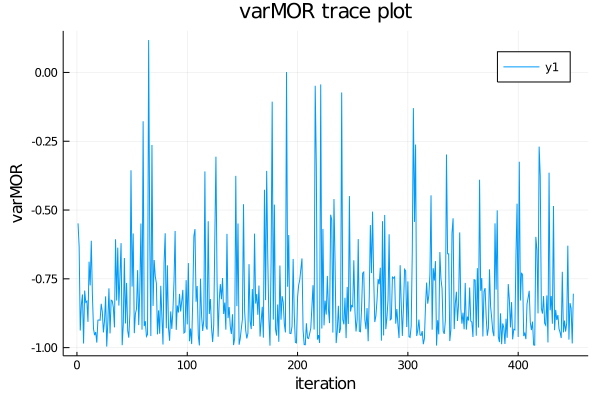

In [13]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varMOR trace plot",
        xlabel = "iteration", ylabel = "varMOR")

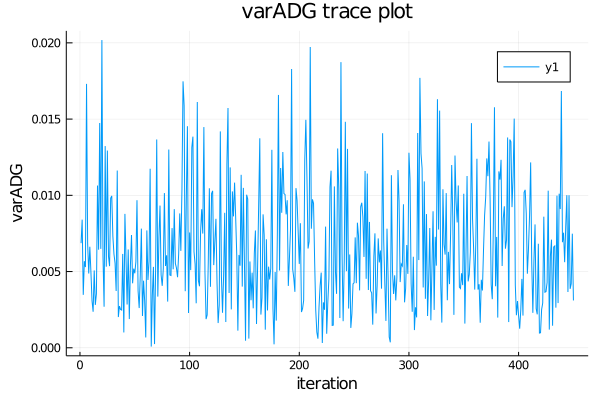

In [14]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

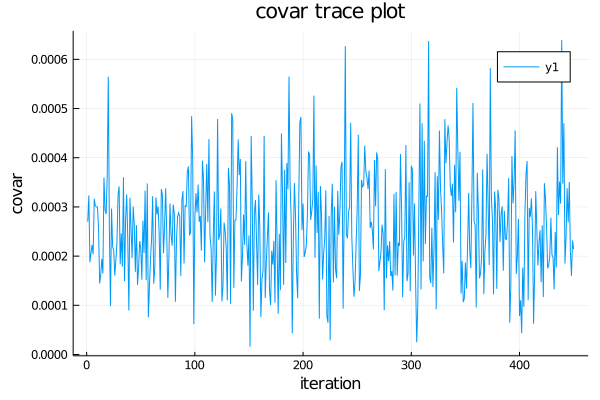

In [15]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

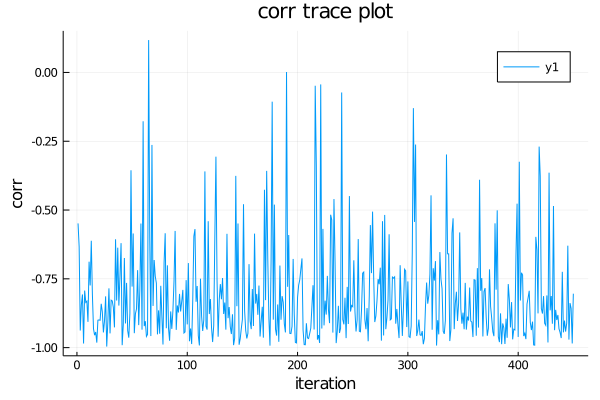

In [16]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

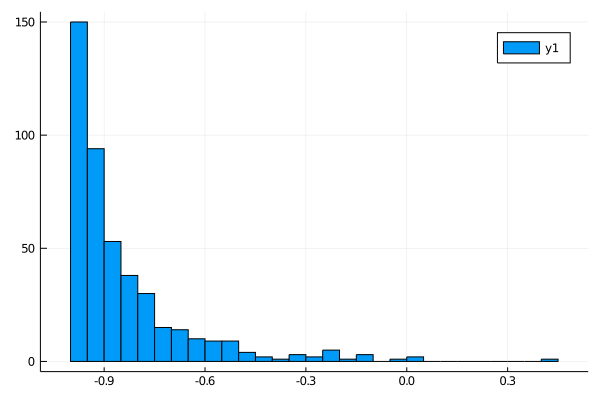

In [15]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,Nur2ADG_Nur2ADG,Nur2ADG_nTrtsNur2_27,nTrtsNur2_27_Nur2ADG,nTrtsNur2_27_nTrtsNur2_27
,Float64,Float64,Float64,Float64
1,0.00294838,-0.00805231,-0.00805231,0.147049
2,0.00303488,-0.00772504,-0.00772504,0.154132
3,0.00327754,-0.008373,-0.008373,0.140549
4,0.0026043,-0.00796434,-0.00796434,0.172587
5,0.00300774,-0.0090054,-0.0090054,0.136318
6,0.00276511,-0.0071485,-0.0071485,0.137135
7,0.00292826,-0.00821558,-0.00821558,0.140896
8,0.00287176,-0.00791695,-0.00791695,0.135258
9,0.00251156,-0.00663241,-0.00663241,0.146262


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur2ADG_Nur2ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:nTrtsNur2_27_nTrtsNur2_27]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur2ADG_nTrtsNur2_27] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur2ADG_Nur2ADG,corr,Nur2ADG_nTrtsNur2_27,nTrtsNur2_27_Nur2ADG,nTrtsNur2_27_nTrtsNur2_27
,Float64,Float64,Float64,Float64,Float64
1,0.00294838,-0.386721,-0.00805231,-0.00805231,0.147049
2,0.00303488,-0.357177,-0.00772504,-0.00772504,0.154132
3,0.00327754,-0.390116,-0.008373,-0.008373,0.140549
4,0.0026043,-0.375664,-0.00796434,-0.00796434,0.172587
5,0.00300774,-0.44474,-0.0090054,-0.0090054,0.136318
6,0.00276511,-0.3671,-0.0071485,-0.0071485,0.137135
7,0.00292826,-0.404468,-0.00821558,-0.00821558,0.140896
8,0.00287176,-0.401701,-0.00791695,-0.00791695,0.135258
9,0.00251156,-0.346046,-0.00663241,-0.00663241,0.146262


In [5]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mode(gVar[!,2])

-0.38672091720283314

In [6]:
using Statistics
std(gVar[!,:corr])

0.05863790609690485

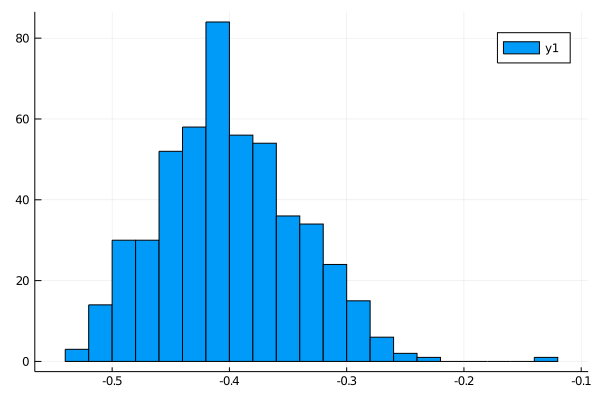

In [7]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC3 region from MCMC BayesB samples

In [3]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 102313:103184]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 102313:103184]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsNur2_27.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 102313:103184]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.685682,0.000173956,7.89844e-6,-2.54164e-5
2,2,-0.961199,0.0118624,8.2242e-5,-0.000949396
3,3,-0.715222,0.00136613,9.09915e-6,-7.97421e-5
4,4,-0.798985,0.000256835,1.67439e-5,-5.23956e-5
5,5,-0.986554,0.000364765,1.88589e-5,-8.18249e-5
6,6,0.068005,0.000378675,3.28527e-6,2.39861e-6
7,7,-0.958817,0.00061106,1.91195e-5,-0.000103637
8,8,-0.486851,0.0043652,3.66514e-6,-6.15806e-5
9,9,-0.975832,0.00626592,0.00013032,-0.000881808


In [4]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.7464795535284839

In [5]:
using Statistics
std(out[!,:corr])

0.33304482269320057

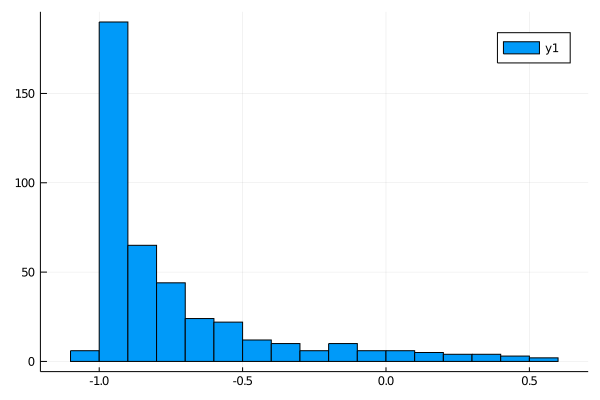

In [6]:
using Plots
h = histogram(out[!,:corr])
display(h)